# Assignment 1 : Setting up NLP Pipeline and Text Classification (10 Marks)

## Due: March 7, 2022

Welcome to Assignment 1 of our course on Natural Language Processing! In this assignment you will implement different text-preprocessing techniques commonly used for NLP tasks as well as implement a standard text-classification algorithm for recognizing sentiments of movie reviews.

We assume that you are familiar with `python` programming language, and its libraries like `numpy` and `pandas`. We will also make use of other libraries like `nltk` and `pytorch` in the assignment. Familiarity with these libraries is not assumed so we will provide short tutorials on their usage within the assignment.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    data_dir = "gdrive/MyDrive/PlakshaNLP/Assignment1/data/SST-2"
except:
    data_dir = "/datadrive/t-kabir/work/repos/PlakshaNLP/Assignment1/data/SST-2"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Install required libraries
!pip install numpy
!pip install pandas
!pip install nltk
!pip install torch
!pip install tqdm
!pip install matplotlib
!pip install seaborn

In [ ]:
# We start by importing libraries that we will be making use of in the assignment.
import string
import tqdm
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Stanford Sentiment Treebank Dataset

For the purposes of this assignment we will be working with the [Stanford Sentiment Treebank dataset](https://nlp.stanford.edu/sentiment/treebank.html), which comprises of a list of movie reviews each tagged with the sentiment of the review. We will be considering the binary label version of the dataset commonly referred to as **SST-2**, meaning each review will have either of the two possible labels i.e. Positive or Negative.

The SST-2 dataset can be downloaded from [here](https://dl.fbaipublicfiles.com/glue/data/SST-2.zip). The dataset folder will be containing three `.tsv` files, `train.tsv`, `dev.tsv` and `test.tsv` corresponding to the three splits of the data. Both `train.tsv` and `dev.tsv` have lines containing the reviews with the corresponding label (1 for positive sentiment and 0 for negative). Note that `test.tsv` only has the reviews and labels are missing, which is due to the fact that this split comes from a competition where the test predictions are to be submitted. For the purposes of this assignment we will focus on `train.tsv` and `dev.tsv` only, where the former will be used for training the text-classifiers and latter for evaluating them.

We start by loading the datasets into memory.

In [ ]:
# We can use pandas to load the datasets
train_df = pd.read_csv(f"{data_dir}/train.tsv", sep = "\t")
test_df = pd.read_csv(f"{data_dir}/dev.tsv", sep = "\t")

print(f"Number of Training Examples: {len(train_df)}")
print(f"Number of Test Examples: {len(test_df)}")

Number of Training Examples: 67349
Number of Test Examples: 872


In [ ]:
# View a sample of the dataset
train_df.head()

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0


As can be seen from the sample of training dataset using `train_df.head()`, the dataframe contains columns `sentence` and `label` containing the review and sentiment label respectively.

As part of some preliminary data analysis below we visualize the distribution of the labels in the dataset.

<BarContainer object of 2 artists>

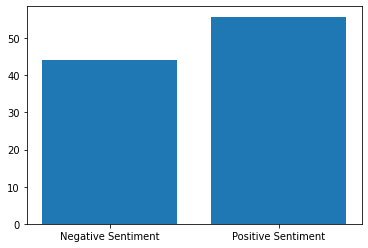

In [ ]:
label_counts = 100 * train_df["label"].value_counts(normalize=True).sort_index()
plt.bar(x = ["Negative Sentiment", "Positive Sentiment"], height = label_counts)

As can be seen from the plot we have roughly 45% training data points which have a negative sentiment and about 55% with positive sentiment.

## Task 1: Preprocessing Pipeline for NLP (3 Marks)

You will start by implementing different text-preprocessing functions below. We have provided the definitions for the functions you are supposed to implement. After filling the code for the function, you can run the cell that follows to run test cases on your code.

### Task 1.1: Word Tokenization (0.5 Marks)

Before we start preprocessing the text data and eventually training classification models, it is crucial to break the text into a set of constituents called tokens which can either be sentences, words, sub-words or characters. For the purposes of this assignment we will focus on Word Tokenization i.e. breaking a piece of text into a sequence of words.

There are different ways splitting a piece of text into a list of words. The simplest solution can be to split whenever a white-space character (i.e. `" "`) is encountered in the text i.e. if you have a string `"this is an example of tokenization"`, you iterate through it and whenever a white space is encountered you split the word to get: `["this", "is", "an", "example", "of", "tokenization"]`. Implement the `whitespace_word_tokenize` function below

In [ ]:
def whitespace_word_tokenize(text):
  """
  Splits a python string containing some text to a sequence of words
  by splitting on whitespace.
  
  Parameters:
    - text (str): A Python string containing the text to be tokenized

  Returns:
    - words (list): A list contaning the words present in the text (in the same order)
  
  """
  #words = None
  # YOUR CODE HERE
  words=text.split()
  #raise NotImplementedError()

  return words

In [ ]:
def evaluate_list_test_cases(test_case_input,
                        test_case_func_output,
                        test_case_exp_output):
  
  print(f"Input: {test_case_input}")
  print(f"Function Output: {test_case_func_output}")
  print(f"Expected Output: {test_case_exp_output}")

  if test_case_func_output == test_case_exp_output:
    print("Test Case Passed :)")
    print("**********************************\n")
    return True
  else:
    print("Test Case Failed :(")
    print("**********************************\n")
    return False

  


print("Running Sample Test Cases")
print("Sample Test Case 1:")
test_case = "We all live in a Yellow Submarine"
test_case_answer = ['We', 'all', 'live', 'in', 'a', 'Yellow', 'Submarine']
test_case_student_answer = whitespace_word_tokenize(test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 2:")
test_case = "We all live, in a Yellow Submarine."
test_case_answer = ['We', 'all', 'live,', 'in', 'a', 'Yellow', 'Submarine.']
test_case_student_answer = whitespace_word_tokenize(test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer, test_case_answer)


Running Sample Test Cases
Sample Test Case 1:
Input: We all live in a Yellow Submarine
Function Output: ['We', 'all', 'live', 'in', 'a', 'Yellow', 'Submarine']
Expected Output: ['We', 'all', 'live', 'in', 'a', 'Yellow', 'Submarine']
Test Case Passed :)
**********************************

Sample Test Case 2:
Input: We all live, in a Yellow Submarine.
Function Output: ['We', 'all', 'live,', 'in', 'a', 'Yellow', 'Submarine.']
Expected Output: ['We', 'all', 'live,', 'in', 'a', 'Yellow', 'Submarine.']
Test Case Passed :)
**********************************



As you can see from the outputs above the white space tokenizer does reasonably well in splitting a sentence into words. However, it is not perfect, as can be seen in the output of test case 2 this method fails to split words when punctuations are encountered which are retained as parts of the words like `"live,"` and `"Submarine."`. 

One possible solution is to instead of splitting on the white-space also split when punctuations are encountered. This will partially solve the problem but there are certain other cases that still won't be handled properly by this, like we would want something like `"don't"` to be split into `["do", "n't"]` instead of `["don", "'", "t"]`. 

Thankfully, nltk package provides the `word_tokenize` function that handles most of such cases inbuilt. Implement the `nltk_word_tokenize` function below which uses `word_tokenize` function from the nltk library to tokenize the text. Refer to the documentation [here](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.treebank) to understand the usage of `word_tokenize` function.

In [ ]:
from nltk.tokenize import word_tokenize
def nltk_word_tokenize(text):
  """
  Splits a python string containing some text to a sequence of words
  by using `word_tokenize` function from nltk.
  Refer to https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.treebank
  
  Parameters:
    - text (str): A Python string containing the text to be tokenized

  Returns:
    - words (list): A list contaning the words present in the text (in the same order)
  """

  words = None
  
  # YOUR CODE HERE
  #raise NotImplementedError()
  words=word_tokenize(text)

  return words

In [ ]:
print("Running Sample Test Cases")
print("Sample Test Case 1:")
test_case = "We all live in a Yellow Submarine"
test_case_answer = ['We', 'all', 'live', 'in', 'a', 'Yellow', 'Submarine']
test_case_student_answer = nltk_word_tokenize(test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 2:")
test_case = "We all live, in a Yellow Submarine."
test_case_answer = ['We', 'all', 'live', ',', 'in', 'a', 'Yellow', 'Submarine', '.']
test_case_student_answer = nltk_word_tokenize(test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 3:")
test_case = "pi isn't a rational number and its approximate value is 3.14"
test_case_answer = ['pi', 'is', "n't", 'a', 'rational', 'number', 'and', 'its', 'approximate', 'value', 'is', '3.14']
test_case_student_answer = nltk_word_tokenize(test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer, test_case_answer)


Running Sample Test Cases
Sample Test Case 1:
Input: We all live in a Yellow Submarine
Function Output: ['We', 'all', 'live', 'in', 'a', 'Yellow', 'Submarine']
Expected Output: ['We', 'all', 'live', 'in', 'a', 'Yellow', 'Submarine']
Test Case Passed :)
**********************************

Sample Test Case 2:
Input: We all live, in a Yellow Submarine.
Function Output: ['We', 'all', 'live', ',', 'in', 'a', 'Yellow', 'Submarine', '.']
Expected Output: ['We', 'all', 'live', ',', 'in', 'a', 'Yellow', 'Submarine', '.']
Test Case Passed :)
**********************************

Sample Test Case 3:
Input: pi isn't a rational number and its approximate value is 3.14
Function Output: ['pi', 'is', "n't", 'a', 'rational', 'number', 'and', 'its', 'approximate', 'value', 'is', '3.14']
Expected Output: ['pi', 'is', "n't", 'a', 'rational', 'number', 'and', 'its', 'approximate', 'value', 'is', '3.14']
Test Case Passed :)
**********************************



As you can see (if your test cases passed), nltk does a much better job at splitting the text into constituent words, by splitting the punctuations away from the words as well as also taking care of subtleties like splitting `"isn't"` into `"is"` and `"n't"` and retaining the full decimal `"3.14"` which would have been split into `"3"` and `"14"` if we would have naively split on punctuations along with the whitespace.


### Task 1.2: Convert the text to lower case (0.25 Marks)

We start the with the most basic of all text preprocessing techniques i.e. converting all the words in the text into lower case. As you will see soon, NLP models often treat different words as different entities and by default do not assume any relation between them. For eg. A word `Bat` will be treated differently from the word `bat` if we use them seperately to define the features. Hence it can be useful to remove such artifacts from the datasets so that we can have common representations for the same words.

Complete the function definiton below

In [ ]:
def to_lower_case(text):
  """ Converts a piece of text to only contain words in lower case
  
  Parameters:
    - text (str): A Python string containing the text to be lower-cased

  Returns:
    - text_lower_case (str): A string containing the input text in lower case

  """

  text_lower_case = None

  # YOUR CODE HERE
  #raise NotImplementedError()
  text_lower_case=text.lower()  

  return text_lower_case

In [ ]:
"""Don't change code in this cell"""
#SAMPLE TEST CASE

def evaluate_string_test_cases(test_case_input,
                        test_case_func_output,
                        test_case_exp_output):
  
  print(f"Input: {test_case_input}")
  print(f"Function Output: {test_case_func_output}")
  print(f"Expected Output: {test_case_exp_output}")

  if test_case_func_output == test_case_exp_output:
    print("Test Case Passed :)")
    print("**********************************\n")
    return True
  else:
    print("Test Case Failed :(")
    print("**********************************\n")
    return False


print("Running Sample Test Cases")
print("Sample Test Case 1:")
test_case = "We all live in a Yellow Submarine"
test_case_answer = "we all live in a yellow submarine"
test_case_student_answer = to_lower_case(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 2:")
test_case = "SuRRender To The Void, iT is SHINNING"
test_case_answer = "surrender to the void, it is shinning"
test_case_student_answer = to_lower_case(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)


Running Sample Test Cases
Sample Test Case 1:
Input: We all live in a Yellow Submarine
Function Output: we all live in a yellow submarine
Expected Output: we all live in a yellow submarine
Test Case Passed :)
**********************************

Sample Test Case 2:
Input: SuRRender To The Void, iT is SHINNING
Function Output: surrender to the void, it is shinning
Expected Output: surrender to the void, it is shinning
Test Case Passed :)
**********************************



### Task 1.3: Remove Punctuations (0.5 Marks)

Another common way to reduce the number of word variations in the text like `hello` vs `hello,` is to remove punctuations. While for some NLP tasks like POS tagging punctuations might be helpful, for classification tasks punctuations can be assumed to have negligible effect on the actual label.

Complete the function `remove_punctuations` below. Examples for the function's working are:

| Input                                                                                                  | Expected Output                                                                                  |
|--------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal! | Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal |
| "Little tyke," chortled Mr. Dursley as he left the house.                                              | Little tyke chortled Mr Dursley as he left the house                                             |


In [ ]:
import re
def remove_punctuations(text):
  """ 
  Removes punctuations from a piece of text.
  
  Parameters:
    - text (str) : A Python string containing text from which punctuation is to be removed
  
  Returns:
    - text_no_punct (str): Resulting string after removing punctuation.

  Hint: You can use `string.punctuation` to get a string containing all punctuation symbols.
  >>> print(string.punctuation)
  '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

  """

  text_no_punct = None
  
  # YOUR CODE HERE
  #text_no_punct=re.sub('[^a-zA-Z0-9 ]' ,'',text)
  text_no_punct=re.sub(r'[^\w\s]', '', text)
  #raise NotImplementedError()
  return text_no_punct

In [ ]:
print("Running Sample Test Cases")
print("Sample Test Case 1:")
test_case = "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal!"
test_case_answer = "Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal"
test_case_student_answer = remove_punctuations(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 2:")
test_case = "\"Little tyke,\" chortled Mr. Dursley as he left the house."
test_case_answer = "Little tyke chortled Mr Dursley as he left the house"
test_case_student_answer = remove_punctuations(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)


Running Sample Test Cases
Sample Test Case 1:
Input: Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal!
Function Output: Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal
Expected Output: Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal
Test Case Passed :)
**********************************

Sample Test Case 2:
Input: "Little tyke," chortled Mr. Dursley as he left the house.
Function Output: Little tyke chortled Mr Dursley as he left the house
Expected Output: Little tyke chortled Mr Dursley as he left the house
Test Case Passed :)
**********************************



### Task 1.4: Remove Stop Words (0.5 Marks)

There are some commonly used words in a language like in case of english 'the', 'a', 'I', 'he' which might not provide much valuable information for the current task in hand, and hence can be removed from the text. Again for a task like POS Tagging (which we will see in the future assignments), this shouldn't be done but for sentiment classification the labels can be assumed to be largely independent of the presence of such words.

The choice of the stop words to use can be subjective and in many cases might depend upon the problem in hand. For the purposes of this assignment we will consider the stop words for English language present in the `nltk` package. The code for obtaining these stop words is given in the following cell.

In [ ]:
from nltk.corpus import stopwords
STOPWORDS = stopwords.words("english")
",".join(STOPWORDS)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

As can be seen from the output above the stop words contain commonly used words that may not provide much information for the downstream task. Implement the function `remove_stop_words` below using the list of stop words given by `STOPWORDS` in the above cell.

Note that the stop words list contains the words in lower case, so you might want to convert a word in the text to lower case using `to_lower_case` function that you implemented above, before checking if it is present in the stop words list.

In [ ]:
def remove_stop_words(text):
  """ 
  Removes stop words given in `nltk.corpus.stopwords.words("english)` from a piece of text.
  
  Parameters:
    - text (str) : A Python string containing text from which stop words are to be removed
  
  Returns:
    - text_no_sw (str): Resulting string after removing stop words.

  Hint: You should use `nltk_word_tokenize` for splitting the text
        into words

  """
  STOPWORDS = stopwords.words("english")
  text_no_sw = None
  text=word_tokenize(text)
  text_no_sw= [w for w in text if w not in STOPWORDS]
  # YOUR CODE HERE
  #raise NotImplementedError()

  return ' '.join(text_no_sw)

In [ ]:
print("Running Sample Test Cases")
print("Sample Test Case 1:")
test_case = "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal!"
test_case_answer = "Mr. Mrs. Dursley , number four , Privet Drive , proud say perfectly normal !"
test_case_student_answer = remove_stop_words(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)



Running Sample Test Cases
Sample Test Case 1:
Input: Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal!
Function Output: Mr. Mrs. Dursley , number four , Privet Drive , proud say perfectly normal !
Expected Output: Mr. Mrs. Dursley , number four , Privet Drive , proud say perfectly normal !
Test Case Passed :)
**********************************



### Task 1.5: Stemming (0.75 Marks)

It can be often benificial to group together different inflections of a word into a single term. For eg. *organizes* and *organizing* are the morphological inflections of the word *organize*, and replacing the instances of *organizes* and *organizing* with *organize* in our text data can help us reduce the number of unique words in our vocabulary. Stemming is one such approach to reduce the inflectional forms into a common base form.

One common way of performing steming over the words are the *Suffix Removal* algorithms, which involves removing certain suffixes from the word based on a pre-defined set of rules like:
- If the word ends with 's' remove 's' (denoted as S-> ϵ.eg. plays -> play)
- If the word ends with 'es' remove 'es' (denoted as ES-> ϵ. eg. mangoes -> mango).
- If the word ends with 'ing' remove 'ing'. (denoted as ING -> ϵ. eg. enjoying  -> enjoying)
- If the word ends with 'ly' remove 'ly'. (denoted as LY -> ϵ. eg. badly -> bad)

There can be much more similar rules defined to design a sophisticated stemmer. For now we would want you to implement a simple stemmer that uses only these 4 rules to stem words in a sentence. Complete the `stem_word` and `stem_text` functions below.

In [ ]:
def stem_word(word):
  """
  Give a word performs suffix removal stemming on it using the following 4 rules:
    - S -> ϵ
    - ES -> ϵ
    - ING -> ϵ
    - LY -> ϵ
  If none of the four suffixes is to be found in the word, the it must be returned
  as it is.
  Parameters:
    - word (str) : A python string representing the word to stemmed

  Returns:
    - stemmed_word (str): `word` after stemming

  HINT: It is possible that two rules can be satisfied like for mangoes
  both the first two rules are satisfied i.e. it ends with 'es' as well as 's'
  In such cases consider the suffix with the larger length which is 'es'
  in this case.
  """

  stemmed_word = word

  # YOUR CODE HERE
  if(word.endswith('ing')):
    return word[0:-3]
  if(word.endswith('es') or word.endswith('ly')):
    return word[0:-2]
  if(word.endswith('s')):
    return word[0:-1]


  
  #raise NotImplementedError()
  return stemmed_word  



def stem_text(text):
  """
  Stems all the words in a piece of text, by calling `stem_word` for each word.

  Parameters:
    - text (str): A Python string containing text whose words are to be stemmed.

  Returns:
    - stemmed_text (str) : Resulting string after stemming.

  HINT: You should use `nltk_word_tokenize` for splitting the text
        into words

  """
  text=word_tokenize(text)
  for i in range(len(text)):
    if(text[i].endswith('ing')):
      text[i]= text[i][0:-3]
    if(text[i].endswith('es') or text[i].endswith('ly')):
     text[i]=text[i][0:-2]
    if(text[i].endswith('s')):
      text[i]=text[i][0:-1]

  # YOUR CODE HERE
  #raise NotImplementedError()
  return ' '.join(text)


In [ ]:
# Sample test cases for `stem_word`

print("Running Sample Test Cases")
print("Sample Test Case 1:")
test_case = "mangoes"
test_case_answer = "mango"
test_case_student_answer = stem_word(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 2:")
test_case = "plays"
test_case_answer = "play"
test_case_student_answer = stem_word(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 3:")
test_case = "enjoying"
test_case_answer = "enjoy"
test_case_student_answer = stem_word(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 4:")
test_case = "badly"
test_case_answer = "bad"
test_case_student_answer = stem_word(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 5:")
test_case = "fly"
test_case_answer = "f"
test_case_student_answer = stem_word(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 6:")
test_case = "connection"
test_case_answer = "connection"
test_case_student_answer = stem_word(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)


Running Sample Test Cases
Sample Test Case 1:
Input: mangoes
Function Output: mango
Expected Output: mango
Test Case Passed :)
**********************************

Sample Test Case 2:
Input: plays
Function Output: play
Expected Output: play
Test Case Passed :)
**********************************

Sample Test Case 3:
Input: enjoying
Function Output: enjoy
Expected Output: enjoy
Test Case Passed :)
**********************************

Sample Test Case 4:
Input: badly
Function Output: bad
Expected Output: bad
Test Case Passed :)
**********************************

Sample Test Case 5:
Input: fly
Function Output: f
Expected Output: f
Test Case Passed :)
**********************************

Sample Test Case 6:
Input: connection
Function Output: connection
Expected Output: connection
Test Case Passed :)
**********************************



In [ ]:
# Sample test cases for `stem_text`

print("Sample Test Case 1:")
test_case = "he sits and eats mangoes"
test_case_answer = "he sit and eat mango"
test_case_student_answer = stem_text(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 2:")
test_case = "he was badly hurt after playing"
test_case_answer = "he wa bad hurt after play"
test_case_student_answer = stem_text(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 3:")
test_case = "fly my little birds"
test_case_answer = "f my little bird"
test_case_student_answer = stem_text(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 4:")
test_case = "i am facing a poor network connection"
test_case_answer = "i am fac a poor network connection"
test_case_student_answer = stem_text(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)


Sample Test Case 1:
Input: he sits and eats mangoes
Function Output: he sit and eat mango
Expected Output: he sit and eat mango
Test Case Passed :)
**********************************

Sample Test Case 2:
Input: he was badly hurt after playing
Function Output: he wa bad hurt after play
Expected Output: he wa bad hurt after play
Test Case Passed :)
**********************************

Sample Test Case 3:
Input: fly my little birds
Function Output: f my little bird
Expected Output: f my little bird
Test Case Passed :)
**********************************

Sample Test Case 4:
Input: i am facing a poor network connection
Function Output: i am fac a poor network connection
Expected Output: i am fac a poor network connection
Test Case Passed :)
**********************************



As can be seen above the toy stemmer that we just implemented is not perfect. It is limited to the 4 rules so misses some obvious cases like reducing *connection* to *connect* or sometimes can over stem the word like for the word *fly* above is stemmed to `f` which loses the meaning of the original word. The more sophisticated algorithms use a bunch of rules and heuristics to avoid such situations. One of the most commonly used stemming algorithm is `Porter Stemmer`, which uses a 5 step procedure involving different suffix removal as well as modification rules to perform stemming. Interested students can read more about how Porter Stemmer works from [here](https://vijinimallawaarachchi.com/2017/05/09/porter-stemming-algorithm/). 

While implementing a sophisticated stemmer like Porter can be very complex, there are many python packages like *NLTK* (https://www.nltk.org/) that provide pre-implementations of a variety of stemming algorithms. Below we demonstrate how to implement `stem_word` function using different stemmers provided in NLTK.

In [ ]:
# Importing the stemmers from NLTK
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
def stem_word_with_nltk(word, stemmer_type = "porter"):

  """
  Stems a word using Porter Stemmer from NLTK
    - word (str) : A python string representing the word to be stemmed

  Returns:
    - stemmed_word (str): `word` after stemming
  """

  # Initialize an object of the stemer class
  if stemmer_type == "porter":
    stemmer = PorterStemmer()
  elif stemmer_type == "lancaster":
    stemmer = LancasterStemmer()
  elif stemmer_type == "snowball":
    #Snowball stemmer works for multiple languages hence one should be specified during initialization
    stemmer = SnowballStemmer("english")
  else:
    stemmer = PorterStemmer()

  # Call the `stem` method
  stemmed_word = stemmer.stem(word)

  return stemmed_word

def stem_text_with_nltk(text, stemer_type = "porter"):

  """
  Stems all the words in a piece of text using NLTK's stemers, by calling `stem_word_with_nltk` for each word.

  Parameters:
    - text (str): A Python string containing text whose words are to be stemmed.

  Returns:
    - stemmed_text (str) : Resulting string after stemming.


  """

  stemmed_text = None

  stemmed_text = " ".join([stem_word_with_nltk(word,"porter") for word in nltk_word_tokenize(text)])

  return stemmed_text

In [ ]:
input = "connection"
porter_output = stem_word_with_nltk(input, "porter")
lancester_output = stem_word_with_nltk(input, "lancaster")
snowball_output = stem_word_with_nltk(input, "snowball")

print(f"Input: {input}")
print(f"Porter Stemmer Output: {porter_output}")
print(f"Lancaster Stemmer Output: {lancester_output}")
print(f"Snowball Stemmer Output: {snowball_output}")

print("*******************************************\n")

input = "fly"
porter_output = stem_word_with_nltk(input, "porter")
lancester_output = stem_word_with_nltk(input, "lancaster")
snowball_output = stem_word_with_nltk(input, "snowball")

print(f"Input: {input}")
print(f"Porter Stemmer Output: {porter_output}")
print(f"Lancaster Stemmer Output: {lancester_output}")
print(f"Snowball Stemmer Output: {snowball_output}")

print("*******************************************\n")


input = "happiness"
porter_output = stem_word_with_nltk(input, "porter")
lancester_output = stem_word_with_nltk(input, "lancaster")
snowball_output = stem_word_with_nltk(input, "snowball")

print(f"Input: {input}")
print(f"Porter Stemmer Output: {porter_output}")
print(f"Lancaster Stemmer Output: {lancester_output}")
print(f"Snowball Stemmer Output: {snowball_output}")

print("*******************************************\n")


input = "operational"
porter_output = stem_word_with_nltk(input, "porter")
lancester_output = stem_word_with_nltk(input, "lancaster")
snowball_output = stem_word_with_nltk(input, "snowball")

print(f"Input: {input}")
print(f"Porter Stemmer Output: {porter_output}")
print(f"Lancaster Stemmer Output: {lancester_output}")
print(f"Snowball Stemmer Output: {snowball_output}")

Input: connection
Porter Stemmer Output: connect
Lancaster Stemmer Output: connect
Snowball Stemmer Output: connect
*******************************************

Input: fly
Porter Stemmer Output: fli
Lancaster Stemmer Output: fly
Snowball Stemmer Output: fli
*******************************************

Input: happiness
Porter Stemmer Output: happi
Lancaster Stemmer Output: happy
Snowball Stemmer Output: happi
*******************************************

Input: operational
Porter Stemmer Output: oper
Lancaster Stemmer Output: op
Snowball Stemmer Output: oper


As can be seen these stemmers are able to recognize various types of cases for stemming and can do a better job than our toy implementation. However, even these stemmers tend to make errors, like *operational* is reduced to *op* by Lancaster stemmer. This is because in the end stemming algorithms just use a bunch of heuristics to reduce the inflectional forms without any proper morphological analysis. **Lemmatization** is another common technique used to reduce different forms of a word to a common term called *lemma*, which makes use of a pre-defined vocabulary and morphological analysis of the words. Lemmatizers often work better when supplied with *Part of Speech tags* which we will be covering in the future assignments, so we will revisit Lemmatization later.

### Task 1.6: Combine all preprocessing functions to a single pipeline (0.5 Marks)

Now that we are done implementing the main preprocessing functions that might be useful for a text classification task, we can combine them into a single function that applies these 4 preprocessing techniques over a piece of text. We will then use this function to preprocess the movie reviews in our training and dev datasets.

Implement the `preprocess_pipeline` and `preprocess_sentiment_data` functions below, where the former function combines the 4 preprocessing functions implemented above and the latter applies that to all the reviews in the dataset.

Note: The order in which different preprocessing functions are to be applied can lead to different results. For eg. all of our stop words are in lower case hence before we remove them from the text we must make sure we have converted the text to lower case before hand. Please follow the following order for applying the preprocessing functions in your code:

  1. to_lower_case
  2. remove_punctuations
  3. remove_stop_words
  4. stem_text_with_nltk (call this with `stemer_type = "porter"`)

In [ ]:
def preprocess_pipeline(text):

  """
  Given a piece of text applies preprocessing techniques
  like converting to lower case, removing stop words and punctuations,
  and stemming.

  Apply the functions in the following order:
  1. to_lower_case
  2. remove_punctuations
  3. remove_stop_words
  4. stem_text_with_nltk (call this with `stemer_type = "porter"`)

  Inputs:
    - text (str) : A python string containing text to be pre-processed
  
  Returns:
    - text_preprocessed (str) : Resulting string after applying preprocessing
  """

  
  # YOUR CODE HERE
  text_preprocessed= to_lower_case(text)
  text_preprocessed= remove_punctuations(text_preprocessed)
  text_preprocessed=remove_stop_words(text_preprocessed)
  text_preprocessed= stem_text_with_nltk(text_preprocessed,'porter')
  #raise NotImplementedError()

  return text_preprocessed

In [ ]:
print("Running Sample Test Cases")
print("Sample Test Case 1:")
test_case = "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal!"
test_case_answer = "mr mr dursley number four privet drive proud say perfectli normal"
test_case_student_answer = preprocess_pipeline(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 2:")
test_case = "\"Little tyke,\" chortled Mr. Dursley as He left the house."
test_case_answer = "littl tyke chortl mr dursley left hous"
test_case_student_answer = preprocess_pipeline(test_case)
assert evaluate_string_test_cases(test_case, test_case_student_answer, test_case_answer)


Running Sample Test Cases
Sample Test Case 1:
Input: Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal!
Function Output: mr mr dursley number four privet drive proud say perfectli normal
Expected Output: mr mr dursley number four privet drive proud say perfectli normal
Test Case Passed :)
**********************************

Sample Test Case 2:
Input: "Little tyke," chortled Mr. Dursley as He left the house.
Function Output: littl tyke chortl mr dursley left hous
Expected Output: littl tyke chortl mr dursley left hous
Test Case Passed :)
**********************************



In [ ]:
def preprocess_sentiment_data(df):
  """
  Takes the pandas dataframe containing SST-2 data as input and applies
  the `preprocess_pipeline` function to the its sentence column.

  Inputs:
    - df (pd.DataFrame): A pandas dataframe containing the SST-2 data with format:
        | sentence  | label  |
        ----------------------
        | sentence_1| label_1|
        | sentence_2| label_2|
        | ..........| .......|
        | ..........| .......|
  
  Returns (pd.DataFrame):
   - df_preprocessed: Resulting dataframe after applying `preprocessing_pipeline`
    to the `sentence` column. Note that the column names of df_preprocessed
    should be same as df and its should have the same number of rows as `df`.


  Hint: Look up how to use `pd.DataFrame.apply` method in pandas

  """

  df_preprocessed = df

  # YOUR CODE HERE
  df_preprocessed['sentence']=df_preprocessed.apply(lambda row: preprocess_pipeline(row['sentence']),axis=1)
  #raise NotImplementedError()

  return df_preprocessed


In [ ]:
# Preprocess the train and test sets. This might take a few minutes
train_df_preprocessed = preprocess_sentiment_data(train_df)
test_df_preprocessed = preprocess_sentiment_data(test_df)
print(train_df_preprocessed.head())
print("***************************")
print(test_df_preprocessed.head())


                                            sentence  label
0                        hide new secret parent unit      0
1                              contain wit labor gag      0
2  love charact commun someth rather beauti human...      1
3           remain utterli satisfi remain throughout      0
4  worst revengeofthenerd cliché filmmak could dredg      0
***************************
                                            sentence  label
0                         charm often affect journey      1
1                         unflinchingli bleak desper      0
2  allow us hope nolan pois embark major career c...      1
3  act costum music cinematographi sound astound ...      1
4                                          slow slow      0


In [ ]:
print("Running Sample Test Cases")
print("Sample Test Case 1: Checking if the object returned is a pandas Dataframe")
assert isinstance(train_df_preprocessed, pd.DataFrame)
print("Test Case Passed :)")
print("***********************************\n")

print("Sample Test Case 2: Checking if the returned dataframe has correct columns")
student_column_names = sorted(list(train_df_preprocessed.columns))
expected_column_names = ["label", "sentence"]

assert student_column_names == expected_column_names
print("Test Case Passed :)")
print("***********************************\n")

print("Sample Test Case 3: Checking if the number of rows of the returned dataframe is same as the original dataframes")
assert len(train_df) == len(train_df_preprocessed) and len(test_df) == len(test_df_preprocessed)
print("Test Case Passed :)")
print("***********************************\n")
print("Sample Test Case 4: Checking if the returned dataframe has sentences preprocessed")

student_output = train_df_preprocessed["sentence"].values[1]
expected_output = "contain wit labor gag"
assert evaluate_string_test_cases(train_df["sentence"].values[1], student_output, expected_output)


Running Sample Test Cases
Sample Test Case 1: Checking if the object returned is a pandas Dataframe
Test Case Passed :)
***********************************

Sample Test Case 2: Checking if the returned dataframe has correct columns
Test Case Passed :)
***********************************

Sample Test Case 3: Checking if the number of rows of the returned dataframe is same as the original dataframes
Test Case Passed :)
***********************************

Sample Test Case 4: Checking if the returned dataframe has sentences preprocessed
Input: contain wit labor gag
Function Output: contain wit labor gag
Expected Output: contain wit labor gag
Test Case Passed :)
**********************************



## Task 2: Bag Of Word Models for Text Classification (1.75 Marks)

Now that we are done with preprocessing the reviews in our datasets, we can begin building a classifier to classify them into positive or negative sentiment.

As you might have studied in your Machine Learning courses, typical ML models work on the data described using mathematical objects like vectors and matrices, which are often referred to as features. These features can be of different types depending upon the downstream application, like for building a classifier to predict whether to give credit to a customer we might consider features like their age, income, employement status etc. In the same way to build a classifier for textual data, we need a way to describe each text example in terms of numeric features which can then be fed to the classification algorithm of our choice.

Bag of Words model is one of the simplest but surprisingly effective way to represent text data for building Machine Learning models. In bag of words, occurence (or frequency) of each word in a given text example is defined as a feature for training the classifier. The order in which these words occur in the text is not relevant and we are just concerned with which words are present in the text. Consider the following example to understand how bag of words are used to represent text.

As an example consider we have 2 examples present in our dataset:

x1: john likes to watch movies mary likes movies too

x2: mary also likes to watch football games

Based on these two documents we can get the list of all words that occur in this dataset which will be:

| index | word     |
|-------|----------|
| 0     | also     |
| 1     | football |
| 2     | games    |
| 3     | john     |
| 4     | likes    |
| 5     | mary     |
| 6     | movies   |
| 7     | to       |
| 8     | too      |
| 9     | watch    |

We can then define features for the two x1 and x2 as follows:


|    | also | football | games | john | likes | mary | movies | to | too | watch |
|----|------|----------|-------|------|-------|------|--------|----|-----|-------|
| x1 | 0    | 0        | 0     | 1    | 2     | 1    | 2      | 1  | 2   | 1     |
| x2 | 1    | 1        | 1     | 0    | 1     | 1    | 0      | 0  | 0   | 0     |

These features can then be used to train an ML model. To summarize the following two steps must be followed to create bag of word representations of the text examples in a dataset.

- Step 1: Create a word vocabulary by iterating through all the documents in the **training** dataset, storing all the unique words that are present in each document. Also maintain mappings to map each word to an index and vice-versa, which we will need to define values for each feature dimension.

- Step 2: For each document in the training and test sets, get the frequency of each word in our vocabulary and use it to define feature for that example. 

Below you will implement functions to create bag of words representations of the dataset examples




### Task 2.1: Create vocabularies (0.5 Marks)

As described above our first step will be to create word vocabulary for the documents in our dataset. Implement `create_vocab` function below which takes as input a list of documents and creates a list of unique words that occur in them.

In [ ]:
def create_vocab(documents):
  """
  Given a list of documents each represented as a string,
  create a word vocabulary containing all the words that occur
  in these documents.

  Inputs:
    - documents (list) : A list with each element as a string representing a
    document.

  Returns:
    - vocab (list) : A **sorted** list containing all unique words in the
    documents

  Example Input: ['john likes to watch movies mary likes movies too',
                  'mary also likes to watch football games']

  Expected Output: ['also',
                    'football',
                    'games',
                    'john',
                    'likes',
                    'mary',
                    'movies',
                    'to',
                    'too',
                    'watch']


  Hint: `nltk_word_tokenize` function may come in handy

  """

  vocab = []
  # YOUR CODE HERE
  for i in documents:
    ls=(word_tokenize(i))
    for j in ls:
      if j not in vocab:
        vocab.append(j)
  #raise NotImplementedError()
  #flat_list = [item for sublist in documents for item in sublist]
  

  return sorted(vocab)

In [ ]:
print("Running Sample Test Cases")
print("Sample Test Case 1:")

test_case = ["john likes to watch movies mary likes movies too",
              "mary also likes to watch football games"]
test_case_answer = ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch']
test_case_student_answer = create_vocab(test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer, test_case_answer)

print("Sample Test Case 2:")

test_case = ["We all live in a yellow submarine.",
             "Yellow submarine, yellow submarine!!"
             ]
test_case_answer = ['!', ',', '.', 'We', 'Yellow', 'a', 'all', 'in', 'live', 'submarine', 'yellow']
test_case_student_answer = create_vocab(test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer, test_case_answer)



Running Sample Test Cases
Sample Test Case 1:
Input: ['john likes to watch movies mary likes movies too', 'mary also likes to watch football games']
Function Output: ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch']
Expected Output: ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch']
Test Case Passed :)
**********************************

Sample Test Case 2:
Input: ['We all live in a yellow submarine.', 'Yellow submarine, yellow submarine!!']
Function Output: ['!', ',', '.', 'We', 'Yellow', 'a', 'all', 'in', 'live', 'submarine', 'yellow']
Expected Output: ['!', ',', '.', 'We', 'Yellow', 'a', 'all', 'in', 'live', 'submarine', 'yellow']
Test Case Passed :)
**********************************



Note the output of sample test case 2 contains punctuations as well as different upper-case and lower-case variants of a word detected as seperate words. This illustrates the importance of performing the preprocessing over the documents as it reduces the unecessary words like punctuations, stop words in the vocablary as well as help provide a common term to different variants of a word.

In [ ]:
# Now that our `create_vocab` function is ready, let's create vocabulary for the SST dataset

train_documents = train_df_preprocessed["sentence"].values.tolist() # Note that we are selecting preprocessed documents
train_vocab = create_vocab(train_documents)

print(f"Training Vocabulary Created. Number of words: {len(train_vocab)}")

Training Vocabulary Created. Number of words: 10781


### Task 2.2: Create word to index mapping (0.25 Marks)
Now that we have a list of words in our dataset, we can map each word to an index which will be useful to represent what word each feature dimension refers to. Implement the `get_word_idx_mappings` function below:

In [ ]:
def get_word_idx_mapping(vocab):

  """
  Give a list of strings each representing a word in the vocabulary
  creates a dictionary that maps each word in the list to its
  corresponding index.

  Inputs:
    - vocab (list): A list of strings each representing a word in the vocabulary
  
  Outputs:
    - word2idx (dict): A Python dictionary mapping each word to its index in vocabulary

  Example Input: ['also',
                    'football',
                    'games',
                    'john',
                    'likes',
                    'mary',
                    'movies',
                    'to',
                    'too',
                    'watch']

  Expected Output: {'also': 0,
                  'football': 1,
                  'games': 2,
                  'john': 3,
                  'likes': 4,
                  'mary': 5,
                  'movies': 6,
                  'to': 7,
                  'too': 8,
                  'watch': 9}

  """

  word2idx = dict(zip(vocab,range(len(vocab))))

  # YOUR CODE HERE
  #raise NotImplementedError()

  return word2idx

In [ ]:
print("Running Sample Test Cases")
print("Sample Test Case 1:")
test_case = ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch']
test_case_answer = {'also': 0, 'football': 1, 'games': 2, 'john': 3, 'likes': 4, 'mary': 5, 'movies': 6, 'to': 7, 'too': 8, 'watch': 9}
test_case_student_answer = get_word_idx_mapping(test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer, test_case_answer)



Running Sample Test Cases
Sample Test Case 1:
Input: ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch']
Function Output: {'also': 0, 'football': 1, 'games': 2, 'john': 3, 'likes': 4, 'mary': 5, 'movies': 6, 'to': 7, 'too': 8, 'watch': 9}
Expected Output: {'also': 0, 'football': 1, 'games': 2, 'john': 3, 'likes': 4, 'mary': 5, 'movies': 6, 'to': 7, 'too': 8, 'watch': 9}
Test Case Passed :)
**********************************



In [ ]:
train_vocab2idx = get_word_idx_mapping(train_vocab)
train_vocab2idx 

{'1': 0,
 '10': 1,
 '100': 2,
 '10000': 3,
 '100minut': 4,
 '101': 5,
 '103minut': 6,
 '105': 7,
 '10cours': 8,
 '10th': 9,
 '10thgrade': 10,
 '10year': 11,
 '10yearold': 12,
 '11': 13,
 '110': 14,
 '112minut': 15,
 '12': 16,
 '120': 17,
 '127': 18,
 '129minut': 19,
 '12th': 20,
 '12yearold': 21,
 '13': 22,
 '13th': 23,
 '140': 24,
 '146': 25,
 '14yearold': 26,
 '15': 27,
 '15th': 28,
 '15year': 29,
 '163': 30,
 '168minut': 31,
 '170': 32,
 '1790': 33,
 '18': 34,
 '1899': 35,
 '18yearold': 36,
 '19': 37,
 '1920': 38,
 '1930': 39,
 '1933': 40,
 '1937': 41,
 '1938': 42,
 '1940': 43,
 '1950': 44,
 '1952': 45,
 '1957': 46,
 '1958': 47,
 '1959': 48,
 '1960': 49,
 '1962': 50,
 '1970': 51,
 '1972': 52,
 '1973': 53,
 '1975': 54,
 '1979': 55,
 '1980': 56,
 '1984': 57,
 '1986': 58,
 '1987': 59,
 '1989': 60,
 '1993': 61,
 '1994': 62,
 '1995': 63,
 '1997': 64,
 '1998': 65,
 '1999': 66,
 '19th': 67,
 '19thcenturi': 68,
 '2': 69,
 '20': 70,
 '2000': 71,
 '2001': 72,
 '2002': 73,
 '20car': 74,
 '20th

## Task 2.3: Create Bag of word features for the documents (1 Mark)

Now that we have the list of words and a word to index mapping we can create a bag of word feature vector for each of the document present in training and test data. Implement the function `get_document_bow_feature` that takes as an input a document, a vocabulary, and a vocabulary to index mapping, and returns the feature vector for the document.

In [ ]:
def get_document_bow_feature(document, vocab, word2idx):
  """
  Given a string representing the document and the vocabulary, create a bag of
  words representation of the document i.e. a feature vector where each feature
  is defined as the frequency of each word in the vocabulary.

  Inputs:
   - document (str): A python string representing the document for which features are to be obtained
   - vocab (list): A list of words present in the vocabulary
   - word2idx (dict): A dictionary that maps each word to an index.

  Returns:
    - bow_feature (numpy.ndarray): A numpy array of size `len(vocab)` whose each element contains the count of each word in the vocabulary.

  Example Input:
    document = "john likes to watch movies mary likes movies too"
    vocab = ['also','football','games','john','likes','mary', 'movies','to','too','watch']
    word2idx = {'also': 0, 'football': 1, 'games': 2, 'john': 3, 'likes': 4, 'mary': 5, 'movies': 6, 'to': 7, 'too': 8, 'watch': 9}

  Expected Output: array([0, 0, 0, 1, 2, 1, 2, 1, 1, 1])

  """
  bow_feature = np.zeros(len(vocab),dtype=int)
  # YOUR CODE HERE
  #raise NotImplementedError()
  document=word_tokenize(document)

  for i in vocab:
    cnt=document.count(i)
    idx=word2idx[i]
    bow_feature[idx]=cnt

  return bow_feature

In [ ]:
print("Running Sample Test Cases")
print("Sample Test Case 1:")
test_case = {"document": "john likes to watch movies mary likes movies too",
             "vocab": ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch'],
             "word2idx": {'also': 0, 'football': 1, 'games': 2, 'john': 3, 'likes': 4, 'mary': 5, 'movies': 6, 'to': 7, 'too': 8, 'watch': 9}
             }
test_case_answer = np.array([0, 0, 0, 1, 2, 1, 2, 1, 1, 1])
test_case_student_answer = get_document_bow_feature(**test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer.tolist(), test_case_answer.tolist())

print("Sample Test Case 2:")
test_case = {"document": "mary also likes to watch football games",
             "vocab": ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch'],
             "word2idx": {'also': 0, 'football': 1, 'games': 2, 'john': 3, 'likes': 4, 'mary': 5, 'movies': 6, 'to': 7, 'too': 8, 'watch': 9}
             }
test_case_answer = np.array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1])
test_case_student_answer = get_document_bow_feature(**test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer.tolist(), test_case_answer.tolist())

print("Sample Test Case 3:")
test_case = {"document": "mary and jane also like to watch football games",
             "vocab": ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch'],
             "word2idx": {'also': 0, 'football': 1, 'games': 2, 'john': 3, 'likes': 4, 'mary': 5, 'movies': 6, 'to': 7, 'too': 8, 'watch': 9}
             }
test_case_answer = np.array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1])
test_case_student_answer = get_document_bow_feature(**test_case)
assert evaluate_list_test_cases(test_case, test_case_student_answer.tolist(), test_case_answer.tolist())






Running Sample Test Cases
Sample Test Case 1:
Input: {'document': 'john likes to watch movies mary likes movies too', 'vocab': ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch'], 'word2idx': {'also': 0, 'football': 1, 'games': 2, 'john': 3, 'likes': 4, 'mary': 5, 'movies': 6, 'to': 7, 'too': 8, 'watch': 9}}
Function Output: [0, 0, 0, 1, 2, 1, 2, 1, 1, 1]
Expected Output: [0, 0, 0, 1, 2, 1, 2, 1, 1, 1]
Test Case Passed :)
**********************************

Sample Test Case 2:
Input: {'document': 'mary also likes to watch football games', 'vocab': ['also', 'football', 'games', 'john', 'likes', 'mary', 'movies', 'to', 'too', 'watch'], 'word2idx': {'also': 0, 'football': 1, 'games': 2, 'john': 3, 'likes': 4, 'mary': 5, 'movies': 6, 'to': 7, 'too': 8, 'watch': 9}}
Function Output: [1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Expected Output: [1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Test Case Passed :)
**********************************

Sample Test Case 3:
Input: {'document': '

Now that our `get_document_bow_feature` function seems to work properly, let's get bag of word features for the examples in our datasets.

In [ ]:
# Getting bow feature for one training document first
training_example = train_documents[0]
print(training_example)
bow_feature = get_document_bow_feature(training_example,
                                       train_vocab,
                                       train_vocab2idx)
print(f"Length of bow feature: {len(bow_feature)}")
print(f"Number of non-zero entries in the bow feature: {len(bow_feature[bow_feature != 0])}")

hide new secret parent unit
Length of bow feature: 10781
Number of non-zero entries in the bow feature: 5


As you can see, since our vocabulary size is 10781, bag of words vectors for each document will be of size 10781. Since we have about 67k training examples, it won't be practical to store these high dimensional vectors as it is for all the documents. Instead of storing the features for all the documents in memory, we query the features while training the model in a batch wise fashion i.e. at a time we train on N examples, such that N <<< 10781. This will be more clear when we discuss creating datasets and dataloaders in the next part.

## Task 3: Training a Linear Classifier using Bag of Words Features (5.25 Marks)

Now that we have defined our numerical features to represent each of the documents, we can start training a classifier on top of it. For the purposes of this assignment we will be implementing a linear classifier namely **Logistic Regression**. We assume that you have studied logistic regression in your Machine Learning course. For a recap of the same you can refer to these [videos](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=32).

We will be using Pytorch to implement and train our logistic regression classifier for the sentiment prediction task. We start by implementing the dataset and dataloaders to iterate over the dataset, and then we move to defining the logistic regression module, the cross entropy loss function and an optimizer for training the model.

### Task 3.1: Defining Pytorch Dataset and Dataloaders to iterate over the SST-Dataset (0.5 Marks)

Often while training neural networks or in our case linear classifiers, it is not practical to train over the entire dataset at once, and instead we use a batch wise training strategy, where we iterate over different batches of the dataset. Hence, it is useful to define iterators for doing the same. Defining pipelines for processing data samples and then writing iterators on top of that can often be very messy. Pytorch provides `torch.utils.data.Dataset` and `torch.utils.data.Dataloader` classes that make it much more convenient to do the same in a modular fashion.

`torch.utils.data.Dataset` provides a wrapper to store our dataset, which can then be used by `torch.utils.data.Dataloader` to define an iterable over the dataset. To learn more about Dataset and Dataloader classes, please refer to the tutorial [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

We start by defining a custom Dataset class for our dataset by extending the `torch.utils.data.Dataset` class. A custom Dataset class must implement three functions:
-  `__init__`: This is the constructor for our custom class, and is often used to store the (meta)data, which can then be used by the other functions to create samples of the dataset.
- `__len__`: This method returns the number of examples present in the dataset.
-  `__getitem__`: This method loads and returns a sample stored at the given index `idx`  

In [ ]:
from torch.utils.data import Dataset, DataLoader


class SST2Dataset(Dataset):

  def __init__(self, documents, labels, vocab, word2idx):
    """
    Store dataset documents and labels here so that they can be used by
    __getitem__ to process and return the samples.

    Inputs:
      - documents (list): A list of strings containing reviews in our dataset.
      - labels (list): A list of sentiment labels (1 or 0) corresponding to each document.
      - vocab (list): A list of words present in the vocabulary
      - word2idx (dict): A dictionary that maps each word to an index.
    """

    self.documents = documents
    self.labels = labels
    self.vocab = vocab
    self.word2idx = word2idx

  def __len__(self):
    return len(self.documents)

  def __getitem__(self, idx):
    """
    Loads and returns the features and label corresponding to the `idx` index
    in the documents and labels lists.

    Inputs:
      - idx (index): Index of the dataset example to be loaded and returned

    Returns:
      - features (numpy.ndarray): The bag of word features corresponding the document indexed by `idx`
      - label (int): The sentiment label for the `idx`th document

    Hint: You can get the document and label by doing self.documents[idx],
    self.labels[idx]. Features of the document are to be extracted via
    `get_document_bow_feature` function
    """

    features, label = None, None
    # YOUR CODE HERE
    features=get_document_bow_feature(self.documents[idx],self.vocab,self.word2idx)
    label=self.labels[idx]
    #raise NotImplementedError()

    return features, label

In [ ]:
print("Running Sample Test Cases")

sample_documents = ["this movie is great",
                    "I HATED this film"]
sample_labels = [0, 1]
sample_vocab = create_vocab(sample_documents)
sample_word2idx = get_word_idx_mapping(sample_vocab)
sample_dataset = SST2Dataset(sample_documents, sample_labels,
                             sample_vocab, sample_word2idx)

test_case_idx = 0
features, label = sample_dataset.__getitem__(test_case_idx)

print(f"Sample Test Case 1: Testing Returned Labels for idx = {test_case_idx}")
print(f"Output Label: {label}")
print(f"Expected Label: {sample_labels[test_case_idx]}")
assert label == sample_labels[test_case_idx]
print("**********************************\n")

print(f"Sample Test Case 2: Testing returned Features for idx = {test_case_idx}")
expected_features = [0, 0, 0, 1, 1, 1, 1]

print(f"Output Features: {features.tolist()}")
print(f"Expected Features: {expected_features}")
assert expected_features == features.tolist()

test_case_idx = 1
features, label = sample_dataset.__getitem__(test_case_idx)
print("**********************************\n")

print(f"Sample Test Case 3: Testing Returned Labels for idx = {test_case_idx}")
print(f"Output Label: {label}")
print(f"Expected Label: {sample_labels[test_case_idx]}")
assert label == sample_labels[test_case_idx]
print("**********************************\n")

print(f"Sample Test Case 4: Testing returned Features for idx = {test_case_idx}")
expected_features = [1, 1, 1, 0, 0, 0, 1]
print(f"Output Features: {features.tolist()}")
print(f"Expected Features: {expected_features}")
assert expected_features == features.tolist()
print("**********************************\n")


Running Sample Test Cases
Sample Test Case 1: Testing Returned Labels for idx = 0
Output Label: 0
Expected Label: 0
**********************************

Sample Test Case 2: Testing returned Features for idx = 0
Output Features: [0, 0, 0, 1, 1, 1, 1]
Expected Features: [0, 0, 0, 1, 1, 1, 1]
**********************************

Sample Test Case 3: Testing Returned Labels for idx = 1
Output Label: 1
Expected Label: 1
**********************************

Sample Test Case 4: Testing returned Features for idx = 1
Output Features: [1, 1, 1, 0, 0, 0, 1]
Expected Features: [1, 1, 1, 0, 0, 0, 1]
**********************************



Now that the custom class SST2Dataset seems to working fine we can create objects for our training and test datasets

In [ ]:
# Get documents and labels from the dataset
train_documents = train_df_preprocessed["sentence"].values.tolist()
train_labels = train_df["label"].values.tolist()
test_documents = test_df_preprocessed["sentence"].values.tolist()
test_labels = test_df["label"].values.tolist()

# Create vocabulary from training data
train_vocab = create_vocab(train_documents)
train_word2idx = get_word_idx_mapping(train_vocab)

# Create datasets
train_dataset = SST2Dataset(train_documents,
                            train_labels,
                            train_vocab,
                            train_word2idx)
test_dataset = SST2Dataset(test_documents,
                           test_labels,
                           train_vocab,
                           train_word2idx
                           )

Notice how we used training data vocabulary for creating test dataset as well. Can you tell why?

Now that we have created our training and test datasets, we can create dataloaders to iterate over them in batches. We will use a batch size of 64 in our experiments. Note that lower the batch size lesser will be your memory requirements but the noisier will be the training. Since in our case features are sufficiently high dimensional, we might not want to use too large of a batch size, hence we are using 64.

In [ ]:
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size = batch_size)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size)

Dataloaders work like any iterable (like Lists, dictionaries etc) in python can be iterated over using a for loop like this:

In [ ]:
for batch in train_dataloader:
  # Unpacking the batch
  features, labels = batch
  print(f"Features Shape: {features.shape}")
  print(f"Labels Shape: {labels.shape}")

  # We will break for now as this is just for demonstration
  break

Features Shape: torch.Size([64, 10781])
Labels Shape: torch.Size([64])


Notice how each batch unraps to a features and a labels torch tensor. Features is a 64x10781, where 64 is the batch size used by us and 10781 is the numeber of features we have for each document. Torch tensors behave very similar to numpy arrays, with the benifit that these can be transferred to a GPU and also support auto-differentiation. We will address these points again when we implement the training loop.

### Task 3.2: Define the model architecture for the Logistic Regression Classifier (0.75 Marks)

Pytorch provides very elegantly designed `torch.nn` module which contains building blocks for creating different neural network architectures. Some of the sub-modules included in `torch.nn` includes:

- `torch.nn.Linear` : Perhaps one of the simplest of the nn modules, it is used to apply a linear transformation to the data i.e. y = xA^T +b, where x is the input and y is the output of the layer. A and b are the parameters of the layer, where A is often called the weights matrix and b is the bias vector.

- `torch.nn.Conv2d`: Used to create Convolutional Layers.

- `torch.nn.Transformer`: Used to create Transformer layers

and many more. For the purposes of this assignment we will only be needing `torch.nn.Linear` to define our network.

It also supports different activation functions like:
- `torch.nn.ReLU` 
- `torch.nn.Sigmoid`
- `torch.nn.Tanh`
- `torch.nn.Softmax`



Below we demonstrate the usage of some of these modules

In [ ]:
import torch
import torch.nn as nn

# Create a linear layer that maps a 5 dimensional vector to a 3 dimensional vector
example_linear_layer = nn.Linear(5, 3) # Initialize a linear layer
example_input = torch.rand(5) # Create a random vector for demonstration
print(f"Input: {example_input}")
print(f"Input Shape: {example_input.shape}")
example_output = example_linear_layer(example_input) # Feed the example input to the linear layer
print(f"Linear layer output: {example_output}")
print(f"Linear layer output Shape: {example_output.shape}")

print("************************************************\n")

# We can also use linear layers with batched inputs
example_batch_input = torch.rand(4,5) # Create an example input containing 4 inputs of 5 dimension each
print(f"Batched Input:\n {example_batch_input}")
print(f"Batched Input Shape: {example_batch_input.shape}")
example_batch_output = example_linear_layer(example_batch_input)
print(f"Linear layer batched output:\n {example_batch_output}")
print(f"Linear layer batched output Shape: {example_batch_output.shape}")

print("************************************************\n")

# Using activation functions
sigmoid_activation = nn.Sigmoid() #Define sigmoid activation
relu_activation = nn.ReLU() #Define relu activation

sigmoid_output = sigmoid_activation(example_batch_output) # Apply the sigmoid function to the output of the linear layer
relu_output = relu_activation(example_batch_output) # Apply the relu function to the output of the linear layer
print(f"Before Applying the activation function:\n {example_batch_output}")
print(f"After Applying the sigmoid function:\n {sigmoid_output}")
print(f"After Applying the relu function:\n {relu_output}")

print("************************************************\n")


Input: tensor([0.7389, 0.4014, 0.4384, 0.2163, 0.4481])
Input Shape: torch.Size([5])
Linear layer output: tensor([-0.0226,  0.6271, -0.0009], grad_fn=<AddBackward0>)
Linear layer output Shape: torch.Size([3])
************************************************

Batched Input:
 tensor([[0.2081, 0.9184, 0.8594, 0.2291, 0.7328],
        [0.8186, 0.6329, 0.2427, 0.9933, 0.9016],
        [0.2986, 0.9716, 0.3690, 0.8845, 0.9527],
        [0.3559, 0.4346, 0.8586, 0.7241, 0.4599]])
Batched Input Shape: torch.Size([4, 5])
Linear layer batched output:
 tensor([[-0.2685,  0.6413,  0.3662],
        [ 0.0253,  0.7550,  0.0058],
        [-0.2103,  0.6474,  0.2025],
        [-0.3182,  0.8367,  0.2084]], grad_fn=<AddmmBackward0>)
Linear layer batched output Shape: torch.Size([4, 3])
************************************************

Before Applying the activation function:
 tensor([[-0.2685,  0.6413,  0.3662],
        [ 0.0253,  0.7550,  0.0058],
        [-0.2103,  0.6474,  0.2025],
        [-0.3182,  0.8

Notice how the outputs of the nn layers also contain a `grad_fn`. This is used during backpropagation to compute the gradients which are used by the optimizer to learn the parameters of these layers.

We define a network in Pytorch by extending the `torch.nn.Module` class and implementing the `__init__` and `forward` method. The `__init__` method is used to define the components of the architecture, while `forward`, takes an input tensor and passes it through the different layers of the network. You can refer to the documentation for `torch.nn` [here](https://pytorch.org/docs/stable/nn.html) and also can refer to [this](https://pytorch.org/tutorials/beginner/nn_tutorial.html) for a detailed tutorial on the same. 

Below we implement the `LogisticRegressionModel` class

In [ ]:
import torch
import torch.nn as nn

class LogisticRegressionModel(nn.Module):

  def __init__(self, d_input):
    """
    Define the architecture of a Logistic Regression classifier.
    You will need to define two components, one will be the linear layer using
    nn.Linear, and a sigmoid activation function for the output.

    Inputs:
      - d_input (int): The dimensionality or number of features in each input. 
                        This will be required to define the linear layer

    Hint: Recall that in logistic regression we obtain a single probablility
    value for each input that denotes how likely is the input belonging
    to the positive class
    """
    #Need to call the constructor of the parent class
    super(LogisticRegressionModel, self).__init__()

    self.linear_layer = nn.Linear(d_input,1)
    self.sigmoid_layer = nn.Sigmoid()
    
    # YOUR CODE HERE
    #raise NotImplementedError()

  
  def forward(self, x):
    """
    Passes the input `x` through the layers in the network and returns the output

    Inputs:
      - x (torch.tensor): A torch tensor of shape [batch_size, d_input] representing the batch of inputs

    Returns:
      - output (torch.tensor): A torch tensor of shape [batch_size,] obtained after passing the input to the network

    """
    print(x.shape)
    output = self.linear_layer(x)
    output = sigmoid_activation(output)
    # YOUR CODE HERE
    #raise NotImplementedError()

    return output.squeeze(-1) # Question: Why do squeeze() here? 

In [ ]:
print("Running Sample Test Cases")
torch.manual_seed(42)
d_input = 5
sample_lr_model = LogisticRegressionModel(d_input = d_input)
print(f"Sample Test Case 1: Testing linear layer input and output sizes, for d_input = {d_input}")
in_features = sample_lr_model.linear_layer.in_features
out_features = sample_lr_model.linear_layer.out_features

print(f"Number of Input Features: {in_features}")
print(f"Number of Output Features: {out_features}")
print(f"Expected Number of Input Features: {d_input}")
print(f"Expected Number of Output Features: {1}")
assert in_features == d_input and out_features == 1

print("**********************************\n")
d_input = 24
sample_lr_model = LogisticRegressionModel(d_input = d_input)
print(f"Sample Test Case 2: Testing linear layer input and output sizes, for d_input = {d_input}")
in_features = sample_lr_model.linear_layer.in_features
out_features = sample_lr_model.linear_layer.out_features

print(f"Number of Input Features: {in_features}")
print(f"Number of Output Features: {out_features}")
print(f"Expected Number of Input Features: {d_input}")
print(f"Expected Number of Output Features: {1}")
assert in_features == d_input and out_features == 1
print("**********************************\n")

print(f"Sample Test Case 3: Checking if the model gives correct output")
test_input = torch.rand(d_input)
model_output = sample_lr_model(test_input)
model_output_np = model_output.detach().numpy()
expected_output = 0.6298196315765381
print(f"Model Output: {model_output_np}")
print(f"Expected Output: {expected_output}")

assert np.allclose(model_output_np, expected_output, 1e-5)
print("**********************************\n")

print(f"Sample Test Case 4: Checking if the model gives correct output")
test_input = torch.rand(4, d_input)
model_output = sample_lr_model(test_input)
model_output_np = model_output.detach().numpy()
expected_output = np.array([0.5503339, 0.5428218, 0.561816,  0.51846  ])
print(f"Model Output: {model_output_np}")
print(f"Expected Output: {expected_output}")

assert model_output_np.shape == expected_output.shape and np.allclose(model_output_np, expected_output, 1e-5)
print("**********************************\n")


Running Sample Test Cases
Sample Test Case 1: Testing linear layer input and output sizes, for d_input = 5
Number of Input Features: 5
Number of Output Features: 1
Expected Number of Input Features: 5
Expected Number of Output Features: 1
**********************************

Sample Test Case 2: Testing linear layer input and output sizes, for d_input = 24
Number of Input Features: 24
Number of Output Features: 1
Expected Number of Input Features: 24
Expected Number of Output Features: 1
**********************************

Sample Test Case 3: Checking if the model gives correct output
torch.Size([24])
Model Output: 0.6298196315765381
Expected Output: 0.6298196315765381
**********************************

Sample Test Case 4: Checking if the model gives correct output
torch.Size([4, 24])
Model Output: [0.5503339 0.5428218 0.561816  0.51846  ]
Expected Output: [0.5503339 0.5428218 0.561816  0.51846  ]
**********************************



Now that our logistic regression model seems to be defined correctly, let's initialize the model for our sentiment task.

In [ ]:
sentiment_lr_model = LogisticRegressionModel(
    d_input = len(train_vocab)
)
sentiment_lr_model

LogisticRegressionModel(
  (linear_layer): Linear(in_features=10781, out_features=1, bias=True)
  (sigmoid_layer): Sigmoid()
)

### Defining a loss function

Now that we have implemented the model architecture, to train it we first need to define a loss function which we will minimize using an optimization algorithm. A loss function meausres how well the predictions of the model alligns with the actual training labels. In addition to the architecture blocks and activation functions `torch.nn` also offers a wide variety of loss functions that include:
- `torch.nn.MSELoss` : Mean squared error loss function. Typically used for regression problems.
- `torch.nn.L1Loss`: Mean absolute error loss function. Like MSE loss it is also used for regression problems. Takes the mean of absolute value of the errors instead of squared values.
- `torch.nn.BCELoss`: Binary Cross Entropy loss function. It is used in binary classification problems i.e. the classification problems where there are only 2 possible labels (positive and negative), like in our case.
- `torch.nn.CrossEntropyLoss`: Cross Entropy loss function. Similar to BCELoss but works for multi-class classification problems as well.

You can look at the documentations of these and multiple other loss functions included in `torch.nn` package [here](https://pytorch.org/docs/stable/nn.html#loss-functions). For our purposes since we will be using `torch.nn.BCELoss`. Below we define the loss function and demonstrate the usage on an example.

In [ ]:
loss_fn = nn.BCELoss()

# Demonstarting usage on a random example
torch.manual_seed(42)
example_model = LogisticRegressionModel(d_input = 5)
input = torch.rand(2, 5) # Defining a random input for demonstration
preds = example_model(input)
labels = torch.FloatTensor([1,0]) # Defining a random labels for demonstration
loss = loss_fn(preds, labels)
print(loss)

torch.Size([2, 5])
tensor(0.8614, grad_fn=<BinaryCrossEntropyBackward0>)


As you can see the `loss_fn` takes as the input the prediction probabilities on a batch of inputs which are typically obtained by applying a sigmoid function to the output, and the labels corresponding to the each input. Again note that the loss also contains a `grad_fn`. We can use `loss.backward()` to compute the gradients with respect to all the model parameters 

In [ ]:
print(example_model.linear_layer.weight.grad)
loss.backward()
print(example_model.linear_layer.weight.grad)

None
tensor([[ 0.1525,  0.1364,  0.0011,  0.2294, -0.0456]])


Notice how before calling `loss.backward()` the gradient was None, but after the call it gets populated. The gradients will then be used by the optimizer to update the parameters, which is a nice segway to our next topic

### Defining an Optimizer

An optimizer is used to find the optimum set of parameters of the model that minimize the loss functions. Most commonly used optimizers in Machine Learning, especially in Deep Learning are the variants of Stochastic Gradient Descent (SGD), which updates the parameters of the model by moving then in the opposite direction of the gradients.

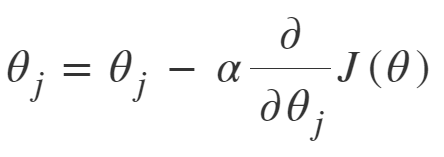


Here, Θ denotes the model parameters, J is the loss function and α is what we call learning rate which is used to specify the strength of the step that we wish to take. A smaller learning rate ensures we do not move away from the minima, but it makes the learning slower, while with a larger learning rate we move quickly towards the minima but are susceptible to overshooting it. Variants of SGD like SGD + Momentum, RMSProp, Adam etc., tries to improve it's noisy nature (which arises due to the fact we work on batches, instead of the entire dataset at a time), by introducing minor modifications to the update equation to prevent the optimizer taking a step in an overly wrong direction, and some also introduce heuristics to decay the step size as we reach closer to the minima. Adam is one of the most used optimizers in Deep Learning applications and often works reasonably well in practical applications. We will use the same for our experiments. You can read more about how these different optimizers work [here](https://cs231n.github.io/neural-networks-3/). 

`torch.optim` provides implementations for all of the optimizers we mentioned above. For official documentation for the same, refer [here](For officialy)/ Below we provide an example on how to define and use optimizers in pytorch



In [ ]:
from torch.optim import Adam

torch.manual_seed(42)
# We will first need to define the model
example_model = LogisticRegressionModel(d_input = 5)

# Defining the optimizer
example_optim = Adam(example_model.parameters(), lr = 1e-3)

Notice that the optimizer takes as input two arguments, the first is the parameters (Θ) of the model that are to be learned using the optimizer and the second is the learning rate (α). Adam optimizer also has other hyperparameters like β1 , β2, ϵ, details of which are beyond the scope of this assignment. However, you need not worry about setting these hyper-parameters as in most of the cases the default vaues of these work well enough. Next let's see how to update the model's parameters using the optimizer



In [ ]:
example_optim.zero_grad() # This is done to zero-out any existing gradients stored from some previous steps
input = torch.rand(2, 5) # Defining a random input for demonstration
preds = example_model(input)
labels = torch.FloatTensor([1,0]) # Defining a random labels for demonstration
loss = loss_fn(preds, labels)
loss.backward() # Perform backward pass
print(f"Parameters before the update: {example_model.linear_layer.weight}")
example_optim.step() # Update the parameters using the optimizer
print(f"Parameters after the update: {example_model.linear_layer.weight}")

torch.Size([2, 5])
Parameters before the update: Parameter containing:
tensor([[ 0.3419,  0.3712, -0.1048,  0.4108, -0.0980]], requires_grad=True)
Parameters after the update: Parameter containing:
tensor([[ 0.3409,  0.3702, -0.1058,  0.4098, -0.0970]], requires_grad=True)


As you can see after calling `example_optim.step()` the parameters get updated. 

### Task 3.3: Training the Model (2.25 Marks)

Now we have all the different components ready and can start training our sentiment classifier. Implement the `train` function below


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam

def train(model, train_dataloader,
          lr = 1e-3, num_epochs = 20,
          device = "cuda",):

  """
  Runs the training loop

  Inputs:
    - model (LogisticRegressionModel): Logistic Regression model to be trained
    - train_dataloader (torch.utils.DataLoader): A dataloader defined over the training dataset
    - lr (float): The learning rate for the optimizer
    - num_epochs (int): Number of epochs to train the model for.
    - device (str): Device to train the model on. Can be either 'cuda' (for using gpu) or 'cpu'

  Returns:
    - model (LogisticRegressionModel): Model after completing the training
    - epoch_loss (float) : Loss value corresponding to the final epoch
  """

  # Transfer the model to specified device
  model = model.to(device)

  # Step 1: Define the Binary Cross Entropy loss function
  loss_fn = nn.BCELoss()
  # YOUR CODE HERE
  #raise NotImplementedError()

  # Step 2: Define Adam Optimizer

  optimizer = None
  optimizer = Adam(model.parameters(), lr)

  # YOUR CODE HERE
  #raise NotImplementedError()

  # Iterate over `num_epochs`
  for epoch in range(num_epochs):
    epoch_loss = 0 # We can use this to keep track of how the loss value changes as we train the model.
    # Iterate over each batch using the `train_dataloader`
    for train_batch in tqdm.tqdm(train_dataloader):
      # Zero out any gradients stored in the previous steps
      optimizer.zero_grad()

      # Unwrap the batch to get features and labels
      features, labels = train_batch

      # Most nn modules and loss functions assume the inputs are of type Float, so convert both features and labels to floats
      features = features.float()
      labels = labels.float()

      # Transfer the features and labels to device
      features = features.to(device)
      labels = labels.to(device)


      # Step 3: Feed the input features to the model to get predictions
      #preds = None
      preds = model(features)
      # YOUR CODE HERE
      #raise NotImplementedError()

      # Step 4: Compute the loss and perform backward pass
      loss = None
      # YOUR CODE HERE
      loss = loss_fn(preds, labels)
      loss.backward()
      #raise NotImplementedError()
  
      # Step 5: Take optimizer step
      # YOUR CODE HERE
      optimizer.step()
      #raise NotImplementedError()

      # Store loss value for tracking
      epoch_loss += loss.item()
    
    epoch_loss = epoch_loss / len(train_dataloader)
    print(f"Epoch {epoch} completed.. Average Loss: {epoch_loss}")

  return model, epoch_loss

In [ ]:
print("Running Sample Test Cases")

print("Training on just 100 training examples for sanity check")
torch.manual_seed(42)
sample_documents = train_df_preprocessed["sentence"].values.tolist()[:100]
sample_labels = train_df["label"].values.tolist()[:100]
sample_vocab = create_vocab(train_documents)
sample_word2idx = get_word_idx_mapping(train_vocab)

sample_dataset = SST2Dataset(sample_documents,
                            sample_labels,
                            sample_vocab,
                            sample_word2idx)

sample_dataloader = DataLoader(sample_dataset)

sample_lr_model = LogisticRegressionModel(d_input = len(sample_vocab))

sample_lr_model, loss = train(sample_lr_model, sample_dataloader,
      lr = 1e-2, num_epochs = 10,
      device = "cuda")

expected_loss = 0.1525375072658062
print(f"Final Loss Value: {loss}")
print(f"Expected Loss Value: {expected_loss}")

#assert np.allclose(expected_loss, loss, 1e-3)

Running Sample Test Cases
Training on just 100 training examples for sanity check


 37%|███▋      | 37/100 [00:00<00:00, 178.68it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 78%|███████▊  | 78/100 [00:00<00:00, 192.19it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 187.27it/s]


torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
Epoch 0 completed.. Average Loss: 0.6931628626585007


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 41%|████      | 41/100 [00:00<00:00, 200.68it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 62%|██████▏   | 62/100 [00:00<00:00, 193.51it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 82%|████████▏ | 82/100 [00:00<00:00, 191.50it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 190.75it/s]


torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
Epoch 1 completed.. Average Loss: 0.5336113427579403


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 18%|█▊        | 18/100 [00:00<00:00, 178.29it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 38%|███▊      | 38/100 [00:00<00:00, 187.89it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 58%|█████▊    | 58/100 [00:00<00:00, 190.44it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 78%|███████▊  | 78/100 [00:00<00:00, 189.59it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 186.94it/s]


torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
Epoch 2 completed.. Average Loss: 0.42539388842880727


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 18%|█▊        | 18/100 [00:00<00:00, 178.75it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 38%|███▊      | 38/100 [00:00<00:00, 187.65it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 57%|█████▋    | 57/100 [00:00<00:00, 186.04it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 77%|███████▋  | 77/100 [00:00<00:00, 190.36it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 183.58it/s]


torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
Epoch 3 completed.. Average Loss: 0.3502707106620073


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 19%|█▉        | 19/100 [00:00<00:00, 182.29it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 38%|███▊      | 38/100 [00:00<00:00, 170.98it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 56%|█████▌    | 56/100 [00:00<00:00, 168.35it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 74%|███████▍  | 74/100 [00:00<00:00, 170.81it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 92%|█████████▏| 92/100 [00:00<00:00, 173.01it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 171.88it/s]


torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
Epoch 4 completed.. Average Loss: 0.2951305686682463


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 19%|█▉        | 19/100 [00:00<00:00, 184.60it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 38%|███▊      | 38/100 [00:00<00:00, 178.21it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 57%|█████▋    | 57/100 [00:00<00:00, 180.93it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 76%|███████▌  | 76/100 [00:00<00:00, 173.18it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 175.65it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


Epoch 5 completed.. Average Loss: 0.25295863214880226


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 16%|█▌        | 16/100 [00:00<00:00, 151.25it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 35%|███▌      | 35/100 [00:00<00:00, 173.28it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 53%|█████▎    | 53/100 [00:00<00:00, 171.67it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 73%|███████▎  | 73/100 [00:00<00:00, 180.18it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 92%|█████████▏| 92/100 [00:00<00:00, 174.92it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 174.25it/s]


torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
Epoch 6 completed.. Average Loss: 0.21972406545653939


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 19%|█▉        | 19/100 [00:00<00:00, 189.12it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 38%|███▊      | 38/100 [00:00<00:00, 178.60it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 56%|█████▌    | 56/100 [00:00<00:00, 177.65it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 74%|███████▍  | 74/100 [00:00<00:00, 177.69it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 92%|█████████▏| 92/100 [00:00<00:00, 176.55it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 177.16it/s]


torch.Size([1, 10781])
Epoch 7 completed.. Average Loss: 0.19292184917256236


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 18%|█▊        | 18/100 [00:00<00:00, 167.89it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 37%|███▋      | 37/100 [00:00<00:00, 173.06it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 56%|█████▌    | 56/100 [00:00<00:00, 176.12it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 74%|███████▍  | 74/100 [00:00<00:00, 171.03it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 92%|█████████▏| 92/100 [00:00<00:00, 172.33it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 172.73it/s]


torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
Epoch 8 completed.. Average Loss: 0.1709037001989782


  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 17%|█▋        | 17/100 [00:00<00:00, 168.41it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 34%|███▍      | 34/100 [00:00<00:00, 166.82it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 52%|█████▏    | 52/100 [00:00<00:00, 167.84it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 70%|███████   | 70/100 [00:00<00:00, 171.42it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


 88%|████████▊ | 88/100 [00:00<00:00, 167.59it/s]

torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])
torch.Size([1, 10781])


100%|██████████| 100/100 [00:00<00:00, 166.87it/s]

torch.Size([1, 10781])
Epoch 9 completed.. Average Loss: 0.15253750838339328
Final Loss Value: 0.15253750838339328
Expected Loss Value: 0.1525375072658062


 Don't worry if the exact loss values do not match, as long as your loss is reducing with epochs and the final loss is in the same range, you should be fine. And now lets train on the entire dataset, this may take some time, approximate 4 minutes per epoch. So relax and have yourself a cup of coffee while this runs`

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

sentiment_lr_model = LogisticRegressionModel(
    d_input = len(train_vocab)
)
sentiment_lr_model, final_loss = train(sentiment_lr_model, train_dataloader,
      lr = 1e-2, num_epochs = 10,
      device = device)

  0%|          | 1/1053 [00:00<03:44,  4.68it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<03:46,  4.63it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:00<03:43,  4.69it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:00<03:46,  4.63it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<03:43,  4.68it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  1%|          | 7/1053 [00:01<03:37,  4.81it/s]

torch.Size([64, 10781])


  1%|          | 8/1053 [00:01<03:38,  4.79it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:01<03:36,  4.81it/s]

torch.Size([64, 10781])


  1%|          | 10/1053 [00:02<03:36,  4.81it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:02<03:38,  4.76it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:02<03:39,  4.75it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:02<03:39,  4.74it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:03<03:34,  4.84it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:03<03:35,  4.81it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:03<03:35,  4.80it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:03<03:35,  4.81it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:03<03:35,  4.81it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:04<03:30,  4.91it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:04<03:28,  4.94it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:04<03:37,  4.74it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:05<03:38,  4.71it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:05<03:29,  4.90it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:05<03:34,  4.78it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:06<03:30,  4.87it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:06<03:30,  4.86it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:06<03:32,  4.80it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:06<03:32,  4.82it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:06<03:32,  4.80it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:07<03:30,  4.85it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:07<03:29,  4.86it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:07<03:33,  4.76it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:07<03:35,  4.72it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:08<03:29,  4.82it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:08<03:28,  4.86it/s]

torch.Size([64, 10781])


  4%|▍         | 42/1053 [00:08<03:31,  4.77it/s]

torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:09<03:26,  4.87it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:09<03:27,  4.86it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:09<03:28,  4.82it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:09<03:32,  4.74it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:10<03:31,  4.76it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:10<03:25,  4.88it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:10<03:29,  4.78it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:10<03:36,  4.63it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:11<03:35,  4.64it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:11<03:34,  4.66it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:11<03:32,  4.71it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:11<03:30,  4.73it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:12<03:25,  4.83it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:12<03:24,  4.85it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:12<03:28,  4.75it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:13<03:26,  4.79it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:13<03:21,  4.91it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:13<03:28,  4.73it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:13<03:26,  4.78it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:14<03:24,  4.81it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:14<03:24,  4.81it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:14<03:24,  4.80it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:14<03:26,  4.76it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:15<03:24,  4.81it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:15<03:26,  4.75it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:15<03:24,  4.79it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:15<03:23,  4.80it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:15<03:26,  4.73it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:16<03:21,  4.83it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:16<03:20,  4.85it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:16<03:22,  4.80it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:16<03:27,  4.67it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:17<03:21,  4.82it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:17<03:21,  4.81it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:17<03:25,  4.71it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:18<03:27,  4.66it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:18<03:25,  4.70it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:18<03:18,  4.84it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:19<03:20,  4.80it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:19<03:18,  4.83it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:19<03:19,  4.80it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:19<03:17,  4.85it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:19<03:18,  4.82it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:20<03:22,  4.73it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:20<03:20,  4.77it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:20<03:18,  4.80it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:20<03:18,  4.80it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:20<03:19,  4.77it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:21<03:17,  4.81it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:21<03:15,  4.87it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:21<03:13,  4.90it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:22<03:17,  4.79it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 10%|█         | 107/1053 [00:22<03:18,  4.76it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:22<03:19,  4.74it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:22<03:16,  4.80it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 11%|█         | 111/1053 [00:23<03:14,  4.84it/s]

torch.Size([64, 10781])


 11%|█         | 112/1053 [00:23<03:13,  4.86it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:23<03:13,  4.85it/s]

torch.Size([64, 10781])


 11%|█         | 114/1053 [00:23<03:20,  4.69it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:24<03:22,  4.63it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:24<03:19,  4.69it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:24<03:18,  4.71it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:24<03:19,  4.69it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:24<03:16,  4.75it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:25<03:12,  4.85it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:25<03:08,  4.93it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:25<03:09,  4.91it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:26<03:10,  4.87it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:26<03:12,  4.83it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:26<03:12,  4.82it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:26<03:13,  4.79it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:27<03:12,  4.79it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:27<03:12,  4.79it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:27<03:12,  4.79it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:27<03:12,  4.79it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:27<03:11,  4.79it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:28<03:14,  4.72it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:28<03:13,  4.74it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:28<03:10,  4.81it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:29<03:10,  4.79it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:29<03:11,  4.78it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:29<03:09,  4.82it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:29<03:10,  4.77it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:29<03:11,  4.76it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:30<03:14,  4.68it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:30<03:08,  4.80it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:30<03:03,  4.94it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:31<03:07,  4.82it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:31<03:06,  4.85it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:31<03:08,  4.79it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:31<03:06,  4.82it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:32<03:13,  4.66it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:32<03:16,  4.58it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:32<03:16,  4.56it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:32<03:14,  4.61it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:33<03:12,  4.66it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:33<03:13,  4.61it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:33<03:05,  4.82it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:33<03:06,  4.77it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:34<03:04,  4.82it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:34<03:06,  4.77it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:34<03:00,  4.91it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:35<02:59,  4.94it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:35<03:02,  4.84it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:35<03:02,  4.83it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:35<03:01,  4.87it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:36<03:03,  4.81it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:36<03:04,  4.76it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:36<03:01,  4.84it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 17%|█▋        | 179/1053 [00:37<02:59,  4.87it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 17%|█▋        | 180/1053 [00:37<02:59,  4.85it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [00:37<03:00,  4.83it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [00:38<03:01,  4.81it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [00:38<03:03,  4.75it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [00:38<03:03,  4.74it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [00:38<03:03,  4.73it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [00:38<03:04,  4.69it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [00:39<03:03,  4.71it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [00:39<03:04,  4.68it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [00:39<03:04,  4.69it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [00:39<03:03,  4.71it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 18%|█▊        | 192/1053 [00:40<03:00,  4.77it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [00:40<03:00,  4.75it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [00:40<03:01,  4.72it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [00:40<03:03,  4.66it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [00:41<03:02,  4.71it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [00:41<03:01,  4.71it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [00:41<03:01,  4.71it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [00:41<02:59,  4.77it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [00:41<02:58,  4.78it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [00:42<02:57,  4.79it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [00:42<03:00,  4.72it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [00:42<03:02,  4.65it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [00:42<03:02,  4.65it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [00:42<03:00,  4.69it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [00:43<02:59,  4.73it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [00:43<03:00,  4.69it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [00:43<03:02,  4.62it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [00:43<03:01,  4.65it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [00:43<02:59,  4.69it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [00:44<02:57,  4.74it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [00:44<03:00,  4.67it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [00:44<02:58,  4.71it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [00:44<02:58,  4.70it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [00:45<02:55,  4.77it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [00:45<02:57,  4.72it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [00:45<03:03,  4.57it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [00:45<02:59,  4.65it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [00:45<02:58,  4.67it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [00:46<02:55,  4.74it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [00:46<02:56,  4.71it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [00:46<02:55,  4.74it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [00:46<02:58,  4.66it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [00:47<02:53,  4.78it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 21%|██▏       | 226/1053 [00:47<02:56,  4.69it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [00:47<02:53,  4.75it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 22%|██▏       | 229/1053 [00:47<02:49,  4.86it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [00:48<02:51,  4.81it/s]

torch.Size([64, 10781])


 22%|██▏       | 231/1053 [00:48<02:55,  4.68it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [00:48<02:54,  4.70it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [00:48<02:55,  4.67it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [00:49<02:56,  4.63it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [00:49<02:54,  4.68it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [00:49<02:54,  4.68it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [00:49<02:53,  4.70it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [00:50<02:49,  4.81it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 23%|██▎       | 240/1053 [00:50<02:50,  4.77it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [00:50<02:53,  4.69it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [00:50<02:54,  4.65it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [00:50<02:54,  4.65it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [00:51<02:51,  4.72it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [00:51<02:51,  4.72it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [00:51<02:52,  4.68it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [00:52<02:46,  4.83it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 24%|██▎       | 249/1053 [00:52<02:46,  4.82it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [00:52<02:48,  4.76it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [00:52<02:56,  4.56it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 24%|██▍       | 253/1053 [00:53<02:48,  4.74it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [00:53<02:47,  4.78it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [00:53<02:49,  4.70it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [00:53<02:47,  4.76it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [00:53<02:49,  4.68it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [00:54<02:48,  4.71it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [00:54<02:47,  4.74it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [00:54<02:50,  4.65it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [00:54<02:48,  4.69it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [00:55<02:43,  4.84it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 25%|██▌       | 264/1053 [00:55<02:44,  4.81it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [00:55<02:44,  4.78it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [00:55<02:45,  4.76it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [00:56<02:43,  4.80it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 26%|██▌       | 269/1053 [00:56<02:39,  4.92it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [00:56<02:47,  4.68it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [00:57<02:42,  4.82it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 26%|██▌       | 274/1053 [00:57<02:39,  4.89it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 26%|██▌       | 275/1053 [00:57<02:42,  4.80it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [00:58<02:38,  4.89it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 26%|██▋       | 279/1053 [00:58<02:35,  4.97it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 27%|██▋       | 280/1053 [00:58<02:38,  4.87it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 27%|██▋       | 283/1053 [00:59<02:35,  4.97it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 27%|██▋       | 284/1053 [00:59<02:39,  4.82it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [00:59<02:40,  4.80it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [00:59<02:41,  4.73it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:00<02:42,  4.72it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:00<02:41,  4.74it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:00<02:44,  4.65it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:00<02:42,  4.69it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:01<02:41,  4.73it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:01<02:40,  4.73it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:01<02:38,  4.79it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:01<02:38,  4.78it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:02<02:35,  4.85it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:02<02:33,  4.91it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:02<02:35,  4.86it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:02<02:39,  4.73it/s]

torch.Size([64, 10781])


 29%|██▊       | 301/1053 [01:03<02:42,  4.64it/s]

torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:03<02:39,  4.71it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:03<02:38,  4.73it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:03<02:37,  4.77it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:03<02:36,  4.79it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:04<02:36,  4.77it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:04<02:36,  4.76it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:04<02:35,  4.79it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:04<02:38,  4.69it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:05<02:40,  4.64it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:05<02:41,  4.59it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:05<02:38,  4.67it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:06<02:34,  4.77it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 30%|███       | 317/1053 [01:06<02:31,  4.87it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 30%|███       | 318/1053 [01:06<02:32,  4.82it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:06<02:31,  4.86it/s]

torch.Size([64, 10781])


 31%|███       | 322/1053 [01:07<02:26,  4.98it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])


 31%|███       | 323/1053 [01:07<02:28,  4.91it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:07<02:32,  4.79it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:08<02:33,  4.73it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:08<02:30,  4.84it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 31%|███       | 328/1053 [01:08<02:32,  4.76it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:08<02:32,  4.75it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:09<02:27,  4.90it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:09<02:27,  4.89it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:09<02:28,  4.84it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:10<02:29,  4.80it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:10<02:27,  4.85it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:10<02:28,  4.81it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:10<02:28,  4.82it/s]

torch.Size([64, 10781])


 32%|███▏      | 339/1053 [01:11<02:27,  4.83it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:11<02:28,  4.80it/s]

torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:11<02:27,  4.84it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:11<02:26,  4.84it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:11<02:29,  4.74it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:12<02:30,  4.71it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:12<02:30,  4.71it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:12<02:27,  4.78it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:12<02:27,  4.80it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:12<02:30,  4.69it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:13<02:30,  4.67it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:13<02:30,  4.66it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:13<02:28,  4.74it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:13<02:31,  4.64it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:14<02:30,  4.64it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:14<02:29,  4.66it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:14<02:28,  4.70it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:14<02:28,  4.68it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [01:14<02:28,  4.70it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [01:15<02:28,  4.68it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 34%|███▍      | 360/1053 [01:15<02:27,  4.69it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [01:15<02:27,  4.70it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [01:15<02:25,  4.76it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [01:16<02:24,  4.76it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [01:16<02:23,  4.81it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 35%|███▍      | 366/1053 [01:16<02:21,  4.85it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [01:16<02:22,  4.80it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [01:17<02:21,  4.83it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 35%|███▌      | 370/1053 [01:17<02:21,  4.81it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 35%|███▌      | 373/1053 [01:18<02:20,  4.85it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 36%|███▌      | 374/1053 [01:18<02:19,  4.87it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [01:18<02:20,  4.83it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [01:18<02:22,  4.74it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [01:19<02:25,  4.63it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [01:19<02:22,  4.72it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 36%|███▌      | 380/1053 [01:19<02:18,  4.85it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [01:19<02:17,  4.87it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [01:20<02:19,  4.80it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [01:20<02:19,  4.80it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [01:20<02:20,  4.78it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [01:20<02:20,  4.74it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 37%|███▋      | 388/1053 [01:21<02:17,  4.83it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 37%|███▋      | 389/1053 [01:21<02:17,  4.84it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 37%|███▋      | 391/1053 [01:21<02:16,  4.86it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [01:22<02:20,  4.72it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [01:22<02:19,  4.72it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [01:22<02:18,  4.76it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [01:22<02:18,  4.76it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [01:23<02:19,  4.71it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [01:23<02:24,  4.54it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [01:23<02:21,  4.61it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [01:23<02:20,  4.66it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [01:23<02:21,  4.62it/s]

torch.Size([64, 10781])


 38%|███▊      | 401/1053 [01:24<02:19,  4.67it/s]

torch.Size([64, 10781])


 38%|███▊      | 402/1053 [01:24<02:23,  4.55it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [01:24<02:21,  4.60it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [01:24<02:20,  4.61it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [01:24<02:19,  4.65it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [01:25<02:15,  4.77it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 39%|███▊      | 408/1053 [01:25<02:17,  4.68it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [01:25<02:17,  4.70it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [01:26<02:17,  4.69it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [01:26<02:15,  4.72it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [01:26<02:14,  4.78it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [01:26<02:13,  4.78it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [01:26<02:14,  4.75it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [01:27<02:15,  4.70it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [01:27<02:16,  4.65it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [01:27<02:15,  4.70it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [01:27<02:13,  4.74it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [01:27<02:12,  4.80it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [01:28<02:12,  4.78it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [01:28<02:14,  4.71it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [01:28<02:15,  4.66it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [01:28<02:14,  4.68it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [01:29<02:14,  4.68it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [01:29<02:13,  4.72it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [01:29<02:14,  4.66it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [01:29<02:15,  4.64it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [01:29<02:18,  4.52it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [01:30<02:16,  4.57it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [01:30<02:20,  4.44it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 41%|████      | 432/1053 [01:30<02:16,  4.55it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [01:30<02:15,  4.59it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [01:31<02:14,  4.61it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [01:31<02:13,  4.61it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [01:31<02:13,  4.63it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [01:31<02:12,  4.64it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [01:32<02:07,  4.81it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 42%|████▏     | 440/1053 [01:32<02:10,  4.69it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [01:32<02:09,  4.71it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [01:32<02:08,  4.74it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [01:33<02:08,  4.75it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [01:33<02:09,  4.71it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [01:33<02:08,  4.75it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [01:33<02:07,  4.76it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [01:33<02:06,  4.81it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [01:34<02:06,  4.77it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [01:34<02:08,  4.70it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [01:34<02:09,  4.65it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [01:34<02:12,  4.54it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [01:35<02:12,  4.54it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [01:35<02:10,  4.58it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [01:35<02:10,  4.60it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [01:35<02:08,  4.67it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [01:35<02:08,  4.66it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 43%|████▎     | 458/1053 [01:36<02:04,  4.80it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [01:36<02:04,  4.79it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 44%|████▍     | 461/1053 [01:36<02:02,  4.82it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [01:37<02:02,  4.84it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [01:37<02:02,  4.82it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [01:37<02:05,  4.68it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [01:37<02:04,  4.73it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [01:38<02:02,  4.80it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 44%|████▍     | 468/1053 [01:38<02:04,  4.69it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [01:38<02:03,  4.74it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [01:38<02:02,  4.74it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [01:39<02:03,  4.71it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 45%|████▍     | 473/1053 [01:39<02:03,  4.71it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [01:39<02:02,  4.71it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 45%|████▌     | 476/1053 [01:40<02:00,  4.80it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [01:40<01:59,  4.81it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [01:40<02:03,  4.66it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [01:40<02:03,  4.66it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [01:40<02:03,  4.63it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [01:41<02:03,  4.65it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [01:41<02:03,  4.64it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [01:41<02:04,  4.59it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [01:41<02:03,  4.59it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [01:42<02:04,  4.55it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [01:42<02:04,  4.56it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [01:42<02:03,  4.60it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [01:42<02:02,  4.61it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [01:42<02:01,  4.65it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [01:43<01:56,  4.81it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 47%|████▋     | 492/1053 [01:43<01:58,  4.73it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [01:43<01:58,  4.73it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [01:43<02:00,  4.64it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 47%|████▋     | 496/1053 [01:44<01:57,  4.73it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [01:44<01:58,  4.71it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [01:45<01:55,  4.82it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 47%|████▋     | 500/1053 [01:45<01:57,  4.72it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [01:45<02:00,  4.58it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [01:45<02:00,  4.59it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [01:45<01:58,  4.63it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [01:46<01:57,  4.66it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [01:46<01:57,  4.67it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [01:46<01:56,  4.69it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [01:46<01:57,  4.66it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [01:46<02:00,  4.52it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [01:47<01:59,  4.56it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [01:47<01:58,  4.59it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [01:47<01:57,  4.62it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [01:47<01:57,  4.62it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [01:48<01:55,  4.68it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [01:48<01:55,  4.69it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [01:48<01:53,  4.73it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [01:48<01:54,  4.71it/s]

torch.Size([64, 10781])


 49%|████▉     | 517/1053 [01:48<01:54,  4.70it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [01:49<01:54,  4.69it/s]

torch.Size([64, 10781])


 49%|████▉     | 519/1053 [01:49<01:54,  4.65it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [01:49<01:54,  4.65it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [01:49<01:54,  4.63it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [01:49<01:54,  4.64it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [01:50<01:54,  4.62it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [01:50<01:53,  4.66it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [01:50<01:52,  4.69it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [01:50<01:53,  4.64it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [01:51<01:51,  4.71it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [01:51<01:53,  4.64it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [01:51<01:51,  4.72it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [01:51<01:52,  4.64it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [01:51<01:52,  4.65it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [01:52<01:51,  4.65it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [01:52<01:51,  4.66it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [01:52<01:49,  4.72it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [01:52<01:51,  4.63it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [01:52<01:50,  4.67it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [01:53<01:49,  4.70it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [01:53<01:49,  4.70it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [01:53<01:49,  4.71it/s]

torch.Size([64, 10781])


 51%|█████▏    | 540/1053 [01:53<01:51,  4.60it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [01:54<01:50,  4.65it/s]

torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [01:54<01:49,  4.68it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [01:54<01:49,  4.66it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [01:54<01:49,  4.65it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [01:54<01:50,  4.58it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [01:55<01:49,  4.63it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [01:55<01:47,  4.72it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [01:55<01:49,  4.61it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [01:55<01:49,  4.60it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [01:56<01:47,  4.66it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [01:56<01:46,  4.70it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [01:56<01:45,  4.75it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [01:56<01:46,  4.70it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [01:57<01:48,  4.59it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [01:57<01:47,  4.64it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [01:57<01:45,  4.70it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [01:57<01:46,  4.63it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [01:57<01:49,  4.51it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [01:58<01:45,  4.66it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [01:58<01:44,  4.69it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [01:58<01:44,  4.71it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [01:58<01:44,  4.68it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [01:59<01:45,  4.64it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [01:59<01:44,  4.67it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [01:59<01:43,  4.70it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [02:00<01:42,  4.71it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [02:00<01:44,  4.62it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [02:00<01:44,  4.60it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [02:00<01:46,  4.53it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [02:00<01:46,  4.49it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [02:01<01:45,  4.54it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [02:01<01:43,  4.60it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [02:01<01:43,  4.60it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [02:01<01:43,  4.58it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [02:02<01:42,  4.61it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [02:02<01:42,  4.62it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [02:02<01:42,  4.62it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [02:03<01:41,  4.63it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [02:03<01:42,  4.59it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [02:03<01:42,  4.58it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [02:03<01:39,  4.67it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [02:03<01:40,  4.65it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [02:04<01:38,  4.73it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [02:04<01:37,  4.74it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [02:04<01:36,  4.78it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [02:04<01:39,  4.64it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [02:05<01:37,  4.71it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [02:05<01:37,  4.73it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [02:05<01:39,  4.59it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [02:05<01:38,  4.66it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [02:06<01:39,  4.59it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [02:06<01:40,  4.52it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [02:06<01:39,  4.56it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [02:06<01:39,  4.56it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [02:06<01:40,  4.51it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [02:07<01:39,  4.52it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [02:07<01:39,  4.54it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [02:07<01:40,  4.48it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [02:07<01:37,  4.58it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [02:08<01:36,  4.61it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [02:08<01:33,  4.76it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [02:08<01:34,  4.68it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [02:08<01:35,  4.66it/s]

torch.Size([64, 10781])


 58%|█████▊    | 611/1053 [02:09<01:34,  4.67it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [02:09<01:33,  4.70it/s]

torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [02:09<01:33,  4.72it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [02:09<01:33,  4.70it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [02:09<01:33,  4.68it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [02:10<01:31,  4.76it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [02:10<01:31,  4.78it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [02:10<01:31,  4.77it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [02:10<01:32,  4.67it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [02:11<01:33,  4.62it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [02:11<01:32,  4.66it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [02:11<01:31,  4.73it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [02:11<01:31,  4.69it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [02:12<01:31,  4.69it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [02:12<01:30,  4.74it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [02:12<01:29,  4.76it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [02:12<01:30,  4.70it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [02:12<01:29,  4.71it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [02:13<01:30,  4.69it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [02:13<01:29,  4.71it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [02:13<01:28,  4.75it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [02:13<01:29,  4.68it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [02:14<01:29,  4.67it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [02:14<01:30,  4.63it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [02:14<01:29,  4.66it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [02:14<01:30,  4.58it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [02:14<01:31,  4.56it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [02:15<01:29,  4.60it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 61%|██████    | 641/1053 [02:15<01:26,  4.75it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [02:15<01:26,  4.73it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [02:15<01:26,  4.74it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [02:16<01:26,  4.72it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [02:16<01:26,  4.69it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [02:16<01:24,  4.79it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [02:17<01:24,  4.81it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [02:17<01:27,  4.64it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [02:17<01:27,  4.59it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [02:17<01:25,  4.70it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [02:17<01:26,  4.65it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [02:18<01:26,  4.62it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [02:18<01:26,  4.63it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [02:18<01:25,  4.66it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [02:18<01:28,  4.48it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [02:19<01:29,  4.44it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [02:19<01:27,  4.51it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [02:19<01:25,  4.59it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [02:19<01:25,  4.61it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [02:19<01:23,  4.68it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [02:20<01:25,  4.60it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [02:20<01:27,  4.48it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [02:20<01:25,  4.54it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [02:20<01:26,  4.51it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [02:20<01:25,  4.53it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [02:21<01:24,  4.55it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [02:21<01:24,  4.53it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [02:21<01:24,  4.57it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [02:21<01:22,  4.66it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [02:22<01:22,  4.64it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [02:22<01:23,  4.55it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [02:22<01:23,  4.55it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [02:22<01:23,  4.52it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [02:22<01:25,  4.42it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [02:23<01:25,  4.42it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [02:23<01:25,  4.39it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [02:23<01:24,  4.44it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [02:23<01:24,  4.44it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [02:24<01:22,  4.54it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [02:24<01:21,  4.56it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [02:24<01:19,  4.65it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [02:24<01:20,  4.57it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [02:24<01:20,  4.57it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [02:25<01:20,  4.56it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [02:25<01:21,  4.51it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [02:25<01:22,  4.46it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [02:25<01:22,  4.40it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [02:26<01:20,  4.50it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [02:26<01:19,  4.57it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [02:26<01:19,  4.55it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [02:26<01:17,  4.65it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [02:26<01:17,  4.66it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [02:27<01:16,  4.69it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [02:27<01:16,  4.65it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [02:27<01:18,  4.53it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [02:27<01:18,  4.51it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [02:28<01:17,  4.56it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [02:28<01:18,  4.53it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [02:28<01:16,  4.61it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [02:28<01:15,  4.66it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [02:29<01:15,  4.62it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [02:29<01:15,  4.61it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [02:29<01:15,  4.60it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [02:29<01:14,  4.66it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [02:30<01:14,  4.65it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [02:30<01:17,  4.46it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [02:30<01:16,  4.49it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [02:30<01:15,  4.52it/s]

torch.Size([64, 10781])


 68%|██████▊   | 713/1053 [02:31<01:12,  4.68it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 68%|██████▊   | 714/1053 [02:31<01:12,  4.66it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [02:31<01:11,  4.71it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [02:31<01:11,  4.70it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [02:32<01:11,  4.67it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [02:32<01:11,  4.68it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [02:32<01:11,  4.66it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [02:32<01:11,  4.63it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [02:33<01:10,  4.67it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [02:33<01:10,  4.66it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [02:33<01:10,  4.65it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [02:33<01:09,  4.71it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [02:34<01:08,  4.76it/s]

torch.Size([64, 10781])


 69%|██████▉   | 727/1053 [02:34<01:08,  4.77it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [02:34<01:08,  4.74it/s]

torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [02:34<01:09,  4.63it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [02:35<01:08,  4.70it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [02:35<01:08,  4.66it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [02:35<01:08,  4.64it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [02:35<01:10,  4.55it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [02:36<01:09,  4.57it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [02:36<01:08,  4.65it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [02:36<01:08,  4.62it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [02:36<01:08,  4.57it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [02:37<01:07,  4.67it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [02:37<01:06,  4.71it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [02:37<01:06,  4.71it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [02:37<01:07,  4.63it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [02:37<01:06,  4.63it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [02:38<01:05,  4.69it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [02:38<01:06,  4.59it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [02:38<01:07,  4.53it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [02:38<01:06,  4.57it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [02:39<01:06,  4.54it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [02:39<01:05,  4.63it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [02:39<01:04,  4.65it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [02:39<01:04,  4.64it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [02:39<01:05,  4.57it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [02:40<01:05,  4.57it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [02:40<01:04,  4.65it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [02:40<01:04,  4.58it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [02:40<01:05,  4.52it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [02:41<01:07,  4.39it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [02:41<01:06,  4.41it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [02:41<01:06,  4.38it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [02:41<01:06,  4.38it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [02:41<01:05,  4.47it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [02:42<01:04,  4.53it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [02:42<01:03,  4.54it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [02:42<01:03,  4.56it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [02:42<01:03,  4.55it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [02:42<01:01,  4.63it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [02:43<01:00,  4.70it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [02:43<01:00,  4.68it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [02:43<01:01,  4.58it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [02:43<01:01,  4.61it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [02:44<01:00,  4.62it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [02:44<01:00,  4.62it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [02:44<01:00,  4.60it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [02:44<01:01,  4.54it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [02:44<01:01,  4.47it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [02:45<01:00,  4.53it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [02:45<00:59,  4.59it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [02:45<01:02,  4.35it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [02:45<01:01,  4.40it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [02:46<01:00,  4.51it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [02:46<00:58,  4.63it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [02:46<00:58,  4.60it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [02:46<00:58,  4.60it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [02:47<00:58,  4.58it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [02:47<00:58,  4.57it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [02:47<00:57,  4.62it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [02:47<00:57,  4.61it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [02:48<00:57,  4.56it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [02:48<00:56,  4.62it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [02:48<00:57,  4.55it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [02:48<00:55,  4.66it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [02:48<00:56,  4.57it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [02:49<00:56,  4.56it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [02:49<00:56,  4.56it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [02:49<00:55,  4.62it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [02:49<00:54,  4.68it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [02:49<00:55,  4.57it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [02:50<00:54,  4.64it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [02:50<00:54,  4.59it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [02:50<00:54,  4.60it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [02:50<00:55,  4.48it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [02:51<00:55,  4.48it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [02:51<00:54,  4.56it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [02:51<00:53,  4.59it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [02:51<00:53,  4.60it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [02:51<00:53,  4.59it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [02:52<00:53,  4.58it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [02:52<00:53,  4.54it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [02:52<00:53,  4.52it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [02:52<00:54,  4.44it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [02:53<00:53,  4.50it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [02:53<00:51,  4.64it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [02:53<00:51,  4.66it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [02:53<00:50,  4.67it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [02:53<00:51,  4.59it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [02:54<00:50,  4.61it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [02:54<00:51,  4.55it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [02:54<00:51,  4.53it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [02:54<00:50,  4.57it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [02:55<00:51,  4.49it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [02:55<00:51,  4.49it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [02:55<00:50,  4.54it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [02:55<00:49,  4.61it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [02:55<00:49,  4.56it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [02:56<00:47,  4.71it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [02:56<00:47,  4.75it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [02:56<00:46,  4.75it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [02:56<00:47,  4.68it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [02:57<00:47,  4.65it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [02:57<00:47,  4.59it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [02:57<00:47,  4.65it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [02:57<00:46,  4.65it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [02:58<00:47,  4.57it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [02:58<00:46,  4.61it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [02:58<00:46,  4.60it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [02:58<00:46,  4.59it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [02:58<00:46,  4.59it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [02:59<00:47,  4.49it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [02:59<00:46,  4.53it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 80%|████████  | 844/1053 [02:59<00:45,  4.59it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [03:00<00:46,  4.51it/s]

torch.Size([64, 10781])


 80%|████████  | 846/1053 [03:00<00:46,  4.49it/s]

torch.Size([64, 10781])


 80%|████████  | 847/1053 [03:00<00:45,  4.49it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [03:00<00:45,  4.52it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [03:00<00:44,  4.55it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [03:01<00:44,  4.53it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [03:01<00:44,  4.53it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [03:01<00:43,  4.63it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [03:01<00:42,  4.68it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [03:01<00:42,  4.67it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [03:02<00:43,  4.58it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [03:02<00:42,  4.66it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [03:02<00:44,  4.45it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [03:02<00:43,  4.44it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [03:03<00:44,  4.38it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [03:03<00:43,  4.48it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [03:03<00:43,  4.46it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [03:03<00:42,  4.54it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [03:04<00:42,  4.48it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [03:04<00:40,  4.59it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [03:04<00:41,  4.56it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [03:05<00:39,  4.66it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [03:05<00:39,  4.61it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [03:05<00:39,  4.60it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [03:05<00:39,  4.58it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [03:05<00:39,  4.62it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [03:06<00:39,  4.58it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [03:06<00:39,  4.50it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [03:06<00:39,  4.51it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [03:06<00:39,  4.51it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [03:07<00:38,  4.57it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [03:07<00:38,  4.53it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [03:07<00:37,  4.62it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [03:07<00:37,  4.63it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [03:07<00:38,  4.51it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [03:08<00:37,  4.56it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [03:08<00:37,  4.52it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [03:08<00:36,  4.63it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [03:08<00:38,  4.35it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [03:09<00:37,  4.40it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [03:09<00:37,  4.44it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [03:09<00:36,  4.53it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [03:09<00:37,  4.43it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [03:09<00:35,  4.53it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [03:10<00:36,  4.47it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [03:10<00:36,  4.43it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [03:10<00:35,  4.52it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [03:10<00:36,  4.32it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [03:11<00:35,  4.47it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [03:11<00:35,  4.48it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [03:11<00:34,  4.52it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [03:11<00:34,  4.50it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [03:11<00:33,  4.61it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [03:12<00:33,  4.57it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [03:12<00:33,  4.48it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [03:12<00:33,  4.55it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [03:12<00:33,  4.51it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [03:13<00:32,  4.54it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [03:13<00:32,  4.58it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [03:13<00:31,  4.62it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [03:13<00:32,  4.55it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [03:13<00:31,  4.55it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [03:14<00:31,  4.54it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [03:14<00:32,  4.44it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [03:14<00:31,  4.54it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [03:14<00:31,  4.52it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [03:15<00:30,  4.52it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [03:15<00:30,  4.56it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [03:15<00:30,  4.56it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [03:15<00:30,  4.55it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [03:15<00:29,  4.54it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [03:16<00:29,  4.61it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [03:16<00:28,  4.63it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [03:16<00:29,  4.53it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [03:16<00:29,  4.53it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [03:17<00:29,  4.49it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [03:17<00:28,  4.52it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [03:17<00:28,  4.51it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [03:17<00:28,  4.55it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [03:17<00:27,  4.54it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [03:18<00:27,  4.64it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [03:18<00:27,  4.58it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [03:18<00:27,  4.46it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [03:18<00:26,  4.56it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [03:18<00:26,  4.56it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [03:19<00:26,  4.53it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [03:19<00:27,  4.44it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [03:19<00:26,  4.50it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [03:19<00:26,  4.46it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [03:20<00:25,  4.60it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [03:20<00:24,  4.67it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [03:20<00:25,  4.56it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [03:20<00:25,  4.55it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [03:20<00:24,  4.64it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [03:21<00:24,  4.54it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [03:21<00:24,  4.50it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [03:21<00:24,  4.41it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [03:21<00:24,  4.48it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [03:22<00:23,  4.58it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [03:22<00:23,  4.61it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [03:22<00:23,  4.58it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [03:22<00:22,  4.58it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [03:22<00:23,  4.45it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [03:23<00:22,  4.55it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [03:23<00:22,  4.50it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [03:23<00:22,  4.53it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [03:23<00:22,  4.53it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [03:24<00:21,  4.52it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [03:24<00:21,  4.53it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [03:24<00:21,  4.49it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [03:24<00:21,  4.46it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [03:24<00:21,  4.52it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [03:25<00:20,  4.50it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [03:25<00:20,  4.53it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [03:25<00:20,  4.52it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [03:25<00:20,  4.47it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [03:26<00:19,  4.52it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [03:26<00:19,  4.52it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [03:26<00:19,  4.51it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [03:26<00:19,  4.48it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [03:26<00:19,  4.44it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [03:27<00:18,  4.50it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [03:27<00:18,  4.46it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [03:27<00:18,  4.43it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [03:27<00:18,  4.47it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [03:28<00:18,  4.47it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [03:28<00:17,  4.53it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [03:28<00:17,  4.48it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [03:28<00:18,  4.23it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [03:28<00:17,  4.33it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [03:29<00:17,  4.44it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [03:29<00:16,  4.48it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [03:29<00:16,  4.53it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [03:29<00:16,  4.51it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [03:30<00:16,  4.47it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [03:30<00:15,  4.55it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [03:30<00:15,  4.51it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [03:30<00:15,  4.51it/s]

torch.Size([64, 10781])


 94%|█████████▎| 985/1053 [03:30<00:14,  4.58it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [03:31<00:14,  4.56it/s]

torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [03:31<00:14,  4.56it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [03:31<00:14,  4.58it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [03:31<00:14,  4.45it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [03:32<00:13,  4.62it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [03:32<00:13,  4.49it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [03:32<00:13,  4.41it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [03:32<00:12,  4.54it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [03:33<00:12,  4.63it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [03:33<00:12,  4.66it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [03:33<00:11,  4.69it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [03:33<00:12,  4.58it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [03:34<00:11,  4.56it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [03:34<00:11,  4.67it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [03:34<00:10,  4.70it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [03:34<00:10,  4.58it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [03:35<00:10,  4.61it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [03:35<00:10,  4.61it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [03:35<00:10,  4.53it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [03:35<00:09,  4.57it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [03:36<00:09,  4.60it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [03:36<00:09,  4.58it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [03:36<00:09,  4.57it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [03:36<00:09,  4.49it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [03:37<00:08,  4.52it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [03:37<00:08,  4.54it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [03:37<00:08,  4.60it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [03:37<00:08,  4.50it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [03:37<00:07,  4.51it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [03:38<00:07,  4.50it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [03:38<00:07,  4.54it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [03:38<00:07,  4.61it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [03:39<00:06,  4.66it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [03:39<00:06,  4.58it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [03:39<00:06,  4.62it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [03:39<00:06,  4.58it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [03:39<00:05,  4.54it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [03:40<00:05,  4.55it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [03:40<00:05,  4.57it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [03:40<00:05,  4.55it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [03:40<00:04,  4.60it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [03:41<00:04,  4.52it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [03:41<00:04,  4.49it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [03:41<00:04,  4.48it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [03:41<00:04,  4.41it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [03:41<00:04,  4.39it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [03:42<00:03,  4.42it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [03:42<00:03,  4.38it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [03:42<00:03,  4.56it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [03:43<00:02,  4.45it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [03:43<00:02,  4.51it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [03:43<00:02,  4.45it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [03:43<00:02,  4.48it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [03:43<00:01,  4.51it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [03:44<00:01,  4.54it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [03:44<00:01,  4.62it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [03:44<00:01,  4.60it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [03:45<00:00,  4.52it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [03:45<00:00,  4.60it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [03:45<00:00,  4.59it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [03:45<00:00,  4.66it/s]


torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 0 completed.. Average Loss: 0.43306251315989047


  0%|          | 1/1053 [00:00<04:14,  4.13it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<03:56,  4.45it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:00<03:59,  4.38it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:00<03:51,  4.53it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<03:51,  4.54it/s]

torch.Size([64, 10781])


  1%|          | 6/1053 [00:01<03:52,  4.49it/s]

torch.Size([64, 10781])


  1%|          | 7/1053 [00:01<03:48,  4.57it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:01<03:47,  4.60it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  1%|          | 10/1053 [00:02<03:47,  4.58it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:02<03:48,  4.56it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:02<03:46,  4.59it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:02<03:49,  4.53it/s]

torch.Size([64, 10781])


  1%|▏         | 14/1053 [00:03<03:49,  4.53it/s]

torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:03<03:48,  4.53it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:03<03:51,  4.48it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:03<03:48,  4.53it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:03<03:49,  4.51it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:04<03:48,  4.53it/s]

torch.Size([64, 10781])


  2%|▏         | 20/1053 [00:04<03:51,  4.47it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:04<03:48,  4.52it/s]

torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:04<03:48,  4.52it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:05<03:44,  4.59it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:05<03:48,  4.50it/s]

torch.Size([64, 10781])


  2%|▏         | 25/1053 [00:05<03:47,  4.52it/s]

torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:05<03:44,  4.57it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:05<03:46,  4.53it/s]

torch.Size([64, 10781])


  3%|▎         | 28/1053 [00:06<03:44,  4.56it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:06<03:44,  4.56it/s]

torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:06<03:42,  4.59it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:06<03:47,  4.49it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:07<03:53,  4.38it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:07<03:56,  4.30it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:07<03:48,  4.46it/s]

torch.Size([64, 10781])


  3%|▎         | 35/1053 [00:07<03:54,  4.35it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:07<03:51,  4.39it/s]

torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:08<03:47,  4.47it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:08<03:49,  4.41it/s]

torch.Size([64, 10781])


  4%|▎         | 39/1053 [00:08<03:47,  4.47it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:08<03:46,  4.47it/s]

torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:09<03:45,  4.49it/s]

torch.Size([64, 10781])


  4%|▍         | 43/1053 [00:09<03:41,  4.57it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:09<03:41,  4.56it/s]

torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:09<03:38,  4.61it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:10<03:41,  4.55it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:10<03:42,  4.51it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:10<03:39,  4.59it/s]

torch.Size([64, 10781])


  5%|▍         | 49/1053 [00:10<03:47,  4.41it/s]

torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:11<03:48,  4.39it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:11<03:50,  4.36it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:11<03:47,  4.40it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:11<03:45,  4.43it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:12<03:48,  4.37it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:12<03:48,  4.37it/s]

torch.Size([64, 10781])


  5%|▌         | 56/1053 [00:12<03:48,  4.36it/s]

torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:12<03:41,  4.51it/s]

torch.Size([64, 10781])


  6%|▌         | 58/1053 [00:12<03:45,  4.41it/s]

torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:13<03:42,  4.47it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:13<03:40,  4.50it/s]

torch.Size([64, 10781])


  6%|▌         | 61/1053 [00:13<03:44,  4.41it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:13<03:38,  4.53it/s]

torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:14<03:37,  4.55it/s]

torch.Size([64, 10781])


  6%|▌         | 64/1053 [00:14<03:34,  4.61it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:14<03:36,  4.57it/s]

torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:14<03:43,  4.42it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:14<03:43,  4.41it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:15<03:43,  4.40it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:15<03:38,  4.50it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:15<03:43,  4.40it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:15<03:37,  4.51it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:16<03:39,  4.46it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:16<03:38,  4.48it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:16<03:39,  4.46it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:16<03:36,  4.52it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:16<03:42,  4.38it/s]

torch.Size([64, 10781])


  7%|▋         | 77/1053 [00:17<03:40,  4.43it/s]

torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:17<03:37,  4.49it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:17<03:38,  4.45it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:17<03:40,  4.42it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:18<03:42,  4.37it/s]

torch.Size([64, 10781])


  8%|▊         | 82/1053 [00:18<03:40,  4.41it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:18<03:38,  4.43it/s]

torch.Size([64, 10781])


  8%|▊         | 84/1053 [00:18<03:39,  4.41it/s]

torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:18<03:37,  4.44it/s]

torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:19<03:36,  4.47it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:19<03:36,  4.46it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:19<03:37,  4.44it/s]

torch.Size([64, 10781])


  8%|▊         | 89/1053 [00:19<03:34,  4.49it/s]

torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:20<03:32,  4.53it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:20<03:30,  4.58it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:20<03:27,  4.62it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:20<03:32,  4.52it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:20<03:34,  4.46it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:21<03:39,  4.37it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:21<03:34,  4.46it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:21<03:35,  4.45it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:21<03:32,  4.49it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:22<03:34,  4.44it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:22<03:34,  4.45it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:22<03:36,  4.41it/s]

torch.Size([64, 10781])


 10%|▉         | 102/1053 [00:22<03:38,  4.36it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:23<03:38,  4.35it/s]

torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:23<03:39,  4.32it/s]

torch.Size([64, 10781])


 10%|▉         | 105/1053 [00:23<03:34,  4.41it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:23<03:36,  4.38it/s]

torch.Size([64, 10781])


 10%|█         | 107/1053 [00:23<03:35,  4.39it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:24<03:34,  4.40it/s]

torch.Size([64, 10781])


 10%|█         | 109/1053 [00:24<03:33,  4.42it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:24<03:29,  4.49it/s]

torch.Size([64, 10781])


 11%|█         | 111/1053 [00:24<03:30,  4.47it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:25<03:22,  4.65it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 11%|█         | 114/1053 [00:25<03:23,  4.62it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:25<03:28,  4.49it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:25<03:25,  4.57it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:26<03:24,  4.59it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:26<03:28,  4.48it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:26<03:30,  4.43it/s]

torch.Size([64, 10781])


 11%|█▏        | 120/1053 [00:26<03:31,  4.41it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:27<03:34,  4.34it/s]

torch.Size([64, 10781])


 12%|█▏        | 122/1053 [00:27<03:36,  4.29it/s]

torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:27<03:35,  4.33it/s]

torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:27<03:33,  4.36it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:27<03:32,  4.37it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:28<03:29,  4.42it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:28<03:28,  4.44it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:28<03:27,  4.46it/s]

torch.Size([64, 10781])


 12%|█▏        | 129/1053 [00:28<03:29,  4.40it/s]

torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:29<03:31,  4.37it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:29<03:30,  4.38it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:29<03:29,  4.40it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:29<03:29,  4.39it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:30<03:29,  4.39it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:30<03:35,  4.27it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:30<03:31,  4.33it/s]

torch.Size([64, 10781])


 13%|█▎        | 137/1053 [00:30<03:29,  4.37it/s]

torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:30<03:28,  4.38it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:31<03:26,  4.43it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:31<03:23,  4.49it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:31<03:22,  4.49it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:31<03:30,  4.34it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:32<03:29,  4.34it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:32<03:28,  4.36it/s]

torch.Size([64, 10781])


 14%|█▍        | 145/1053 [00:32<03:26,  4.40it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:32<03:23,  4.45it/s]

torch.Size([64, 10781])


 14%|█▍        | 147/1053 [00:32<03:23,  4.44it/s]

torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:33<03:24,  4.42it/s]

torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:33<03:24,  4.41it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:33<03:22,  4.46it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:33<03:23,  4.44it/s]

torch.Size([64, 10781])


 14%|█▍        | 152/1053 [00:34<03:23,  4.43it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:34<03:22,  4.45it/s]

torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:34<03:20,  4.49it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:34<03:26,  4.34it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:35<03:28,  4.31it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:35<03:24,  4.39it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:35<03:22,  4.41it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:35<03:26,  4.34it/s]

torch.Size([64, 10781])


 15%|█▌        | 160/1053 [00:35<03:24,  4.38it/s]

torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:36<03:21,  4.43it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:36<03:18,  4.49it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:36<03:17,  4.51it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:36<03:18,  4.47it/s]

torch.Size([64, 10781])


 16%|█▌        | 165/1053 [00:37<03:22,  4.40it/s]

torch.Size([64, 10781])


 16%|█▌        | 166/1053 [00:37<03:19,  4.45it/s]

torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:37<03:18,  4.47it/s]

torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:37<03:15,  4.52it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:37<03:19,  4.44it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:38<03:16,  4.50it/s]

torch.Size([64, 10781])


 16%|█▌        | 171/1053 [00:38<03:16,  4.48it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:38<03:14,  4.52it/s]

torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:38<03:16,  4.47it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:39<03:17,  4.44it/s]

torch.Size([64, 10781])


 17%|█▋        | 175/1053 [00:39<03:17,  4.45it/s]

torch.Size([64, 10781])


 17%|█▋        | 176/1053 [00:39<03:16,  4.46it/s]

torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:39<03:12,  4.56it/s]

torch.Size([64, 10781])


 17%|█▋        | 178/1053 [00:39<03:11,  4.57it/s]

torch.Size([64, 10781])


 17%|█▋        | 179/1053 [00:40<03:18,  4.40it/s]

torch.Size([64, 10781])


 17%|█▋        | 180/1053 [00:40<03:17,  4.42it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [00:40<03:21,  4.33it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [00:40<03:19,  4.36it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [00:41<03:20,  4.33it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [00:41<03:18,  4.39it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [00:41<03:21,  4.32it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [00:41<03:17,  4.40it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [00:42<03:20,  4.33it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [00:42<03:17,  4.39it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [00:42<03:15,  4.43it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [00:42<03:12,  4.49it/s]

torch.Size([64, 10781])


 18%|█▊        | 191/1053 [00:42<03:15,  4.41it/s]

torch.Size([64, 10781])


 18%|█▊        | 192/1053 [00:43<03:15,  4.41it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [00:43<03:11,  4.48it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [00:43<03:12,  4.47it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [00:43<03:12,  4.47it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [00:44<03:15,  4.38it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [00:44<03:11,  4.46it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [00:44<03:10,  4.48it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [00:44<03:11,  4.47it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [00:44<03:15,  4.37it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [00:45<03:12,  4.42it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [00:45<03:08,  4.51it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [00:45<03:09,  4.48it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [00:45<03:11,  4.43it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [00:46<03:08,  4.50it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [00:46<03:12,  4.40it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [00:46<03:12,  4.41it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [00:46<03:13,  4.36it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [00:46<03:15,  4.32it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [00:47<03:13,  4.35it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [00:47<03:12,  4.38it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [00:47<03:09,  4.44it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [00:47<03:05,  4.54it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [00:48<03:06,  4.49it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [00:48<03:08,  4.44it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [00:48<03:06,  4.48it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [00:48<03:08,  4.43it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [00:48<03:07,  4.44it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [00:49<03:11,  4.35it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [00:49<03:10,  4.38it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [00:49<03:08,  4.41it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [00:49<03:05,  4.49it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [00:50<03:04,  4.50it/s]

torch.Size([64, 10781])


 21%|██▏       | 224/1053 [00:50<03:11,  4.33it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [00:50<03:06,  4.45it/s]

torch.Size([64, 10781])


 21%|██▏       | 226/1053 [00:50<03:07,  4.40it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [00:51<03:06,  4.43it/s]

torch.Size([64, 10781])


 22%|██▏       | 228/1053 [00:51<03:09,  4.35it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [00:51<03:03,  4.48it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 22%|██▏       | 231/1053 [00:51<03:05,  4.44it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [00:52<03:01,  4.52it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [00:52<03:01,  4.51it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [00:52<03:03,  4.47it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [00:52<03:08,  4.35it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [00:53<03:08,  4.34it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [00:53<03:07,  4.35it/s]

torch.Size([64, 10781])


 23%|██▎       | 238/1053 [00:53<03:05,  4.38it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [00:53<03:06,  4.37it/s]

torch.Size([64, 10781])


 23%|██▎       | 240/1053 [00:53<03:02,  4.45it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [00:54<03:05,  4.38it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [00:54<03:06,  4.35it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [00:54<03:07,  4.31it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [00:54<03:05,  4.37it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [00:55<03:04,  4.39it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [00:55<03:07,  4.29it/s]

torch.Size([64, 10781])


 23%|██▎       | 247/1053 [00:55<03:05,  4.35it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [00:55<03:02,  4.40it/s]

torch.Size([64, 10781])


 24%|██▎       | 249/1053 [00:56<03:02,  4.40it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [00:56<03:01,  4.42it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [00:56<03:05,  4.33it/s]

torch.Size([64, 10781])


 24%|██▍       | 252/1053 [00:56<03:01,  4.41it/s]

torch.Size([64, 10781])


 24%|██▍       | 253/1053 [00:56<03:00,  4.43it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [00:57<02:59,  4.45it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [00:57<03:03,  4.36it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [00:57<02:59,  4.45it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [00:57<03:01,  4.38it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [00:58<03:03,  4.34it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [00:58<03:00,  4.40it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [00:58<03:04,  4.30it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [00:58<03:03,  4.31it/s]

torch.Size([64, 10781])


 25%|██▍       | 262/1053 [00:59<03:01,  4.36it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [00:59<02:58,  4.44it/s]

torch.Size([64, 10781])


 25%|██▌       | 264/1053 [00:59<03:00,  4.37it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [00:59<03:03,  4.30it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [00:59<03:02,  4.30it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [01:00<03:01,  4.33it/s]

torch.Size([64, 10781])


 25%|██▌       | 268/1053 [01:00<03:03,  4.29it/s]

torch.Size([64, 10781])


 26%|██▌       | 269/1053 [01:00<03:01,  4.33it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [01:00<02:57,  4.41it/s]

torch.Size([64, 10781])


 26%|██▌       | 271/1053 [01:01<02:57,  4.41it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [01:01<02:52,  4.53it/s]

torch.Size([64, 10781])


 26%|██▌       | 273/1053 [01:01<02:56,  4.41it/s]

torch.Size([64, 10781])


 26%|██▌       | 274/1053 [01:01<02:53,  4.48it/s]

torch.Size([64, 10781])


 26%|██▌       | 275/1053 [01:02<02:59,  4.33it/s]

torch.Size([64, 10781])


 26%|██▌       | 276/1053 [01:02<02:55,  4.43it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [01:02<02:55,  4.42it/s]

torch.Size([64, 10781])


 26%|██▋       | 278/1053 [01:02<02:55,  4.42it/s]

torch.Size([64, 10781])


 26%|██▋       | 279/1053 [01:02<02:52,  4.47it/s]

torch.Size([64, 10781])


 27%|██▋       | 280/1053 [01:03<02:53,  4.47it/s]

torch.Size([64, 10781])


 27%|██▋       | 281/1053 [01:03<02:54,  4.43it/s]

torch.Size([64, 10781])


 27%|██▋       | 282/1053 [01:03<02:54,  4.42it/s]

torch.Size([64, 10781])


 27%|██▋       | 283/1053 [01:03<02:51,  4.49it/s]

torch.Size([64, 10781])


 27%|██▋       | 284/1053 [01:04<02:51,  4.47it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [01:04<02:51,  4.48it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [01:04<02:51,  4.47it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:04<02:56,  4.34it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:04<02:52,  4.43it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:05<02:51,  4.45it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:05<02:49,  4.50it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:05<02:51,  4.45it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:05<02:52,  4.41it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:06<02:50,  4.45it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:06<02:48,  4.50it/s]

torch.Size([64, 10781])


 28%|██▊       | 295/1053 [01:06<02:49,  4.47it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:06<02:50,  4.44it/s]

torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:06<02:49,  4.47it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:07<02:48,  4.48it/s]

torch.Size([64, 10781])


 28%|██▊       | 299/1053 [01:07<02:46,  4.53it/s]

torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:07<02:54,  4.32it/s]

torch.Size([64, 10781])


 29%|██▊       | 301/1053 [01:07<02:50,  4.42it/s]

torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:08<02:48,  4.46it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:08<02:48,  4.44it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:08<02:47,  4.47it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:08<02:50,  4.40it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:08<02:50,  4.39it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:09<02:52,  4.33it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:09<02:48,  4.42it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:09<02:52,  4.30it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:09<02:49,  4.37it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:10<02:47,  4.43it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:10<02:45,  4.47it/s]

torch.Size([64, 10781])


 30%|██▉       | 313/1053 [01:10<02:47,  4.43it/s]

torch.Size([64, 10781])


 30%|██▉       | 314/1053 [01:10<02:49,  4.37it/s]

torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:11<02:47,  4.41it/s]

torch.Size([64, 10781])


 30%|███       | 316/1053 [01:11<02:45,  4.45it/s]

torch.Size([64, 10781])


 30%|███       | 317/1053 [01:11<02:42,  4.52it/s]

torch.Size([64, 10781])


 30%|███       | 318/1053 [01:11<02:43,  4.50it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:11<02:48,  4.36it/s]

torch.Size([64, 10781])


 30%|███       | 320/1053 [01:12<02:48,  4.36it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 31%|███       | 322/1053 [01:12<02:42,  4.49it/s]

torch.Size([64, 10781])


 31%|███       | 323/1053 [01:12<02:42,  4.50it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:13<02:50,  4.28it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:13<02:50,  4.27it/s]

torch.Size([64, 10781])


 31%|███       | 326/1053 [01:13<02:53,  4.20it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:13<02:47,  4.33it/s]

torch.Size([64, 10781])


 31%|███       | 328/1053 [01:13<02:47,  4.33it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:14<02:43,  4.42it/s]

torch.Size([64, 10781])


 31%|███▏      | 330/1053 [01:14<02:42,  4.44it/s]

torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:14<02:41,  4.48it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:14<02:43,  4.41it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:15<02:42,  4.44it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:15<02:41,  4.45it/s]

torch.Size([64, 10781])


 32%|███▏      | 335/1053 [01:15<02:41,  4.44it/s]

torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:15<02:45,  4.33it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:16<02:45,  4.32it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:16<02:41,  4.42it/s]

torch.Size([64, 10781])


 32%|███▏      | 339/1053 [01:16<02:40,  4.46it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:16<02:39,  4.48it/s]

torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:16<02:44,  4.33it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:17<02:41,  4.40it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:17<02:41,  4.39it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:17<02:44,  4.30it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:17<02:42,  4.35it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:18<02:41,  4.38it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:18<02:40,  4.41it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:18<02:38,  4.46it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:18<02:39,  4.42it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:18<02:42,  4.34it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:19<02:42,  4.31it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:19<02:39,  4.39it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:19<02:37,  4.45it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:19<02:38,  4.42it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:20<02:40,  4.35it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:20<02:39,  4.38it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [01:20<02:37,  4.41it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [01:20<02:39,  4.35it/s]

torch.Size([64, 10781])


 34%|███▍      | 359/1053 [01:21<02:40,  4.33it/s]

torch.Size([64, 10781])


 34%|███▍      | 360/1053 [01:21<02:36,  4.43it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [01:21<02:35,  4.44it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [01:21<02:35,  4.44it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [01:21<02:35,  4.44it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [01:22<02:35,  4.42it/s]

torch.Size([64, 10781])


 35%|███▍      | 365/1053 [01:22<02:34,  4.46it/s]

torch.Size([64, 10781])


 35%|███▍      | 366/1053 [01:22<02:35,  4.42it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [01:22<02:36,  4.40it/s]

torch.Size([64, 10781])


 35%|███▍      | 368/1053 [01:23<02:38,  4.32it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [01:23<02:36,  4.38it/s]

torch.Size([64, 10781])


 35%|███▌      | 370/1053 [01:23<02:36,  4.38it/s]

torch.Size([64, 10781])


 35%|███▌      | 371/1053 [01:23<02:34,  4.41it/s]

torch.Size([64, 10781])


 35%|███▌      | 372/1053 [01:23<02:35,  4.39it/s]

torch.Size([64, 10781])


 35%|███▌      | 373/1053 [01:24<02:33,  4.44it/s]

torch.Size([64, 10781])


 36%|███▌      | 374/1053 [01:24<02:32,  4.46it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [01:24<02:32,  4.44it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [01:24<02:31,  4.46it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [01:25<02:34,  4.37it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [01:25<02:34,  4.38it/s]

torch.Size([64, 10781])


 36%|███▌      | 379/1053 [01:25<02:31,  4.46it/s]

torch.Size([64, 10781])


 36%|███▌      | 380/1053 [01:25<02:31,  4.43it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [01:26<02:29,  4.48it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [01:26<02:30,  4.45it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [01:26<02:29,  4.47it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [01:26<02:30,  4.44it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [01:26<02:31,  4.41it/s]

torch.Size([64, 10781])


 37%|███▋      | 386/1053 [01:27<02:31,  4.39it/s]

torch.Size([64, 10781])


 37%|███▋      | 387/1053 [01:27<02:30,  4.43it/s]

torch.Size([64, 10781])


 37%|███▋      | 388/1053 [01:27<02:26,  4.54it/s]

torch.Size([64, 10781])


 37%|███▋      | 389/1053 [01:27<02:25,  4.55it/s]

torch.Size([64, 10781])


 37%|███▋      | 390/1053 [01:28<02:28,  4.46it/s]

torch.Size([64, 10781])


 37%|███▋      | 391/1053 [01:28<02:28,  4.46it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [01:28<02:29,  4.44it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [01:28<02:32,  4.33it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [01:28<02:28,  4.43it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [01:29<02:32,  4.31it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [01:29<02:32,  4.32it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [01:29<02:33,  4.26it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [01:29<02:30,  4.35it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [01:30<02:31,  4.33it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [01:30<02:32,  4.27it/s]

torch.Size([64, 10781])


 38%|███▊      | 401/1053 [01:30<02:32,  4.28it/s]

torch.Size([64, 10781])


 38%|███▊      | 402/1053 [01:30<02:33,  4.24it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [01:31<02:36,  4.16it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [01:31<02:30,  4.32it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [01:31<02:27,  4.41it/s]

torch.Size([64, 10781])


 39%|███▊      | 406/1053 [01:31<02:24,  4.48it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [01:31<02:22,  4.53it/s]

torch.Size([64, 10781])


 39%|███▊      | 408/1053 [01:32<02:26,  4.41it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [01:32<02:23,  4.49it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [01:32<02:23,  4.48it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [01:32<02:26,  4.38it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [01:33<02:28,  4.32it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [01:33<02:32,  4.20it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [01:33<02:27,  4.33it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [01:33<02:28,  4.31it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [01:34<02:29,  4.25it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [01:34<02:27,  4.30it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [01:34<02:28,  4.26it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [01:34<02:33,  4.14it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [01:34<02:29,  4.22it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [01:35<02:30,  4.19it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [01:35<02:29,  4.21it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [01:35<02:29,  4.22it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [01:35<02:26,  4.30it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [01:36<02:27,  4.25it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [01:36<02:24,  4.34it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [01:36<02:22,  4.39it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [01:36<02:21,  4.42it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [01:37<02:20,  4.44it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [01:37<02:24,  4.31it/s]

torch.Size([64, 10781])


 41%|████      | 431/1053 [01:37<02:21,  4.40it/s]

torch.Size([64, 10781])


 41%|████      | 432/1053 [01:37<02:20,  4.43it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [01:37<02:21,  4.39it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [01:38<02:20,  4.39it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [01:38<02:20,  4.39it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [01:38<02:20,  4.40it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [01:38<02:19,  4.40it/s]

torch.Size([64, 10781])


 42%|████▏     | 438/1053 [01:39<02:20,  4.37it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [01:39<02:17,  4.45it/s]

torch.Size([64, 10781])


 42%|████▏     | 440/1053 [01:39<02:17,  4.45it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [01:39<02:19,  4.40it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [01:40<02:19,  4.39it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [01:40<02:17,  4.42it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [01:40<02:21,  4.31it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [01:40<02:17,  4.43it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [01:40<02:15,  4.47it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [01:41<02:18,  4.39it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [01:41<02:19,  4.33it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [01:41<02:19,  4.32it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [01:41<02:16,  4.42it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [01:42<02:15,  4.45it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [01:42<02:14,  4.46it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [01:42<02:17,  4.36it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [01:42<02:16,  4.40it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [01:42<02:15,  4.43it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [01:43<02:15,  4.41it/s]

torch.Size([64, 10781])


 43%|████▎     | 457/1053 [01:43<02:16,  4.38it/s]

torch.Size([64, 10781])


 43%|████▎     | 458/1053 [01:43<02:14,  4.41it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [01:43<02:12,  4.49it/s]

torch.Size([64, 10781])


 44%|████▎     | 460/1053 [01:44<02:10,  4.55it/s]

torch.Size([64, 10781])


 44%|████▍     | 461/1053 [01:44<02:12,  4.48it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [01:44<02:12,  4.46it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [01:44<02:12,  4.46it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [01:44<02:15,  4.35it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [01:45<02:11,  4.47it/s]

torch.Size([64, 10781])


 44%|████▍     | 466/1053 [01:45<02:19,  4.20it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [01:45<02:16,  4.30it/s]

torch.Size([64, 10781])


 44%|████▍     | 468/1053 [01:45<02:14,  4.36it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [01:46<02:12,  4.42it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [01:46<02:11,  4.42it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [01:46<02:12,  4.39it/s]

torch.Size([64, 10781])


 45%|████▍     | 472/1053 [01:46<02:12,  4.39it/s]

torch.Size([64, 10781])


 45%|████▍     | 473/1053 [01:47<02:11,  4.42it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [01:47<02:11,  4.41it/s]

torch.Size([64, 10781])


 45%|████▌     | 475/1053 [01:47<02:11,  4.39it/s]

torch.Size([64, 10781])


 45%|████▌     | 476/1053 [01:47<02:09,  4.46it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [01:47<02:08,  4.48it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [01:48<02:09,  4.45it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [01:48<02:08,  4.48it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [01:48<02:08,  4.47it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [01:48<02:11,  4.34it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [01:49<02:12,  4.30it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [01:49<02:09,  4.39it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [01:49<02:13,  4.25it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [01:49<02:12,  4.29it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [01:50<02:11,  4.31it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [01:50<02:10,  4.33it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [01:50<02:11,  4.31it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [01:50<02:10,  4.33it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [01:51<02:03,  4.57it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 47%|████▋     | 492/1053 [01:51<02:05,  4.49it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [01:51<02:06,  4.43it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [01:51<02:08,  4.34it/s]

torch.Size([64, 10781])


 47%|████▋     | 495/1053 [01:52<02:06,  4.41it/s]

torch.Size([64, 10781])


 47%|████▋     | 496/1053 [01:52<02:07,  4.37it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [01:52<02:06,  4.39it/s]

torch.Size([64, 10781])


 47%|████▋     | 498/1053 [01:52<02:08,  4.31it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [01:52<02:07,  4.34it/s]

torch.Size([64, 10781])


 47%|████▋     | 500/1053 [01:53<02:06,  4.37it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [01:53<02:05,  4.41it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [01:53<02:06,  4.35it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [01:53<02:05,  4.38it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [01:54<02:04,  4.40it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [01:54<02:04,  4.41it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [01:54<02:04,  4.40it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [01:54<02:04,  4.37it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [01:55<02:10,  4.18it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [01:55<02:09,  4.19it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [01:55<02:09,  4.18it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [01:55<02:08,  4.21it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [01:56<02:05,  4.31it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [01:56<02:05,  4.29it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [01:56<02:04,  4.31it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [01:56<02:06,  4.25it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [01:56<02:04,  4.32it/s]

torch.Size([64, 10781])


 49%|████▉     | 517/1053 [01:57<02:05,  4.26it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [01:57<02:03,  4.32it/s]

torch.Size([64, 10781])


 49%|████▉     | 519/1053 [01:57<02:04,  4.27it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [01:57<02:04,  4.28it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [01:58<02:03,  4.30it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [01:58<02:01,  4.37it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [01:58<02:05,  4.23it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [01:58<02:02,  4.31it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [01:59<02:01,  4.34it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [01:59<02:01,  4.35it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [01:59<02:00,  4.36it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [01:59<02:01,  4.33it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [01:59<02:03,  4.25it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [02:00<02:01,  4.30it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [02:00<02:01,  4.30it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [02:00<01:59,  4.38it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [02:00<02:04,  4.18it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [02:01<02:00,  4.31it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [02:01<02:01,  4.28it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [02:01<01:58,  4.35it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [02:01<02:00,  4.28it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [02:02<02:00,  4.28it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [02:02<01:57,  4.38it/s]

torch.Size([64, 10781])


 51%|█████▏    | 540/1053 [02:02<01:58,  4.32it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [02:02<01:59,  4.28it/s]

torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [02:02<02:01,  4.21it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [02:03<01:58,  4.29it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [02:03<01:57,  4.33it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [02:03<01:58,  4.29it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [02:03<01:57,  4.32it/s]

torch.Size([64, 10781])


 52%|█████▏    | 547/1053 [02:04<01:56,  4.34it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [02:04<01:55,  4.38it/s]

torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [02:04<01:53,  4.42it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [02:04<01:54,  4.41it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [02:05<01:56,  4.31it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [02:05<01:56,  4.30it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [02:05<01:54,  4.36it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [02:05<01:53,  4.41it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [02:05<01:56,  4.26it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [02:06<01:53,  4.37it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [02:06<01:52,  4.40it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [02:06<01:54,  4.34it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [02:06<01:58,  4.18it/s]

torch.Size([64, 10781])


 53%|█████▎    | 560/1053 [02:07<01:52,  4.36it/s]

torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [02:07<01:54,  4.30it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [02:07<01:53,  4.34it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [02:07<01:50,  4.43it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [02:08<01:54,  4.26it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [02:08<01:57,  4.16it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [02:08<01:54,  4.24it/s]

torch.Size([64, 10781])


 54%|█████▍    | 567/1053 [02:08<01:52,  4.31it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [02:08<01:52,  4.32it/s]

torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [02:09<01:53,  4.25it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [02:09<01:53,  4.26it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [02:09<01:51,  4.34it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [02:09<01:53,  4.24it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [02:10<01:52,  4.27it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [02:10<01:51,  4.29it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [02:10<01:51,  4.28it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [02:10<01:49,  4.34it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [02:11<01:49,  4.34it/s]

torch.Size([64, 10781])


 55%|█████▍    | 578/1053 [02:11<01:48,  4.38it/s]

torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [02:11<01:49,  4.32it/s]

torch.Size([64, 10781])


 55%|█████▌    | 580/1053 [02:11<01:46,  4.43it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [02:11<01:46,  4.42it/s]

torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [02:12<01:47,  4.38it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [02:12<01:46,  4.40it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [02:12<01:48,  4.31it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [02:12<01:51,  4.19it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [02:13<01:48,  4.29it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [02:13<01:47,  4.33it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [02:13<01:45,  4.40it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [02:13<01:46,  4.36it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [02:14<01:44,  4.42it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [02:14<01:48,  4.27it/s]

torch.Size([64, 10781])


 56%|█████▌    | 592/1053 [02:14<01:44,  4.42it/s]

torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [02:14<01:44,  4.42it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [02:14<01:44,  4.38it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [02:15<01:46,  4.31it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [02:15<01:44,  4.36it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [02:15<01:46,  4.30it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [02:15<01:47,  4.24it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [02:16<01:46,  4.27it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [02:16<01:45,  4.29it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [02:16<01:45,  4.29it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [02:16<01:45,  4.27it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [02:17<01:47,  4.18it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [02:17<01:47,  4.17it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [02:17<01:45,  4.25it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [02:17<01:42,  4.36it/s]

torch.Size([64, 10781])


 58%|█████▊    | 607/1053 [02:18<01:42,  4.37it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [02:18<01:41,  4.38it/s]

torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [02:18<01:41,  4.37it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [02:18<01:44,  4.22it/s]

torch.Size([64, 10781])


 58%|█████▊    | 611/1053 [02:18<01:42,  4.32it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [02:19<01:42,  4.32it/s]

torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [02:19<01:40,  4.36it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [02:19<01:40,  4.38it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [02:19<01:40,  4.38it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [02:20<01:40,  4.37it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [02:20<01:38,  4.42it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [02:20<01:39,  4.36it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [02:20<01:38,  4.41it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [02:21<01:40,  4.32it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [02:21<01:39,  4.35it/s]

torch.Size([64, 10781])


 59%|█████▉    | 622/1053 [02:21<01:38,  4.36it/s]

torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [02:21<01:37,  4.41it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [02:21<01:38,  4.35it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [02:22<01:37,  4.40it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [02:22<01:37,  4.36it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [02:22<01:37,  4.37it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [02:22<01:39,  4.28it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [02:23<01:37,  4.34it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [02:23<01:37,  4.33it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [02:23<01:38,  4.28it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [02:23<01:38,  4.27it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [02:24<01:37,  4.32it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [02:24<01:37,  4.31it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [02:24<01:39,  4.22it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [02:24<01:35,  4.35it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [02:24<01:38,  4.24it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [02:25<01:35,  4.33it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [02:25<01:35,  4.32it/s]

torch.Size([64, 10781])


 61%|██████    | 640/1053 [02:25<01:33,  4.40it/s]

torch.Size([64, 10781])


 61%|██████    | 641/1053 [02:25<01:32,  4.43it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [02:26<01:33,  4.42it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [02:26<01:31,  4.47it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [02:26<01:31,  4.49it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [02:26<01:31,  4.45it/s]

torch.Size([64, 10781])


 61%|██████▏   | 646/1053 [02:26<01:32,  4.40it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [02:27<01:30,  4.50it/s]

torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [02:27<01:30,  4.48it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [02:27<01:31,  4.41it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [02:27<01:32,  4.33it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [02:28<01:31,  4.39it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [02:28<01:31,  4.39it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [02:28<01:31,  4.35it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [02:28<01:32,  4.33it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [02:29<01:30,  4.41it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [02:29<01:32,  4.31it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [02:29<01:34,  4.20it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [02:29<01:31,  4.33it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [02:29<01:33,  4.24it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [02:30<01:30,  4.36it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [02:30<01:32,  4.26it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [02:30<01:30,  4.31it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [02:30<01:32,  4.23it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [02:31<01:30,  4.29it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [02:31<01:29,  4.32it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [02:31<01:29,  4.32it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [02:31<01:29,  4.33it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [02:32<01:28,  4.34it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [02:32<01:27,  4.40it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [02:32<01:26,  4.45it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [02:32<01:26,  4.41it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [02:32<01:26,  4.41it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [02:33<01:27,  4.36it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [02:33<01:27,  4.34it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [02:33<01:28,  4.25it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [02:33<01:26,  4.37it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [02:34<01:26,  4.35it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [02:34<01:27,  4.29it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [02:34<01:32,  4.04it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [02:34<01:28,  4.19it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [02:35<01:27,  4.23it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [02:35<01:26,  4.31it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [02:35<01:27,  4.25it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [02:35<01:26,  4.25it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [02:35<01:24,  4.35it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [02:36<01:23,  4.38it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [02:36<01:24,  4.35it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [02:36<01:23,  4.36it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [02:36<01:25,  4.24it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [02:37<01:24,  4.28it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [02:37<01:23,  4.32it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [02:37<01:23,  4.32it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [02:37<01:23,  4.32it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [02:38<01:21,  4.41it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [02:38<01:21,  4.40it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [02:38<01:21,  4.39it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [02:38<01:21,  4.37it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [02:39<01:22,  4.29it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [02:39<01:22,  4.27it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [02:39<01:20,  4.37it/s]

torch.Size([64, 10781])


 67%|██████▋   | 701/1053 [02:39<01:21,  4.32it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [02:39<01:20,  4.35it/s]

torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [02:40<01:19,  4.38it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [02:40<01:22,  4.25it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [02:40<01:25,  4.08it/s]

torch.Size([64, 10781])


 67%|██████▋   | 706/1053 [02:40<01:23,  4.17it/s]

torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [02:41<01:26,  4.00it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [02:41<01:23,  4.12it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [02:41<01:21,  4.23it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [02:41<01:22,  4.16it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [02:42<01:22,  4.13it/s]

torch.Size([64, 10781])


 68%|██████▊   | 712/1053 [02:42<01:21,  4.17it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])

 68%|██████▊   | 713/1053 [02:42<01:17,  4.37it/s]

 68%|██████▊   | 714/1053 [02:42<01:17,  4.39it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [02:43<01:17,  4.35it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [02:43<01:18,  4.31it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [02:43<01:18,  4.30it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [02:43<01:18,  4.25it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [02:43<01:18,  4.28it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [02:44<01:15,  4.40it/s]

torch.Size([64, 10781])


 68%|██████▊   | 721/1053 [02:44<01:16,  4.36it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [02:44<01:14,  4.46it/s]

torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [02:44<01:16,  4.32it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [02:45<01:15,  4.39it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [02:45<01:15,  4.35it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [02:45<01:14,  4.36it/s]

torch.Size([64, 10781])


 69%|██████▉   | 727/1053 [02:45<01:16,  4.27it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [02:45<01:13,  4.42it/s]

torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [02:46<01:13,  4.39it/s]

torch.Size([64, 10781])


 69%|██████▉   | 730/1053 [02:46<01:14,  4.33it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [02:46<01:12,  4.47it/s]

torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [02:46<01:14,  4.33it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [02:47<01:12,  4.41it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [02:47<01:11,  4.44it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [02:47<01:13,  4.32it/s]

torch.Size([64, 10781])


 70%|██████▉   | 736/1053 [02:47<01:12,  4.38it/s]

torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [02:48<01:13,  4.30it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [02:48<01:11,  4.40it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [02:48<01:13,  4.28it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [02:48<01:10,  4.41it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [02:48<01:10,  4.40it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [02:49<01:10,  4.42it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [02:49<01:10,  4.42it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [02:49<01:10,  4.38it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [02:49<01:10,  4.36it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [02:50<01:12,  4.25it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [02:50<01:09,  4.40it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [02:50<01:09,  4.41it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [02:50<01:10,  4.31it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [02:51<01:10,  4.27it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [02:51<01:10,  4.30it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [02:51<01:10,  4.30it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [02:51<01:09,  4.33it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [02:51<01:10,  4.23it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [02:52<01:10,  4.21it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [02:52<01:09,  4.25it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [02:52<01:09,  4.27it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [02:52<01:09,  4.23it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [02:53<01:08,  4.28it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [02:53<01:08,  4.26it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [02:53<01:07,  4.30it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [02:53<01:07,  4.32it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [02:54<01:07,  4.31it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [02:54<01:06,  4.38it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [02:54<01:07,  4.25it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [02:54<01:05,  4.37it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [02:55<01:06,  4.32it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [02:55<01:06,  4.30it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [02:55<01:06,  4.29it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [02:55<01:05,  4.31it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [02:55<01:06,  4.26it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [02:56<01:05,  4.30it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [02:56<01:05,  4.30it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [02:56<01:05,  4.28it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [02:56<01:05,  4.23it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [02:57<01:05,  4.24it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [02:57<01:03,  4.34it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [02:57<01:03,  4.31it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [02:57<01:03,  4.34it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [02:58<01:03,  4.29it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [02:58<01:03,  4.32it/s]

torch.Size([64, 10781])


 74%|███████▍  | 782/1053 [02:58<01:01,  4.41it/s]

torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [02:58<01:01,  4.41it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [02:58<01:02,  4.29it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [02:59<01:02,  4.29it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [02:59<01:02,  4.28it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [02:59<01:00,  4.38it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [02:59<00:59,  4.42it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [03:00<01:03,  4.17it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [03:00<01:02,  4.19it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [03:00<01:02,  4.20it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [03:00<01:00,  4.28it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [03:01<01:00,  4.29it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [03:01<00:59,  4.32it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [03:01<01:00,  4.26it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [03:01<00:58,  4.36it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [03:01<00:58,  4.40it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [03:02<00:58,  4.37it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [03:02<00:58,  4.36it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [03:02<00:57,  4.37it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [03:02<00:58,  4.28it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [03:03<00:59,  4.24it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [03:03<01:00,  4.13it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [03:03<01:00,  4.10it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [03:03<00:58,  4.25it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [03:04<00:59,  4.17it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [03:04<00:57,  4.28it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [03:04<00:57,  4.30it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [03:04<00:56,  4.32it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [03:05<00:56,  4.26it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [03:05<00:56,  4.27it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [03:05<00:56,  4.29it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [03:05<00:55,  4.32it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [03:05<00:54,  4.40it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [03:06<00:54,  4.37it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [03:06<00:56,  4.17it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [03:06<00:59,  3.97it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [03:06<00:57,  4.05it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [03:07<00:56,  4.14it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [03:07<00:56,  4.11it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [03:07<00:55,  4.16it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [03:07<00:55,  4.16it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [03:08<00:54,  4.23it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [03:08<00:53,  4.25it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [03:08<00:52,  4.35it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [03:08<00:53,  4.26it/s]

torch.Size([64, 10781])


 79%|███████▊  | 827/1053 [03:09<00:52,  4.30it/s]

torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [03:09<00:53,  4.23it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [03:09<00:51,  4.36it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [03:09<00:51,  4.37it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [03:09<00:51,  4.34it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [03:10<00:50,  4.34it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [03:10<00:51,  4.29it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [03:10<00:51,  4.25it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [03:10<00:51,  4.26it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [03:11<00:49,  4.35it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [03:11<00:49,  4.35it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [03:11<00:49,  4.32it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [03:11<00:49,  4.29it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [03:12<00:48,  4.36it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [03:12<00:50,  4.17it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [03:12<00:49,  4.28it/s]

torch.Size([64, 10781])


 80%|████████  | 843/1053 [03:12<00:48,  4.37it/s]

torch.Size([64, 10781])


 80%|████████  | 844/1053 [03:13<00:48,  4.32it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [03:13<00:47,  4.34it/s]

torch.Size([64, 10781])


 80%|████████  | 846/1053 [03:13<00:47,  4.33it/s]

torch.Size([64, 10781])


 80%|████████  | 847/1053 [03:13<00:48,  4.29it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [03:13<00:48,  4.26it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [03:14<00:50,  4.03it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [03:14<00:48,  4.16it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [03:14<00:48,  4.14it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [03:14<00:46,  4.29it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [03:15<00:46,  4.28it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [03:15<00:46,  4.29it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [03:15<00:46,  4.22it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [03:15<00:45,  4.29it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [03:16<00:46,  4.25it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [03:16<00:44,  4.34it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [03:16<00:45,  4.25it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [03:16<00:45,  4.20it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [03:17<00:45,  4.22it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [03:17<00:44,  4.30it/s]

torch.Size([64, 10781])


 82%|████████▏ | 863/1053 [03:17<00:45,  4.19it/s]

torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [03:17<00:45,  4.18it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [03:17<00:43,  4.28it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [03:18<00:43,  4.31it/s]

torch.Size([64, 10781])


 82%|████████▏ | 867/1053 [03:18<00:42,  4.33it/s]

torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [03:18<00:43,  4.29it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [03:18<00:43,  4.20it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [03:19<00:42,  4.26it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [03:19<00:42,  4.29it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [03:19<00:42,  4.25it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [03:19<00:41,  4.29it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [03:20<00:41,  4.29it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [03:20<00:41,  4.26it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [03:20<00:41,  4.23it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [03:20<00:42,  4.11it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [03:21<00:42,  4.15it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [03:21<00:40,  4.25it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [03:21<00:40,  4.30it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [03:21<00:40,  4.24it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [03:21<00:40,  4.24it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [03:22<00:39,  4.27it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [03:22<00:39,  4.30it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [03:22<00:39,  4.28it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [03:22<00:40,  4.11it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [03:23<00:39,  4.19it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [03:23<00:39,  4.23it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [03:23<00:39,  4.19it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [03:23<00:37,  4.37it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [03:24<00:37,  4.27it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [03:24<00:37,  4.34it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [03:24<00:37,  4.26it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [03:24<00:38,  4.11it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [03:25<00:38,  4.15it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [03:25<00:36,  4.25it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [03:25<00:36,  4.28it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [03:25<00:36,  4.29it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [03:25<00:36,  4.25it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [03:26<00:35,  4.33it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [03:26<00:35,  4.26it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [03:26<00:35,  4.23it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [03:26<00:35,  4.22it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [03:27<00:35,  4.18it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [03:27<00:35,  4.19it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [03:27<00:34,  4.32it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [03:27<00:34,  4.23it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [03:28<00:34,  4.21it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [03:28<00:33,  4.24it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [03:28<00:33,  4.22it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [03:28<00:33,  4.22it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [03:29<00:34,  4.13it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [03:29<00:33,  4.13it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [03:29<00:33,  4.19it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [03:29<00:32,  4.20it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [03:30<00:32,  4.24it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [03:30<00:31,  4.27it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [03:30<00:31,  4.31it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [03:30<00:31,  4.31it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [03:30<00:31,  4.20it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [03:31<00:30,  4.29it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [03:31<00:30,  4.33it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [03:31<00:30,  4.31it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [03:31<00:30,  4.17it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [03:32<00:29,  4.30it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [03:32<00:29,  4.33it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [03:32<00:29,  4.30it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [03:32<00:30,  4.17it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [03:33<00:28,  4.29it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [03:33<00:28,  4.34it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [03:33<00:27,  4.39it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [03:33<00:27,  4.33it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [03:33<00:28,  4.14it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [03:34<00:27,  4.28it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [03:34<00:27,  4.37it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [03:34<00:26,  4.39it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [03:34<00:27,  4.23it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [03:35<00:26,  4.27it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [03:35<00:27,  4.15it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [03:35<00:26,  4.31it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [03:35<00:26,  4.20it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [03:36<00:26,  4.25it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [03:36<00:25,  4.29it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [03:36<00:25,  4.29it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [03:36<00:24,  4.35it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [03:37<00:25,  4.14it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [03:37<00:24,  4.26it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [03:37<00:24,  4.28it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [03:37<00:25,  4.16it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [03:37<00:24,  4.22it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [03:38<00:23,  4.28it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [03:38<00:23,  4.29it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [03:38<00:24,  4.16it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [03:38<00:23,  4.22it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [03:39<00:23,  4.22it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [03:39<00:22,  4.27it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [03:39<00:22,  4.26it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [03:39<00:22,  4.17it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [03:40<00:22,  4.19it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [03:40<00:21,  4.23it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [03:40<00:21,  4.20it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [03:40<00:21,  4.19it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [03:41<00:21,  4.22it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [03:41<00:20,  4.26it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [03:41<00:20,  4.26it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [03:41<00:20,  4.25it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [03:42<00:20,  4.10it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [03:42<00:20,  4.24it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [03:42<00:20,  4.16it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [03:42<00:19,  4.21it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [03:42<00:19,  4.21it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [03:43<00:19,  4.13it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [03:43<00:18,  4.26it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [03:43<00:18,  4.33it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [03:43<00:18,  4.20it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [03:44<00:18,  4.26it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [03:44<00:17,  4.27it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [03:44<00:17,  4.25it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [03:44<00:17,  4.27it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [03:45<00:17,  4.23it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [03:45<00:17,  4.02it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [03:45<00:17,  4.11it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [03:45<00:16,  4.30it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [03:46<00:16,  4.29it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [03:46<00:15,  4.32it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [03:46<00:15,  4.25it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [03:46<00:15,  4.29it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [03:47<00:16,  3.99it/s]

torch.Size([64, 10781])


 94%|█████████▍| 990/1053 [03:47<00:15,  4.09it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [03:47<00:14,  4.20it/s]

torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [03:47<00:14,  4.12it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [03:48<00:14,  4.14it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [03:48<00:13,  4.23it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [03:48<00:13,  4.33it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [03:48<00:13,  4.31it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [03:49<00:12,  4.33it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [03:49<00:12,  4.26it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [03:49<00:12,  4.26it/s]

torch.Size([64, 10781])


 95%|█████████▍| 1000/1053 [03:49<00:12,  4.27it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [03:50<00:12,  4.30it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [03:50<00:12,  4.17it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [03:50<00:11,  4.18it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1004/1053 [03:50<00:11,  4.24it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [03:51<00:11,  4.12it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [03:51<00:11,  4.18it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [03:51<00:11,  4.18it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [03:51<00:10,  4.18it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [03:51<00:10,  4.29it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [03:52<00:10,  4.27it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [03:52<00:09,  4.29it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [03:52<00:09,  4.27it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [03:52<00:09,  4.25it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [03:53<00:09,  4.28it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [03:53<00:08,  4.26it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [03:53<00:08,  4.23it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [03:53<00:08,  4.23it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [03:54<00:08,  4.22it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [03:54<00:07,  4.26it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [03:54<00:07,  4.32it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1021/1053 [03:54<00:07,  4.32it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [03:55<00:07,  4.24it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [03:55<00:07,  4.28it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [03:55<00:06,  4.15it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [03:55<00:06,  4.22it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [03:55<00:06,  4.21it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [03:56<00:06,  4.21it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [03:56<00:05,  4.21it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [03:56<00:05,  4.27it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [03:56<00:05,  4.31it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [03:57<00:05,  4.29it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [03:57<00:04,  4.29it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [03:57<00:04,  4.29it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [03:57<00:04,  4.29it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [03:58<00:04,  4.31it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [03:58<00:03,  4.37it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [03:58<00:03,  4.34it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1038/1053 [03:58<00:03,  4.33it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [03:58<00:03,  4.22it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [03:59<00:03,  4.31it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [03:59<00:02,  4.30it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [03:59<00:02,  4.16it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [03:59<00:02,  4.30it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [04:00<00:02,  4.31it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [04:00<00:01,  4.06it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1046/1053 [04:00<00:01,  4.23it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [04:00<00:01,  4.29it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [04:01<00:01,  4.29it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [04:01<00:00,  4.28it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [04:01<00:00,  4.23it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [04:01<00:00,  4.22it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [04:02<00:00,  4.35it/s]


torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 1 completed.. Average Loss: 0.29772520653995466


  0%|          | 1/1053 [00:00<04:31,  3.88it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<04:27,  3.93it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:00<04:14,  4.12it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:00<04:06,  4.25it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<04:01,  4.34it/s]

torch.Size([64, 10781])


  1%|          | 6/1053 [00:01<04:06,  4.25it/s]

torch.Size([64, 10781])


  1%|          | 7/1053 [00:01<04:10,  4.17it/s]

torch.Size([64, 10781])


  1%|          | 8/1053 [00:01<04:02,  4.30it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:02<04:04,  4.27it/s]

torch.Size([64, 10781])


  1%|          | 10/1053 [00:02<04:07,  4.21it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:02<04:05,  4.24it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:02<04:12,  4.12it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:03<04:04,  4.26it/s]

torch.Size([64, 10781])


  1%|▏         | 14/1053 [00:03<04:04,  4.26it/s]

torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:03<04:08,  4.17it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:03<04:09,  4.15it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:04<04:05,  4.23it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:04<04:04,  4.23it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:04<04:13,  4.08it/s]

torch.Size([64, 10781])


  2%|▏         | 20/1053 [00:04<04:05,  4.21it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:04<04:02,  4.26it/s]

torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:05<04:05,  4.21it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:05<04:01,  4.26it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:05<04:00,  4.28it/s]

torch.Size([64, 10781])


  2%|▏         | 25/1053 [00:05<04:01,  4.25it/s]

torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:06<03:58,  4.31it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:06<03:58,  4.30it/s]

torch.Size([64, 10781])


  3%|▎         | 28/1053 [00:06<04:01,  4.24it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:06<04:06,  4.16it/s]

torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:07<04:07,  4.13it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:07<04:05,  4.16it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:07<04:02,  4.22it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:07<04:03,  4.19it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:08<03:55,  4.33it/s]

torch.Size([64, 10781])


  3%|▎         | 35/1053 [00:08<03:59,  4.25it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:08<03:56,  4.30it/s]

torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:08<03:57,  4.28it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:08<03:57,  4.28it/s]

torch.Size([64, 10781])


  4%|▎         | 39/1053 [00:09<04:01,  4.21it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:09<03:58,  4.25it/s]

torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:09<03:58,  4.24it/s]

torch.Size([64, 10781])


  4%|▍         | 42/1053 [00:09<04:00,  4.20it/s]

torch.Size([64, 10781])


  4%|▍         | 43/1053 [00:10<04:00,  4.20it/s]

torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:10<03:57,  4.25it/s]

torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:10<04:02,  4.16it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:10<04:08,  4.05it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:11<03:58,  4.21it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:11<03:55,  4.27it/s]

torch.Size([64, 10781])


  5%|▍         | 49/1053 [00:11<04:00,  4.18it/s]

torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:11<03:52,  4.31it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:12<03:55,  4.26it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:12<03:51,  4.32it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:12<04:03,  4.11it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:12<03:59,  4.17it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:13<04:00,  4.16it/s]

torch.Size([64, 10781])


  5%|▌         | 56/1053 [00:13<04:03,  4.09it/s]

torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:13<03:56,  4.21it/s]

torch.Size([64, 10781])


  6%|▌         | 58/1053 [00:13<04:00,  4.15it/s]

torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:14<03:55,  4.23it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:14<03:54,  4.24it/s]

torch.Size([64, 10781])


  6%|▌         | 61/1053 [00:14<03:52,  4.27it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:14<03:55,  4.21it/s]

torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:14<03:57,  4.17it/s]

torch.Size([64, 10781])


  6%|▌         | 64/1053 [00:15<03:58,  4.14it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:15<03:54,  4.21it/s]

torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:15<04:05,  4.01it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:15<03:58,  4.14it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:16<03:53,  4.21it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:16<03:56,  4.17it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:16<03:53,  4.21it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:16<04:02,  4.05it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:17<03:57,  4.13it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:17<03:59,  4.09it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:17<03:57,  4.13it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:17<03:56,  4.13it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:18<04:06,  3.96it/s]

torch.Size([64, 10781])


  7%|▋         | 77/1053 [00:18<03:57,  4.10it/s]

torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:18<03:57,  4.10it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:18<03:56,  4.12it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:19<03:59,  4.07it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:19<03:58,  4.08it/s]

torch.Size([64, 10781])


  8%|▊         | 82/1053 [00:19<03:53,  4.17it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:19<03:59,  4.05it/s]

torch.Size([64, 10781])


  8%|▊         | 84/1053 [00:20<03:53,  4.14it/s]

torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:20<03:50,  4.19it/s]

torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:20<03:45,  4.29it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:20<03:56,  4.08it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:21<03:53,  4.13it/s]

torch.Size([64, 10781])


  8%|▊         | 89/1053 [00:21<03:53,  4.13it/s]

torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:21<03:52,  4.13it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:21<03:49,  4.19it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:21<03:53,  4.11it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:22<03:54,  4.10it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:22<03:52,  4.12it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:22<03:50,  4.15it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:22<03:49,  4.17it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:23<03:51,  4.12it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:23<03:47,  4.19it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:23<03:43,  4.26it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:23<03:55,  4.04it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:24<03:48,  4.16it/s]

torch.Size([64, 10781])


 10%|▉         | 102/1053 [00:24<03:45,  4.22it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:24<03:42,  4.26it/s]

torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:24<03:45,  4.22it/s]

torch.Size([64, 10781])


 10%|▉         | 105/1053 [00:25<03:44,  4.21it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:25<03:40,  4.30it/s]

torch.Size([64, 10781])


 10%|█         | 107/1053 [00:25<03:42,  4.26it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:25<03:49,  4.11it/s]

torch.Size([64, 10781])


 10%|█         | 109/1053 [00:26<03:46,  4.18it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:26<03:42,  4.24it/s]

torch.Size([64, 10781])


 11%|█         | 111/1053 [00:26<03:39,  4.30it/s]

torch.Size([64, 10781])


 11%|█         | 112/1053 [00:26<03:39,  4.28it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:26<03:46,  4.15it/s]

torch.Size([64, 10781])


 11%|█         | 114/1053 [00:27<03:40,  4.25it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:27<03:40,  4.26it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:27<03:40,  4.26it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:27<03:50,  4.06it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:28<03:44,  4.16it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:28<03:41,  4.21it/s]

torch.Size([64, 10781])


 11%|█▏        | 120/1053 [00:28<03:43,  4.17it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:28<03:40,  4.23it/s]

torch.Size([64, 10781])


 12%|█▏        | 122/1053 [00:29<03:43,  4.16it/s]

torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:29<03:46,  4.10it/s]

torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:29<03:40,  4.21it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:29<03:40,  4.22it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:30<03:45,  4.12it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:30<03:40,  4.20it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:30<03:40,  4.20it/s]

torch.Size([64, 10781])


 12%|█▏        | 129/1053 [00:30<03:41,  4.17it/s]

torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:31<03:42,  4.14it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:31<03:45,  4.09it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:31<03:40,  4.18it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:31<03:43,  4.13it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:32<03:41,  4.14it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:32<03:41,  4.14it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:32<03:39,  4.18it/s]

torch.Size([64, 10781])


 13%|█▎        | 137/1053 [00:32<03:39,  4.17it/s]

torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:32<03:39,  4.17it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:33<03:42,  4.11it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:33<03:35,  4.23it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:33<03:35,  4.22it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:33<03:36,  4.21it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:34<03:36,  4.20it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:34<03:42,  4.09it/s]

torch.Size([64, 10781])


 14%|█▍        | 145/1053 [00:34<03:39,  4.14it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:34<03:36,  4.19it/s]

torch.Size([64, 10781])


 14%|█▍        | 147/1053 [00:35<03:37,  4.17it/s]

torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:35<03:34,  4.23it/s]

torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:35<03:32,  4.26it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:35<03:33,  4.22it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:36<03:35,  4.18it/s]

torch.Size([64, 10781])


 14%|█▍        | 152/1053 [00:36<03:34,  4.20it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:36<03:35,  4.18it/s]

torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:36<03:36,  4.15it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:37<03:39,  4.09it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:37<03:42,  4.03it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:37<03:32,  4.21it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:37<03:37,  4.12it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:38<03:34,  4.16it/s]

torch.Size([64, 10781])


 15%|█▌        | 160/1053 [00:38<03:36,  4.13it/s]

torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:38<03:34,  4.16it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:38<03:35,  4.13it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:39<03:36,  4.10it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:39<03:32,  4.18it/s]

torch.Size([64, 10781])


 16%|█▌        | 165/1053 [00:39<03:30,  4.22it/s]

torch.Size([64, 10781])


 16%|█▌        | 166/1053 [00:39<03:28,  4.25it/s]

torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:39<03:31,  4.19it/s]

torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:40<03:31,  4.18it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:40<03:34,  4.13it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:40<03:28,  4.24it/s]

torch.Size([64, 10781])


 16%|█▌        | 171/1053 [00:40<03:28,  4.24it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:41<03:29,  4.22it/s]

torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:41<03:25,  4.29it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:41<03:31,  4.16it/s]

torch.Size([64, 10781])


 17%|█▋        | 175/1053 [00:41<03:26,  4.26it/s]

torch.Size([64, 10781])


 17%|█▋        | 176/1053 [00:42<03:24,  4.29it/s]

torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:42<03:25,  4.27it/s]

torch.Size([64, 10781])


 17%|█▋        | 178/1053 [00:42<03:20,  4.37it/s]

torch.Size([64, 10781])


 17%|█▋        | 179/1053 [00:42<03:22,  4.32it/s]

torch.Size([64, 10781])


 17%|█▋        | 180/1053 [00:42<03:19,  4.38it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [00:43<03:21,  4.32it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [00:43<03:30,  4.14it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [00:43<03:25,  4.23it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [00:43<03:23,  4.26it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [00:44<03:23,  4.26it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [00:44<03:30,  4.12it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [00:44<03:27,  4.17it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [00:44<03:26,  4.19it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [00:45<03:28,  4.15it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [00:45<03:22,  4.26it/s]

torch.Size([64, 10781])


 18%|█▊        | 191/1053 [00:45<03:21,  4.28it/s]

torch.Size([64, 10781])


 18%|█▊        | 192/1053 [00:45<03:26,  4.16it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [00:46<03:20,  4.30it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [00:46<03:21,  4.26it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [00:46<03:27,  4.14it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [00:46<03:22,  4.22it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [00:47<03:23,  4.22it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [00:47<03:25,  4.17it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [00:47<03:21,  4.23it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [00:47<03:20,  4.25it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [00:47<03:25,  4.15it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [00:48<03:19,  4.27it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [00:48<03:25,  4.13it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [00:48<03:21,  4.21it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [00:48<03:20,  4.22it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [00:49<03:20,  4.23it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [00:49<03:27,  4.08it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [00:49<03:23,  4.15it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [00:49<03:23,  4.15it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [00:50<03:27,  4.07it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [00:50<03:21,  4.17it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [00:50<03:24,  4.11it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [00:50<03:21,  4.17it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [00:51<03:23,  4.12it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [00:51<03:21,  4.15it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [00:51<03:28,  4.01it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [00:51<03:25,  4.07it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [00:52<03:20,  4.15it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [00:52<03:20,  4.15it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [00:52<03:30,  3.95it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [00:52<03:26,  4.03it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [00:53<03:19,  4.17it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [00:53<03:16,  4.22it/s]

torch.Size([64, 10781])


 21%|██▏       | 224/1053 [00:53<03:24,  4.06it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [00:53<03:17,  4.20it/s]

torch.Size([64, 10781])


 21%|██▏       | 226/1053 [00:54<03:20,  4.11it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [00:54<03:17,  4.19it/s]

torch.Size([64, 10781])


 22%|██▏       | 228/1053 [00:54<03:23,  4.05it/s]

torch.Size([64, 10781])


 22%|██▏       | 229/1053 [00:54<03:17,  4.17it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [00:54<03:16,  4.19it/s]

torch.Size([64, 10781])


 22%|██▏       | 231/1053 [00:55<03:18,  4.13it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [00:55<03:15,  4.20it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [00:55<03:15,  4.19it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [00:55<03:22,  4.05it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [00:56<03:16,  4.17it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [00:56<03:14,  4.20it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [00:56<03:21,  4.05it/s]

torch.Size([64, 10781])


 23%|██▎       | 238/1053 [00:56<03:16,  4.16it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [00:57<03:12,  4.22it/s]

torch.Size([64, 10781])


 23%|██▎       | 240/1053 [00:57<03:11,  4.25it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [00:57<03:16,  4.12it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [00:57<03:20,  4.04it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [00:58<03:22,  4.00it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [00:58<03:18,  4.07it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [00:58<03:22,  3.98it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [00:58<03:21,  4.01it/s]

torch.Size([64, 10781])


 23%|██▎       | 247/1053 [00:59<03:17,  4.08it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [00:59<03:14,  4.14it/s]

torch.Size([64, 10781])


 24%|██▎       | 249/1053 [00:59<03:18,  4.04it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [00:59<03:16,  4.08it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [01:00<03:12,  4.16it/s]

torch.Size([64, 10781])


 24%|██▍       | 252/1053 [01:00<03:09,  4.22it/s]

torch.Size([64, 10781])


 24%|██▍       | 253/1053 [01:00<03:08,  4.25it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [01:00<03:15,  4.08it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [01:01<03:10,  4.19it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [01:01<03:11,  4.17it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [01:01<03:17,  4.04it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [01:01<03:18,  4.00it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [01:02<03:12,  4.12it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [01:02<03:14,  4.08it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [01:02<03:12,  4.12it/s]

torch.Size([64, 10781])


 25%|██▍       | 262/1053 [01:02<03:18,  3.98it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [01:03<03:09,  4.16it/s]

torch.Size([64, 10781])


 25%|██▌       | 264/1053 [01:03<03:08,  4.17it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [01:03<03:11,  4.11it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [01:03<03:09,  4.15it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [01:03<03:10,  4.13it/s]

torch.Size([64, 10781])


 25%|██▌       | 268/1053 [01:04<03:08,  4.16it/s]

torch.Size([64, 10781])


 26%|██▌       | 269/1053 [01:04<03:06,  4.20it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [01:04<03:02,  4.29it/s]

torch.Size([64, 10781])


 26%|██▌       | 271/1053 [01:04<03:08,  4.15it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [01:05<03:02,  4.28it/s]

torch.Size([64, 10781])


 26%|██▌       | 273/1053 [01:05<03:05,  4.21it/s]

torch.Size([64, 10781])


 26%|██▌       | 274/1053 [01:05<03:02,  4.27it/s]

torch.Size([64, 10781])


 26%|██▌       | 275/1053 [01:05<03:06,  4.17it/s]

torch.Size([64, 10781])


 26%|██▌       | 276/1053 [01:06<03:01,  4.27it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [01:06<02:58,  4.35it/s]

torch.Size([64, 10781])


 26%|██▋       | 278/1053 [01:06<02:57,  4.37it/s]

torch.Size([64, 10781])


 26%|██▋       | 279/1053 [01:06<03:04,  4.18it/s]

torch.Size([64, 10781])


 27%|██▋       | 280/1053 [01:07<03:02,  4.25it/s]

torch.Size([64, 10781])


 27%|██▋       | 281/1053 [01:07<03:02,  4.23it/s]

torch.Size([64, 10781])


 27%|██▋       | 282/1053 [01:07<02:57,  4.34it/s]

torch.Size([64, 10781])


 27%|██▋       | 283/1053 [01:07<02:57,  4.33it/s]

torch.Size([64, 10781])


 27%|██▋       | 284/1053 [01:07<03:04,  4.16it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [01:08<02:59,  4.27it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [01:08<02:57,  4.31it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:08<02:59,  4.26it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:08<03:02,  4.19it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:09<03:06,  4.10it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:09<02:58,  4.27it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:09<02:59,  4.25it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:09<03:04,  4.12it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:10<03:00,  4.21it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:10<02:58,  4.25it/s]

torch.Size([64, 10781])


 28%|██▊       | 295/1053 [01:10<02:56,  4.29it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:10<02:58,  4.23it/s]

torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:11<03:01,  4.17it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:11<02:56,  4.28it/s]

torch.Size([64, 10781])


 28%|██▊       | 299/1053 [01:11<02:54,  4.32it/s]

torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:11<03:01,  4.15it/s]

torch.Size([64, 10781])


 29%|██▊       | 301/1053 [01:11<02:57,  4.23it/s]

torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:12<02:55,  4.27it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:12<02:57,  4.22it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:12<02:56,  4.24it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:12<02:58,  4.18it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:13<02:53,  4.31it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:13<03:00,  4.14it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:13<02:56,  4.21it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:13<03:01,  4.10it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:14<03:02,  4.07it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:14<03:00,  4.10it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:14<02:54,  4.25it/s]

torch.Size([64, 10781])


 30%|██▉       | 313/1053 [01:14<02:56,  4.19it/s]

torch.Size([64, 10781])


 30%|██▉       | 314/1053 [01:15<03:00,  4.09it/s]

torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:15<02:58,  4.14it/s]

torch.Size([64, 10781])


 30%|███       | 316/1053 [01:15<02:57,  4.15it/s]

torch.Size([64, 10781])


 30%|███       | 317/1053 [01:15<02:58,  4.12it/s]

torch.Size([64, 10781])


 30%|███       | 318/1053 [01:16<02:58,  4.11it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:16<02:54,  4.20it/s]

torch.Size([64, 10781])


 30%|███       | 320/1053 [01:16<02:53,  4.22it/s]

torch.Size([64, 10781])


 30%|███       | 321/1053 [01:16<02:56,  4.14it/s]

torch.Size([64, 10781])


 31%|███       | 322/1053 [01:17<02:53,  4.21it/s]

torch.Size([64, 10781])


 31%|███       | 323/1053 [01:17<02:53,  4.21it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:17<02:54,  4.17it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:17<02:54,  4.16it/s]

torch.Size([64, 10781])


 31%|███       | 326/1053 [01:18<02:55,  4.14it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:18<02:55,  4.15it/s]

torch.Size([64, 10781])


 31%|███       | 328/1053 [01:18<02:57,  4.08it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:18<02:52,  4.19it/s]

torch.Size([64, 10781])


 31%|███▏      | 330/1053 [01:18<02:57,  4.08it/s]

torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:19<02:53,  4.15it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:19<02:54,  4.12it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:19<02:57,  4.05it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:19<02:53,  4.14it/s]

torch.Size([64, 10781])


 32%|███▏      | 335/1053 [01:20<02:56,  4.08it/s]

torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:20<02:53,  4.13it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:20<02:51,  4.18it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:20<02:54,  4.09it/s]

torch.Size([64, 10781])


 32%|███▏      | 339/1053 [01:21<02:52,  4.14it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:21<02:49,  4.21it/s]

torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:21<02:51,  4.15it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:21<02:48,  4.22it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:22<02:47,  4.25it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:22<02:50,  4.17it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:22<02:55,  4.03it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:22<02:50,  4.15it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:23<02:54,  4.04it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:23<02:50,  4.14it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:23<02:50,  4.14it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:23<02:53,  4.04it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:24<02:52,  4.08it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:24<02:55,  3.99it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:24<02:55,  4.00it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:24<02:52,  4.05it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:25<02:51,  4.06it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:25<02:53,  4.01it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [01:25<02:54,  3.98it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [01:25<02:47,  4.14it/s]

torch.Size([64, 10781])


 34%|███▍      | 359/1053 [01:26<02:45,  4.19it/s]

torch.Size([64, 10781])


 34%|███▍      | 360/1053 [01:26<02:46,  4.17it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [01:26<02:46,  4.15it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [01:26<02:45,  4.17it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [01:26<02:43,  4.21it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [01:27<02:40,  4.29it/s]

torch.Size([64, 10781])


 35%|███▍      | 365/1053 [01:27<02:43,  4.22it/s]

torch.Size([64, 10781])


 35%|███▍      | 366/1053 [01:27<02:40,  4.27it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [01:27<02:41,  4.24it/s]

torch.Size([64, 10781])


 35%|███▍      | 368/1053 [01:28<02:41,  4.25it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [01:28<02:42,  4.21it/s]

torch.Size([64, 10781])


 35%|███▌      | 370/1053 [01:28<02:40,  4.25it/s]

torch.Size([64, 10781])


 35%|███▌      | 371/1053 [01:28<02:43,  4.18it/s]

torch.Size([64, 10781])


 35%|███▌      | 372/1053 [01:29<02:39,  4.26it/s]

torch.Size([64, 10781])


 35%|███▌      | 373/1053 [01:29<02:40,  4.24it/s]

torch.Size([64, 10781])


 36%|███▌      | 374/1053 [01:29<02:37,  4.30it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [01:29<02:42,  4.17it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [01:30<02:39,  4.25it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [01:30<02:41,  4.19it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [01:30<02:42,  4.14it/s]

torch.Size([64, 10781])


 36%|███▌      | 379/1053 [01:30<02:40,  4.19it/s]

torch.Size([64, 10781])


 36%|███▌      | 380/1053 [01:30<02:38,  4.25it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [01:31<02:38,  4.25it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [01:31<02:40,  4.19it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [01:31<02:37,  4.24it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [01:31<02:41,  4.15it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [01:32<02:39,  4.18it/s]

torch.Size([64, 10781])


 37%|███▋      | 386/1053 [01:32<02:39,  4.17it/s]

torch.Size([64, 10781])


 37%|███▋      | 387/1053 [01:32<02:37,  4.23it/s]

torch.Size([64, 10781])


 37%|███▋      | 388/1053 [01:32<02:36,  4.24it/s]

torch.Size([64, 10781])


 37%|███▋      | 389/1053 [01:33<02:32,  4.35it/s]

torch.Size([64, 10781])


 37%|███▋      | 390/1053 [01:33<02:33,  4.33it/s]

torch.Size([64, 10781])


 37%|███▋      | 391/1053 [01:33<02:38,  4.17it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [01:33<02:41,  4.10it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [01:34<02:39,  4.15it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [01:34<02:34,  4.27it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [01:34<02:37,  4.18it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [01:34<02:37,  4.16it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [01:35<02:39,  4.11it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [01:35<02:36,  4.18it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [01:35<02:39,  4.10it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [01:35<02:40,  4.06it/s]

torch.Size([64, 10781])


 38%|███▊      | 401/1053 [01:36<02:36,  4.17it/s]

torch.Size([64, 10781])


 38%|███▊      | 402/1053 [01:36<02:36,  4.15it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [01:36<02:39,  4.06it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [01:36<02:34,  4.21it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [01:36<02:34,  4.19it/s]

torch.Size([64, 10781])


 39%|███▊      | 406/1053 [01:37<02:35,  4.16it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [01:37<02:31,  4.27it/s]

torch.Size([64, 10781])


 39%|███▊      | 408/1053 [01:37<02:37,  4.10it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [01:37<02:39,  4.04it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [01:38<02:34,  4.17it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [01:38<02:33,  4.17it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [01:38<02:32,  4.20it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [01:38<02:32,  4.18it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [01:39<02:32,  4.20it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [01:39<02:34,  4.12it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [01:39<02:34,  4.12it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [01:39<02:32,  4.18it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [01:40<02:36,  4.05it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [01:40<02:30,  4.21it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [01:40<02:33,  4.12it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [01:40<02:33,  4.12it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [01:41<02:36,  4.02it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [01:41<02:35,  4.06it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [01:41<02:39,  3.94it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [01:41<02:33,  4.10it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [01:42<02:32,  4.12it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [01:42<02:28,  4.21it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [01:42<02:29,  4.17it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [01:42<02:32,  4.08it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [01:43<02:33,  4.06it/s]

torch.Size([64, 10781])


 41%|████      | 431/1053 [01:43<02:27,  4.23it/s]

torch.Size([64, 10781])


 41%|████      | 432/1053 [01:43<02:28,  4.19it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [01:43<02:32,  4.05it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [01:44<02:29,  4.15it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [01:44<02:28,  4.16it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [01:44<02:30,  4.11it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [01:44<02:32,  4.04it/s]

torch.Size([64, 10781])


 42%|████▏     | 438/1053 [01:44<02:28,  4.14it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [01:45<02:25,  4.22it/s]

torch.Size([64, 10781])


 42%|████▏     | 440/1053 [01:45<02:28,  4.14it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [01:45<02:28,  4.13it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [01:45<02:25,  4.21it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [01:46<02:24,  4.21it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [01:46<02:27,  4.14it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [01:46<02:23,  4.25it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [01:46<02:26,  4.15it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [01:47<02:26,  4.14it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [01:47<02:30,  4.01it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [01:47<02:25,  4.14it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [01:47<02:25,  4.13it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [01:48<02:25,  4.15it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [01:48<02:23,  4.19it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [01:48<02:28,  4.04it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [01:48<02:29,  4.02it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [01:49<02:29,  3.99it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [01:49<02:25,  4.11it/s]

torch.Size([64, 10781])


 43%|████▎     | 457/1053 [01:49<02:24,  4.11it/s]

torch.Size([64, 10781])


 43%|████▎     | 458/1053 [01:49<02:22,  4.16it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [01:50<02:21,  4.21it/s]

torch.Size([64, 10781])


 44%|████▎     | 460/1053 [01:50<02:16,  4.33it/s]

torch.Size([64, 10781])


 44%|████▍     | 461/1053 [01:50<02:18,  4.27it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [01:50<02:16,  4.32it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [01:50<02:19,  4.22it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [01:51<02:21,  4.16it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [01:51<02:19,  4.23it/s]

torch.Size([64, 10781])


 44%|████▍     | 466/1053 [01:51<02:20,  4.17it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [01:51<02:19,  4.19it/s]

torch.Size([64, 10781])


 44%|████▍     | 468/1053 [01:52<02:20,  4.17it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [01:52<02:21,  4.12it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [01:52<02:19,  4.19it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [01:52<02:21,  4.10it/s]

torch.Size([64, 10781])


 45%|████▍     | 472/1053 [01:53<02:19,  4.15it/s]

torch.Size([64, 10781])


 45%|████▍     | 473/1053 [01:53<02:17,  4.22it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [01:53<02:17,  4.21it/s]

torch.Size([64, 10781])


 45%|████▌     | 475/1053 [01:53<02:19,  4.15it/s]

torch.Size([64, 10781])


 45%|████▌     | 476/1053 [01:54<02:15,  4.25it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [01:54<02:15,  4.24it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [01:54<02:17,  4.19it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [01:54<02:25,  3.94it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [01:55<02:22,  4.03it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [01:55<02:21,  4.04it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [01:55<02:20,  4.06it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [01:55<02:23,  3.98it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [01:56<02:21,  4.02it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [01:56<02:21,  4.02it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [01:56<02:22,  3.97it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [01:56<02:18,  4.08it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [01:57<02:25,  3.87it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [01:57<02:18,  4.08it/s]

torch.Size([64, 10781])


 47%|████▋     | 490/1053 [01:57<02:21,  3.99it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [01:57<02:15,  4.14it/s]

torch.Size([64, 10781])


 47%|████▋     | 492/1053 [01:58<02:17,  4.09it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [01:58<02:18,  4.05it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [01:58<02:22,  3.92it/s]

torch.Size([64, 10781])


 47%|████▋     | 495/1053 [01:58<02:17,  4.06it/s]

torch.Size([64, 10781])


 47%|████▋     | 496/1053 [01:59<02:17,  4.04it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [01:59<02:16,  4.06it/s]

torch.Size([64, 10781])


 47%|████▋     | 498/1053 [01:59<02:15,  4.09it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [01:59<02:12,  4.18it/s]

torch.Size([64, 10781])


 47%|████▋     | 500/1053 [02:00<02:12,  4.17it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [02:00<02:15,  4.09it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [02:00<02:17,  4.00it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [02:00<02:15,  4.06it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [02:01<02:20,  3.91it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [02:01<02:14,  4.08it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [02:01<02:15,  4.05it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [02:01<02:11,  4.16it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [02:02<02:16,  4.00it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [02:02<02:14,  4.04it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [02:02<02:16,  3.99it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [02:02<02:12,  4.09it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [02:03<02:13,  4.06it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [02:03<02:14,  4.02it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [02:03<02:11,  4.09it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [02:03<02:10,  4.12it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [02:03<02:11,  4.08it/s]

torch.Size([64, 10781])


 49%|████▉     | 517/1053 [02:04<02:11,  4.08it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [02:04<02:12,  4.04it/s]

torch.Size([64, 10781])


 49%|████▉     | 519/1053 [02:04<02:08,  4.16it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [02:04<02:09,  4.11it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [02:05<02:10,  4.08it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [02:05<02:11,  4.05it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [02:05<02:08,  4.14it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [02:05<02:06,  4.19it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [02:06<02:07,  4.15it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [02:06<02:08,  4.12it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [02:06<02:05,  4.20it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [02:06<02:07,  4.10it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [02:07<02:07,  4.10it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [02:07<02:09,  4.04it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [02:07<02:04,  4.18it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [02:07<02:05,  4.17it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [02:08<02:05,  4.15it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [02:08<02:07,  4.06it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [02:08<02:06,  4.11it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [02:08<02:08,  4.04it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [02:09<02:06,  4.08it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [02:09<02:07,  4.03it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [02:09<02:05,  4.08it/s]

torch.Size([64, 10781])


 51%|█████▏    | 540/1053 [02:09<02:04,  4.12it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [02:10<02:05,  4.09it/s]

torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [02:10<02:03,  4.13it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [02:10<02:06,  4.02it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [02:10<02:04,  4.09it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [02:11<02:03,  4.10it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [02:11<02:05,  4.05it/s]

torch.Size([64, 10781])


 52%|█████▏    | 547/1053 [02:11<02:03,  4.11it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [02:11<02:04,  4.06it/s]

torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [02:12<02:00,  4.19it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [02:12<02:02,  4.11it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [02:12<02:04,  4.05it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [02:12<01:59,  4.20it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [02:12<01:58,  4.22it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [02:13<01:57,  4.25it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [02:13<02:00,  4.12it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [02:13<01:59,  4.16it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [02:13<01:58,  4.19it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [02:14<01:58,  4.17it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [02:14<02:06,  3.92it/s]

torch.Size([64, 10781])


 53%|█████▎    | 560/1053 [02:14<02:00,  4.09it/s]

torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [02:14<02:00,  4.09it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [02:15<01:59,  4.10it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [02:15<02:03,  3.96it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [02:15<01:57,  4.15it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [02:15<01:59,  4.09it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [02:16<02:00,  4.04it/s]

torch.Size([64, 10781])


 54%|█████▍    | 567/1053 [02:16<01:57,  4.14it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [02:16<01:55,  4.19it/s]

torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [02:16<01:58,  4.10it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [02:17<02:00,  4.01it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [02:17<02:00,  4.00it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [02:17<02:00,  3.98it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [02:17<01:58,  4.04it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [02:18<01:59,  3.99it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [02:18<01:57,  4.08it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [02:18<02:01,  3.94it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [02:18<01:58,  4.03it/s]

torch.Size([64, 10781])


 55%|█████▍    | 578/1053 [02:19<01:55,  4.10it/s]

torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [02:19<01:54,  4.14it/s]

torch.Size([64, 10781])


 55%|█████▌    | 580/1053 [02:19<01:53,  4.16it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [02:19<01:55,  4.07it/s]

torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [02:20<01:52,  4.18it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [02:20<01:52,  4.16it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [02:20<01:55,  4.04it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [02:20<01:54,  4.10it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [02:21<01:50,  4.21it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [02:21<01:52,  4.12it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [02:21<01:52,  4.14it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [02:21<01:53,  4.09it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [02:22<01:51,  4.14it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [02:22<01:52,  4.12it/s]

torch.Size([64, 10781])


 56%|█████▌    | 592/1053 [02:22<01:56,  3.95it/s]

torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [02:22<01:53,  4.05it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [02:23<01:50,  4.14it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [02:23<01:51,  4.11it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [02:23<01:50,  4.13it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [02:23<01:52,  4.05it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [02:24<01:53,  4.02it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [02:24<01:49,  4.13it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [02:24<01:52,  4.02it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [02:24<01:51,  4.07it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [02:25<01:54,  3.95it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [02:25<01:51,  4.02it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [02:25<01:54,  3.92it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [02:25<01:51,  4.00it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [02:25<01:48,  4.12it/s]

torch.Size([64, 10781])


 58%|█████▊    | 607/1053 [02:26<01:50,  4.03it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [02:26<01:46,  4.16it/s]

torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [02:26<01:48,  4.08it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [02:26<01:46,  4.16it/s]

torch.Size([64, 10781])


 58%|█████▊    | 611/1053 [02:27<01:45,  4.18it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [02:27<01:45,  4.17it/s]

torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [02:27<01:48,  4.07it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [02:27<01:45,  4.16it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [02:28<01:46,  4.12it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [02:28<01:43,  4.23it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [02:28<01:43,  4.22it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [02:28<01:45,  4.11it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [02:29<01:44,  4.15it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [02:29<01:44,  4.14it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [02:29<01:44,  4.15it/s]

torch.Size([64, 10781])


 59%|█████▉    | 622/1053 [02:29<01:46,  4.04it/s]

torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [02:30<01:45,  4.08it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [02:30<01:44,  4.11it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [02:30<01:45,  4.07it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [02:30<01:42,  4.15it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [02:31<01:42,  4.14it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [02:31<01:46,  3.99it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [02:31<01:42,  4.12it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [02:31<01:44,  4.04it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [02:32<01:41,  4.15it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [02:32<01:40,  4.20it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [02:32<01:41,  4.15it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [02:32<01:45,  3.98it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [02:33<01:41,  4.11it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [02:33<01:42,  4.07it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [02:33<01:47,  3.87it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [02:33<01:45,  3.92it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [02:34<01:41,  4.08it/s]

torch.Size([64, 10781])


 61%|██████    | 640/1053 [02:34<01:41,  4.06it/s]

torch.Size([64, 10781])


 61%|██████    | 641/1053 [02:34<01:37,  4.22it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [02:34<01:39,  4.13it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [02:35<01:43,  3.98it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [02:35<01:37,  4.18it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [02:35<01:40,  4.07it/s]

torch.Size([64, 10781])


 61%|██████▏   | 646/1053 [02:35<01:38,  4.12it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [02:35<01:37,  4.15it/s]

torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [02:36<01:35,  4.23it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [02:36<01:38,  4.10it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [02:36<01:37,  4.13it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [02:36<01:38,  4.06it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [02:37<01:37,  4.13it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [02:37<01:36,  4.13it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [02:37<01:34,  4.20it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [02:37<01:37,  4.09it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [02:38<01:37,  4.07it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [02:38<01:35,  4.14it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [02:38<01:36,  4.11it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [02:38<01:35,  4.12it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [02:39<01:34,  4.17it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [02:39<01:33,  4.20it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [02:39<01:36,  4.07it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [02:39<01:34,  4.13it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [02:40<01:34,  4.11it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [02:40<01:36,  4.00it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [02:40<01:40,  3.86it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [02:40<01:36,  3.99it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [02:41<01:36,  4.01it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [02:41<01:34,  4.08it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [02:41<01:33,  4.09it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [02:41<01:32,  4.15it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [02:42<01:31,  4.15it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [02:42<01:31,  4.14it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [02:42<01:31,  4.13it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [02:42<01:33,  4.06it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [02:43<01:31,  4.14it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [02:43<01:34,  4.00it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [02:43<01:31,  4.08it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [02:43<01:33,  4.01it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [02:44<01:33,  4.01it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [02:44<01:29,  4.16it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [02:44<01:32,  4.02it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [02:44<01:34,  3.93it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [02:45<01:32,  3.99it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [02:45<01:31,  4.02it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [02:45<01:29,  4.09it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [02:45<01:31,  3.99it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [02:46<01:29,  4.10it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [02:46<01:29,  4.05it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [02:46<01:29,  4.05it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [02:46<01:30,  4.02it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [02:47<01:28,  4.06it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [02:47<01:30,  3.98it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [02:47<01:28,  4.04it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [02:47<01:27,  4.08it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [02:48<01:31,  3.90it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [02:48<01:27,  4.05it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [02:48<01:29,  3.99it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [02:48<01:28,  4.02it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [02:49<01:26,  4.09it/s]

torch.Size([64, 10781])


 67%|██████▋   | 701/1053 [02:49<01:26,  4.06it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [02:49<01:25,  4.11it/s]

torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [02:49<01:24,  4.13it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [02:49<01:25,  4.09it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [02:50<01:25,  4.05it/s]

torch.Size([64, 10781])


 67%|██████▋   | 706/1053 [02:50<01:23,  4.13it/s]

torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [02:50<01:25,  4.06it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [02:51<01:28,  3.89it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [02:51<01:26,  3.97it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [02:51<01:28,  3.89it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [02:51<01:24,  4.04it/s]

torch.Size([64, 10781])


 68%|██████▊   | 712/1053 [02:51<01:24,  4.06it/s]

torch.Size([64, 10781])


 68%|██████▊   | 713/1053 [02:52<01:22,  4.11it/s]

torch.Size([64, 10781])


 68%|██████▊   | 714/1053 [02:52<01:22,  4.10it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [02:52<01:21,  4.16it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [02:52<01:23,  4.03it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [02:53<01:23,  4.05it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [02:53<01:23,  3.99it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [02:53<01:21,  4.08it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [02:53<01:20,  4.16it/s]

torch.Size([64, 10781])


 68%|██████▊   | 721/1053 [02:54<01:19,  4.19it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [02:54<01:21,  4.07it/s]

torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [02:54<01:19,  4.13it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [02:54<01:20,  4.09it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [02:55<01:23,  3.95it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [02:55<01:20,  4.06it/s]

torch.Size([64, 10781])


 69%|██████▉   | 727/1053 [02:55<01:20,  4.04it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [02:55<01:19,  4.09it/s]

torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [02:56<01:22,  3.94it/s]

torch.Size([64, 10781])


 69%|██████▉   | 730/1053 [02:56<01:21,  3.98it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [02:56<01:20,  3.98it/s]

torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [02:56<01:20,  4.00it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [02:57<01:21,  3.92it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [02:57<01:19,  4.04it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [02:57<01:20,  3.96it/s]

torch.Size([64, 10781])


 70%|██████▉   | 736/1053 [02:57<01:16,  4.13it/s]

torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [02:58<01:17,  4.06it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [02:58<01:16,  4.11it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [02:58<01:19,  3.97it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [02:58<01:15,  4.13it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [02:59<01:15,  4.13it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [02:59<01:17,  4.03it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [02:59<01:16,  4.03it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [02:59<01:16,  4.04it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [03:00<01:16,  4.01it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [03:00<01:18,  3.89it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [03:00<01:14,  4.09it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [03:00<01:14,  4.10it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [03:01<01:13,  4.12it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [03:01<01:12,  4.15it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [03:01<01:14,  4.03it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [03:01<01:12,  4.16it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [03:02<01:13,  4.09it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [03:02<01:14,  4.03it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [03:02<01:15,  3.94it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [03:02<01:14,  3.98it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [03:03<01:14,  3.97it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [03:03<01:16,  3.88it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [03:03<01:15,  3.87it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [03:03<01:14,  3.95it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [03:04<01:13,  3.98it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [03:04<01:11,  4.05it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [03:04<01:13,  3.94it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [03:04<01:10,  4.08it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [03:05<01:12,  3.98it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [03:05<01:11,  4.04it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [03:05<01:12,  3.92it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [03:05<01:10,  4.06it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [03:06<01:10,  4.05it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [03:06<01:08,  4.13it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [03:06<01:09,  4.08it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [03:06<01:10,  3.98it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [03:07<01:08,  4.06it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [03:07<01:10,  3.98it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [03:07<01:11,  3.91it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [03:07<01:08,  4.05it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [03:08<01:08,  4.01it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [03:08<01:08,  4.02it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [03:08<01:08,  3.98it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [03:08<01:10,  3.87it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [03:09<01:07,  4.05it/s]

torch.Size([64, 10781])


 74%|███████▍  | 782/1053 [03:09<01:05,  4.11it/s]

torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [03:09<01:06,  4.06it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [03:09<01:05,  4.09it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [03:10<01:07,  3.95it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [03:10<01:05,  4.07it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [03:10<01:05,  4.03it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [03:10<01:04,  4.10it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [03:11<01:03,  4.14it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [03:11<01:03,  4.14it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [03:11<01:04,  4.09it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [03:11<01:05,  4.01it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [03:12<01:03,  4.10it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [03:12<01:02,  4.12it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [03:12<01:03,  4.05it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [03:12<01:03,  4.07it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [03:13<01:02,  4.12it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [03:13<01:02,  4.09it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [03:13<01:01,  4.10it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [03:13<01:02,  4.05it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [03:14<01:03,  3.96it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [03:14<01:01,  4.11it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [03:14<01:02,  4.00it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [03:14<01:01,  4.08it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [03:15<01:02,  3.94it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [03:15<01:01,  4.05it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [03:15<01:02,  3.92it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [03:15<01:01,  3.99it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [03:16<01:00,  4.03it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [03:16<01:00,  4.04it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [03:16<01:00,  3.98it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [03:16<00:59,  4.02it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [03:16<00:59,  4.06it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [03:17<00:58,  4.09it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [03:17<00:57,  4.12it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [03:17<00:57,  4.14it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [03:17<00:59,  3.98it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [03:18<00:57,  4.07it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [03:18<00:58,  3.99it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [03:18<00:56,  4.10it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [03:19<01:00,  3.85it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [03:19<00:58,  3.97it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [03:19<00:58,  3.91it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [03:19<00:56,  4.04it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [03:20<00:57,  3.95it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [03:20<00:55,  4.07it/s]

torch.Size([64, 10781])


 79%|███████▊  | 827/1053 [03:20<00:56,  4.01it/s]

torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [03:20<00:54,  4.13it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [03:20<00:54,  4.08it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [03:21<00:54,  4.12it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [03:21<00:54,  4.06it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [03:21<00:53,  4.12it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [03:21<00:54,  4.06it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [03:22<00:55,  3.95it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [03:22<00:53,  4.06it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [03:22<00:52,  4.12it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [03:22<00:52,  4.15it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [03:23<00:52,  4.13it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [03:23<00:52,  4.08it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [03:23<00:51,  4.16it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [03:23<00:53,  3.96it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [03:24<00:51,  4.08it/s]

torch.Size([64, 10781])


 80%|████████  | 843/1053 [03:24<00:50,  4.18it/s]

torch.Size([64, 10781])


 80%|████████  | 844/1053 [03:24<00:50,  4.16it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [03:24<00:54,  3.84it/s]

torch.Size([64, 10781])


 80%|████████  | 846/1053 [03:25<00:53,  3.90it/s]

torch.Size([64, 10781])


 80%|████████  | 847/1053 [03:25<00:53,  3.84it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [03:25<00:51,  4.00it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [03:25<00:50,  4.02it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [03:26<00:51,  3.95it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [03:26<00:49,  4.06it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [03:26<00:49,  4.06it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [03:26<00:48,  4.15it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [03:27<00:48,  4.10it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [03:27<00:49,  3.97it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [03:27<00:47,  4.16it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [03:27<00:48,  4.08it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [03:28<00:48,  4.06it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [03:28<00:47,  4.08it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [03:28<00:48,  3.99it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [03:28<00:47,  4.06it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [03:29<00:47,  4.03it/s]

torch.Size([64, 10781])


 82%|████████▏ | 863/1053 [03:29<00:46,  4.10it/s]

torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [03:29<00:48,  3.92it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [03:29<00:46,  4.08it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [03:30<00:47,  3.97it/s]

torch.Size([64, 10781])


 82%|████████▏ | 867/1053 [03:30<00:45,  4.12it/s]

torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [03:30<00:48,  3.84it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [03:30<00:45,  4.01it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [03:31<00:46,  3.90it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [03:31<00:44,  4.05it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [03:31<00:44,  4.03it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [03:31<00:43,  4.12it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [03:32<00:45,  3.96it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [03:32<00:44,  4.04it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [03:32<00:44,  3.97it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [03:32<00:44,  3.98it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [03:33<00:44,  3.95it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [03:33<00:42,  4.06it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [03:33<00:43,  4.01it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [03:33<00:42,  4.07it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [03:34<00:41,  4.10it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [03:34<00:41,  4.06it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [03:34<00:42,  3.99it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [03:34<00:43,  3.90it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [03:35<00:42,  3.91it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [03:35<00:44,  3.76it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [03:35<00:41,  3.95it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [03:35<00:42,  3.88it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [03:36<00:40,  4.03it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [03:36<00:40,  3.95it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [03:36<00:41,  3.87it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [03:36<00:40,  3.94it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [03:37<00:39,  3.99it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [03:37<00:39,  3.99it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [03:37<00:39,  3.96it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [03:37<00:39,  3.95it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [03:38<00:38,  4.05it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [03:38<00:38,  4.04it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [03:38<00:38,  3.99it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [03:38<00:37,  4.03it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [03:39<00:37,  3.98it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [03:39<00:38,  3.87it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [03:39<00:37,  3.93it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [03:39<00:37,  3.94it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [03:40<00:35,  4.10it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [03:40<00:36,  3.97it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [03:40<00:36,  4.00it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [03:40<00:36,  3.99it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [03:41<00:35,  4.02it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [03:41<00:35,  3.98it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [03:41<00:35,  3.99it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [03:41<00:35,  3.90it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [03:42<00:34,  4.04it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [03:42<00:34,  4.03it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [03:42<00:34,  3.94it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [03:42<00:34,  3.95it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [03:43<00:33,  3.98it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [03:43<00:33,  3.94it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [03:43<00:32,  4.08it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [03:43<00:32,  4.03it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [03:44<00:33,  3.95it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [03:44<00:32,  3.96it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [03:44<00:32,  3.93it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [03:44<00:31,  4.02it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [03:45<00:31,  4.02it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [03:45<00:32,  3.88it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [03:45<00:31,  4.01it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [03:45<00:30,  4.01it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [03:46<00:30,  4.08it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [03:46<00:30,  4.00it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [03:46<00:29,  4.05it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [03:46<00:30,  3.93it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [03:47<00:29,  4.04it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [03:47<00:29,  4.07it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [03:47<00:28,  4.10it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [03:47<00:28,  4.14it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [03:48<00:27,  4.14it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [03:48<00:27,  4.09it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [03:48<00:27,  4.06it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [03:48<00:27,  4.00it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [03:49<00:27,  3.97it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [03:49<00:28,  3.92it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [03:49<00:27,  4.01it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [03:49<00:26,  4.07it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [03:50<00:25,  4.12it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [03:50<00:25,  4.15it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [03:50<00:25,  4.11it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [03:50<00:26,  3.88it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [03:51<00:25,  4.05it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [03:51<00:25,  4.07it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [03:51<00:25,  3.95it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [03:51<00:25,  3.99it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [03:52<00:24,  4.06it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [03:52<00:24,  4.02it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [03:52<00:24,  3.97it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [03:52<00:24,  3.96it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [03:53<00:23,  4.11it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [03:53<00:22,  4.10it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [03:53<00:23,  4.00it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [03:53<00:22,  4.09it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [03:54<00:22,  4.09it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [03:54<00:22,  4.03it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [03:54<00:22,  3.89it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [03:54<00:22,  3.93it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [03:55<00:22,  3.90it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [03:55<00:21,  3.93it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [03:55<00:21,  4.04it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [03:55<00:21,  3.86it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [03:56<00:21,  3.94it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [03:56<00:20,  4.05it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [03:56<00:20,  3.91it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [03:56<00:19,  4.01it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [03:57<00:19,  4.06it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [03:57<00:19,  3.98it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [03:57<00:19,  4.03it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [03:57<00:18,  4.04it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [03:58<00:18,  4.04it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [03:58<00:18,  4.06it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [03:58<00:19,  3.79it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [03:58<00:19,  3.78it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [03:59<00:17,  3.98it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [03:59<00:17,  3.99it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [03:59<00:17,  4.05it/s]

torch.Size([64, 10781])


 94%|█████████▎| 985/1053 [03:59<00:17,  3.89it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [04:00<00:16,  3.97it/s]

torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [04:00<00:16,  3.91it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [04:00<00:16,  4.01it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [04:00<00:16,  3.99it/s]

torch.Size([64, 10781])


 94%|█████████▍| 990/1053 [04:01<00:15,  4.00it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [04:01<00:15,  4.05it/s]

torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [04:01<00:14,  4.09it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [04:01<00:15,  3.98it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [04:02<00:14,  3.98it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [04:02<00:14,  4.03it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [04:02<00:13,  4.10it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [04:02<00:14,  3.86it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [04:03<00:13,  4.01it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [04:03<00:13,  4.07it/s]

torch.Size([64, 10781])


 95%|█████████▍| 1000/1053 [04:03<00:12,  4.09it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [04:03<00:12,  4.04it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [04:04<00:12,  3.97it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [04:04<00:12,  4.04it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1004/1053 [04:04<00:12,  4.05it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [04:04<00:12,  3.88it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [04:05<00:11,  3.99it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [04:05<00:11,  3.90it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [04:05<00:11,  4.00it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [04:05<00:11,  3.90it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [04:06<00:10,  4.06it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [04:06<00:10,  3.96it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [04:06<00:10,  4.03it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [04:06<00:10,  3.98it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [04:07<00:09,  3.98it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [04:07<00:09,  4.06it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [04:07<00:09,  4.06it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [04:07<00:09,  3.93it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [04:08<00:08,  4.05it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [04:08<00:08,  4.06it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [04:08<00:08,  3.97it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1021/1053 [04:08<00:08,  3.89it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [04:09<00:07,  3.89it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [04:09<00:07,  3.80it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [04:09<00:07,  3.97it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [04:09<00:07,  3.98it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [04:10<00:07,  3.79it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [04:10<00:06,  3.96it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [04:10<00:06,  3.85it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [04:10<00:06,  3.94it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [04:11<00:06,  3.83it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [04:11<00:05,  4.02it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [04:11<00:05,  4.07it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [04:11<00:04,  4.04it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [04:12<00:04,  4.02it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [04:12<00:04,  3.94it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [04:12<00:04,  4.09it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [04:12<00:03,  4.14it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1038/1053 [04:13<00:03,  3.91it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [04:13<00:03,  3.87it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [04:13<00:03,  3.97it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [04:13<00:03,  3.91it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [04:14<00:02,  3.83it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [04:14<00:02,  4.01it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [04:14<00:02,  3.92it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [04:15<00:02,  3.84it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1046/1053 [04:15<00:01,  3.96it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [04:15<00:01,  3.97it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [04:15<00:01,  4.00it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [04:16<00:01,  3.93it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [04:16<00:00,  4.05it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [04:16<00:00,  3.93it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [04:16<00:00,  4.10it/s]


torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 2 completed.. Average Loss: 0.25615589963829416


  0%|          | 1/1053 [00:00<05:33,  3.16it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<04:37,  3.79it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:00<04:39,  3.76it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:01<04:30,  3.88it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<04:28,  3.90it/s]

torch.Size([64, 10781])


  1%|          | 6/1053 [00:01<04:31,  3.85it/s]

torch.Size([64, 10781])


  1%|          | 7/1053 [00:01<04:20,  4.01it/s]

torch.Size([64, 10781])


  1%|          | 8/1053 [00:02<04:16,  4.07it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:02<04:18,  4.04it/s]

torch.Size([64, 10781])


  1%|          | 10/1053 [00:02<04:27,  3.90it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:02<04:18,  4.03it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:03<04:22,  3.96it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:03<04:11,  4.14it/s]

torch.Size([64, 10781])


  1%|▏         | 14/1053 [00:03<04:20,  3.99it/s]

torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:03<04:15,  4.06it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:04<04:19,  4.00it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:04<04:18,  4.01it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:04<04:17,  4.02it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:04<04:22,  3.94it/s]

torch.Size([64, 10781])


  2%|▏         | 20/1053 [00:05<04:18,  3.99it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:05<04:26,  3.87it/s]

torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:05<04:23,  3.92it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:05<04:15,  4.03it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:06<04:32,  3.77it/s]

torch.Size([64, 10781])


  2%|▏         | 25/1053 [00:06<04:24,  3.89it/s]

torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:06<04:24,  3.88it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:06<04:16,  4.00it/s]

torch.Size([64, 10781])


  3%|▎         | 28/1053 [00:07<04:20,  3.94it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:07<04:10,  4.09it/s]

torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:07<04:12,  4.06it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:07<04:16,  3.98it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:08<04:19,  3.94it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:08<04:19,  3.93it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:08<04:21,  3.90it/s]

torch.Size([64, 10781])


  3%|▎         | 35/1053 [00:08<04:19,  3.93it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:09<04:12,  4.02it/s]

torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:09<04:12,  4.02it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:09<04:21,  3.88it/s]

torch.Size([64, 10781])


  4%|▎         | 39/1053 [00:09<04:18,  3.92it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:10<04:31,  3.73it/s]

torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:10<04:16,  3.95it/s]

torch.Size([64, 10781])


  4%|▍         | 42/1053 [00:10<04:23,  3.83it/s]

torch.Size([64, 10781])


  4%|▍         | 43/1053 [00:10<04:12,  4.00it/s]

torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:11<04:15,  3.95it/s]

torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:11<04:17,  3.91it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:11<04:20,  3.86it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:11<04:14,  3.95it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:12<04:16,  3.92it/s]

torch.Size([64, 10781])


  5%|▍         | 49/1053 [00:12<04:09,  4.03it/s]

torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:12<04:19,  3.87it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:12<04:16,  3.90it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:13<04:12,  3.97it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:13<04:08,  4.02it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:13<04:21,  3.82it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:13<04:17,  3.88it/s]

torch.Size([64, 10781])


  5%|▌         | 56/1053 [00:14<04:12,  3.94it/s]

torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:14<04:11,  3.96it/s]

torch.Size([64, 10781])


  6%|▌         | 58/1053 [00:14<04:17,  3.86it/s]

torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:14<04:06,  4.03it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:15<04:14,  3.89it/s]

torch.Size([64, 10781])


  6%|▌         | 61/1053 [00:15<04:04,  4.05it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:15<04:05,  4.03it/s]

torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:15<04:13,  3.91it/s]

torch.Size([64, 10781])


  6%|▌         | 64/1053 [00:16<04:09,  3.97it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:16<04:08,  3.97it/s]

torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:16<04:17,  3.84it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:17<04:10,  3.94it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:17<04:06,  4.00it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:17<04:06,  4.00it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:17<04:08,  3.95it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:17<04:01,  4.07it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:18<04:04,  4.01it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:18<04:09,  3.92it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:18<04:05,  3.99it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:19<04:13,  3.85it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:19<04:03,  4.02it/s]

torch.Size([64, 10781])


  7%|▋         | 77/1053 [00:19<04:07,  3.95it/s]

torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:19<04:02,  4.03it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:20<04:08,  3.91it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:20<04:14,  3.82it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:20<04:07,  3.92it/s]

torch.Size([64, 10781])


  8%|▊         | 82/1053 [00:20<04:17,  3.78it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:21<04:04,  3.97it/s]

torch.Size([64, 10781])


  8%|▊         | 84/1053 [00:21<04:11,  3.85it/s]

torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:21<04:01,  4.00it/s]

torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:21<04:09,  3.88it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:22<04:04,  3.96it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:22<04:04,  3.95it/s]

torch.Size([64, 10781])


  8%|▊         | 89/1053 [00:22<04:10,  3.84it/s]

torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:22<04:00,  4.01it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:23<03:59,  4.01it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:23<03:58,  4.03it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:23<04:03,  3.94it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:23<03:56,  4.06it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:24<04:04,  3.92it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:24<04:10,  3.82it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:24<04:07,  3.86it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:24<04:00,  3.97it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:25<03:59,  3.99it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:25<04:04,  3.89it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:25<04:09,  3.82it/s]

torch.Size([64, 10781])


 10%|▉         | 102/1053 [00:25<04:04,  3.89it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:26<04:02,  3.92it/s]

torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:26<04:02,  3.92it/s]

torch.Size([64, 10781])


 10%|▉         | 105/1053 [00:26<03:59,  3.95it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:26<04:06,  3.85it/s]

torch.Size([64, 10781])


 10%|█         | 107/1053 [00:27<03:57,  3.98it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:27<04:01,  3.92it/s]

torch.Size([64, 10781])


 10%|█         | 109/1053 [00:27<04:04,  3.85it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:27<03:57,  3.98it/s]

torch.Size([64, 10781])


 11%|█         | 111/1053 [00:28<04:08,  3.79it/s]

torch.Size([64, 10781])


 11%|█         | 112/1053 [00:28<03:55,  3.99it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:28<03:57,  3.95it/s]

torch.Size([64, 10781])


 11%|█         | 114/1053 [00:28<04:06,  3.81it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:29<03:57,  3.95it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:29<03:55,  3.98it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:29<04:00,  3.90it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:29<03:57,  3.93it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:30<04:04,  3.81it/s]

torch.Size([64, 10781])


 11%|█▏        | 120/1053 [00:30<03:55,  3.96it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:30<03:58,  3.90it/s]

torch.Size([64, 10781])


 12%|█▏        | 122/1053 [00:30<03:52,  4.00it/s]

torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:31<03:49,  4.05it/s]

torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:31<03:49,  4.04it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:31<03:49,  4.05it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:32<04:00,  3.85it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:32<03:52,  3.98it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:32<04:00,  3.85it/s]

torch.Size([64, 10781])


 12%|█▏        | 129/1053 [00:32<03:52,  3.97it/s]

torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:33<03:53,  3.95it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:33<03:58,  3.86it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:33<03:55,  3.92it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:33<03:58,  3.86it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:34<03:53,  3.94it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:34<03:54,  3.92it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:34<03:51,  3.95it/s]

torch.Size([64, 10781])


 13%|█▎        | 137/1053 [00:34<03:50,  3.97it/s]

torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:35<03:50,  3.97it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:35<03:58,  3.83it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:35<03:55,  3.88it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:35<03:55,  3.87it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:36<03:52,  3.92it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:36<03:56,  3.85it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:36<03:49,  3.96it/s]

torch.Size([64, 10781])


 14%|█▍        | 145/1053 [00:36<03:51,  3.92it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:37<03:49,  3.95it/s]

torch.Size([64, 10781])


 14%|█▍        | 147/1053 [00:37<03:48,  3.97it/s]

torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:37<03:43,  4.06it/s]

torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:37<03:44,  4.03it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:38<03:51,  3.90it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:38<03:46,  3.98it/s]

torch.Size([64, 10781])


 14%|█▍        | 152/1053 [00:38<03:47,  3.95it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:38<03:43,  4.03it/s]

torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:39<03:50,  3.89it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:39<03:51,  3.88it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:39<03:59,  3.74it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:39<03:49,  3.91it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:40<03:50,  3.88it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:40<03:58,  3.75it/s]

torch.Size([64, 10781])


 15%|█▌        | 160/1053 [00:40<03:50,  3.88it/s]

torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:40<03:52,  3.83it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:41<03:44,  3.96it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:41<03:48,  3.89it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:41<03:49,  3.88it/s]

torch.Size([64, 10781])


 16%|█▌        | 165/1053 [00:41<03:51,  3.83it/s]

torch.Size([64, 10781])


 16%|█▌        | 166/1053 [00:42<03:50,  3.84it/s]

torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:42<03:47,  3.90it/s]

torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:42<03:53,  3.79it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:43<03:51,  3.81it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:43<03:48,  3.87it/s]

torch.Size([64, 10781])


 16%|█▌        | 171/1053 [00:43<03:45,  3.90it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:43<03:50,  3.83it/s]

torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:44<03:42,  3.95it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:44<03:44,  3.92it/s]

torch.Size([64, 10781])


 17%|█▋        | 175/1053 [00:44<03:41,  3.96it/s]

torch.Size([64, 10781])


 17%|█▋        | 176/1053 [00:44<03:45,  3.89it/s]

torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:45<03:41,  3.95it/s]

torch.Size([64, 10781])


 17%|█▋        | 178/1053 [00:45<03:38,  4.00it/s]

torch.Size([64, 10781])


 17%|█▋        | 179/1053 [00:45<03:35,  4.05it/s]

torch.Size([64, 10781])


 17%|█▋        | 180/1053 [00:45<03:38,  4.00it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [00:46<03:44,  3.89it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [00:46<03:42,  3.92it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [00:46<03:45,  3.86it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [00:46<03:49,  3.79it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [00:47<03:41,  3.91it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [00:47<03:50,  3.76it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [00:47<03:47,  3.80it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [00:47<03:40,  3.92it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [00:48<03:39,  3.94it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [00:48<03:44,  3.84it/s]

torch.Size([64, 10781])


 18%|█▊        | 191/1053 [00:48<03:40,  3.91it/s]

torch.Size([64, 10781])


 18%|█▊        | 192/1053 [00:48<03:39,  3.92it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [00:49<03:37,  3.95it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [00:49<03:36,  3.97it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [00:49<03:44,  3.83it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [00:49<03:37,  3.94it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [00:50<03:41,  3.87it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [00:50<03:35,  3.97it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [00:50<03:40,  3.87it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [00:50<03:32,  4.02it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [00:51<03:32,  4.01it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [00:51<03:33,  3.99it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [00:51<03:39,  3.88it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [00:51<03:33,  3.98it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [00:52<03:30,  4.03it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [00:52<03:42,  3.80it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [00:52<03:33,  3.96it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [00:52<03:34,  3.93it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [00:53<03:34,  3.93it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [00:53<03:36,  3.89it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [00:53<03:40,  3.82it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [00:53<03:31,  3.97it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [00:54<03:29,  4.00it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [00:54<03:34,  3.92it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [00:54<03:31,  3.96it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [00:55<03:33,  3.93it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [00:55<03:30,  3.96it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [00:55<03:36,  3.85it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [00:55<03:33,  3.90it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [00:56<03:33,  3.90it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [00:56<03:30,  3.96it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [00:56<03:23,  4.09it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [00:56<03:27,  4.00it/s]

torch.Size([64, 10781])


 21%|██▏       | 224/1053 [00:57<03:28,  3.97it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [00:57<03:22,  4.08it/s]

torch.Size([64, 10781])


 21%|██▏       | 226/1053 [00:57<03:27,  3.98it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [00:57<03:36,  3.82it/s]

torch.Size([64, 10781])


 22%|██▏       | 228/1053 [00:58<03:28,  3.95it/s]

torch.Size([64, 10781])


 22%|██▏       | 229/1053 [00:58<03:30,  3.91it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [00:58<03:35,  3.82it/s]

torch.Size([64, 10781])


 22%|██▏       | 231/1053 [00:58<03:33,  3.85it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [00:59<03:25,  3.99it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [00:59<03:25,  4.00it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [00:59<03:27,  3.95it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [00:59<03:27,  3.95it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [01:00<03:36,  3.77it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [01:00<03:31,  3.85it/s]

torch.Size([64, 10781])


 23%|██▎       | 238/1053 [01:00<03:27,  3.93it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [01:00<03:31,  3.84it/s]

torch.Size([64, 10781])


 23%|██▎       | 240/1053 [01:01<03:24,  3.98it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [01:01<03:31,  3.83it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [01:01<03:29,  3.88it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [01:01<03:34,  3.77it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [01:02<03:26,  3.92it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [01:02<03:29,  3.87it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [01:02<03:31,  3.82it/s]

torch.Size([64, 10781])


 23%|██▎       | 247/1053 [01:02<03:27,  3.88it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [01:03<03:20,  4.02it/s]

torch.Size([64, 10781])


 24%|██▎       | 249/1053 [01:03<03:22,  3.97it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [01:03<03:26,  3.89it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [01:03<03:24,  3.92it/s]

torch.Size([64, 10781])


 24%|██▍       | 252/1053 [01:04<03:24,  3.91it/s]

torch.Size([64, 10781])


 24%|██▍       | 253/1053 [01:04<03:20,  4.00it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [01:04<03:26,  3.87it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [01:04<03:21,  3.97it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [01:05<03:18,  4.02it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [01:05<03:20,  3.98it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [01:05<03:30,  3.77it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [01:06<03:35,  3.69it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [01:06<03:31,  3.75it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [01:06<03:25,  3.85it/s]

torch.Size([64, 10781])


 25%|██▍       | 262/1053 [01:06<03:32,  3.73it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [01:07<03:28,  3.78it/s]

torch.Size([64, 10781])


 25%|██▌       | 264/1053 [01:07<03:25,  3.85it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [01:07<03:26,  3.81it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [01:07<03:18,  3.97it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [01:08<03:24,  3.84it/s]

torch.Size([64, 10781])


 25%|██▌       | 268/1053 [01:08<03:19,  3.93it/s]

torch.Size([64, 10781])


 26%|██▌       | 269/1053 [01:08<03:20,  3.90it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [01:08<03:18,  3.93it/s]

torch.Size([64, 10781])


 26%|██▌       | 271/1053 [01:09<03:20,  3.91it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [01:09<03:17,  3.96it/s]

torch.Size([64, 10781])


 26%|██▌       | 273/1053 [01:09<03:16,  3.97it/s]

torch.Size([64, 10781])


 26%|██▌       | 274/1053 [01:09<03:19,  3.90it/s]

torch.Size([64, 10781])


 26%|██▌       | 275/1053 [01:10<03:22,  3.84it/s]

torch.Size([64, 10781])


 26%|██▌       | 276/1053 [01:10<03:21,  3.86it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [01:10<03:16,  3.95it/s]

torch.Size([64, 10781])


 26%|██▋       | 278/1053 [01:10<03:20,  3.86it/s]

torch.Size([64, 10781])


 26%|██▋       | 279/1053 [01:11<03:12,  4.02it/s]

torch.Size([64, 10781])


 27%|██▋       | 280/1053 [01:11<03:18,  3.90it/s]

torch.Size([64, 10781])


 27%|██▋       | 281/1053 [01:11<03:10,  4.05it/s]

torch.Size([64, 10781])


 27%|██▋       | 282/1053 [01:11<03:19,  3.87it/s]

torch.Size([64, 10781])


 27%|██▋       | 283/1053 [01:12<03:17,  3.90it/s]

torch.Size([64, 10781])


 27%|██▋       | 284/1053 [01:12<03:13,  3.98it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [01:12<03:18,  3.87it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [01:12<03:17,  3.89it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:13<03:20,  3.83it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:13<03:24,  3.75it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:13<03:21,  3.80it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:13<03:14,  3.92it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:14<03:18,  3.85it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:14<03:13,  3.93it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:14<03:16,  3.86it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:15<03:16,  3.86it/s]

torch.Size([64, 10781])


 28%|██▊       | 295/1053 [01:15<03:13,  3.91it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:15<03:09,  4.00it/s]

torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:15<03:09,  3.98it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:16<03:12,  3.91it/s]

torch.Size([64, 10781])


 28%|██▊       | 299/1053 [01:16<03:13,  3.89it/s]

torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:16<03:13,  3.88it/s]

torch.Size([64, 10781])


 29%|██▊       | 301/1053 [01:16<03:14,  3.87it/s]

torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:17<03:15,  3.83it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:17<03:12,  3.89it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:17<03:12,  3.90it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:17<03:06,  4.01it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:18<03:11,  3.90it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:18<03:05,  4.02it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:18<03:09,  3.94it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:18<03:06,  3.99it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:19<03:08,  3.94it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:19<03:11,  3.87it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:19<03:05,  3.99it/s]

torch.Size([64, 10781])


 30%|██▉       | 313/1053 [01:19<03:02,  4.06it/s]

torch.Size([64, 10781])


 30%|██▉       | 314/1053 [01:20<03:06,  3.96it/s]

torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:20<03:05,  3.98it/s]

torch.Size([64, 10781])


 30%|███       | 316/1053 [01:20<03:09,  3.88it/s]

torch.Size([64, 10781])


 30%|███       | 317/1053 [01:20<03:02,  4.04it/s]

torch.Size([64, 10781])


 30%|███       | 318/1053 [01:21<03:09,  3.88it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:21<03:04,  3.98it/s]

torch.Size([64, 10781])


 30%|███       | 320/1053 [01:21<03:10,  3.85it/s]

torch.Size([64, 10781])


 30%|███       | 321/1053 [01:21<03:04,  3.97it/s]

torch.Size([64, 10781])


 31%|███       | 322/1053 [01:22<03:08,  3.88it/s]

torch.Size([64, 10781])


 31%|███       | 323/1053 [01:22<03:02,  4.01it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:22<03:08,  3.87it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:22<03:04,  3.94it/s]

torch.Size([64, 10781])


 31%|███       | 326/1053 [01:23<03:05,  3.93it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:23<03:05,  3.91it/s]

torch.Size([64, 10781])


 31%|███       | 328/1053 [01:23<03:08,  3.84it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:23<03:03,  3.95it/s]

torch.Size([64, 10781])


 31%|███▏      | 330/1053 [01:24<03:08,  3.83it/s]

torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:24<03:04,  3.91it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:24<03:08,  3.83it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:24<03:01,  3.98it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:25<03:03,  3.92it/s]

torch.Size([64, 10781])


 32%|███▏      | 335/1053 [01:25<03:04,  3.89it/s]

torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:25<03:02,  3.92it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:25<03:02,  3.91it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:26<03:07,  3.81it/s]

torch.Size([64, 10781])


 32%|███▏      | 339/1053 [01:26<03:02,  3.91it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:26<03:06,  3.83it/s]

torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:27<03:01,  3.93it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:27<03:02,  3.90it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:27<03:03,  3.88it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:27<03:07,  3.78it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:28<03:02,  3.88it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:28<03:01,  3.90it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:28<03:02,  3.87it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:28<02:59,  3.92it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:29<02:58,  3.95it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:29<03:02,  3.85it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:29<03:05,  3.78it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:29<02:57,  3.95it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:30<03:00,  3.87it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:30<02:58,  3.91it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:30<03:03,  3.81it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:30<02:56,  3.94it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [01:31<02:56,  3.95it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [01:31<03:03,  3.78it/s]

torch.Size([64, 10781])


 34%|███▍      | 359/1053 [01:31<03:02,  3.79it/s]

torch.Size([64, 10781])


 34%|███▍      | 360/1053 [01:31<02:55,  3.94it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [01:32<02:57,  3.90it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [01:32<02:57,  3.88it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [01:32<02:56,  3.90it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [01:32<02:58,  3.85it/s]

torch.Size([64, 10781])


 35%|███▍      | 365/1053 [01:33<02:53,  3.97it/s]

torch.Size([64, 10781])


 35%|███▍      | 366/1053 [01:33<02:53,  3.97it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [01:33<02:58,  3.83it/s]

torch.Size([64, 10781])


 35%|███▍      | 368/1053 [01:33<02:52,  3.96it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [01:34<02:53,  3.93it/s]

torch.Size([64, 10781])


 35%|███▌      | 370/1053 [01:34<02:54,  3.91it/s]

torch.Size([64, 10781])


 35%|███▌      | 371/1053 [01:34<02:51,  3.97it/s]

torch.Size([64, 10781])


 35%|███▌      | 372/1053 [01:35<02:57,  3.83it/s]

torch.Size([64, 10781])


 35%|███▌      | 373/1053 [01:35<02:51,  3.96it/s]

torch.Size([64, 10781])


 36%|███▌      | 374/1053 [01:35<02:50,  3.98it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [01:35<02:50,  3.98it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [01:36<02:54,  3.87it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [01:36<02:53,  3.89it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [01:36<02:58,  3.77it/s]

torch.Size([64, 10781])


 36%|███▌      | 379/1053 [01:36<02:50,  3.95it/s]

torch.Size([64, 10781])


 36%|███▌      | 380/1053 [01:37<02:48,  3.99it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [01:37<02:47,  4.00it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [01:37<02:55,  3.82it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [01:37<02:48,  3.97it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [01:38<02:52,  3.88it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [01:38<02:47,  3.98it/s]

torch.Size([64, 10781])


 37%|███▋      | 386/1053 [01:38<02:51,  3.90it/s]

torch.Size([64, 10781])


 37%|███▋      | 387/1053 [01:38<02:48,  3.95it/s]

torch.Size([64, 10781])


 37%|███▋      | 388/1053 [01:39<02:47,  3.98it/s]

torch.Size([64, 10781])


 37%|███▋      | 389/1053 [01:39<02:42,  4.10it/s]

torch.Size([64, 10781])


 37%|███▋      | 390/1053 [01:39<02:42,  4.07it/s]

torch.Size([64, 10781])


 37%|███▋      | 391/1053 [01:39<02:44,  4.03it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [01:40<02:51,  3.85it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [01:40<02:46,  3.97it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [01:40<02:45,  3.97it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [01:40<02:45,  3.99it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [01:41<02:45,  3.97it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [01:41<02:46,  3.94it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [01:41<02:47,  3.92it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [01:41<02:48,  3.89it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [01:42<02:54,  3.75it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 38%|███▊      | 402/1053 [01:42<02:50,  3.82it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [01:42<02:43,  3.97it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [01:43<02:44,  3.94it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [01:43<02:40,  4.04it/s]

torch.Size([64, 10781])


 39%|███▊      | 406/1053 [01:43<02:42,  3.98it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [01:43<02:42,  3.97it/s]

torch.Size([64, 10781])


 39%|███▊      | 408/1053 [01:44<02:42,  3.97it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [01:44<02:44,  3.92it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [01:44<02:45,  3.87it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [01:44<02:43,  3.92it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [01:45<02:40,  3.99it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [01:45<02:41,  3.97it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [01:45<02:42,  3.93it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [01:45<02:44,  3.87it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [01:46<02:43,  3.90it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [01:46<02:44,  3.87it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [01:46<02:41,  3.94it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [01:46<02:44,  3.84it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [01:47<02:37,  4.02it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [01:47<02:40,  3.93it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [01:47<02:48,  3.75it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [01:47<02:44,  3.83it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [01:48<02:44,  3.83it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [01:48<02:39,  3.95it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [01:48<02:46,  3.77it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [01:48<02:39,  3.92it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [01:49<02:40,  3.89it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [01:49<02:46,  3.74it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [01:49<02:45,  3.77it/s]

torch.Size([64, 10781])


 41%|████      | 431/1053 [01:50<02:40,  3.89it/s]

torch.Size([64, 10781])


 41%|████      | 432/1053 [01:50<02:38,  3.92it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [01:50<02:42,  3.82it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [01:50<02:41,  3.82it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [01:51<02:38,  3.90it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [01:51<02:36,  3.94it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [01:51<02:38,  3.89it/s]

torch.Size([64, 10781])


 42%|████▏     | 438/1053 [01:51<02:36,  3.92it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [01:52<02:43,  3.75it/s]

torch.Size([64, 10781])


 42%|████▏     | 440/1053 [01:52<02:37,  3.90it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [01:52<02:37,  3.89it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [01:52<02:41,  3.78it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [01:53<02:38,  3.85it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [01:53<02:37,  3.86it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [01:53<02:34,  3.94it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [01:53<02:43,  3.72it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [01:54<02:40,  3.77it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [01:54<02:39,  3.80it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [01:54<02:43,  3.70it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [01:54<02:36,  3.85it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [01:55<02:34,  3.91it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [01:55<02:31,  3.95it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [01:55<02:34,  3.87it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [01:56<02:38,  3.78it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [01:56<02:37,  3.80it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [01:56<02:36,  3.81it/s]

torch.Size([64, 10781])


 43%|████▎     | 457/1053 [01:56<02:31,  3.92it/s]

torch.Size([64, 10781])


 43%|████▎     | 458/1053 [01:57<02:31,  3.92it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [01:57<02:32,  3.91it/s]

torch.Size([64, 10781])


 44%|████▎     | 460/1053 [01:57<02:34,  3.84it/s]

torch.Size([64, 10781])


 44%|████▍     | 461/1053 [01:57<02:28,  3.98it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [01:58<02:32,  3.87it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [01:58<02:34,  3.83it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [01:58<02:32,  3.87it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [01:58<02:28,  3.97it/s]

torch.Size([64, 10781])


 44%|████▍     | 466/1053 [01:59<02:31,  3.87it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [01:59<02:26,  4.00it/s]

torch.Size([64, 10781])


 44%|████▍     | 468/1053 [01:59<02:31,  3.86it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [01:59<02:26,  3.99it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [02:00<02:32,  3.83it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [02:00<02:27,  3.96it/s]

torch.Size([64, 10781])


 45%|████▍     | 472/1053 [02:00<02:30,  3.87it/s]

torch.Size([64, 10781])


 45%|████▍     | 473/1053 [02:00<02:26,  3.96it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [02:01<02:26,  3.94it/s]

torch.Size([64, 10781])


 45%|████▌     | 475/1053 [02:01<02:26,  3.95it/s]

torch.Size([64, 10781])


 45%|████▌     | 476/1053 [02:01<02:26,  3.95it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [02:01<02:30,  3.82it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [02:02<02:28,  3.89it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [02:02<02:31,  3.78it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [02:02<02:26,  3.92it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [02:02<02:29,  3.83it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [02:03<02:25,  3.94it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [02:03<02:25,  3.91it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [02:03<02:28,  3.82it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [02:04<02:29,  3.79it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [02:04<02:32,  3.72it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [02:04<02:27,  3.84it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [02:04<02:29,  3.78it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [02:05<02:25,  3.89it/s]

torch.Size([64, 10781])


 47%|████▋     | 490/1053 [02:05<02:28,  3.80it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [02:05<02:24,  3.89it/s]

torch.Size([64, 10781])


 47%|████▋     | 492/1053 [02:05<02:28,  3.78it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [02:06<02:23,  3.89it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [02:06<02:25,  3.85it/s]

torch.Size([64, 10781])


 47%|████▋     | 495/1053 [02:06<02:24,  3.85it/s]

torch.Size([64, 10781])


 47%|████▋     | 496/1053 [02:06<02:24,  3.85it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [02:07<02:26,  3.80it/s]

torch.Size([64, 10781])


 47%|████▋     | 498/1053 [02:07<02:24,  3.84it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [02:07<02:24,  3.85it/s]

torch.Size([64, 10781])


 47%|████▋     | 500/1053 [02:07<02:28,  3.73it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [02:08<02:26,  3.76it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [02:08<02:21,  3.89it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [02:08<02:22,  3.86it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [02:08<02:26,  3.74it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [02:09<02:22,  3.85it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [02:09<02:25,  3.75it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [02:09<02:27,  3.71it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [02:10<02:25,  3.75it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [02:10<02:25,  3.75it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [02:10<02:22,  3.81it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [02:10<02:23,  3.78it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [02:11<02:17,  3.92it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [02:11<02:22,  3.80it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [02:11<02:21,  3.81it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [02:11<02:18,  3.89it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [02:12<02:18,  3.87it/s]

torch.Size([64, 10781])


 49%|████▉     | 517/1053 [02:12<02:19,  3.83it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [02:12<02:19,  3.83it/s]

torch.Size([64, 10781])


 49%|████▉     | 519/1053 [02:12<02:17,  3.88it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [02:13<02:16,  3.91it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [02:13<02:15,  3.93it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [02:13<02:14,  3.96it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [02:13<02:21,  3.75it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [02:14<02:14,  3.93it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [02:14<02:18,  3.82it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [02:14<02:14,  3.92it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [02:14<02:14,  3.90it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [02:15<02:21,  3.72it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [02:15<02:25,  3.60it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [02:15<02:18,  3.77it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [02:16<02:18,  3.78it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [02:16<02:15,  3.83it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [02:16<02:21,  3.68it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [02:16<02:14,  3.86it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [02:17<02:15,  3.82it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [02:17<02:15,  3.82it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [02:17<02:12,  3.89it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [02:17<02:13,  3.87it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [02:18<02:12,  3.87it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [02:18<02:08,  3.98it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [02:18<02:12,  3.87it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [02:19<02:08,  3.98it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [02:19<02:14,  3.79it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [02:19<02:09,  3.93it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [02:19<02:12,  3.82it/s]

torch.Size([64, 10781])


 52%|█████▏    | 547/1053 [02:20<02:12,  3.83it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [02:20<02:09,  3.91it/s]

torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [02:20<02:11,  3.82it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [02:20<02:10,  3.86it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [02:21<02:06,  3.97it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [02:21<02:10,  3.84it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [02:21<02:06,  3.97it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [02:21<02:04,  4.02it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [02:22<02:06,  3.94it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [02:22<02:06,  3.94it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [02:22<02:10,  3.79it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [02:23<02:06,  3.92it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [02:23<02:13,  3.71it/s]

torch.Size([64, 10781])


 53%|█████▎    | 560/1053 [02:23<02:11,  3.75it/s]

torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [02:23<02:07,  3.87it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [02:24<02:07,  3.86it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [02:24<02:06,  3.86it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [02:24<02:06,  3.86it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [02:24<02:04,  3.91it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [02:25<02:04,  3.91it/s]

torch.Size([64, 10781])


 54%|█████▍    | 567/1053 [02:25<02:05,  3.88it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [02:25<02:03,  3.93it/s]

torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [02:25<02:08,  3.75it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [02:26<02:06,  3.83it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [02:26<02:05,  3.86it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [02:26<02:10,  3.68it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [02:26<02:07,  3.77it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [02:27<02:03,  3.86it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [02:27<02:02,  3.89it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [02:27<02:08,  3.70it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [02:28<02:09,  3.67it/s]

torch.Size([64, 10781])


 55%|█████▍    | 578/1053 [02:28<02:04,  3.81it/s]

torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [02:28<02:02,  3.86it/s]

torch.Size([64, 10781])


 55%|█████▌    | 580/1053 [02:28<02:00,  3.92it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [02:29<02:03,  3.83it/s]

torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [02:29<01:59,  3.95it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [02:29<02:00,  3.89it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [02:29<02:00,  3.89it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [02:30<02:04,  3.76it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [02:30<01:58,  3.93it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [02:30<01:57,  3.95it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [02:30<01:59,  3.90it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [02:31<01:59,  3.88it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [02:31<01:58,  3.91it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [02:31<02:03,  3.73it/s]

torch.Size([64, 10781])


 56%|█████▌    | 592/1053 [02:31<02:00,  3.82it/s]

torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [02:32<02:03,  3.72it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [02:32<01:58,  3.86it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [02:32<01:58,  3.87it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [02:32<02:00,  3.78it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [02:33<01:57,  3.89it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [02:33<01:56,  3.90it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [02:33<01:55,  3.92it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [02:33<02:00,  3.75it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [02:34<01:56,  3.88it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [02:34<01:59,  3.76it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [02:34<01:57,  3.84it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [02:35<01:57,  3.83it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [02:35<01:58,  3.77it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [02:35<01:52,  3.97it/s]

torch.Size([64, 10781])


 58%|█████▊    | 607/1053 [02:35<01:56,  3.82it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [02:36<01:52,  3.95it/s]

torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [02:36<01:53,  3.92it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [02:36<01:52,  3.93it/s]

torch.Size([64, 10781])


 58%|█████▊    | 611/1053 [02:36<01:53,  3.90it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [02:37<01:55,  3.82it/s]

torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [02:37<01:57,  3.75it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [02:37<01:53,  3.85it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [02:37<01:53,  3.87it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [02:38<01:53,  3.84it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [02:38<01:52,  3.88it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [02:38<01:54,  3.79it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [02:38<01:52,  3.87it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [02:39<01:53,  3.83it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [02:39<01:50,  3.92it/s]

torch.Size([64, 10781])


 59%|█████▉    | 622/1053 [02:39<01:52,  3.82it/s]

torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [02:39<01:49,  3.93it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [02:40<01:53,  3.77it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [02:40<01:49,  3.92it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [02:40<01:53,  3.77it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [02:40<01:52,  3.78it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [02:41<01:49,  3.87it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [02:41<01:49,  3.88it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [02:41<01:47,  3.94it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [02:42<01:54,  3.68it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [02:42<01:53,  3.72it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [02:42<01:48,  3.87it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [02:42<01:48,  3.86it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [02:43<01:50,  3.78it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [02:43<01:49,  3.79it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [02:43<01:53,  3.68it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [02:43<01:49,  3.78it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [02:44<01:49,  3.77it/s]

torch.Size([64, 10781])


 61%|██████    | 640/1053 [02:44<01:46,  3.88it/s]

torch.Size([64, 10781])


 61%|██████    | 641/1053 [02:44<01:45,  3.91it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [02:44<01:45,  3.88it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [02:45<01:45,  3.87it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [02:45<01:43,  3.96it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [02:45<01:45,  3.87it/s]

torch.Size([64, 10781])


 61%|██████▏   | 646/1053 [02:45<01:50,  3.67it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [02:46<01:47,  3.79it/s]

torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [02:46<01:47,  3.77it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [02:46<01:43,  3.91it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [02:46<01:44,  3.86it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [02:47<01:44,  3.87it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [02:47<01:43,  3.88it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [02:47<01:47,  3.73it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [02:48<01:46,  3.73it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [02:48<01:46,  3.74it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [02:48<01:45,  3.75it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [02:48<01:43,  3.82it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [02:49<01:47,  3.68it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [02:49<01:43,  3.81it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [02:49<01:45,  3.74it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [02:49<01:41,  3.85it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [02:50<01:47,  3.64it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [02:50<01:43,  3.78it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [02:50<01:41,  3.83it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [02:50<01:42,  3.80it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [02:51<01:44,  3.69it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [02:51<01:43,  3.72it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [02:51<01:40,  3.84it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [02:52<01:39,  3.87it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [02:52<01:39,  3.87it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [02:52<01:41,  3.76it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [02:52<01:36,  3.95it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [02:53<01:37,  3.89it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [02:53<01:40,  3.77it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [02:53<01:39,  3.81it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [02:53<01:41,  3.73it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [02:54<01:38,  3.81it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [02:54<01:38,  3.80it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [02:54<01:38,  3.79it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [02:54<01:41,  3.69it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [02:55<01:40,  3.70it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [02:55<01:43,  3.59it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [02:55<01:42,  3.61it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [02:56<01:38,  3.76it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [02:56<01:38,  3.73it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [02:56<01:37,  3.75it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [02:56<01:35,  3.84it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [02:57<01:34,  3.84it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [02:57<01:32,  3.93it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [02:57<01:37,  3.71it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [02:57<01:33,  3.88it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [02:58<01:32,  3.90it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [02:58<01:31,  3.95it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [02:58<01:31,  3.91it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [02:58<01:31,  3.92it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [02:59<01:34,  3.78it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [02:59<01:36,  3.70it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [02:59<01:35,  3.73it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [02:59<01:31,  3.86it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [03:00<01:29,  3.92it/s]

torch.Size([64, 10781])


 67%|██████▋   | 701/1053 [03:00<01:29,  3.91it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [03:00<01:33,  3.77it/s]

torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [03:00<01:29,  3.91it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [03:01<01:35,  3.66it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [03:01<01:34,  3.67it/s]

torch.Size([64, 10781])


 67%|██████▋   | 706/1053 [03:01<01:29,  3.86it/s]

torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [03:02<01:32,  3.75it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [03:02<01:29,  3.86it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [03:02<01:31,  3.76it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [03:02<01:29,  3.82it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [03:03<01:29,  3.83it/s]

torch.Size([64, 10781])


 68%|██████▊   | 712/1053 [03:03<01:28,  3.87it/s]

torch.Size([64, 10781])


 68%|██████▊   | 713/1053 [03:03<01:28,  3.85it/s]

torch.Size([64, 10781])


 68%|██████▊   | 714/1053 [03:03<01:27,  3.87it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [03:04<01:25,  3.97it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [03:04<01:27,  3.84it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [03:04<01:28,  3.79it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [03:04<01:25,  3.92it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [03:05<01:28,  3.79it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [03:05<01:25,  3.87it/s]

torch.Size([64, 10781])


 68%|██████▊   | 721/1053 [03:05<01:31,  3.62it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [03:05<01:27,  3.77it/s]

torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [03:06<01:31,  3.60it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [03:06<01:28,  3.73it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [03:06<01:27,  3.73it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [03:07<01:23,  3.90it/s]

torch.Size([64, 10781])


 69%|██████▉   | 727/1053 [03:07<01:26,  3.78it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [03:07<01:30,  3.60it/s]

torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [03:07<01:29,  3.62it/s]

torch.Size([64, 10781])


 69%|██████▉   | 730/1053 [03:08<01:25,  3.77it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [03:08<01:23,  3.85it/s]

torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [03:08<01:23,  3.85it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [03:08<01:23,  3.84it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [03:09<01:24,  3.76it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [03:09<01:22,  3.85it/s]

torch.Size([64, 10781])


 70%|██████▉   | 736/1053 [03:09<01:21,  3.91it/s]

torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [03:09<01:26,  3.63it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [03:10<01:23,  3.77it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [03:10<01:27,  3.59it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [03:10<01:23,  3.76it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [03:11<01:22,  3.77it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [03:11<01:22,  3.78it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [03:11<01:24,  3.67it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [03:11<01:21,  3.81it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [03:12<01:19,  3.85it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [03:12<01:20,  3.81it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [03:12<01:22,  3.72it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [03:12<01:18,  3.89it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [03:13<01:18,  3.88it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [03:13<01:20,  3.78it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [03:13<01:16,  3.94it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [03:13<01:21,  3.69it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [03:14<01:18,  3.84it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [03:14<01:19,  3.78it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [03:14<01:18,  3.79it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [03:14<01:17,  3.84it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [03:15<01:16,  3.88it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [03:15<01:17,  3.79it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [03:15<01:17,  3.79it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [03:16<01:21,  3.61it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [03:16<01:17,  3.78it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [03:16<01:16,  3.80it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [03:16<01:18,  3.70it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [03:17<01:16,  3.78it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [03:17<01:17,  3.71it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [03:17<01:20,  3.58it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [03:17<01:15,  3.77it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [03:18<01:15,  3.78it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [03:18<01:15,  3.76it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [03:18<01:16,  3.70it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [03:18<01:12,  3.88it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [03:19<01:14,  3.75it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [03:19<01:12,  3.87it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [03:19<01:11,  3.88it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [03:20<01:13,  3.76it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [03:20<01:12,  3.81it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [03:20<01:14,  3.72it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [03:20<01:11,  3.86it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [03:21<01:15,  3.61it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [03:21<01:12,  3.77it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [03:21<01:13,  3.70it/s]

torch.Size([64, 10781])


 74%|███████▍  | 782/1053 [03:21<01:09,  3.92it/s]

torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [03:22<01:12,  3.71it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [03:22<01:09,  3.87it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [03:22<01:12,  3.72it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [03:22<01:09,  3.84it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [03:23<01:09,  3.82it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [03:23<01:10,  3.73it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [03:23<01:08,  3.87it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [03:23<01:09,  3.76it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [03:24<01:08,  3.80it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [03:24<01:07,  3.87it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [03:24<01:07,  3.83it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [03:25<01:07,  3.85it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [03:25<01:09,  3.71it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [03:25<01:06,  3.85it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [03:25<01:06,  3.87it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [03:26<01:07,  3.78it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [03:26<01:05,  3.85it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [03:26<01:08,  3.70it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [03:26<01:07,  3.71it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [03:27<01:06,  3.75it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [03:27<01:06,  3.74it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [03:27<01:05,  3.78it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [03:27<01:07,  3.66it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [03:28<01:05,  3.78it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [03:28<01:06,  3.68it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [03:28<01:03,  3.83it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [03:29<01:05,  3.72it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [03:29<01:05,  3.71it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [03:29<01:02,  3.88it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [03:29<01:04,  3.74it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [03:30<01:01,  3.90it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [03:30<01:03,  3.79it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [03:30<01:02,  3.84it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [03:30<01:01,  3.85it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [03:31<01:01,  3.85it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [03:31<01:01,  3.83it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [03:31<01:03,  3.69it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [03:31<01:02,  3.70it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [03:32<01:00,  3.86it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [03:32<00:59,  3.87it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [03:32<01:02,  3.67it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [03:32<01:02,  3.68it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [03:33<00:59,  3.82it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [03:33<01:02,  3.64it/s]

torch.Size([64, 10781])


 79%|███████▊  | 827/1053 [03:33<00:59,  3.81it/s]

torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [03:34<00:58,  3.85it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [03:34<00:57,  3.92it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [03:34<00:58,  3.79it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [03:34<00:59,  3.75it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [03:35<00:56,  3.88it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [03:35<00:57,  3.86it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [03:35<00:58,  3.74it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [03:35<00:55,  3.91it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [03:36<00:58,  3.73it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [03:36<00:55,  3.89it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [03:36<00:56,  3.79it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [03:36<00:56,  3.79it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [03:37<00:54,  3.88it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [03:37<00:55,  3.80it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [03:37<00:58,  3.59it/s]

torch.Size([64, 10781])


 80%|████████  | 843/1053 [03:37<00:55,  3.82it/s]

torch.Size([64, 10781])


 80%|████████  | 844/1053 [03:38<00:54,  3.84it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [03:38<00:56,  3.70it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 80%|████████  | 847/1053 [03:39<00:54,  3.75it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [03:39<00:53,  3.85it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [03:39<00:54,  3.75it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [03:39<00:52,  3.90it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [03:40<00:54,  3.74it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [03:40<00:52,  3.83it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [03:40<00:53,  3.72it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [03:40<00:52,  3.80it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [03:41<00:52,  3.75it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [03:41<00:51,  3.80it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [03:41<00:51,  3.82it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [03:41<00:51,  3.76it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [03:42<00:51,  3.78it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [03:42<00:50,  3.81it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [03:42<00:50,  3.78it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [03:43<00:52,  3.63it/s]

torch.Size([64, 10781])


 82%|████████▏ | 863/1053 [03:43<00:51,  3.70it/s]

torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [03:43<00:53,  3.53it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [03:43<00:50,  3.74it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [03:44<00:49,  3.79it/s]

torch.Size([64, 10781])


 82%|████████▏ | 867/1053 [03:44<00:48,  3.86it/s]

torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [03:44<00:47,  3.89it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [03:44<00:49,  3.73it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [03:45<00:47,  3.82it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [03:45<00:47,  3.86it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [03:45<00:46,  3.89it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [03:45<00:47,  3.82it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [03:46<00:47,  3.79it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [03:46<00:46,  3.79it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [03:46<00:47,  3.70it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [03:46<00:46,  3.78it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [03:47<00:45,  3.82it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [03:47<00:44,  3.88it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [03:47<00:46,  3.75it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [03:47<00:44,  3.84it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [03:48<00:44,  3.86it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [03:48<00:44,  3.81it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [03:48<00:43,  3.90it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [03:49<00:45,  3.73it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [03:49<00:45,  3.69it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [03:49<00:43,  3.81it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [03:49<00:42,  3.84it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [03:50<00:43,  3.76it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [03:50<00:42,  3.82it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [03:50<00:44,  3.68it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [03:50<00:42,  3.77it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [03:51<00:44,  3.59it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [03:51<00:44,  3.55it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [03:51<00:42,  3.71it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [03:52<00:42,  3.72it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [03:52<00:41,  3.76it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [03:52<00:40,  3.81it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [03:52<00:41,  3.67it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [03:53<00:40,  3.74it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [03:53<00:40,  3.74it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [03:53<00:39,  3.82it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [03:53<00:39,  3.79it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [03:54<00:42,  3.55it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [03:54<00:39,  3.70it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [03:54<00:38,  3.81it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [03:54<00:39,  3.69it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [03:55<00:38,  3.81it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [03:55<00:38,  3.70it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [03:55<00:36,  3.88it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [03:55<00:37,  3.83it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [03:56<00:40,  3.52it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [03:56<00:37,  3.70it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [03:56<00:38,  3.64it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [03:57<00:36,  3.80it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [03:57<00:36,  3.78it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [03:57<00:36,  3.71it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [03:57<00:35,  3.81it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [03:58<00:36,  3.70it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [03:58<00:34,  3.84it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [03:58<00:34,  3.81it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [03:58<00:34,  3.80it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [03:59<00:34,  3.78it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [03:59<00:34,  3.70it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [03:59<00:32,  3.89it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [04:00<00:34,  3.72it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [04:00<00:32,  3.88it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [04:00<00:33,  3.75it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [04:00<00:32,  3.86it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [04:01<00:31,  3.92it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [04:01<00:31,  3.88it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [04:01<00:31,  3.85it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [04:01<00:33,  3.63it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [04:02<00:31,  3.77it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [04:02<00:31,  3.80it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [04:02<00:31,  3.76it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [04:02<00:30,  3.87it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [04:03<00:30,  3.76it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [04:03<00:29,  3.84it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [04:03<00:30,  3.74it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [04:03<00:29,  3.85it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [04:04<00:29,  3.82it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [04:04<00:29,  3.79it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [04:04<00:28,  3.85it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [04:05<00:28,  3.75it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [04:05<00:28,  3.77it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [04:05<00:27,  3.81it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [04:05<00:28,  3.73it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [04:06<00:27,  3.75it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [04:06<00:27,  3.75it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [04:06<00:27,  3.70it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [04:06<00:26,  3.85it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [04:07<00:26,  3.78it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [04:07<00:26,  3.78it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [04:07<00:27,  3.63it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [04:07<00:26,  3.67it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [04:08<00:24,  3.86it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [04:08<00:24,  3.81it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [04:08<00:24,  3.81it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [04:09<00:25,  3.70it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [04:09<00:23,  3.85it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [04:09<00:24,  3.73it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [04:09<00:23,  3.90it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [04:10<00:23,  3.82it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [04:10<00:22,  3.86it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [04:10<00:23,  3.68it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [04:10<00:22,  3.77it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [04:11<00:22,  3.85it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [04:11<00:22,  3.69it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [04:11<00:22,  3.77it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [04:11<00:21,  3.86it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [04:12<00:21,  3.70it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [04:12<00:21,  3.78it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [04:12<00:21,  3.75it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [04:12<00:20,  3.84it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [04:13<00:19,  3.91it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [04:13<00:19,  3.89it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [04:13<00:20,  3.74it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [04:13<00:19,  3.89it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [04:14<00:18,  3.90it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [04:14<00:18,  3.82it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [04:14<00:18,  3.82it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [04:15<00:18,  3.80it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [04:15<00:17,  3.88it/s]

torch.Size([64, 10781])


 94%|█████████▎| 985/1053 [04:15<00:18,  3.70it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [04:15<00:18,  3.68it/s]

torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [04:16<00:17,  3.76it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [04:16<00:18,  3.58it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [04:16<00:18,  3.52it/s]

torch.Size([64, 10781])


 94%|█████████▍| 990/1053 [04:16<00:17,  3.66it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [04:17<00:16,  3.80it/s]

torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [04:17<00:16,  3.75it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [04:17<00:16,  3.67it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [04:18<00:16,  3.60it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [04:18<00:15,  3.81it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [04:18<00:15,  3.78it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [04:18<00:14,  3.83it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [04:19<00:14,  3.78it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [04:19<00:14,  3.84it/s]

torch.Size([64, 10781])


 95%|█████████▍| 1000/1053 [04:19<00:14,  3.78it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [04:19<00:14,  3.67it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [04:20<00:13,  3.65it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [04:20<00:13,  3.77it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1004/1053 [04:20<00:12,  3.83it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [04:20<00:12,  3.71it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [04:21<00:12,  3.75it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [04:21<00:12,  3.74it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [04:21<00:12,  3.61it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [04:22<00:12,  3.63it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [04:22<00:11,  3.74it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [04:22<00:11,  3.76it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [04:22<00:11,  3.61it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [04:23<00:10,  3.77it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [04:23<00:10,  3.77it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [04:23<00:10,  3.71it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [04:23<00:09,  3.78it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [04:24<00:09,  3.75it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [04:24<00:09,  3.80it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [04:24<00:09,  3.73it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [04:24<00:08,  3.84it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1021/1053 [04:25<00:08,  3.86it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [04:25<00:08,  3.74it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [04:25<00:07,  3.85it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [04:26<00:07,  3.66it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [04:26<00:07,  3.83it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [04:26<00:07,  3.76it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [04:26<00:06,  3.78it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [04:27<00:06,  3.79it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [04:27<00:06,  3.85it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [04:27<00:06,  3.76it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [04:27<00:05,  3.90it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [04:28<00:05,  3.86it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [04:28<00:05,  3.85it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [04:28<00:05,  3.74it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [04:28<00:04,  3.90it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [04:29<00:04,  3.75it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [04:29<00:04,  3.93it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1038/1053 [04:29<00:03,  3.83it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [04:29<00:03,  3.82it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [04:30<00:03,  3.62it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [04:30<00:03,  3.77it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [04:30<00:02,  3.81it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [04:31<00:02,  3.72it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [04:31<00:02,  3.83it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [04:31<00:02,  3.82it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1046/1053 [04:31<00:01,  3.75it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [04:32<00:01,  3.90it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [04:32<00:01,  3.75it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [04:32<00:01,  3.89it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [04:32<00:00,  3.82it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [04:33<00:00,  3.81it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [04:33<00:00,  3.85it/s]


torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 3 completed.. Average Loss: 0.2329466785715516


  0%|          | 1/1053 [00:00<06:01,  2.91it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<05:11,  3.38it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:00<05:13,  3.35it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:01<04:53,  3.57it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<04:42,  3.70it/s]

torch.Size([64, 10781])


  1%|          | 6/1053 [00:01<04:35,  3.81it/s]

torch.Size([64, 10781])


  1%|          | 7/1053 [00:01<04:38,  3.76it/s]

torch.Size([64, 10781])


  1%|          | 8/1053 [00:02<04:38,  3.75it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:02<04:45,  3.65it/s]

torch.Size([64, 10781])


  1%|          | 10/1053 [00:02<04:39,  3.73it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:03<04:46,  3.64it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:03<04:41,  3.69it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:03<04:29,  3.86it/s]

torch.Size([64, 10781])


  1%|▏         | 14/1053 [00:03<04:29,  3.85it/s]

torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:04<04:38,  3.72it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:04<04:31,  3.82it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:04<04:34,  3.78it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:04<04:45,  3.63it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:05<04:33,  3.78it/s]

torch.Size([64, 10781])


  2%|▏         | 20/1053 [00:05<04:44,  3.63it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:05<04:31,  3.80it/s]

torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:05<04:30,  3.81it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:06<04:28,  3.84it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:06<04:39,  3.68it/s]

torch.Size([64, 10781])


  2%|▏         | 25/1053 [00:06<04:32,  3.78it/s]

torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:07<04:32,  3.77it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:07<04:25,  3.87it/s]

torch.Size([64, 10781])


  3%|▎         | 28/1053 [00:07<04:34,  3.73it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:07<04:24,  3.87it/s]

torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:08<04:26,  3.84it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:08<04:42,  3.62it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:08<04:28,  3.80it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:08<04:45,  3.57it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:09<04:35,  3.69it/s]

torch.Size([64, 10781])


  3%|▎         | 35/1053 [00:09<04:43,  3.59it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:09<04:27,  3.80it/s]

torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:09<04:30,  3.76it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:10<04:42,  3.59it/s]

torch.Size([64, 10781])


  4%|▎         | 39/1053 [00:10<04:35,  3.68it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:10<04:28,  3.77it/s]

torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:11<04:29,  3.76it/s]

torch.Size([64, 10781])


  4%|▍         | 42/1053 [00:11<04:26,  3.79it/s]

torch.Size([64, 10781])


  4%|▍         | 43/1053 [00:11<04:23,  3.84it/s]

torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:11<04:23,  3.83it/s]

torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:12<04:33,  3.68it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:12<04:29,  3.74it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:12<04:25,  3.78it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:12<04:32,  3.69it/s]

torch.Size([64, 10781])


  5%|▍         | 49/1053 [00:13<04:24,  3.80it/s]

torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:13<04:37,  3.61it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:13<04:26,  3.76it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:13<04:35,  3.63it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:14<04:34,  3.65it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:14<04:28,  3.72it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:14<04:24,  3.77it/s]

torch.Size([64, 10781])


  5%|▌         | 56/1053 [00:15<04:24,  3.78it/s]

torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:15<04:34,  3.63it/s]

torch.Size([64, 10781])


  6%|▌         | 58/1053 [00:15<04:30,  3.68it/s]

torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:15<04:22,  3.79it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:16<04:34,  3.61it/s]

torch.Size([64, 10781])


  6%|▌         | 61/1053 [00:16<04:26,  3.72it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:16<04:19,  3.82it/s]

torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:16<04:22,  3.77it/s]

torch.Size([64, 10781])


  6%|▌         | 64/1053 [00:17<04:19,  3.82it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:17<04:31,  3.64it/s]

torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:17<04:23,  3.75it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:18<04:25,  3.72it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:18<04:27,  3.69it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:18<04:15,  3.86it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:18<04:24,  3.72it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:19<04:31,  3.61it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:19<04:25,  3.70it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:19<04:20,  3.77it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:19<04:27,  3.66it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:20<04:29,  3.63it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:20<04:23,  3.71it/s]

torch.Size([64, 10781])


  7%|▋         | 77/1053 [00:20<04:16,  3.81it/s]

torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:20<04:14,  3.84it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:21<04:17,  3.78it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:21<04:27,  3.63it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:21<04:18,  3.76it/s]

torch.Size([64, 10781])


  8%|▊         | 82/1053 [00:22<04:25,  3.66it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:22<04:15,  3.79it/s]

torch.Size([64, 10781])


  8%|▊         | 84/1053 [00:22<04:21,  3.70it/s]

torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:22<04:21,  3.70it/s]

torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:23<04:26,  3.63it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:23<04:15,  3.78it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:23<04:22,  3.67it/s]

torch.Size([64, 10781])


  8%|▊         | 89/1053 [00:23<04:10,  3.84it/s]

torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:24<04:14,  3.78it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:24<04:27,  3.60it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:24<04:25,  3.62it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:24<04:14,  3.77it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:25<04:16,  3.74it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:25<04:14,  3.77it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:25<04:11,  3.80it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:26<04:11,  3.81it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:26<04:21,  3.65it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:26<04:12,  3.78it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:26<04:10,  3.81it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:27<04:21,  3.63it/s]

torch.Size([64, 10781])


 10%|▉         | 102/1053 [00:27<04:16,  3.71it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:27<04:06,  3.85it/s]

torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:27<04:07,  3.84it/s]

torch.Size([64, 10781])


 10%|▉         | 105/1053 [00:28<04:12,  3.75it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:28<04:19,  3.65it/s]

torch.Size([64, 10781])


 10%|█         | 107/1053 [00:28<04:10,  3.78it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:29<04:25,  3.56it/s]

torch.Size([64, 10781])


 10%|█         | 109/1053 [00:29<04:17,  3.67it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:29<04:12,  3.74it/s]

torch.Size([64, 10781])


 11%|█         | 111/1053 [00:29<04:09,  3.78it/s]

torch.Size([64, 10781])


 11%|█         | 112/1053 [00:30<04:06,  3.82it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:30<04:08,  3.78it/s]

torch.Size([64, 10781])


 11%|█         | 114/1053 [00:30<04:11,  3.74it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:30<04:14,  3.68it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:31<04:10,  3.74it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:31<04:26,  3.51it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:31<04:21,  3.58it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:31<04:16,  3.65it/s]

torch.Size([64, 10781])


 11%|█▏        | 120/1053 [00:32<04:10,  3.72it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:32<04:27,  3.48it/s]

torch.Size([64, 10781])


 12%|█▏        | 122/1053 [00:32<04:14,  3.66it/s]

torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:33<04:16,  3.63it/s]

torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:33<04:13,  3.67it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:33<04:12,  3.68it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:33<04:19,  3.57it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:34<04:09,  3.72it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:34<04:15,  3.62it/s]

torch.Size([64, 10781])


 12%|█▏        | 129/1053 [00:34<04:24,  3.50it/s]

torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:35<04:15,  3.61it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:35<04:15,  3.61it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:35<04:08,  3.70it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:35<04:05,  3.75it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:36<04:09,  3.69it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:36<04:19,  3.54it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:36<04:07,  3.70it/s]

torch.Size([64, 10781])


 13%|█▎        | 137/1053 [00:36<04:08,  3.69it/s]

torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:37<04:05,  3.72it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:37<03:57,  3.84it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:37<04:00,  3.79it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:38<04:07,  3.68it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:38<04:03,  3.74it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:38<04:08,  3.66it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:38<04:04,  3.71it/s]

torch.Size([64, 10781])


 14%|█▍        | 145/1053 [00:39<04:16,  3.54it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:39<04:01,  3.76it/s]

torch.Size([64, 10781])


 14%|█▍        | 147/1053 [00:39<04:12,  3.59it/s]

torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:39<03:59,  3.78it/s]

torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:40<04:01,  3.75it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:40<04:06,  3.66it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:40<03:58,  3.78it/s]

torch.Size([64, 10781])


 14%|█▍        | 152/1053 [00:40<04:08,  3.62it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:41<04:00,  3.74it/s]

torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:41<03:56,  3.80it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:41<04:02,  3.70it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:42<04:04,  3.67it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:42<04:01,  3.71it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:42<04:07,  3.61it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:42<04:10,  3.57it/s]

torch.Size([64, 10781])


 15%|█▌        | 160/1053 [00:43<04:01,  3.70it/s]

torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:43<03:56,  3.77it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:43<03:51,  3.85it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:43<04:00,  3.70it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:44<04:01,  3.67it/s]

torch.Size([64, 10781])


 16%|█▌        | 165/1053 [00:44<03:52,  3.83it/s]

torch.Size([64, 10781])


 16%|█▌        | 166/1053 [00:44<04:01,  3.68it/s]

torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:44<03:50,  3.84it/s]

torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:45<03:49,  3.86it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:45<04:00,  3.68it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:45<03:53,  3.78it/s]

torch.Size([64, 10781])


 16%|█▌        | 171/1053 [00:46<03:56,  3.73it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:46<03:48,  3.86it/s]

torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:46<04:02,  3.63it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:46<03:56,  3.72it/s]

torch.Size([64, 10781])


 17%|█▋        | 175/1053 [00:47<03:52,  3.77it/s]

torch.Size([64, 10781])


 17%|█▋        | 176/1053 [00:47<04:00,  3.64it/s]

torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:47<03:55,  3.71it/s]

torch.Size([64, 10781])


 17%|█▋        | 178/1053 [00:48<04:06,  3.54it/s]

torch.Size([64, 10781])


 17%|█▋        | 179/1053 [00:48<03:55,  3.71it/s]

torch.Size([64, 10781])


 17%|█▋        | 180/1053 [00:48<03:52,  3.75it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [00:48<03:50,  3.79it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [00:49<03:56,  3.68it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [00:49<04:00,  3.61it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [00:49<03:55,  3.70it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [00:49<04:06,  3.52it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [00:50<04:03,  3.56it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [00:50<03:58,  3.63it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [00:50<03:56,  3.66it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [00:51<04:11,  3.43it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [00:51<03:56,  3.64it/s]

torch.Size([64, 10781])


 18%|█▊        | 191/1053 [00:51<03:53,  3.69it/s]

torch.Size([64, 10781])


 18%|█▊        | 192/1053 [00:51<04:01,  3.57it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [00:52<04:00,  3.58it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [00:52<03:51,  3.71it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [00:52<04:03,  3.52it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [00:52<03:54,  3.66it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [00:53<03:51,  3.70it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [00:53<03:43,  3.83it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [00:53<03:46,  3.76it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [00:53<03:48,  3.74it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [00:54<03:55,  3.61it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [00:54<03:45,  3.77it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [00:54<03:44,  3.79it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [00:55<03:52,  3.65it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [00:55<03:44,  3.78it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [00:55<03:46,  3.74it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [00:55<03:47,  3.71it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [00:56<03:57,  3.55it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [00:56<03:48,  3.70it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [00:56<03:43,  3.77it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [00:56<03:45,  3.74it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [00:57<03:51,  3.64it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [00:57<03:40,  3.82it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [00:57<03:49,  3.66it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [00:58<03:38,  3.83it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [00:58<03:44,  3.73it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [00:58<03:42,  3.76it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [00:58<03:44,  3.72it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [00:59<03:47,  3.66it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [00:59<03:36,  3.84it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [00:59<03:49,  3.62it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [00:59<03:36,  3.83it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [01:00<03:44,  3.70it/s]

torch.Size([64, 10781])


 21%|██▏       | 224/1053 [01:00<03:41,  3.74it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [01:00<03:40,  3.76it/s]

torch.Size([64, 10781])


 21%|██▏       | 226/1053 [01:00<03:40,  3.76it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [01:01<03:38,  3.78it/s]

torch.Size([64, 10781])


 22%|██▏       | 228/1053 [01:01<03:37,  3.80it/s]

torch.Size([64, 10781])


 22%|██▏       | 229/1053 [01:01<03:46,  3.64it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [01:02<03:47,  3.62it/s]

torch.Size([64, 10781])


 22%|██▏       | 231/1053 [01:02<03:45,  3.64it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [01:02<03:43,  3.68it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [01:02<03:37,  3.76it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [01:03<03:38,  3.75it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [01:03<03:44,  3.65it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [01:03<03:37,  3.76it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [01:03<03:36,  3.77it/s]

torch.Size([64, 10781])


 23%|██▎       | 238/1053 [01:04<03:37,  3.75it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [01:04<03:47,  3.58it/s]

torch.Size([64, 10781])


 23%|██▎       | 240/1053 [01:04<03:36,  3.76it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [01:05<03:37,  3.74it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [01:05<03:47,  3.56it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [01:05<03:39,  3.68it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [01:05<03:45,  3.59it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [01:06<03:41,  3.65it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [01:06<03:45,  3.59it/s]

torch.Size([64, 10781])


 23%|██▎       | 247/1053 [01:06<03:38,  3.70it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [01:06<03:31,  3.80it/s]

torch.Size([64, 10781])


 24%|██▎       | 249/1053 [01:07<03:32,  3.78it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [01:07<03:40,  3.64it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [01:07<03:31,  3.79it/s]

torch.Size([64, 10781])


 24%|██▍       | 252/1053 [01:08<03:37,  3.68it/s]

torch.Size([64, 10781])


 24%|██▍       | 253/1053 [01:08<03:28,  3.83it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [01:08<03:32,  3.77it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [01:08<03:36,  3.68it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [01:09<03:39,  3.63it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [01:09<03:43,  3.57it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [01:09<03:39,  3.63it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [01:09<03:39,  3.62it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [01:10<03:40,  3.60it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [01:10<03:34,  3.70it/s]

torch.Size([64, 10781])


 25%|██▍       | 262/1053 [01:10<03:34,  3.69it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [01:11<03:33,  3.70it/s]

torch.Size([64, 10781])


 25%|██▌       | 264/1053 [01:11<03:37,  3.63it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [01:11<03:44,  3.51it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [01:11<03:33,  3.69it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [01:12<03:36,  3.64it/s]

torch.Size([64, 10781])


 25%|██▌       | 268/1053 [01:12<03:28,  3.76it/s]

torch.Size([64, 10781])


 26%|██▌       | 269/1053 [01:12<03:29,  3.74it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [01:12<03:28,  3.76it/s]

torch.Size([64, 10781])


 26%|██▌       | 271/1053 [01:13<03:36,  3.61it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [01:13<03:26,  3.78it/s]

torch.Size([64, 10781])


 26%|██▌       | 273/1053 [01:13<03:25,  3.80it/s]

torch.Size([64, 10781])


 26%|██▌       | 274/1053 [01:13<03:26,  3.77it/s]

torch.Size([64, 10781])


 26%|██▌       | 275/1053 [01:14<03:28,  3.74it/s]

torch.Size([64, 10781])


 26%|██▌       | 276/1053 [01:14<03:31,  3.67it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [01:14<03:25,  3.77it/s]

torch.Size([64, 10781])


 26%|██▋       | 278/1053 [01:15<03:27,  3.74it/s]

torch.Size([64, 10781])


 26%|██▋       | 279/1053 [01:15<03:20,  3.86it/s]

torch.Size([64, 10781])


 27%|██▋       | 280/1053 [01:15<03:22,  3.81it/s]

torch.Size([64, 10781])


 27%|██▋       | 281/1053 [01:15<03:20,  3.85it/s]

torch.Size([64, 10781])


 27%|██▋       | 282/1053 [01:16<03:22,  3.80it/s]

torch.Size([64, 10781])


 27%|██▋       | 283/1053 [01:16<03:21,  3.83it/s]

torch.Size([64, 10781])


 27%|██▋       | 284/1053 [01:16<03:22,  3.79it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [01:16<03:22,  3.80it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [01:17<03:27,  3.69it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:17<03:24,  3.75it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:17<03:22,  3.77it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:17<03:27,  3.68it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:18<03:26,  3.69it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:18<03:25,  3.70it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:18<03:27,  3.66it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:19<03:31,  3.59it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:19<03:21,  3.77it/s]

torch.Size([64, 10781])


 28%|██▊       | 295/1053 [01:19<03:30,  3.60it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:19<03:24,  3.70it/s]

torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:20<03:22,  3.73it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:20<03:22,  3.74it/s]

torch.Size([64, 10781])


 28%|██▊       | 299/1053 [01:20<03:20,  3.76it/s]

torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:20<03:25,  3.66it/s]

torch.Size([64, 10781])


 29%|██▊       | 301/1053 [01:21<03:24,  3.67it/s]

torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:21<03:19,  3.77it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:21<03:19,  3.76it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:22<03:31,  3.54it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:22<03:25,  3.65it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:22<03:20,  3.73it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:22<03:19,  3.75it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:23<03:22,  3.68it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:23<03:20,  3.71it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:23<03:18,  3.74it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:23<03:26,  3.59it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:24<03:15,  3.79it/s]

torch.Size([64, 10781])


 30%|██▉       | 313/1053 [01:24<03:22,  3.66it/s]

torch.Size([64, 10781])


 30%|██▉       | 314/1053 [01:24<03:27,  3.57it/s]

torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:25<03:19,  3.70it/s]

torch.Size([64, 10781])


 30%|███       | 316/1053 [01:25<03:14,  3.79it/s]

torch.Size([64, 10781])


 30%|███       | 317/1053 [01:25<03:18,  3.70it/s]

torch.Size([64, 10781])


 30%|███       | 318/1053 [01:25<03:13,  3.79it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:26<03:19,  3.68it/s]

torch.Size([64, 10781])


 30%|███       | 320/1053 [01:26<03:09,  3.86it/s]

torch.Size([64, 10781])


 30%|███       | 321/1053 [01:26<03:13,  3.78it/s]

torch.Size([64, 10781])


 31%|███       | 322/1053 [01:26<03:06,  3.91it/s]

torch.Size([64, 10781])


 31%|███       | 323/1053 [01:27<03:12,  3.79it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:27<03:15,  3.74it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:27<03:17,  3.69it/s]

torch.Size([64, 10781])


 31%|███       | 326/1053 [01:27<03:24,  3.55it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:28<03:19,  3.65it/s]

torch.Size([64, 10781])


 31%|███       | 328/1053 [01:28<03:15,  3.71it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:28<03:20,  3.61it/s]

torch.Size([64, 10781])


 31%|███▏      | 330/1053 [01:29<03:15,  3.70it/s]

torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:29<03:11,  3.76it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:29<03:11,  3.76it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:29<03:20,  3.59it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:30<03:17,  3.63it/s]

torch.Size([64, 10781])


 32%|███▏      | 335/1053 [01:30<03:12,  3.74it/s]

torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:30<03:10,  3.76it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:30<03:19,  3.59it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:31<03:09,  3.77it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:31<03:00,  3.95it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:31<03:11,  3.72it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:32<03:06,  3.81it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:32<03:08,  3.77it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:32<03:12,  3.68it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:33<03:16,  3.61it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:33<03:15,  3.62it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:33<03:05,  3.80it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:33<03:05,  3.80it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:34<03:17,  3.56it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:34<03:13,  3.64it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:34<03:07,  3.74it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:34<03:08,  3.71it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:35<03:08,  3.72it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:35<03:13,  3.62it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:35<03:17,  3.54it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:36<03:10,  3.65it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [01:36<03:08,  3.69it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [01:36<03:15,  3.55it/s]

torch.Size([64, 10781])


 34%|███▍      | 359/1053 [01:36<03:06,  3.73it/s]

torch.Size([64, 10781])


 34%|███▍      | 360/1053 [01:37<03:14,  3.56it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [01:37<03:12,  3.59it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [01:37<03:04,  3.75it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [01:38<03:11,  3.61it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [01:38<03:11,  3.60it/s]

torch.Size([64, 10781])


 35%|███▍      | 365/1053 [01:38<03:02,  3.77it/s]

torch.Size([64, 10781])


 35%|███▍      | 366/1053 [01:38<02:59,  3.82it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [01:39<03:00,  3.81it/s]

torch.Size([64, 10781])


 35%|███▍      | 368/1053 [01:39<03:07,  3.66it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [01:39<02:59,  3.81it/s]

torch.Size([64, 10781])


 35%|███▌      | 370/1053 [01:39<03:01,  3.76it/s]

torch.Size([64, 10781])


 35%|███▌      | 371/1053 [01:40<03:03,  3.71it/s]

torch.Size([64, 10781])


 35%|███▌      | 372/1053 [01:40<03:09,  3.60it/s]

torch.Size([64, 10781])


 35%|███▌      | 373/1053 [01:40<03:02,  3.73it/s]

torch.Size([64, 10781])


 36%|███▌      | 374/1053 [01:40<03:00,  3.76it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [01:41<03:02,  3.71it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [01:41<03:00,  3.75it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [01:41<03:12,  3.51it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [01:42<03:06,  3.61it/s]

torch.Size([64, 10781])


 36%|███▌      | 379/1053 [01:42<02:59,  3.75it/s]

torch.Size([64, 10781])


 36%|███▌      | 380/1053 [01:42<03:09,  3.55it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [01:42<03:00,  3.71it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [01:43<03:03,  3.66it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [01:43<03:01,  3.69it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [01:43<03:00,  3.70it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [01:43<02:59,  3.73it/s]

torch.Size([64, 10781])


 37%|███▋      | 386/1053 [01:44<03:06,  3.59it/s]

torch.Size([64, 10781])


 37%|███▋      | 387/1053 [01:44<02:56,  3.77it/s]

torch.Size([64, 10781])


 37%|███▋      | 388/1053 [01:44<02:54,  3.82it/s]

torch.Size([64, 10781])


 37%|███▋      | 389/1053 [01:44<02:52,  3.84it/s]

torch.Size([64, 10781])


 37%|███▋      | 390/1053 [01:45<03:00,  3.68it/s]

torch.Size([64, 10781])


 37%|███▋      | 391/1053 [01:45<03:00,  3.67it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [01:45<02:57,  3.73it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [01:46<03:00,  3.65it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [01:46<02:55,  3.76it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [01:46<02:54,  3.77it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [01:46<03:00,  3.63it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [01:47<02:55,  3.73it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [01:47<02:58,  3.67it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [01:47<03:02,  3.58it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [01:48<03:01,  3.60it/s]

torch.Size([64, 10781])


 38%|███▊      | 401/1053 [01:48<03:01,  3.60it/s]

torch.Size([64, 10781])


 38%|███▊      | 402/1053 [01:48<03:01,  3.60it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [01:48<03:03,  3.54it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [01:49<02:59,  3.61it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [01:49<02:55,  3.70it/s]

torch.Size([64, 10781])


 39%|███▊      | 406/1053 [01:49<02:53,  3.72it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [01:49<02:58,  3.61it/s]

torch.Size([64, 10781])


 39%|███▊      | 408/1053 [01:50<03:06,  3.45it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [01:50<03:01,  3.54it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [01:50<02:59,  3.59it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [01:51<02:59,  3.58it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [01:51<02:49,  3.78it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [01:51<02:52,  3.71it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [01:51<02:57,  3.59it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [01:52<02:51,  3.71it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [01:52<02:59,  3.55it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [01:52<02:50,  3.72it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [01:52<02:49,  3.75it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [01:53<02:54,  3.62it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [01:53<02:50,  3.72it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [01:53<02:46,  3.79it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [01:54<02:48,  3.74it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [01:54<02:54,  3.61it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [01:54<02:53,  3.63it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [01:54<02:53,  3.63it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [01:55<03:01,  3.46it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [01:55<02:53,  3.62it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [01:55<02:51,  3.65it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [01:55<02:49,  3.68it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [01:56<02:51,  3.64it/s]

torch.Size([64, 10781])


 41%|████      | 431/1053 [01:56<02:50,  3.65it/s]

torch.Size([64, 10781])


 41%|████      | 432/1053 [01:56<02:45,  3.75it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [01:57<02:45,  3.74it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [01:57<02:51,  3.61it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [01:57<02:45,  3.74it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [01:57<02:49,  3.65it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [01:58<02:42,  3.78it/s]

torch.Size([64, 10781])


 42%|████▏     | 438/1053 [01:58<02:49,  3.63it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [01:58<02:39,  3.84it/s]

torch.Size([64, 10781])


 42%|████▏     | 440/1053 [01:58<02:41,  3.79it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [01:59<02:44,  3.73it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [01:59<02:44,  3.71it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [01:59<02:51,  3.55it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [02:00<02:45,  3.68it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [02:00<02:47,  3.62it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [02:00<02:55,  3.46it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [02:00<02:45,  3.67it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [02:01<02:49,  3.56it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [02:01<02:47,  3.61it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [02:01<02:40,  3.75it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [02:01<02:43,  3.68it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [02:02<02:37,  3.81it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [02:02<02:46,  3.60it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [02:02<02:41,  3.72it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [02:03<02:39,  3.74it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [02:03<02:40,  3.71it/s]

torch.Size([64, 10781])


 43%|████▎     | 457/1053 [02:03<02:36,  3.80it/s]

torch.Size([64, 10781])


 43%|████▎     | 458/1053 [02:03<02:37,  3.78it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [02:04<02:36,  3.80it/s]

torch.Size([64, 10781])


 44%|████▎     | 460/1053 [02:04<02:35,  3.82it/s]

torch.Size([64, 10781])


 44%|████▍     | 461/1053 [02:04<02:39,  3.72it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [02:04<02:39,  3.70it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [02:05<02:36,  3.78it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [02:05<02:43,  3.60it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [02:05<02:37,  3.74it/s]

torch.Size([64, 10781])


 44%|████▍     | 466/1053 [02:05<02:36,  3.74it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [02:06<02:39,  3.68it/s]

torch.Size([64, 10781])


 44%|████▍     | 468/1053 [02:06<02:34,  3.79it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [02:06<02:38,  3.69it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [02:07<02:40,  3.63it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [02:07<02:34,  3.75it/s]

torch.Size([64, 10781])


 45%|████▍     | 472/1053 [02:07<02:38,  3.66it/s]

torch.Size([64, 10781])


 45%|████▍     | 473/1053 [02:07<02:34,  3.76it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [02:08<02:36,  3.70it/s]

torch.Size([64, 10781])


 45%|████▌     | 475/1053 [02:08<02:39,  3.62it/s]

torch.Size([64, 10781])


 45%|████▌     | 476/1053 [02:08<02:32,  3.79it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [02:08<02:39,  3.61it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [02:09<02:35,  3.70it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [02:09<02:41,  3.54it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [02:09<02:33,  3.72it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [02:10<02:35,  3.67it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [02:10<02:35,  3.67it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [02:10<02:37,  3.61it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [02:10<02:42,  3.51it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [02:11<02:40,  3.55it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [02:11<02:35,  3.64it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [02:11<02:32,  3.71it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [02:11<02:34,  3.66it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [02:12<02:31,  3.73it/s]

torch.Size([64, 10781])


 47%|████▋     | 490/1053 [02:12<02:38,  3.55it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [02:12<02:32,  3.70it/s]

torch.Size([64, 10781])


 47%|████▋     | 492/1053 [02:13<02:39,  3.52it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [02:13<02:32,  3.66it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [02:13<02:34,  3.61it/s]

torch.Size([64, 10781])


 47%|████▋     | 495/1053 [02:13<02:33,  3.64it/s]

torch.Size([64, 10781])


 47%|████▋     | 496/1053 [02:14<02:38,  3.52it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [02:14<02:39,  3.48it/s]

torch.Size([64, 10781])


 47%|████▋     | 498/1053 [02:14<02:29,  3.72it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [02:15<02:32,  3.64it/s]

torch.Size([64, 10781])


 47%|████▋     | 500/1053 [02:15<02:31,  3.66it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [02:15<02:28,  3.71it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [02:15<02:32,  3.61it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [02:16<02:27,  3.73it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [02:16<02:28,  3.70it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [02:16<02:25,  3.77it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [02:16<02:33,  3.57it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [02:17<02:25,  3.75it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [02:17<02:35,  3.50it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [02:17<02:30,  3.61it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [02:18<02:35,  3.49it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [02:18<02:29,  3.63it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [02:18<02:24,  3.74it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [02:18<02:23,  3.76it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [02:19<02:26,  3.67it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [02:19<02:25,  3.69it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [02:19<02:25,  3.70it/s]

torch.Size([64, 10781])


 49%|████▉     | 517/1053 [02:19<02:25,  3.68it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [02:20<02:32,  3.51it/s]

torch.Size([64, 10781])


 49%|████▉     | 519/1053 [02:20<02:25,  3.66it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [02:20<02:25,  3.66it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [02:21<02:23,  3.71it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [02:21<02:23,  3.71it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [02:21<02:28,  3.57it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [02:21<02:22,  3.72it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [02:22<02:24,  3.65it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [02:22<02:31,  3.48it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [02:22<02:25,  3.61it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [02:23<02:32,  3.44it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [02:23<02:28,  3.52it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [02:23<02:21,  3.70it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [02:23<02:19,  3.74it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [02:24<02:23,  3.63it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [02:24<02:21,  3.66it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [02:24<02:20,  3.69it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [02:24<02:23,  3.61it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [02:25<02:23,  3.60it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [02:25<02:27,  3.49it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [02:25<02:23,  3.59it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [02:26<02:21,  3.64it/s]

torch.Size([64, 10781])


 51%|█████▏    | 540/1053 [02:26<02:24,  3.56it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [02:26<02:17,  3.71it/s]

torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [02:26<02:18,  3.70it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [02:27<02:18,  3.68it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [02:27<02:21,  3.60it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [02:27<02:16,  3.73it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [02:27<02:18,  3.66it/s]

torch.Size([64, 10781])


 52%|█████▏    | 547/1053 [02:28<02:17,  3.68it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [02:28<02:22,  3.54it/s]

torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [02:28<02:19,  3.61it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [02:29<02:14,  3.74it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [02:29<02:16,  3.67it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [02:29<02:15,  3.70it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [02:29<02:20,  3.55it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [02:30<02:13,  3.74it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [02:30<02:15,  3.68it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [02:30<02:16,  3.65it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [02:30<02:21,  3.51it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [02:31<02:14,  3.67it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [02:31<02:16,  3.62it/s]

torch.Size([64, 10781])


 53%|█████▎    | 560/1053 [02:31<02:13,  3.69it/s]

torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [02:32<02:11,  3.73it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [02:32<02:12,  3.72it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [02:32<02:12,  3.71it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [02:32<02:11,  3.73it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [02:33<02:15,  3.59it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [02:33<02:14,  3.62it/s]

torch.Size([64, 10781])


 54%|█████▍    | 567/1053 [02:33<02:10,  3.73it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [02:33<02:10,  3.72it/s]

torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [02:34<02:15,  3.56it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [02:34<02:14,  3.60it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [02:34<02:09,  3.71it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [02:35<02:15,  3.54it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [02:35<02:11,  3.64it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [02:35<02:13,  3.58it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [02:35<02:10,  3.66it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [02:36<02:09,  3.68it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [02:36<02:09,  3.68it/s]

torch.Size([64, 10781])


 55%|█████▍    | 578/1053 [02:36<02:11,  3.62it/s]

torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [02:37<02:14,  3.52it/s]

torch.Size([64, 10781])


 55%|█████▌    | 580/1053 [02:37<02:08,  3.69it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [02:37<02:05,  3.78it/s]

torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [02:37<02:08,  3.67it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [02:38<02:07,  3.69it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [02:38<02:16,  3.44it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [02:38<02:10,  3.59it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [02:38<02:11,  3.54it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [02:39<02:03,  3.77it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [02:39<02:08,  3.62it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [02:39<02:04,  3.73it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [02:39<02:03,  3.74it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [02:40<02:09,  3.57it/s]

torch.Size([64, 10781])


 56%|█████▌    | 592/1053 [02:40<02:02,  3.76it/s]

torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [02:40<02:04,  3.70it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [02:41<02:01,  3.78it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [02:41<02:01,  3.78it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [02:41<02:06,  3.62it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [02:41<02:04,  3.65it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [02:42<02:09,  3.51it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [02:42<02:04,  3.64it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [02:42<02:06,  3.57it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [02:42<02:01,  3.71it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [02:43<02:03,  3.66it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [02:43<02:07,  3.52it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [02:43<02:06,  3.55it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [02:44<02:06,  3.54it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [02:44<02:04,  3.60it/s]

torch.Size([64, 10781])


 58%|█████▊    | 607/1053 [02:44<02:01,  3.68it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [02:44<02:01,  3.65it/s]

torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [02:45<01:59,  3.71it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [02:45<02:01,  3.66it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [02:46<01:56,  3.77it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [02:46<01:55,  3.79it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [02:46<01:52,  3.89it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [02:46<01:54,  3.84it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [02:47<01:55,  3.79it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [02:47<01:57,  3.70it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [02:47<01:55,  3.77it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [02:47<02:03,  3.53it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [02:48<01:58,  3.66it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [02:48<02:01,  3.57it/s]

torch.Size([64, 10781])


 59%|█████▉    | 622/1053 [02:48<01:55,  3.73it/s]

torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [02:49<02:00,  3.57it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [02:49<01:55,  3.71it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [02:49<01:55,  3.71it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [02:49<01:55,  3.68it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [02:50<02:01,  3.52it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [02:50<02:00,  3.53it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [02:50<01:57,  3.60it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [02:50<01:59,  3.55it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [02:51<01:56,  3.62it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [02:51<01:59,  3.53it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [02:51<01:56,  3.60it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [02:52<01:53,  3.69it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [02:52<01:58,  3.52it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [02:52<01:55,  3.63it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [02:52<01:58,  3.50it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [02:53<01:55,  3.60it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [02:53<01:57,  3.53it/s]

torch.Size([64, 10781])


 61%|██████    | 640/1053 [02:53<01:51,  3.71it/s]

torch.Size([64, 10781])


 61%|██████    | 641/1053 [02:53<01:53,  3.63it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [02:54<01:53,  3.61it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [02:54<01:49,  3.74it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [02:54<01:52,  3.64it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [02:55<01:52,  3.63it/s]

torch.Size([64, 10781])


 61%|██████▏   | 646/1053 [02:55<01:52,  3.61it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [02:55<01:47,  3.78it/s]

torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [02:55<01:46,  3.82it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [02:56<01:49,  3.69it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [02:56<01:54,  3.53it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [02:56<01:48,  3.72it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [02:56<01:47,  3.73it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [02:57<01:53,  3.53it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [02:57<01:47,  3.70it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [02:57<01:51,  3.56it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [02:58<01:51,  3.55it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [02:58<01:48,  3.64it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [02:58<01:47,  3.69it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [02:58<01:49,  3.59it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [02:59<01:49,  3.58it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [02:59<01:48,  3.62it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [02:59<01:47,  3.62it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [03:00<01:47,  3.63it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [03:00<01:46,  3.66it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [03:00<01:46,  3.64it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [03:00<01:46,  3.62it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [03:01<01:54,  3.38it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [03:01<01:48,  3.55it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [03:01<01:46,  3.62it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [03:01<01:42,  3.74it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [03:02<01:46,  3.59it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [03:02<01:44,  3.66it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [03:02<01:45,  3.62it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [03:03<01:44,  3.61it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [03:03<01:41,  3.72it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [03:03<01:42,  3.68it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [03:03<01:46,  3.53it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [03:04<01:47,  3.48it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [03:04<01:48,  3.44it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [03:04<01:48,  3.45it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [03:05<01:41,  3.67it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [03:05<01:44,  3.54it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [03:05<01:41,  3.65it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [03:05<01:38,  3.75it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [03:06<01:38,  3.75it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [03:06<01:43,  3.55it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [03:06<01:39,  3.67it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [03:06<01:43,  3.53it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [03:07<01:39,  3.67it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [03:07<01:42,  3.55it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [03:07<01:37,  3.71it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [03:08<01:42,  3.53it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [03:08<01:37,  3.69it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [03:08<01:38,  3.65it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [03:08<01:36,  3.72it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [03:09<01:42,  3.49it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [03:09<01:39,  3.56it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [03:09<01:36,  3.68it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [03:10<01:39,  3.56it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [03:10<01:33,  3.76it/s]

torch.Size([64, 10781])


 67%|██████▋   | 701/1053 [03:10<01:36,  3.64it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [03:10<01:39,  3.53it/s]

torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [03:11<01:36,  3.62it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [03:11<01:34,  3.70it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [03:11<01:34,  3.69it/s]

torch.Size([64, 10781])


 67%|██████▋   | 706/1053 [03:11<01:34,  3.68it/s]

torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [03:12<01:32,  3.72it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [03:12<01:34,  3.66it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [03:12<01:34,  3.66it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [03:12<01:32,  3.71it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [03:13<01:35,  3.58it/s]

torch.Size([64, 10781])


 68%|██████▊   | 712/1053 [03:13<01:34,  3.61it/s]

torch.Size([64, 10781])


 68%|██████▊   | 713/1053 [03:13<01:29,  3.80it/s]

torch.Size([64, 10781])


 68%|██████▊   | 714/1053 [03:14<01:33,  3.62it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [03:14<01:29,  3.76it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [03:14<01:33,  3.62it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [03:14<01:32,  3.64it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [03:15<01:30,  3.68it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [03:15<01:32,  3.59it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [03:15<01:28,  3.76it/s]

torch.Size([64, 10781])


 68%|██████▊   | 721/1053 [03:15<01:28,  3.76it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [03:16<01:30,  3.64it/s]

torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [03:16<01:29,  3.70it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [03:16<01:31,  3.59it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [03:17<01:27,  3.73it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [03:17<01:29,  3.66it/s]

torch.Size([64, 10781])


 69%|██████▉   | 727/1053 [03:17<01:31,  3.56it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [03:17<01:28,  3.69it/s]

torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [03:18<01:30,  3.59it/s]

torch.Size([64, 10781])


 69%|██████▉   | 730/1053 [03:18<01:28,  3.65it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [03:18<01:30,  3.55it/s]

torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [03:19<01:26,  3.70it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [03:19<01:26,  3.72it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [03:19<01:30,  3.54it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [03:19<01:28,  3.58it/s]

torch.Size([64, 10781])


 70%|██████▉   | 736/1053 [03:20<01:28,  3.59it/s]

torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [03:20<01:25,  3.70it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [03:20<01:26,  3.66it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [03:20<01:27,  3.57it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [03:21<01:23,  3.77it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [03:21<01:26,  3.62it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [03:21<01:22,  3.75it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [03:22<01:25,  3.62it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [03:22<01:22,  3.73it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [03:22<01:25,  3.60it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [03:22<01:28,  3.48it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [03:23<01:23,  3.67it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [03:23<01:24,  3.62it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [03:23<01:22,  3.71it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [03:23<01:24,  3.59it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [03:24<01:19,  3.80it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [03:24<01:20,  3.72it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [03:24<01:26,  3.47it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [03:25<01:24,  3.55it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [03:25<01:24,  3.55it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [03:25<01:20,  3.70it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [03:25<01:19,  3.72it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [03:26<01:22,  3.58it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [03:26<01:22,  3.58it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [03:26<01:20,  3.62it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [03:27<01:24,  3.46it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [03:27<01:20,  3.62it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [03:27<01:18,  3.72it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [03:27<01:21,  3.56it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [03:28<01:19,  3.60it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [03:28<01:19,  3.59it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [03:28<01:17,  3.71it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [03:28<01:16,  3.71it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [03:29<01:17,  3.64it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [03:29<01:18,  3.59it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [03:29<01:16,  3.67it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [03:30<01:21,  3.45it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [03:30<01:19,  3.51it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [03:30<01:17,  3.59it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [03:30<01:21,  3.43it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [03:31<01:17,  3.56it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [03:31<01:16,  3.60it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [03:31<01:15,  3.63it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [03:32<01:15,  3.64it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [03:32<01:17,  3.53it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [03:32<01:14,  3.65it/s]

torch.Size([64, 10781])


 74%|███████▍  | 782/1053 [03:32<01:13,  3.68it/s]

torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [03:33<01:16,  3.52it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [03:33<01:15,  3.55it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [03:33<01:15,  3.55it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [03:34<01:17,  3.45it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [03:34<01:13,  3.61it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [03:34<01:14,  3.55it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [03:34<01:11,  3.67it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [03:35<01:12,  3.62it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [03:35<01:11,  3.68it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [03:35<01:11,  3.67it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [03:35<01:10,  3.66it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [03:36<01:11,  3.64it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [03:36<01:11,  3.63it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [03:36<01:11,  3.59it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [03:36<01:08,  3.76it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [03:37<01:11,  3.58it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [03:37<01:08,  3.70it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [03:37<01:08,  3.72it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [03:38<01:10,  3.57it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [03:38<01:09,  3.59it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [03:38<01:08,  3.63it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [03:38<01:08,  3.64it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [03:39<01:08,  3.65it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [03:39<01:08,  3.61it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [03:39<01:07,  3.62it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [03:40<01:07,  3.61it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [03:40<01:08,  3.57it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [03:40<01:06,  3.67it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [03:40<01:06,  3.65it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [03:41<01:05,  3.69it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [03:41<01:09,  3.48it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [03:41<01:04,  3.68it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [03:41<01:05,  3.64it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [03:42<01:06,  3.59it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [03:42<01:06,  3.57it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [03:42<01:06,  3.53it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [03:43<01:03,  3.66it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [03:43<01:04,  3.60it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [03:43<01:03,  3.63it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [03:43<01:03,  3.61it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [03:44<01:06,  3.44it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [03:44<01:02,  3.65it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [03:44<01:02,  3.63it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [03:45<01:02,  3.62it/s]

torch.Size([64, 10781])


 79%|███████▊  | 827/1053 [03:45<01:04,  3.50it/s]

torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [03:45<01:00,  3.70it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [03:45<01:01,  3.65it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [03:46<01:02,  3.56it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [03:46<01:01,  3.60it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [03:46<00:59,  3.73it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [03:46<00:59,  3.70it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [03:47<00:59,  3.71it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [03:47<00:59,  3.66it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [03:47<00:59,  3.66it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [03:48<01:01,  3.54it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [03:48<00:58,  3.68it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [03:48<00:59,  3.62it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [03:48<00:58,  3.64it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [03:49<01:01,  3.45it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [03:49<00:58,  3.59it/s]

torch.Size([64, 10781])


 80%|████████  | 843/1053 [03:49<00:57,  3.66it/s]

torch.Size([64, 10781])


 80%|████████  | 844/1053 [03:49<00:55,  3.73it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [03:50<00:56,  3.66it/s]

torch.Size([64, 10781])


 80%|████████  | 846/1053 [03:50<00:59,  3.50it/s]

torch.Size([64, 10781])


 80%|████████  | 847/1053 [03:50<00:56,  3.64it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [03:51<00:57,  3.57it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [03:51<00:54,  3.71it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [03:51<00:54,  3.69it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [03:51<00:56,  3.57it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [03:52<00:56,  3.58it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [03:52<00:56,  3.52it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [03:52<00:55,  3.57it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [03:53<00:54,  3.63it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [03:53<00:55,  3.56it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [03:53<00:54,  3.60it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [03:53<00:53,  3.63it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [03:54<00:56,  3.44it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [03:54<00:54,  3.54it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [03:54<00:55,  3.44it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [03:55<00:52,  3.63it/s]

torch.Size([64, 10781])


 82%|████████▏ | 863/1053 [03:55<00:53,  3.55it/s]

torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [03:55<00:53,  3.50it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [03:55<00:50,  3.69it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [03:56<00:50,  3.70it/s]

torch.Size([64, 10781])


 82%|████████▏ | 867/1053 [03:56<00:52,  3.57it/s]

torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [03:56<00:50,  3.64it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [03:56<00:50,  3.61it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [03:57<00:49,  3.70it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [03:57<00:49,  3.71it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [03:57<00:48,  3.71it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [03:58<00:49,  3.65it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [03:58<00:50,  3.56it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [03:58<00:48,  3.68it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [03:58<00:48,  3.64it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [03:59<00:48,  3.64it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [03:59<00:48,  3.62it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [03:59<00:47,  3.64it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [03:59<00:47,  3.66it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [04:00<00:48,  3.56it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [04:00<00:48,  3.53it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [04:00<00:48,  3.48it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [04:01<00:47,  3.55it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [04:01<00:45,  3.71it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [04:01<00:45,  3.68it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [04:01<00:45,  3.63it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [04:02<00:45,  3.62it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [04:02<00:45,  3.57it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [04:02<00:46,  3.47it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [04:03<00:47,  3.44it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [04:03<00:44,  3.63it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [04:03<00:44,  3.60it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [04:03<00:46,  3.40it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [04:04<00:44,  3.58it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [04:04<00:45,  3.48it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [04:04<00:43,  3.61it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [04:05<00:42,  3.63it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [04:05<00:43,  3.52it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [04:05<00:42,  3.58it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [04:05<00:43,  3.50it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [04:06<00:40,  3.70it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [04:06<00:41,  3.60it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [04:06<00:41,  3.59it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [04:06<00:40,  3.62it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [04:07<00:42,  3.49it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [04:07<00:39,  3.66it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [04:07<00:39,  3.66it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [04:08<00:39,  3.60it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [04:08<00:40,  3.52it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [04:08<00:39,  3.57it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [04:08<00:40,  3.45it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [04:09<00:38,  3.66it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [04:09<00:39,  3.53it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [04:09<00:38,  3.61it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [04:10<00:38,  3.53it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [04:10<00:39,  3.46it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [04:10<00:36,  3.67it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [04:10<00:36,  3.62it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [04:11<00:37,  3.55it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [04:11<00:37,  3.54it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [04:11<00:35,  3.69it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [04:12<00:36,  3.57it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [04:12<00:36,  3.55it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [04:12<00:35,  3.64it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [04:12<00:34,  3.69it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [04:13<00:34,  3.66it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [04:13<00:35,  3.57it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [04:13<00:34,  3.59it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [04:13<00:33,  3.67it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [04:14<00:34,  3.53it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [04:14<00:34,  3.53it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [04:14<00:34,  3.52it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [04:15<00:32,  3.67it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [04:15<00:32,  3.58it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [04:15<00:31,  3.75it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [04:15<00:31,  3.66it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [04:16<00:30,  3.78it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [04:16<00:30,  3.69it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [04:16<00:29,  3.78it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [04:16<00:30,  3.70it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [04:17<00:31,  3.54it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [04:17<00:29,  3.70it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [04:17<00:29,  3.68it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [04:18<00:30,  3.60it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [04:18<00:30,  3.54it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [04:18<00:28,  3.70it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [04:18<00:28,  3.70it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [04:19<00:29,  3.54it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [04:19<00:28,  3.58it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [04:19<00:28,  3.54it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [04:19<00:26,  3.76it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [04:20<00:28,  3.57it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [04:20<00:26,  3.72it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [04:20<00:28,  3.42it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [04:21<00:27,  3.53it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [04:21<00:26,  3.57it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [04:21<00:25,  3.66it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [04:21<00:25,  3.67it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [04:22<00:25,  3.62it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [04:22<00:26,  3.43it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [04:22<00:25,  3.60it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [04:23<00:25,  3.55it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [04:23<00:25,  3.53it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [04:23<00:23,  3.68it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [04:23<00:24,  3.58it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [04:24<00:24,  3.57it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [04:24<00:23,  3.55it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [04:24<00:25,  3.33it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [04:25<00:24,  3.42it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [04:25<00:23,  3.51it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [04:25<00:23,  3.46it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [04:25<00:22,  3.61it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [04:26<00:22,  3.53it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [04:26<00:21,  3.64it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [04:26<00:22,  3.49it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [04:27<00:21,  3.59it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [04:27<00:20,  3.71it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [04:27<00:20,  3.55it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [04:27<00:20,  3.64it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [04:28<00:19,  3.68it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [04:28<00:19,  3.62it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [04:28<00:19,  3.57it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [04:28<00:18,  3.71it/s]

torch.Size([64, 10781])


 94%|█████████▎| 985/1053 [04:29<00:19,  3.53it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [04:29<00:18,  3.57it/s]

torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [04:29<00:17,  3.71it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [04:30<00:18,  3.55it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [04:30<00:17,  3.67it/s]

torch.Size([64, 10781])


 94%|█████████▍| 990/1053 [04:30<00:17,  3.56it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [04:30<00:16,  3.69it/s]

torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [04:31<00:17,  3.53it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [04:31<00:16,  3.59it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [04:31<00:16,  3.65it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [04:32<00:16,  3.48it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [04:32<00:15,  3.68it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [04:32<00:15,  3.52it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [04:32<00:15,  3.51it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [04:33<00:14,  3.67it/s]

torch.Size([64, 10781])


 95%|█████████▍| 1000/1053 [04:33<00:15,  3.53it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [04:33<00:14,  3.55it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [04:33<00:14,  3.61it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [04:34<00:13,  3.70it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1004/1053 [04:34<00:13,  3.75it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [04:34<00:13,  3.51it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [04:35<00:12,  3.64it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [04:35<00:12,  3.65it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [04:35<00:12,  3.53it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [04:35<00:11,  3.69it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [04:36<00:11,  3.66it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [04:36<00:12,  3.49it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [04:36<00:11,  3.49it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [04:37<00:11,  3.62it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [04:37<00:10,  3.65it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [04:37<00:10,  3.68it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [04:37<00:10,  3.50it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [04:38<00:09,  3.67it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [04:38<00:09,  3.58it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [04:38<00:09,  3.58it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [04:38<00:09,  3.65it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1021/1053 [04:39<00:08,  3.57it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [04:39<00:08,  3.72it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [04:39<00:08,  3.67it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [04:40<00:08,  3.42it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [04:40<00:07,  3.60it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [04:40<00:07,  3.47it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [04:40<00:07,  3.61it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [04:41<00:06,  3.59it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [04:41<00:06,  3.60it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [04:41<00:06,  3.60it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [04:42<00:06,  3.48it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [04:42<00:05,  3.68it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [04:42<00:05,  3.46it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [04:42<00:05,  3.57it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [04:43<00:05,  3.53it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [04:43<00:04,  3.55it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [04:43<00:04,  3.72it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1038/1053 [04:43<00:04,  3.61it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [04:44<00:03,  3.58it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [04:44<00:03,  3.59it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [04:44<00:03,  3.41it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [04:45<00:03,  3.51it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [04:45<00:02,  3.54it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [04:45<00:02,  3.64it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [04:45<00:02,  3.48it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1046/1053 [04:46<00:01,  3.57it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [04:46<00:01,  3.50it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [04:46<00:01,  3.67it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [04:47<00:01,  3.65it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [04:47<00:00,  3.57it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [04:47<00:00,  3.50it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [04:48<00:00,  3.66it/s]


torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 4 completed.. Average Loss: 0.2177078519069571


  0%|          | 1/1053 [00:00<06:32,  2.68it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<05:34,  3.14it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:00<05:13,  3.35it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:01<05:06,  3.42it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<04:51,  3.59it/s]

torch.Size([64, 10781])


  1%|          | 6/1053 [00:01<04:58,  3.51it/s]

torch.Size([64, 10781])


  1%|          | 7/1053 [00:02<04:48,  3.63it/s]

torch.Size([64, 10781])


  1%|          | 8/1053 [00:02<05:01,  3.47it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:02<04:45,  3.66it/s]

torch.Size([64, 10781])


  1%|          | 10/1053 [00:02<04:59,  3.48it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:03<04:58,  3.49it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:03<04:47,  3.63it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:03<04:46,  3.63it/s]

torch.Size([64, 10781])


  1%|▏         | 14/1053 [00:03<04:50,  3.57it/s]

torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:04<04:56,  3.50it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:04<04:44,  3.65it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:04<04:41,  3.68it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:05<04:58,  3.46it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:05<04:45,  3.62it/s]

torch.Size([64, 10781])


  2%|▏         | 20/1053 [00:05<04:49,  3.57it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:05<04:43,  3.64it/s]

torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:06<04:53,  3.51it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:06<04:50,  3.55it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:06<05:01,  3.41it/s]

torch.Size([64, 10781])


  2%|▏         | 25/1053 [00:07<04:52,  3.51it/s]

torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:07<04:42,  3.63it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:07<04:54,  3.49it/s]

torch.Size([64, 10781])


  3%|▎         | 28/1053 [00:07<04:43,  3.61it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:08<04:46,  3.57it/s]

torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:08<04:35,  3.71it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:08<04:41,  3.63it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:08<04:32,  3.75it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:09<04:46,  3.56it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:09<04:50,  3.51it/s]

torch.Size([64, 10781])


  3%|▎         | 35/1053 [00:09<04:45,  3.57it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:10<04:52,  3.48it/s]

torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:10<04:49,  3.51it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:10<04:47,  3.53it/s]

torch.Size([64, 10781])


  4%|▎         | 39/1053 [00:10<04:36,  3.66it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:11<04:38,  3.64it/s]

torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:11<04:41,  3.60it/s]

torch.Size([64, 10781])


  4%|▍         | 42/1053 [00:11<04:44,  3.55it/s]

torch.Size([64, 10781])


  4%|▍         | 43/1053 [00:12<04:33,  3.69it/s]

torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:12<04:49,  3.49it/s]

torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:12<04:46,  3.52it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:12<04:47,  3.51it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:13<04:37,  3.62it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:13<04:37,  3.63it/s]

torch.Size([64, 10781])


  5%|▍         | 49/1053 [00:13<04:52,  3.43it/s]

torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:14<04:35,  3.64it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:14<04:50,  3.45it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:14<04:32,  3.67it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:14<04:33,  3.65it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:15<04:44,  3.51it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:15<04:37,  3.60it/s]

torch.Size([64, 10781])


  5%|▌         | 56/1053 [00:15<04:43,  3.51it/s]

torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:16<04:38,  3.57it/s]

torch.Size([64, 10781])


  6%|▌         | 58/1053 [00:16<04:52,  3.40it/s]

torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:16<04:37,  3.58it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:16<04:35,  3.61it/s]

torch.Size([64, 10781])


  6%|▌         | 61/1053 [00:17<04:35,  3.61it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:17<04:39,  3.55it/s]

torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:17<04:39,  3.55it/s]

torch.Size([64, 10781])


  6%|▌         | 64/1053 [00:17<04:33,  3.62it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:18<04:24,  3.73it/s]

torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:18<04:37,  3.55it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:18<04:33,  3.61it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:19<04:41,  3.51it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:19<04:29,  3.65it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:19<04:32,  3.61it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:19<04:40,  3.50it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:20<04:30,  3.63it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:20<04:34,  3.57it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:20<04:43,  3.46it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:21<04:34,  3.56it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:21<04:43,  3.44it/s]

torch.Size([64, 10781])


  7%|▋         | 77/1053 [00:21<04:31,  3.60it/s]

torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:21<04:39,  3.49it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:22<04:34,  3.55it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:22<04:34,  3.55it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:22<04:30,  3.59it/s]

torch.Size([64, 10781])


  8%|▊         | 82/1053 [00:23<04:32,  3.56it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:23<04:34,  3.54it/s]

torch.Size([64, 10781])


  8%|▊         | 84/1053 [00:23<04:33,  3.54it/s]

torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:23<04:22,  3.69it/s]

torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:24<04:18,  3.74it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:24<04:31,  3.56it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:24<04:37,  3.48it/s]

torch.Size([64, 10781])


  8%|▊         | 89/1053 [00:25<04:29,  3.58it/s]

torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:25<04:38,  3.46it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:25<04:34,  3.50it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:25<04:23,  3.65it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:26<04:34,  3.50it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:26<04:36,  3.47it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:26<04:36,  3.46it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:26<04:27,  3.58it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:27<04:35,  3.47it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:27<04:19,  3.68it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:27<04:37,  3.44it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:28<04:25,  3.58it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:28<04:29,  3.53it/s]

torch.Size([64, 10781])


 10%|▉         | 102/1053 [00:28<04:23,  3.60it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:28<04:30,  3.52it/s]

torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:29<04:14,  3.73it/s]

torch.Size([64, 10781])


 10%|▉         | 105/1053 [00:29<04:25,  3.57it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:29<04:15,  3.71it/s]

torch.Size([64, 10781])


 10%|█         | 107/1053 [00:30<04:18,  3.66it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:30<04:31,  3.48it/s]

torch.Size([64, 10781])


 10%|█         | 109/1053 [00:30<04:20,  3.63it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:30<04:28,  3.51it/s]

torch.Size([64, 10781])


 11%|█         | 111/1053 [00:31<04:17,  3.66it/s]

torch.Size([64, 10781])


 11%|█         | 112/1053 [00:31<04:15,  3.69it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:31<04:19,  3.62it/s]

torch.Size([64, 10781])


 11%|█         | 114/1053 [00:32<04:26,  3.52it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:32<04:17,  3.64it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:32<04:26,  3.52it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:32<04:18,  3.62it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:33<04:25,  3.52it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:33<04:17,  3.62it/s]

torch.Size([64, 10781])


 11%|█▏        | 120/1053 [00:33<04:21,  3.57it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:33<04:11,  3.70it/s]

torch.Size([64, 10781])


 12%|█▏        | 122/1053 [00:34<04:09,  3.72it/s]

torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:34<04:12,  3.68it/s]

torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:34<04:17,  3.60it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:35<04:13,  3.66it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:35<04:17,  3.59it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:35<04:24,  3.50it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:35<04:22,  3.52it/s]

torch.Size([64, 10781])


 12%|█▏        | 129/1053 [00:36<04:16,  3.60it/s]

torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:36<04:30,  3.42it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:36<04:18,  3.57it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:37<04:22,  3.51it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:37<04:15,  3.60it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:37<04:17,  3.57it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:37<04:34,  3.35it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:38<04:18,  3.54it/s]

torch.Size([64, 10781])


 13%|█▎        | 137/1053 [00:38<04:21,  3.51it/s]

torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:38<04:14,  3.59it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:39<04:21,  3.50it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:39<04:08,  3.68it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:39<04:15,  3.57it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:39<04:10,  3.64it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:40<04:19,  3.51it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:40<04:12,  3.61it/s]

torch.Size([64, 10781])


 14%|█▍        | 145/1053 [00:40<04:13,  3.58it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:41<04:29,  3.37it/s]

torch.Size([64, 10781])


 14%|█▍        | 147/1053 [00:41<04:12,  3.59it/s]

torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:41<04:09,  3.62it/s]

torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:41<04:16,  3.53it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:42<04:09,  3.62it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:42<04:13,  3.56it/s]

torch.Size([64, 10781])


 14%|█▍        | 152/1053 [00:42<04:09,  3.62it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:42<04:08,  3.62it/s]

torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:43<04:15,  3.52it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:43<04:13,  3.55it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:43<04:14,  3.53it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:44<04:14,  3.52it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:44<04:24,  3.39it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:44<04:18,  3.46it/s]

torch.Size([64, 10781])


 15%|█▌        | 160/1053 [00:44<04:12,  3.53it/s]

torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:45<04:18,  3.45it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:45<04:04,  3.65it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:45<04:06,  3.61it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:46<04:11,  3.54it/s]

torch.Size([64, 10781])


 16%|█▌        | 165/1053 [00:46<04:15,  3.48it/s]

torch.Size([64, 10781])


 16%|█▌        | 166/1053 [00:46<04:02,  3.66it/s]

torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:46<04:01,  3.68it/s]

torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:47<04:12,  3.50it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:47<04:13,  3.49it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:47<04:05,  3.60it/s]

torch.Size([64, 10781])


 16%|█▌        | 171/1053 [00:48<04:09,  3.53it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:48<04:12,  3.49it/s]

torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:48<04:00,  3.65it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:48<04:03,  3.61it/s]

torch.Size([64, 10781])


 17%|█▋        | 175/1053 [00:49<04:12,  3.48it/s]

torch.Size([64, 10781])


 17%|█▋        | 176/1053 [00:49<04:07,  3.55it/s]

torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:49<04:01,  3.63it/s]

torch.Size([64, 10781])


 17%|█▋        | 178/1053 [00:50<04:09,  3.51it/s]

torch.Size([64, 10781])


 17%|█▋        | 179/1053 [00:50<04:04,  3.58it/s]

torch.Size([64, 10781])


 17%|█▋        | 180/1053 [00:50<04:07,  3.52it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [00:50<03:57,  3.68it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [00:51<03:59,  3.64it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [00:51<04:11,  3.46it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [00:51<03:59,  3.62it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [00:51<04:02,  3.59it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [00:52<04:14,  3.41it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [00:52<04:03,  3.55it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [00:52<04:00,  3.59it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [00:53<04:00,  3.59it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [00:53<04:09,  3.46it/s]

torch.Size([64, 10781])


 18%|█▊        | 191/1053 [00:53<04:00,  3.58it/s]

torch.Size([64, 10781])


 18%|█▊        | 192/1053 [00:53<04:09,  3.45it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [00:54<03:56,  3.63it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [00:54<04:06,  3.49it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [00:54<03:58,  3.60it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [00:55<04:05,  3.48it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [00:55<04:08,  3.45it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [00:55<03:55,  3.64it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [00:55<04:00,  3.55it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [00:56<04:03,  3.50it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [00:56<03:54,  3.64it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [00:56<03:53,  3.64it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [00:57<03:56,  3.59it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [00:57<04:01,  3.51it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [00:57<03:56,  3.59it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [00:57<04:04,  3.47it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [00:58<04:09,  3.39it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [00:58<04:03,  3.46it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [00:58<04:10,  3.38it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [00:59<03:59,  3.53it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [00:59<03:58,  3.54it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [00:59<03:54,  3.59it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [00:59<03:57,  3.54it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [01:00<03:52,  3.61it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [01:00<04:03,  3.44it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [01:00<03:53,  3.59it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [01:01<04:04,  3.42it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [01:01<03:58,  3.50it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [01:01<03:58,  3.50it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [01:01<03:56,  3.52it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [01:02<03:55,  3.54it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [01:02<03:51,  3.59it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [01:02<03:52,  3.57it/s]

torch.Size([64, 10781])


 21%|██▏       | 224/1053 [01:03<03:58,  3.48it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [01:03<03:45,  3.67it/s]

torch.Size([64, 10781])


 21%|██▏       | 226/1053 [01:03<04:00,  3.44it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [01:03<03:47,  3.63it/s]

torch.Size([64, 10781])


 22%|██▏       | 228/1053 [01:04<03:48,  3.61it/s]

torch.Size([64, 10781])


 22%|██▏       | 229/1053 [01:04<03:56,  3.48it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [01:04<03:56,  3.47it/s]

torch.Size([64, 10781])


 22%|██▏       | 231/1053 [01:04<03:53,  3.52it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [01:05<03:46,  3.63it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [01:05<03:53,  3.51it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [01:05<03:57,  3.45it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [01:06<03:54,  3.48it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [01:06<03:49,  3.56it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [01:06<03:49,  3.56it/s]

torch.Size([64, 10781])


 23%|██▎       | 238/1053 [01:06<03:48,  3.57it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [01:07<03:56,  3.45it/s]

torch.Size([64, 10781])


 23%|██▎       | 240/1053 [01:07<03:48,  3.55it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [01:07<03:46,  3.59it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [01:08<03:56,  3.43it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [01:08<03:47,  3.56it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [01:08<03:46,  3.57it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [01:08<03:50,  3.50it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [01:09<03:55,  3.43it/s]

torch.Size([64, 10781])


 23%|██▎       | 247/1053 [01:09<03:43,  3.60it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [01:09<03:45,  3.56it/s]

torch.Size([64, 10781])


 24%|██▎       | 249/1053 [01:10<03:45,  3.57it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [01:10<03:54,  3.42it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [01:10<03:45,  3.56it/s]

torch.Size([64, 10781])


 24%|██▍       | 252/1053 [01:10<03:51,  3.47it/s]

torch.Size([64, 10781])


 24%|██▍       | 253/1053 [01:11<03:40,  3.64it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [01:11<03:45,  3.54it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [01:11<03:46,  3.52it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [01:12<03:52,  3.43it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [01:12<03:42,  3.58it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [01:12<03:45,  3.52it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [01:12<03:55,  3.38it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [01:13<03:43,  3.55it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [01:13<03:50,  3.44it/s]

torch.Size([64, 10781])


 25%|██▍       | 262/1053 [01:13<03:42,  3.56it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [01:14<03:43,  3.53it/s]

torch.Size([64, 10781])


 25%|██▌       | 264/1053 [01:14<03:46,  3.49it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [01:14<03:33,  3.68it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [01:14<03:45,  3.48it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [01:15<03:40,  3.57it/s]

torch.Size([64, 10781])


 25%|██▌       | 268/1053 [01:15<03:39,  3.58it/s]

torch.Size([64, 10781])


 26%|██▌       | 269/1053 [01:15<03:31,  3.72it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [01:16<03:43,  3.51it/s]

torch.Size([64, 10781])


 26%|██▌       | 271/1053 [01:16<03:32,  3.68it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [01:16<03:41,  3.53it/s]

torch.Size([64, 10781])


 26%|██▌       | 273/1053 [01:16<03:32,  3.67it/s]

torch.Size([64, 10781])


 26%|██▌       | 274/1053 [01:17<03:31,  3.69it/s]

torch.Size([64, 10781])


 26%|██▌       | 275/1053 [01:17<03:43,  3.48it/s]

torch.Size([64, 10781])


 26%|██▌       | 276/1053 [01:17<03:31,  3.67it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [01:17<03:41,  3.51it/s]

torch.Size([64, 10781])


 26%|██▋       | 278/1053 [01:18<03:35,  3.60it/s]

torch.Size([64, 10781])


 26%|██▋       | 279/1053 [01:18<03:34,  3.60it/s]

torch.Size([64, 10781])


 27%|██▋       | 280/1053 [01:18<03:26,  3.75it/s]

torch.Size([64, 10781])


 27%|██▋       | 281/1053 [01:19<03:29,  3.68it/s]

torch.Size([64, 10781])


 27%|██▋       | 282/1053 [01:19<03:34,  3.60it/s]

torch.Size([64, 10781])


 27%|██▋       | 283/1053 [01:19<03:22,  3.80it/s]

torch.Size([64, 10781])


 27%|██▋       | 284/1053 [01:19<03:30,  3.65it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [01:20<03:33,  3.59it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [01:20<03:33,  3.60it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:20<03:28,  3.67it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:20<03:30,  3.64it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:21<03:35,  3.54it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:21<03:37,  3.51it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:21<03:29,  3.63it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:22<03:42,  3.42it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:22<03:31,  3.60it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:22<03:37,  3.48it/s]

torch.Size([64, 10781])


 28%|██▊       | 295/1053 [01:22<03:30,  3.60it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:23<03:29,  3.62it/s]

torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:23<03:38,  3.47it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:23<03:26,  3.66it/s]

torch.Size([64, 10781])


 28%|██▊       | 299/1053 [01:24<03:30,  3.59it/s]

torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:24<03:37,  3.46it/s]

torch.Size([64, 10781])


 29%|██▊       | 301/1053 [01:24<03:28,  3.61it/s]

torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:24<03:24,  3.67it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:25<03:38,  3.44it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:25<03:25,  3.65it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:25<03:31,  3.54it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:26<03:23,  3.67it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:26<03:38,  3.42it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:26<03:28,  3.57it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:26<03:36,  3.43it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:27<03:25,  3.61it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:27<03:30,  3.52it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:27<03:26,  3.59it/s]

torch.Size([64, 10781])


 30%|██▉       | 313/1053 [01:28<03:23,  3.64it/s]

torch.Size([64, 10781])


 30%|██▉       | 314/1053 [01:28<03:34,  3.45it/s]

torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:28<03:22,  3.64it/s]

torch.Size([64, 10781])


 30%|███       | 316/1053 [01:28<03:18,  3.71it/s]

torch.Size([64, 10781])


 30%|███       | 317/1053 [01:29<03:19,  3.68it/s]

torch.Size([64, 10781])


 30%|███       | 318/1053 [01:29<03:20,  3.66it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:29<03:31,  3.47it/s]

torch.Size([64, 10781])


 30%|███       | 320/1053 [01:29<03:22,  3.61it/s]

torch.Size([64, 10781])


 30%|███       | 321/1053 [01:30<03:28,  3.51it/s]

torch.Size([64, 10781])


 31%|███       | 322/1053 [01:30<03:21,  3.63it/s]

torch.Size([64, 10781])


 31%|███       | 323/1053 [01:30<03:31,  3.46it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:31<03:27,  3.51it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:31<03:39,  3.32it/s]

torch.Size([64, 10781])


 31%|███       | 326/1053 [01:31<03:30,  3.46it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:31<03:24,  3.56it/s]

torch.Size([64, 10781])


 31%|███       | 328/1053 [01:32<03:25,  3.52it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:32<03:27,  3.50it/s]

torch.Size([64, 10781])


 31%|███▏      | 330/1053 [01:32<03:23,  3.55it/s]

torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:33<03:24,  3.53it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:33<03:31,  3.40it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:33<03:21,  3.57it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:33<03:21,  3.58it/s]

torch.Size([64, 10781])


 32%|███▏      | 335/1053 [01:34<03:22,  3.55it/s]

torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:34<03:31,  3.39it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:34<03:22,  3.54it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:35<03:20,  3.57it/s]

torch.Size([64, 10781])


 32%|███▏      | 339/1053 [01:35<03:29,  3.41it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:35<03:18,  3.59it/s]

torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:35<03:17,  3.60it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:36<03:25,  3.46it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:36<03:29,  3.39it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:36<03:34,  3.30it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:37<03:23,  3.49it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:37<03:32,  3.33it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:37<03:19,  3.54it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:38<03:26,  3.41it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:38<03:18,  3.56it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:38<03:20,  3.50it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:38<03:21,  3.49it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:39<03:17,  3.55it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:39<03:17,  3.55it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:39<03:27,  3.37it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:40<03:24,  3.42it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:40<03:21,  3.46it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [01:40<03:18,  3.51it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [01:40<03:19,  3.48it/s]

torch.Size([64, 10781])


 34%|███▍      | 359/1053 [01:41<03:25,  3.38it/s]

torch.Size([64, 10781])


 34%|███▍      | 360/1053 [01:41<03:18,  3.49it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [01:41<03:19,  3.47it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [01:42<03:23,  3.39it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [01:42<03:15,  3.52it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [01:42<03:23,  3.38it/s]

torch.Size([64, 10781])


 35%|███▍      | 365/1053 [01:42<03:13,  3.56it/s]

torch.Size([64, 10781])


 35%|███▍      | 366/1053 [01:43<03:18,  3.46it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [01:43<03:11,  3.57it/s]

torch.Size([64, 10781])


 35%|███▍      | 368/1053 [01:43<03:14,  3.52it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [01:44<03:13,  3.54it/s]

torch.Size([64, 10781])


 35%|███▌      | 370/1053 [01:44<03:20,  3.40it/s]

torch.Size([64, 10781])


 35%|███▌      | 371/1053 [01:44<03:10,  3.59it/s]

torch.Size([64, 10781])


 35%|███▌      | 372/1053 [01:44<03:18,  3.43it/s]

torch.Size([64, 10781])


 35%|███▌      | 373/1053 [01:45<03:09,  3.58it/s]

torch.Size([64, 10781])


 36%|███▌      | 374/1053 [01:45<03:12,  3.53it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [01:45<03:05,  3.66it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [01:45<03:08,  3.59it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [01:46<03:11,  3.53it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [01:46<03:08,  3.59it/s]

torch.Size([64, 10781])


 36%|███▌      | 379/1053 [01:46<03:17,  3.41it/s]

torch.Size([64, 10781])


 36%|███▌      | 380/1053 [01:47<03:11,  3.52it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [01:47<03:14,  3.45it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [01:47<03:08,  3.55it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [01:47<03:07,  3.58it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [01:48<03:08,  3.55it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [01:48<03:18,  3.36it/s]

torch.Size([64, 10781])


 37%|███▋      | 386/1053 [01:48<03:10,  3.50it/s]

torch.Size([64, 10781])


 37%|███▋      | 387/1053 [01:49<03:15,  3.41it/s]

torch.Size([64, 10781])


 37%|███▋      | 388/1053 [01:49<03:05,  3.58it/s]

torch.Size([64, 10781])


 37%|███▋      | 389/1053 [01:49<03:14,  3.41it/s]

torch.Size([64, 10781])


 37%|███▋      | 390/1053 [01:49<03:03,  3.62it/s]

torch.Size([64, 10781])


 37%|███▋      | 391/1053 [01:50<03:08,  3.51it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [01:50<03:06,  3.55it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [01:50<03:06,  3.54it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [01:51<03:06,  3.54it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [01:51<03:05,  3.55it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [01:51<03:16,  3.34it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [01:52<03:15,  3.36it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [01:52<03:07,  3.48it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [01:52<03:07,  3.49it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [01:52<03:15,  3.33it/s]

torch.Size([64, 10781])


 38%|███▊      | 401/1053 [01:53<03:04,  3.54it/s]

torch.Size([64, 10781])


 38%|███▊      | 402/1053 [01:53<03:11,  3.39it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [01:53<03:07,  3.48it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [01:54<03:07,  3.46it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [01:54<03:03,  3.54it/s]

torch.Size([64, 10781])


 39%|███▊      | 406/1053 [01:54<03:07,  3.46it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [01:54<02:59,  3.60it/s]

torch.Size([64, 10781])


 39%|███▊      | 408/1053 [01:55<03:02,  3.54it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [01:55<03:05,  3.47it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [01:55<02:56,  3.65it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [01:56<03:03,  3.49it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [01:56<02:57,  3.61it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [01:56<03:05,  3.45it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [01:56<02:58,  3.57it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [01:57<03:11,  3.33it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [01:57<03:02,  3.49it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [01:57<03:03,  3.47it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [01:58<02:56,  3.59it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [01:58<02:56,  3.59it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [01:58<03:02,  3.46it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [01:58<02:57,  3.56it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [01:59<02:59,  3.51it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [01:59<02:58,  3.52it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [01:59<03:02,  3.45it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [02:00<03:01,  3.47it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [02:00<03:10,  3.29it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [02:00<03:03,  3.42it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [02:00<03:12,  3.25it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [02:01<03:00,  3.46it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [02:01<03:08,  3.30it/s]

torch.Size([64, 10781])


 41%|████      | 431/1053 [02:01<03:01,  3.42it/s]

torch.Size([64, 10781])


 41%|████      | 432/1053 [02:02<02:56,  3.53it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [02:02<03:04,  3.36it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [02:02<02:56,  3.50it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [02:02<02:57,  3.48it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [02:03<02:57,  3.48it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [02:03<03:01,  3.40it/s]

torch.Size([64, 10781])


 42%|████▏     | 438/1053 [02:03<02:53,  3.55it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [02:04<03:01,  3.39it/s]

torch.Size([64, 10781])


 42%|████▏     | 440/1053 [02:04<02:52,  3.56it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [02:04<02:52,  3.54it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [02:04<02:55,  3.48it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [02:05<02:56,  3.46it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [02:05<02:54,  3.50it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [02:05<02:56,  3.45it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [02:06<03:01,  3.34it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [02:06<02:54,  3.47it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [02:06<02:50,  3.55it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [02:07<02:56,  3.43it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [02:07<02:53,  3.48it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [02:07<02:51,  3.51it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [02:07<02:46,  3.61it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [02:08<02:54,  3.43it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [02:08<02:49,  3.54it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [02:08<02:53,  3.44it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [02:08<02:47,  3.57it/s]

torch.Size([64, 10781])


 43%|████▎     | 457/1053 [02:09<02:48,  3.55it/s]

torch.Size([64, 10781])


 43%|████▎     | 458/1053 [02:09<02:51,  3.47it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [02:09<02:47,  3.55it/s]

torch.Size([64, 10781])


 44%|████▎     | 460/1053 [02:10<02:42,  3.65it/s]

torch.Size([64, 10781])


 44%|████▍     | 461/1053 [02:10<02:52,  3.44it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [02:10<02:47,  3.53it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [02:10<02:43,  3.61it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [02:11<02:48,  3.50it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [02:11<02:49,  3.46it/s]

torch.Size([64, 10781])


 44%|████▍     | 466/1053 [02:11<02:44,  3.57it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [02:12<02:50,  3.44it/s]

torch.Size([64, 10781])


 44%|████▍     | 468/1053 [02:12<02:48,  3.47it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [02:12<02:47,  3.50it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [02:12<02:44,  3.55it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [02:13<02:42,  3.59it/s]

torch.Size([64, 10781])


 45%|████▍     | 472/1053 [02:13<02:46,  3.48it/s]

torch.Size([64, 10781])


 45%|████▍     | 473/1053 [02:13<02:45,  3.51it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [02:14<02:41,  3.59it/s]

torch.Size([64, 10781])


 45%|████▌     | 475/1053 [02:14<02:40,  3.61it/s]

torch.Size([64, 10781])


 45%|████▌     | 476/1053 [02:14<02:46,  3.46it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [02:14<02:42,  3.54it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [02:15<02:38,  3.62it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [02:15<02:41,  3.55it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [02:15<02:39,  3.59it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [02:16<02:43,  3.50it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [02:16<02:48,  3.39it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [02:16<02:41,  3.53it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [02:16<02:40,  3.55it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [02:17<02:47,  3.39it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [02:17<02:45,  3.42it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [02:17<02:38,  3.56it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [02:18<02:46,  3.40it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [02:18<02:36,  3.59it/s]

torch.Size([64, 10781])


 47%|████▋     | 490/1053 [02:18<02:41,  3.48it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [02:18<02:41,  3.48it/s]

torch.Size([64, 10781])


 47%|████▋     | 492/1053 [02:19<02:35,  3.62it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [02:19<02:37,  3.56it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [02:19<02:45,  3.37it/s]

torch.Size([64, 10781])


 47%|████▋     | 495/1053 [02:20<02:36,  3.57it/s]

torch.Size([64, 10781])


 47%|████▋     | 496/1053 [02:20<02:42,  3.43it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [02:20<02:37,  3.52it/s]

torch.Size([64, 10781])


 47%|████▋     | 498/1053 [02:20<02:41,  3.43it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [02:21<02:38,  3.49it/s]

torch.Size([64, 10781])


 47%|████▋     | 500/1053 [02:21<02:39,  3.47it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [02:21<02:35,  3.56it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [02:22<02:40,  3.43it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [02:22<02:35,  3.53it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [02:22<02:37,  3.48it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [02:22<02:33,  3.56it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [02:23<02:41,  3.39it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [02:23<02:31,  3.60it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [02:23<02:38,  3.44it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [02:24<02:32,  3.56it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [02:24<02:43,  3.32it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [02:24<02:36,  3.45it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [02:25<02:39,  3.39it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [02:25<02:33,  3.52it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [02:25<02:34,  3.49it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [02:25<02:35,  3.46it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [02:26<02:39,  3.37it/s]

torch.Size([64, 10781])


 49%|████▉     | 517/1053 [02:26<02:34,  3.47it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [02:26<02:42,  3.30it/s]

torch.Size([64, 10781])


 49%|████▉     | 519/1053 [02:27<02:36,  3.40it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [02:27<02:35,  3.43it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [02:27<02:30,  3.53it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [02:27<02:31,  3.50it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [02:28<02:32,  3.48it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [02:28<02:31,  3.48it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [02:28<02:29,  3.53it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [02:29<02:29,  3.52it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [02:29<02:36,  3.37it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [02:29<02:35,  3.38it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [02:29<02:32,  3.43it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [02:30<02:26,  3.57it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [02:30<02:35,  3.36it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [02:30<02:30,  3.47it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [02:31<02:38,  3.29it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [02:31<02:33,  3.39it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [02:31<02:32,  3.39it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [02:32<02:37,  3.27it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [02:32<02:31,  3.41it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [02:32<02:33,  3.36it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [02:32<02:24,  3.55it/s]

torch.Size([64, 10781])


 51%|█████▏    | 540/1053 [02:33<02:25,  3.53it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [02:33<02:24,  3.53it/s]

torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [02:33<02:30,  3.40it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [02:33<02:24,  3.53it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [02:34<02:29,  3.41it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [02:34<02:29,  3.40it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [02:34<02:31,  3.34it/s]

torch.Size([64, 10781])


 52%|█████▏    | 547/1053 [02:35<02:25,  3.48it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [02:35<02:27,  3.43it/s]

torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [02:35<02:22,  3.55it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [02:36<02:22,  3.53it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [02:36<02:27,  3.41it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [02:36<02:22,  3.52it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [02:36<02:18,  3.62it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [02:37<02:30,  3.32it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [02:37<02:23,  3.48it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [02:37<02:24,  3.43it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [02:38<02:22,  3.48it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [02:38<02:25,  3.39it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [02:38<02:22,  3.47it/s]

torch.Size([64, 10781])


 53%|█████▎    | 560/1053 [02:38<02:25,  3.39it/s]

torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [02:39<02:21,  3.49it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [02:39<02:17,  3.57it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [02:39<02:19,  3.52it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [02:40<02:21,  3.45it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [02:40<02:18,  3.52it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [02:40<02:15,  3.58it/s]

torch.Size([64, 10781])


 54%|█████▍    | 567/1053 [02:40<02:17,  3.54it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [02:41<02:16,  3.56it/s]

torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [02:41<02:23,  3.37it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [02:41<02:16,  3.54it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [02:42<02:19,  3.45it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [02:42<02:23,  3.36it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [02:42<02:18,  3.46it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [02:42<02:22,  3.37it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [02:43<02:21,  3.38it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [02:43<02:17,  3.47it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [02:43<02:18,  3.43it/s]

torch.Size([64, 10781])


 55%|█████▍    | 578/1053 [02:44<02:17,  3.46it/s]

torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [02:44<02:12,  3.57it/s]

torch.Size([64, 10781])


 55%|█████▌    | 580/1053 [02:44<02:17,  3.45it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [02:44<02:13,  3.54it/s]

torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [02:45<02:13,  3.53it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [02:45<02:18,  3.39it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [02:45<02:17,  3.41it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [02:46<02:19,  3.36it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [02:46<02:14,  3.47it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [02:46<02:12,  3.51it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [02:47<02:16,  3.40it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [02:47<02:11,  3.52it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [02:47<02:11,  3.51it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [02:47<02:11,  3.51it/s]

torch.Size([64, 10781])


 56%|█████▌    | 592/1053 [02:48<02:09,  3.57it/s]

torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [02:48<02:15,  3.39it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [02:48<02:12,  3.47it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [02:48<02:08,  3.57it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [02:49<02:11,  3.47it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [02:49<02:07,  3.58it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [02:49<02:12,  3.43it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [02:50<02:11,  3.45it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [02:50<02:15,  3.35it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [02:50<02:12,  3.40it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [02:51<02:08,  3.51it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [02:51<02:12,  3.39it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [02:51<02:09,  3.47it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [02:51<02:12,  3.39it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [02:52<02:04,  3.59it/s]

torch.Size([64, 10781])


 58%|█████▊    | 607/1053 [02:52<02:06,  3.54it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [02:52<02:05,  3.53it/s]

torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [02:53<02:10,  3.41it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [02:53<02:03,  3.58it/s]

torch.Size([64, 10781])


 58%|█████▊    | 611/1053 [02:53<02:09,  3.41it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [02:53<02:05,  3.52it/s]

torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [02:54<02:06,  3.47it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [02:54<02:11,  3.33it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [02:54<02:10,  3.37it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [02:55<02:06,  3.44it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [02:55<02:03,  3.54it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [02:55<02:05,  3.47it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [02:55<02:02,  3.54it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [02:56<02:06,  3.42it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [02:56<02:08,  3.37it/s]

torch.Size([64, 10781])


 59%|█████▉    | 622/1053 [02:56<02:00,  3.57it/s]

torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [02:57<02:00,  3.58it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [02:57<02:04,  3.46it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [02:57<02:02,  3.50it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [02:57<02:04,  3.44it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [02:58<02:09,  3.30it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [02:58<02:08,  3.30it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [02:58<02:02,  3.47it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [02:59<02:00,  3.51it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [02:59<02:04,  3.39it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [02:59<01:58,  3.55it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [03:00<02:07,  3.31it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [03:00<02:00,  3.46it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [03:00<02:02,  3.42it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [03:00<02:05,  3.33it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [03:01<02:00,  3.45it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [03:01<02:05,  3.32it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [03:01<02:03,  3.35it/s]

torch.Size([64, 10781])


 61%|██████    | 640/1053 [03:02<02:03,  3.34it/s]

torch.Size([64, 10781])


 61%|██████    | 641/1053 [03:02<02:02,  3.37it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [03:02<01:57,  3.50it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [03:02<02:00,  3.41it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [03:03<01:52,  3.63it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [03:03<01:53,  3.58it/s]

torch.Size([64, 10781])


 61%|██████▏   | 646/1053 [03:03<01:54,  3.55it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [03:04<01:54,  3.55it/s]

torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [03:04<01:57,  3.45it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [03:04<01:52,  3.60it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [03:04<02:00,  3.36it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [03:05<01:53,  3.55it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [03:05<01:55,  3.46it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [03:05<01:58,  3.36it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [03:06<01:51,  3.58it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [03:06<01:56,  3.41it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [03:06<01:53,  3.51it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [03:06<01:54,  3.46it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [03:07<01:57,  3.36it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [03:07<01:53,  3.48it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [03:07<01:54,  3.42it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [03:08<01:49,  3.57it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [03:08<01:57,  3.33it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [03:08<01:50,  3.53it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [03:08<01:55,  3.38it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [03:09<01:49,  3.55it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [03:09<01:51,  3.48it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [03:09<01:50,  3.48it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [03:10<01:54,  3.35it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [03:10<01:48,  3.53it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [03:10<01:47,  3.57it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [03:11<01:53,  3.37it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [03:11<01:50,  3.44it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [03:11<01:51,  3.41it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [03:11<01:45,  3.60it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [03:12<01:51,  3.40it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [03:12<01:53,  3.32it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [03:12<01:51,  3.37it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [03:13<01:56,  3.22it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [03:13<01:50,  3.39it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [03:13<01:49,  3.42it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [03:13<01:47,  3.46it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [03:14<01:51,  3.33it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [03:14<01:49,  3.39it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [03:14<01:53,  3.25it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [03:15<01:46,  3.47it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [03:15<01:45,  3.49it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [03:15<01:43,  3.52it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [03:16<01:47,  3.39it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [03:16<01:44,  3.50it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [03:16<01:48,  3.35it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [03:16<01:42,  3.52it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [03:17<01:47,  3.36it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [03:17<01:40,  3.59it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [03:17<01:41,  3.54it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [03:17<01:41,  3.52it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [03:18<01:43,  3.45it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [03:18<01:46,  3.33it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [03:18<01:42,  3.47it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [03:19<01:45,  3.35it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [03:19<01:43,  3.41it/s]

torch.Size([64, 10781])


 67%|██████▋   | 701/1053 [03:19<01:40,  3.52it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [03:20<01:42,  3.44it/s]

torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [03:20<01:42,  3.40it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [03:20<01:39,  3.50it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [03:20<01:44,  3.34it/s]

torch.Size([64, 10781])


 67%|██████▋   | 706/1053 [03:21<01:37,  3.54it/s]

torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [03:21<01:43,  3.36it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [03:21<01:40,  3.45it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [03:22<01:37,  3.52it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [03:22<01:45,  3.26it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [03:22<01:39,  3.43it/s]

torch.Size([64, 10781])


 68%|██████▊   | 712/1053 [03:22<01:39,  3.41it/s]

torch.Size([64, 10781])


 68%|██████▊   | 713/1053 [03:23<01:36,  3.52it/s]

torch.Size([64, 10781])


 68%|██████▊   | 714/1053 [03:23<01:36,  3.52it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [03:23<01:39,  3.38it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [03:24<01:37,  3.46it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [03:24<01:39,  3.39it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [03:24<01:33,  3.58it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [03:24<01:33,  3.56it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [03:25<01:37,  3.43it/s]

torch.Size([64, 10781])


 68%|██████▊   | 721/1053 [03:25<01:33,  3.56it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [03:25<01:33,  3.55it/s]

torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [03:26<01:37,  3.38it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [03:26<01:35,  3.45it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [03:26<01:36,  3.42it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [03:26<01:32,  3.54it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [03:27<01:26,  3.76it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [03:27<01:33,  3.48it/s]

torch.Size([64, 10781])


 69%|██████▉   | 730/1053 [03:28<01:29,  3.61it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [03:28<01:34,  3.40it/s]

torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [03:28<01:30,  3.54it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [03:29<01:34,  3.40it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [03:29<01:28,  3.59it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [03:29<01:34,  3.37it/s]

torch.Size([64, 10781])


 70%|██████▉   | 736/1053 [03:29<01:29,  3.55it/s]

torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [03:30<01:31,  3.44it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [03:30<01:32,  3.41it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [03:30<01:31,  3.44it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [03:30<01:23,  3.75it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [03:31<01:31,  3.42it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [03:31<01:27,  3.54it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [03:31<01:28,  3.51it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [03:32<01:31,  3.37it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [03:32<01:30,  3.40it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [03:32<01:31,  3.34it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [03:33<01:27,  3.50it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [03:33<01:25,  3.56it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [03:33<01:26,  3.52it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [03:33<01:30,  3.34it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [03:34<01:27,  3.44it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [03:34<01:33,  3.23it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [03:34<01:28,  3.40it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [03:35<01:28,  3.38it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [03:35<01:29,  3.35it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [03:35<01:25,  3.46it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [03:35<01:24,  3.50it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [03:36<01:27,  3.36it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [03:36<01:26,  3.41it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [03:36<01:26,  3.40it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [03:37<01:28,  3.28it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [03:37<01:28,  3.30it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [03:37<01:24,  3.43it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [03:38<01:24,  3.43it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [03:38<01:23,  3.45it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [03:38<01:24,  3.39it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [03:38<01:24,  3.37it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [03:39<01:19,  3.56it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [03:39<01:22,  3.45it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [03:39<01:23,  3.38it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [03:40<01:19,  3.54it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [03:40<01:23,  3.38it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [03:40<01:19,  3.54it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [03:40<01:23,  3.34it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [03:41<01:20,  3.45it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [03:41<01:17,  3.56it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [03:41<01:23,  3.32it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [03:42<01:20,  3.42it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [03:42<01:19,  3.46it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [03:42<01:17,  3.52it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [03:42<01:17,  3.52it/s]

torch.Size([64, 10781])


 74%|███████▍  | 782/1053 [03:43<01:21,  3.31it/s]

torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [03:43<01:19,  3.39it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [03:43<01:22,  3.24it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [03:44<01:20,  3.33it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [03:44<01:20,  3.30it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [03:44<01:15,  3.54it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [03:45<01:16,  3.48it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [03:45<01:17,  3.41it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [03:45<01:14,  3.53it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [03:45<01:17,  3.38it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [03:46<01:14,  3.50it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [03:46<01:12,  3.56it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [03:46<01:13,  3.50it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [03:47<01:16,  3.38it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [03:47<01:17,  3.33it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [03:47<01:12,  3.52it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [03:47<01:15,  3.37it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [03:48<01:12,  3.48it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [03:48<01:10,  3.58it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [03:48<01:14,  3.38it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [03:49<01:10,  3.54it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [03:49<01:14,  3.33it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [03:49<01:11,  3.47it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [03:49<01:11,  3.48it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [03:50<01:13,  3.36it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [03:50<01:13,  3.37it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [03:50<01:10,  3.49it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [03:51<01:09,  3.50it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [03:51<01:09,  3.50it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [03:51<01:11,  3.37it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [03:52<01:11,  3.36it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [03:52<01:07,  3.56it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [03:52<01:06,  3.60it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [03:52<01:06,  3.60it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [03:53<01:08,  3.48it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [03:53<01:08,  3.44it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [03:53<01:06,  3.51it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [03:54<01:08,  3.44it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [03:54<01:09,  3.34it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [03:54<01:05,  3.52it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [03:54<01:08,  3.37it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [03:55<01:06,  3.48it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [03:55<01:05,  3.48it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [03:55<01:06,  3.44it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [03:56<01:07,  3.37it/s]

torch.Size([64, 10781])


 79%|███████▊  | 827/1053 [03:56<01:07,  3.35it/s]

torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [03:56<01:04,  3.51it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [03:56<01:03,  3.50it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [03:57<01:06,  3.35it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [03:57<01:04,  3.47it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [03:57<01:02,  3.54it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [03:58<01:04,  3.41it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [03:58<01:03,  3.45it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [03:58<01:01,  3.56it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [03:58<01:00,  3.60it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [03:59<01:02,  3.45it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [03:59<01:00,  3.53it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [03:59<01:00,  3.53it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [04:00<01:01,  3.46it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [04:00<01:04,  3.30it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [04:00<01:00,  3.51it/s]

torch.Size([64, 10781])


 80%|████████  | 843/1053 [04:00<00:59,  3.53it/s]

torch.Size([64, 10781])


 80%|████████  | 844/1053 [04:01<01:02,  3.33it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [04:01<01:01,  3.36it/s]

torch.Size([64, 10781])


 80%|████████  | 846/1053 [04:01<01:00,  3.41it/s]

torch.Size([64, 10781])


 80%|████████  | 847/1053 [04:02<01:02,  3.31it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [04:02<00:59,  3.47it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [04:02<01:00,  3.39it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [04:02<00:57,  3.51it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [04:03<01:00,  3.33it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [04:03<00:56,  3.57it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [04:03<00:58,  3.41it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [04:04<00:55,  3.61it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [04:04<00:55,  3.54it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [04:04<00:55,  3.54it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [04:04<00:56,  3.49it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [04:05<00:56,  3.42it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [04:05<00:55,  3.51it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [04:05<00:56,  3.43it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [04:06<00:56,  3.42it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [04:06<00:54,  3.49it/s]

torch.Size([64, 10781])


 82%|████████▏ | 863/1053 [04:06<00:54,  3.46it/s]

torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [04:07<00:56,  3.36it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [04:07<00:53,  3.52it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [04:07<00:55,  3.36it/s]

torch.Size([64, 10781])


 82%|████████▏ | 867/1053 [04:07<00:52,  3.52it/s]

torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [04:08<00:54,  3.38it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [04:08<00:53,  3.45it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [04:08<00:56,  3.27it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [04:09<00:53,  3.43it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [04:09<00:51,  3.49it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [04:09<00:53,  3.36it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [04:09<00:51,  3.50it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [04:10<00:51,  3.46it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [04:10<00:54,  3.24it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [04:10<00:52,  3.38it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [04:11<00:50,  3.46it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [04:11<00:53,  3.26it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [04:11<00:50,  3.45it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [04:12<00:52,  3.28it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [04:12<00:49,  3.42it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [04:12<00:50,  3.34it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [04:12<00:49,  3.40it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [04:13<00:48,  3.47it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [04:13<00:48,  3.44it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [04:13<00:47,  3.46it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [04:14<00:46,  3.58it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [04:14<00:47,  3.42it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [04:14<00:45,  3.56it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [04:14<00:45,  3.55it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [04:15<00:45,  3.55it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [04:15<00:47,  3.38it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [04:15<00:46,  3.43it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [04:16<00:46,  3.41it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [04:16<00:46,  3.35it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [04:16<00:44,  3.50it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [04:16<00:45,  3.40it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [04:17<00:44,  3.49it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [04:17<00:44,  3.43it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [04:17<00:45,  3.33it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [04:18<00:43,  3.44it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [04:18<00:45,  3.28it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [04:18<00:45,  3.25it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [04:19<00:43,  3.37it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [04:19<00:44,  3.33it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [04:19<00:43,  3.36it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [04:20<00:45,  3.22it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [04:20<00:42,  3.42it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [04:20<00:41,  3.47it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [04:20<00:40,  3.48it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [04:21<00:40,  3.48it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [04:21<00:40,  3.46it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [04:21<00:42,  3.29it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [04:22<00:41,  3.36it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [04:22<00:40,  3.40it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [04:22<00:38,  3.52it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [04:22<00:40,  3.37it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [04:23<00:39,  3.42it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [04:23<00:38,  3.46it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [04:23<00:37,  3.48it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [04:24<00:37,  3.48it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [04:24<00:39,  3.30it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [04:24<00:37,  3.45it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [04:24<00:37,  3.42it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [04:25<00:38,  3.32it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [04:25<00:35,  3.53it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [04:25<00:37,  3.32it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [04:26<00:36,  3.37it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [04:26<00:36,  3.37it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [04:26<00:34,  3.55it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [04:27<00:36,  3.35it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [04:27<00:34,  3.43it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [04:27<00:33,  3.56it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [04:27<00:33,  3.55it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [04:28<00:34,  3.41it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [04:28<00:33,  3.51it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [04:28<00:33,  3.47it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [04:28<00:32,  3.53it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [04:29<00:31,  3.56it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [04:29<00:32,  3.44it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [04:29<00:31,  3.54it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [04:30<00:31,  3.50it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [04:30<00:31,  3.47it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [04:30<00:32,  3.35it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [04:30<00:30,  3.48it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [04:31<00:30,  3.46it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [04:31<00:32,  3.28it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [04:31<00:31,  3.33it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [04:32<00:30,  3.40it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [04:32<00:29,  3.47it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [04:32<00:28,  3.51it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [04:33<00:28,  3.50it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [04:33<00:29,  3.33it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [04:33<00:28,  3.49it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [04:33<00:28,  3.36it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [04:34<00:27,  3.48it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [04:34<00:28,  3.34it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [04:34<00:26,  3.53it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [04:35<00:27,  3.33it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [04:35<00:26,  3.51it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [04:35<00:26,  3.46it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [04:35<00:25,  3.47it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [04:36<00:25,  3.49it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [04:36<00:25,  3.48it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [04:36<00:25,  3.47it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [04:37<00:26,  3.30it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [04:37<00:24,  3.49it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [04:37<00:25,  3.33it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [04:38<00:24,  3.42it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [04:38<00:23,  3.45it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [04:38<00:23,  3.48it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [04:38<00:23,  3.34it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [04:39<00:22,  3.54it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [04:39<00:23,  3.33it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [04:39<00:22,  3.36it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [04:40<00:22,  3.33it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [04:40<00:22,  3.35it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [04:40<00:20,  3.54it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [04:40<00:21,  3.37it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [04:41<00:20,  3.53it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [04:41<00:20,  3.46it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [04:41<00:20,  3.49it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [04:42<00:20,  3.43it/s]

torch.Size([64, 10781])


 94%|█████████▎| 985/1053 [04:42<00:19,  3.47it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [04:42<00:20,  3.31it/s]

torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [04:42<00:19,  3.40it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [04:43<00:18,  3.52it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [04:43<00:19,  3.34it/s]

torch.Size([64, 10781])


 94%|█████████▍| 990/1053 [04:43<00:18,  3.49it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [04:44<00:18,  3.39it/s]

torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [04:44<00:17,  3.51it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [04:44<00:18,  3.33it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [04:45<00:17,  3.44it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [04:45<00:16,  3.54it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [04:45<00:16,  3.44it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [04:45<00:15,  3.53it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [04:46<00:15,  3.47it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [04:46<00:15,  3.45it/s]

torch.Size([64, 10781])


 95%|█████████▍| 1000/1053 [04:46<00:15,  3.35it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [04:47<00:15,  3.42it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [04:47<00:15,  3.38it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [04:47<00:14,  3.41it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [04:48<00:13,  3.45it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [04:48<00:13,  3.53it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [04:48<00:13,  3.49it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [04:49<00:13,  3.36it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [04:49<00:12,  3.41it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [04:49<00:12,  3.44it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [04:49<00:12,  3.45it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [04:50<00:12,  3.32it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [04:50<00:11,  3.46it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [04:50<00:11,  3.50it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [04:51<00:10,  3.53it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [04:51<00:11,  3.35it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [04:51<00:10,  3.52it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [04:51<00:10,  3.49it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [04:52<00:09,  3.47it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [04:52<00:09,  3.53it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1021/1053 [04:52<00:09,  3.50it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [04:53<00:09,  3.26it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [04:53<00:08,  3.47it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [04:53<00:08,  3.27it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [04:54<00:08,  3.43it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [04:54<00:08,  3.25it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [04:54<00:07,  3.43it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [04:54<00:07,  3.30it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [04:55<00:06,  3.49it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [04:55<00:06,  3.41it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [04:55<00:06,  3.43it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [04:56<00:06,  3.42it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [04:56<00:05,  3.37it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [04:56<00:05,  3.40it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [04:56<00:05,  3.48it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [04:57<00:04,  3.45it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [04:57<00:04,  3.49it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1038/1053 [04:57<00:04,  3.30it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [04:58<00:04,  3.34it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [04:58<00:03,  3.44it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [04:58<00:03,  3.27it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [04:59<00:03,  3.30it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [04:59<00:02,  3.47it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [04:59<00:02,  3.39it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [04:59<00:02,  3.40it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1046/1053 [05:00<00:02,  3.47it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [05:00<00:01,  3.34it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [05:00<00:01,  3.50it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [05:01<00:01,  3.40it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [05:01<00:00,  3.48it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [05:01<00:00,  3.46it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [05:02<00:00,  3.49it/s]


torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 5 completed.. Average Loss: 0.20685880672954313


  0%|          | 1/1053 [00:00<06:47,  2.58it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<06:04,  2.88it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:01<05:39,  3.10it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:01<05:12,  3.36it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<05:17,  3.30it/s]

torch.Size([64, 10781])


  1%|          | 6/1053 [00:01<05:17,  3.30it/s]

torch.Size([64, 10781])


  1%|          | 7/1053 [00:02<05:10,  3.37it/s]

torch.Size([64, 10781])


  1%|          | 8/1053 [00:02<05:02,  3.45it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:02<05:15,  3.31it/s]

torch.Size([64, 10781])


  1%|          | 10/1053 [00:03<04:59,  3.48it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:03<05:16,  3.30it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:03<04:57,  3.49it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:03<05:13,  3.31it/s]

torch.Size([64, 10781])


  1%|▏         | 14/1053 [00:04<05:07,  3.38it/s]

torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:04<05:06,  3.38it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:04<05:04,  3.40it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:05<05:06,  3.38it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:05<05:09,  3.34it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:05<05:05,  3.39it/s]

torch.Size([64, 10781])


  2%|▏         | 20/1053 [00:05<04:56,  3.49it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:06<05:03,  3.40it/s]

torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:06<04:55,  3.48it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:06<04:57,  3.47it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:07<05:02,  3.40it/s]

torch.Size([64, 10781])


  2%|▏         | 25/1053 [00:07<05:01,  3.41it/s]

torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:07<05:01,  3.41it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:08<05:03,  3.38it/s]

torch.Size([64, 10781])


  3%|▎         | 28/1053 [00:08<04:58,  3.44it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:08<04:51,  3.51it/s]

torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:08<05:07,  3.32it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:09<04:51,  3.51it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:09<04:51,  3.50it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:09<05:04,  3.36it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:10<04:52,  3.48it/s]

torch.Size([64, 10781])


  3%|▎         | 35/1053 [00:10<05:04,  3.35it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:10<05:00,  3.39it/s]

torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:10<04:54,  3.45it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:11<05:03,  3.35it/s]

torch.Size([64, 10781])


  4%|▎         | 39/1053 [00:11<04:54,  3.44it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:11<05:01,  3.36it/s]

torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:12<04:48,  3.50it/s]

torch.Size([64, 10781])


  4%|▍         | 42/1053 [00:12<05:10,  3.26it/s]

torch.Size([64, 10781])


  4%|▍         | 43/1053 [00:12<04:51,  3.47it/s]

torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:13<05:04,  3.31it/s]

torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:13<04:49,  3.48it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:13<05:04,  3.31it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:13<05:05,  3.30it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:14<04:50,  3.46it/s]

torch.Size([64, 10781])


  5%|▍         | 49/1053 [00:14<04:48,  3.49it/s]

torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:14<04:45,  3.51it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:15<04:46,  3.50it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:15<05:00,  3.33it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:15<04:47,  3.47it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:15<04:57,  3.35it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:16<05:01,  3.31it/s]

torch.Size([64, 10781])


  5%|▌         | 56/1053 [00:16<04:43,  3.52it/s]

torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:16<04:46,  3.48it/s]

torch.Size([64, 10781])


  6%|▌         | 58/1053 [00:17<04:44,  3.49it/s]

torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:17<05:05,  3.26it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:17<04:51,  3.41it/s]

torch.Size([64, 10781])


  6%|▌         | 61/1053 [00:17<04:52,  3.39it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:18<04:58,  3.32it/s]

torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:18<04:49,  3.41it/s]

torch.Size([64, 10781])


  6%|▌         | 64/1053 [00:18<04:54,  3.36it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:19<04:51,  3.39it/s]

torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:19<04:53,  3.36it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:19<04:41,  3.50it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:20<05:03,  3.25it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:20<04:55,  3.33it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:20<05:08,  3.19it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:21<04:54,  3.33it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:21<04:55,  3.32it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:21<04:56,  3.30it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:21<04:49,  3.39it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:22<04:50,  3.37it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:22<05:00,  3.25it/s]

torch.Size([64, 10781])


  7%|▋         | 77/1053 [00:22<04:40,  3.48it/s]

torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:23<04:52,  3.33it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:23<04:41,  3.46it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:23<05:07,  3.16it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:24<05:10,  3.13it/s]

torch.Size([64, 10781])


  8%|▊         | 82/1053 [00:24<04:52,  3.32it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:24<04:46,  3.38it/s]

torch.Size([64, 10781])


  8%|▊         | 84/1053 [00:24<04:54,  3.29it/s]

torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:25<04:36,  3.51it/s]

torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:25<04:51,  3.31it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:25<04:40,  3.45it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:26<04:46,  3.37it/s]

torch.Size([64, 10781])


  8%|▊         | 89/1053 [00:26<04:33,  3.53it/s]

torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:26<04:36,  3.49it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:26<04:34,  3.51it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:27<04:48,  3.33it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:27<04:45,  3.37it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:27<04:36,  3.47it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:28<04:50,  3.29it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:28<04:38,  3.44it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:28<04:34,  3.48it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:28<04:36,  3.46it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:29<04:46,  3.33it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:29<04:38,  3.43it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:29<04:46,  3.33it/s]

torch.Size([64, 10781])


 10%|▉         | 102/1053 [00:30<04:36,  3.43it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:30<04:30,  3.51it/s]

torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:30<04:37,  3.42it/s]

torch.Size([64, 10781])


 10%|▉         | 105/1053 [00:31<04:29,  3.52it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:31<04:41,  3.37it/s]

torch.Size([64, 10781])


 10%|█         | 107/1053 [00:31<04:28,  3.52it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:31<04:42,  3.35it/s]

torch.Size([64, 10781])


 10%|█         | 109/1053 [00:32<04:31,  3.47it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:32<04:42,  3.33it/s]

torch.Size([64, 10781])


 11%|█         | 111/1053 [00:32<04:34,  3.44it/s]

torch.Size([64, 10781])


 11%|█         | 112/1053 [00:33<04:32,  3.45it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:33<04:39,  3.37it/s]

torch.Size([64, 10781])


 11%|█         | 114/1053 [00:33<04:30,  3.47it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:33<04:43,  3.31it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:34<04:41,  3.33it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:34<04:38,  3.36it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:34<04:44,  3.28it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:35<04:27,  3.49it/s]

torch.Size([64, 10781])


 11%|█▏        | 120/1053 [00:35<04:29,  3.47it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:35<04:43,  3.28it/s]

torch.Size([64, 10781])


 12%|█▏        | 122/1053 [00:36<04:29,  3.45it/s]

torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:36<04:24,  3.51it/s]

torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:36<04:34,  3.39it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:36<04:35,  3.37it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:37<04:24,  3.50it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:37<04:35,  3.36it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:37<04:29,  3.44it/s]

torch.Size([64, 10781])


 12%|█▏        | 129/1053 [00:38<04:20,  3.55it/s]

torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:38<04:43,  3.26it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:38<04:42,  3.26it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:39<04:40,  3.29it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:39<04:25,  3.46it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:39<04:31,  3.38it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:39<04:33,  3.36it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:40<04:42,  3.24it/s]

torch.Size([64, 10781])


 13%|█▎        | 137/1053 [00:40<04:39,  3.27it/s]

torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:40<04:43,  3.23it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:41<04:34,  3.33it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:41<04:27,  3.41it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:41<04:39,  3.26it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:42<04:29,  3.38it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:42<04:43,  3.21it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:42<04:47,  3.16it/s]

torch.Size([64, 10781])


 14%|█▍        | 145/1053 [00:42<04:34,  3.31it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:43<04:38,  3.26it/s]

torch.Size([64, 10781])


 14%|█▍        | 147/1053 [00:43<04:24,  3.43it/s]

torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:43<04:20,  3.48it/s]

torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:44<04:24,  3.42it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:44<04:28,  3.37it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:44<04:17,  3.50it/s]

torch.Size([64, 10781])


 14%|█▍        | 152/1053 [00:45<04:34,  3.28it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:45<04:20,  3.46it/s]

torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:45<04:21,  3.43it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:45<04:37,  3.23it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:46<04:34,  3.27it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:46<04:41,  3.18it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:46<04:35,  3.24it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:47<04:26,  3.36it/s]

torch.Size([64, 10781])


 15%|█▌        | 160/1053 [00:47<04:34,  3.25it/s]

torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:47<04:22,  3.40it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:48<04:27,  3.33it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:48<04:17,  3.45it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:48<04:11,  3.53it/s]

torch.Size([64, 10781])


 16%|█▌        | 165/1053 [00:48<04:23,  3.37it/s]

torch.Size([64, 10781])


 16%|█▌        | 166/1053 [00:49<04:10,  3.53it/s]

torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:49<04:28,  3.30it/s]

torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:49<04:16,  3.45it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:50<04:30,  3.27it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:50<04:18,  3.41it/s]

torch.Size([64, 10781])


 16%|█▌        | 171/1053 [00:50<04:30,  3.26it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:50<04:15,  3.45it/s]

torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:51<04:25,  3.32it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:51<04:13,  3.47it/s]

torch.Size([64, 10781])


 17%|█▋        | 175/1053 [00:51<04:11,  3.49it/s]

torch.Size([64, 10781])


 17%|█▋        | 176/1053 [00:52<04:29,  3.25it/s]

torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:52<04:18,  3.38it/s]

torch.Size([64, 10781])


 17%|█▋        | 178/1053 [00:52<04:17,  3.40it/s]

torch.Size([64, 10781])


 17%|█▋        | 179/1053 [00:52<04:05,  3.55it/s]

torch.Size([64, 10781])


 17%|█▋        | 180/1053 [00:53<04:33,  3.19it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [00:53<04:15,  3.41it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [00:53<04:15,  3.41it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [00:54<04:29,  3.22it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [00:54<04:13,  3.43it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [00:54<04:12,  3.44it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [00:55<04:15,  3.39it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [00:55<04:29,  3.21it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [00:55<04:16,  3.37it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [00:56<04:25,  3.25it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [00:56<04:16,  3.37it/s]

torch.Size([64, 10781])


 18%|█▊        | 191/1053 [00:56<04:08,  3.47it/s]

torch.Size([64, 10781])


 18%|█▊        | 192/1053 [00:56<04:14,  3.38it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [00:57<04:04,  3.52it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [00:57<04:22,  3.27it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [00:57<04:13,  3.38it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [00:58<04:10,  3.42it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [00:58<04:23,  3.24it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [00:58<04:13,  3.38it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [00:58<04:12,  3.39it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [00:59<04:08,  3.44it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [00:59<04:26,  3.20it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [00:59<04:11,  3.38it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [01:00<04:13,  3.36it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [01:00<04:17,  3.30it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [01:00<04:20,  3.26it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [01:01<04:06,  3.44it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [01:01<04:16,  3.29it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [01:01<04:06,  3.42it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [01:01<04:05,  3.44it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [01:02<04:15,  3.30it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [01:02<04:09,  3.38it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [01:02<04:14,  3.31it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [01:03<04:08,  3.38it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [01:03<04:03,  3.44it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [01:03<04:04,  3.42it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [01:04<04:10,  3.35it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [01:04<04:09,  3.35it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [01:04<04:08,  3.35it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [01:04<04:06,  3.38it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [01:05<04:15,  3.26it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [01:05<04:19,  3.21it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [01:05<04:02,  3.43it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [01:06<04:12,  3.29it/s]

torch.Size([64, 10781])


 21%|██▏       | 224/1053 [01:06<04:00,  3.45it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [01:06<03:59,  3.46it/s]

torch.Size([64, 10781])


 21%|██▏       | 226/1053 [01:07<04:13,  3.26it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [01:07<04:05,  3.36it/s]

torch.Size([64, 10781])


 22%|██▏       | 228/1053 [01:07<03:59,  3.45it/s]

torch.Size([64, 10781])


 22%|██▏       | 229/1053 [01:07<03:57,  3.48it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [01:08<04:04,  3.37it/s]

torch.Size([64, 10781])


 22%|██▏       | 231/1053 [01:08<03:56,  3.48it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [01:08<04:01,  3.41it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [01:09<04:01,  3.40it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [01:09<04:12,  3.24it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [01:09<03:58,  3.43it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [01:09<04:00,  3.40it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [01:10<04:09,  3.28it/s]

torch.Size([64, 10781])


 23%|██▎       | 238/1053 [01:10<04:00,  3.38it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [01:10<04:09,  3.27it/s]

torch.Size([64, 10781])


 23%|██▎       | 240/1053 [01:11<03:55,  3.45it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [01:11<03:58,  3.41it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [01:11<04:01,  3.35it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [01:12<04:14,  3.18it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [01:12<04:01,  3.35it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [01:12<04:19,  3.11it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [01:13<04:09,  3.23it/s]

torch.Size([64, 10781])


 23%|██▎       | 247/1053 [01:13<04:08,  3.24it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [01:13<03:51,  3.48it/s]

torch.Size([64, 10781])


 24%|██▎       | 249/1053 [01:13<03:53,  3.44it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [01:14<04:02,  3.31it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [01:14<03:51,  3.46it/s]

torch.Size([64, 10781])


 24%|██▍       | 252/1053 [01:14<04:02,  3.31it/s]

torch.Size([64, 10781])


 24%|██▍       | 253/1053 [01:15<03:52,  3.44it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [01:15<03:48,  3.49it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [01:15<03:48,  3.49it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [01:15<04:00,  3.31it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [01:16<03:51,  3.44it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [01:16<03:50,  3.44it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [01:16<03:51,  3.43it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [01:17<04:04,  3.24it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [01:17<03:56,  3.35it/s]

torch.Size([64, 10781])


 25%|██▍       | 262/1053 [01:17<03:51,  3.42it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [01:18<04:00,  3.28it/s]

torch.Size([64, 10781])


 25%|██▌       | 264/1053 [01:18<03:47,  3.46it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [01:18<03:48,  3.45it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [01:18<04:01,  3.26it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [01:19<03:55,  3.34it/s]

torch.Size([64, 10781])


 25%|██▌       | 268/1053 [01:19<03:48,  3.44it/s]

torch.Size([64, 10781])


 26%|██▌       | 269/1053 [01:19<03:42,  3.52it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [01:20<03:57,  3.29it/s]

torch.Size([64, 10781])


 26%|██▌       | 271/1053 [01:20<03:54,  3.34it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [01:20<03:40,  3.55it/s]

torch.Size([64, 10781])


 26%|██▌       | 273/1053 [01:20<03:45,  3.46it/s]

torch.Size([64, 10781])


 26%|██▌       | 274/1053 [01:21<03:54,  3.32it/s]

torch.Size([64, 10781])


 26%|██▌       | 275/1053 [01:21<03:50,  3.38it/s]

torch.Size([64, 10781])


 26%|██▌       | 276/1053 [01:21<03:39,  3.54it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [01:22<03:41,  3.50it/s]

torch.Size([64, 10781])


 26%|██▋       | 278/1053 [01:22<03:40,  3.51it/s]

torch.Size([64, 10781])


 26%|██▋       | 279/1053 [01:22<03:47,  3.40it/s]

torch.Size([64, 10781])


 27%|██▋       | 280/1053 [01:22<03:48,  3.38it/s]

torch.Size([64, 10781])


 27%|██▋       | 281/1053 [01:23<03:57,  3.25it/s]

torch.Size([64, 10781])


 27%|██▋       | 282/1053 [01:23<03:43,  3.45it/s]

torch.Size([64, 10781])


 27%|██▋       | 283/1053 [01:23<03:43,  3.44it/s]

torch.Size([64, 10781])


 27%|██▋       | 284/1053 [01:24<03:58,  3.23it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [01:24<03:44,  3.42it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [01:24<03:46,  3.38it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:25<03:55,  3.26it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:25<03:42,  3.44it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:25<03:53,  3.27it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:25<03:41,  3.45it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:26<03:57,  3.21it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:26<03:49,  3.31it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:26<03:44,  3.39it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:27<03:39,  3.46it/s]

torch.Size([64, 10781])


 28%|██▊       | 295/1053 [01:27<03:52,  3.25it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:27<03:37,  3.48it/s]

torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:28<03:41,  3.41it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:28<03:47,  3.32it/s]

torch.Size([64, 10781])


 28%|██▊       | 299/1053 [01:28<03:37,  3.47it/s]

torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:28<03:42,  3.38it/s]

torch.Size([64, 10781])


 29%|██▊       | 301/1053 [01:29<03:53,  3.22it/s]

torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:29<03:48,  3.29it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:29<03:55,  3.18it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:30<03:45,  3.33it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:30<03:53,  3.21it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:30<03:39,  3.40it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:31<03:37,  3.44it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:31<03:49,  3.25it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:31<03:44,  3.31it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:31<03:30,  3.52it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:32<03:44,  3.31it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:32<03:36,  3.42it/s]

torch.Size([64, 10781])


 30%|██▉       | 313/1053 [01:32<03:37,  3.40it/s]

torch.Size([64, 10781])


 30%|██▉       | 314/1053 [01:33<03:37,  3.39it/s]

torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:33<03:46,  3.25it/s]

torch.Size([64, 10781])


 30%|███       | 316/1053 [01:33<03:31,  3.49it/s]

torch.Size([64, 10781])


 30%|███       | 317/1053 [01:34<03:37,  3.39it/s]

torch.Size([64, 10781])


 30%|███       | 318/1053 [01:34<03:54,  3.13it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:34<03:50,  3.18it/s]

torch.Size([64, 10781])


 30%|███       | 320/1053 [01:34<03:42,  3.29it/s]

torch.Size([64, 10781])


 30%|███       | 321/1053 [01:35<03:43,  3.27it/s]

torch.Size([64, 10781])


 31%|███       | 322/1053 [01:35<03:45,  3.25it/s]

torch.Size([64, 10781])


 31%|███       | 323/1053 [01:35<03:43,  3.27it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:36<03:33,  3.41it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:36<03:38,  3.32it/s]

torch.Size([64, 10781])


 31%|███       | 326/1053 [01:36<03:36,  3.36it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:37<03:29,  3.47it/s]

torch.Size([64, 10781])


 31%|███       | 328/1053 [01:37<03:48,  3.17it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:37<03:36,  3.35it/s]

torch.Size([64, 10781])


 31%|███▏      | 330/1053 [01:38<03:37,  3.32it/s]

torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:38<03:37,  3.32it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:38<03:30,  3.42it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:38<03:41,  3.25it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:39<03:30,  3.41it/s]

torch.Size([64, 10781])


 32%|███▏      | 335/1053 [01:39<03:40,  3.26it/s]

torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:39<03:27,  3.45it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:40<03:28,  3.44it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:40<03:26,  3.46it/s]

torch.Size([64, 10781])


 32%|███▏      | 339/1053 [01:40<03:42,  3.20it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:40<03:34,  3.32it/s]

torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:41<03:42,  3.20it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:41<03:35,  3.29it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:41<03:33,  3.33it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:42<03:41,  3.19it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:42<03:46,  3.12it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:42<03:21,  3.50it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:43<03:39,  3.22it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:43<03:27,  3.40it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:43<03:46,  3.11it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:44<03:31,  3.33it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:44<03:32,  3.30it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:44<03:34,  3.27it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:44<03:37,  3.23it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:45<03:31,  3.31it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:45<03:25,  3.40it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:45<03:35,  3.24it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [01:46<03:26,  3.38it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [01:46<03:24,  3.40it/s]

torch.Size([64, 10781])


 34%|███▍      | 359/1053 [01:46<03:23,  3.42it/s]

torch.Size([64, 10781])


 34%|███▍      | 360/1053 [01:47<03:24,  3.39it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [01:47<03:22,  3.42it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [01:47<03:40,  3.13it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [01:47<03:29,  3.29it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [01:48<03:28,  3.30it/s]

torch.Size([64, 10781])


 35%|███▍      | 365/1053 [01:48<03:23,  3.38it/s]

torch.Size([64, 10781])


 35%|███▍      | 366/1053 [01:48<03:34,  3.20it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [01:49<03:26,  3.33it/s]

torch.Size([64, 10781])


 35%|███▍      | 368/1053 [01:49<03:24,  3.35it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [01:49<03:33,  3.21it/s]

torch.Size([64, 10781])


 35%|███▌      | 370/1053 [01:50<03:20,  3.40it/s]

torch.Size([64, 10781])


 35%|███▌      | 371/1053 [01:50<03:17,  3.45it/s]

torch.Size([64, 10781])


 35%|███▌      | 372/1053 [01:50<03:26,  3.29it/s]

torch.Size([64, 10781])


 35%|███▌      | 373/1053 [01:50<03:19,  3.40it/s]

torch.Size([64, 10781])


 36%|███▌      | 374/1053 [01:51<03:22,  3.35it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [01:51<03:15,  3.48it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [01:51<03:27,  3.26it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [01:52<03:15,  3.47it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [01:52<03:25,  3.29it/s]

torch.Size([64, 10781])


 36%|███▌      | 379/1053 [01:52<03:10,  3.53it/s]

torch.Size([64, 10781])


 36%|███▌      | 380/1053 [01:53<03:22,  3.33it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [01:53<03:14,  3.46it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [01:53<03:18,  3.38it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [01:53<03:22,  3.31it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [01:54<03:12,  3.48it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [01:54<03:17,  3.39it/s]

torch.Size([64, 10781])


 37%|███▋      | 386/1053 [01:54<03:17,  3.38it/s]

torch.Size([64, 10781])


 37%|███▋      | 387/1053 [01:55<03:10,  3.50it/s]

torch.Size([64, 10781])


 37%|███▋      | 388/1053 [01:55<03:21,  3.29it/s]

torch.Size([64, 10781])


 37%|███▋      | 389/1053 [01:55<03:11,  3.47it/s]

torch.Size([64, 10781])


 37%|███▋      | 390/1053 [01:55<03:16,  3.37it/s]

torch.Size([64, 10781])


 37%|███▋      | 391/1053 [01:56<03:17,  3.35it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [01:56<03:12,  3.43it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [01:56<03:14,  3.40it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [01:57<03:23,  3.24it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [01:57<03:11,  3.44it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [01:57<03:22,  3.25it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [01:58<03:14,  3.37it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [01:58<03:18,  3.29it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [01:58<03:12,  3.40it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [01:59<03:25,  3.18it/s]

torch.Size([64, 10781])


 38%|███▊      | 401/1053 [01:59<03:15,  3.34it/s]

torch.Size([64, 10781])


 38%|███▊      | 402/1053 [01:59<03:27,  3.13it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [01:59<03:17,  3.30it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [02:00<03:19,  3.25it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [02:00<03:10,  3.41it/s]

torch.Size([64, 10781])


 39%|███▊      | 406/1053 [02:00<03:18,  3.26it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [02:01<03:11,  3.38it/s]

torch.Size([64, 10781])


 39%|███▊      | 408/1053 [02:01<03:15,  3.30it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [02:01<03:08,  3.41it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [02:01<03:08,  3.42it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [02:02<03:16,  3.26it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [02:02<03:08,  3.40it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [02:02<03:09,  3.38it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [02:03<03:15,  3.27it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [02:03<03:07,  3.41it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [02:03<03:12,  3.31it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [02:04<02:58,  3.56it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [02:04<03:02,  3.48it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [02:04<03:09,  3.35it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [02:04<02:59,  3.53it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [02:05<03:10,  3.32it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [02:05<03:02,  3.47it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [02:05<03:14,  3.24it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [02:06<03:05,  3.39it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [02:06<03:04,  3.41it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [02:06<03:14,  3.22it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [02:07<03:05,  3.37it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [02:07<03:09,  3.30it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [02:07<03:00,  3.46it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [02:07<03:07,  3.32it/s]

torch.Size([64, 10781])


 41%|████      | 431/1053 [02:08<03:01,  3.44it/s]

torch.Size([64, 10781])


 41%|████      | 432/1053 [02:08<03:10,  3.25it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [02:08<03:00,  3.44it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [02:09<03:06,  3.32it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [02:09<03:04,  3.35it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [02:09<03:12,  3.21it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [02:10<03:03,  3.36it/s]

torch.Size([64, 10781])


 42%|████▏     | 438/1053 [02:10<03:11,  3.21it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [02:10<02:57,  3.46it/s]

torch.Size([64, 10781])


 42%|████▏     | 440/1053 [02:10<02:58,  3.43it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [02:11<02:57,  3.45it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [02:11<03:08,  3.24it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [02:11<03:05,  3.29it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [02:12<03:00,  3.38it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [02:12<03:06,  3.26it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [02:12<03:00,  3.36it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [02:12<02:55,  3.46it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [02:13<03:02,  3.31it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [02:13<02:59,  3.36it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [02:13<02:54,  3.45it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [02:14<03:02,  3.31it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [02:14<03:00,  3.33it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [02:14<02:53,  3.46it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [02:15<02:53,  3.45it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [02:15<02:53,  3.45it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [02:15<02:56,  3.39it/s]

torch.Size([64, 10781])


 43%|████▎     | 457/1053 [02:15<02:59,  3.32it/s]

torch.Size([64, 10781])


 43%|████▎     | 458/1053 [02:16<02:52,  3.46it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [02:16<02:58,  3.33it/s]

torch.Size([64, 10781])


 44%|████▎     | 460/1053 [02:16<02:48,  3.51it/s]

torch.Size([64, 10781])


 44%|████▍     | 461/1053 [02:17<02:55,  3.37it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [02:17<02:49,  3.50it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [02:17<02:58,  3.30it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [02:17<02:50,  3.44it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [02:18<02:56,  3.33it/s]

torch.Size([64, 10781])


 44%|████▍     | 466/1053 [02:18<02:56,  3.33it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [02:18<02:46,  3.51it/s]

torch.Size([64, 10781])


 44%|████▍     | 468/1053 [02:19<02:55,  3.33it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [02:19<02:50,  3.42it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [02:19<03:01,  3.21it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [02:20<02:52,  3.37it/s]

torch.Size([64, 10781])


 45%|████▍     | 472/1053 [02:20<02:51,  3.39it/s]

torch.Size([64, 10781])


 45%|████▍     | 473/1053 [02:20<03:00,  3.21it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [02:20<02:50,  3.40it/s]

torch.Size([64, 10781])


 45%|████▌     | 475/1053 [02:21<02:56,  3.27it/s]

torch.Size([64, 10781])


 45%|████▌     | 476/1053 [02:21<02:46,  3.47it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [02:21<02:46,  3.45it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [02:22<02:57,  3.24it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [02:22<02:50,  3.36it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [02:22<02:56,  3.25it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [02:23<02:52,  3.32it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [02:23<02:54,  3.27it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [02:23<02:47,  3.40it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [02:23<02:46,  3.42it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [02:24<02:56,  3.22it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [02:24<02:50,  3.33it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [02:24<03:01,  3.12it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [02:25<02:49,  3.33it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [02:25<02:52,  3.27it/s]

torch.Size([64, 10781])


 47%|████▋     | 490/1053 [02:25<02:52,  3.27it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [02:26<02:45,  3.40it/s]

torch.Size([64, 10781])


 47%|████▋     | 492/1053 [02:26<02:43,  3.44it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [02:26<02:51,  3.26it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [02:27<02:44,  3.40it/s]

torch.Size([64, 10781])


 47%|████▋     | 495/1053 [02:27<02:44,  3.39it/s]

torch.Size([64, 10781])


 47%|████▋     | 496/1053 [02:27<02:44,  3.38it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [02:27<02:46,  3.34it/s]

torch.Size([64, 10781])


 47%|████▋     | 498/1053 [02:28<02:48,  3.30it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [02:28<02:45,  3.34it/s]

torch.Size([64, 10781])


 47%|████▋     | 500/1053 [02:28<02:45,  3.35it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [02:29<02:54,  3.16it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [02:29<02:51,  3.21it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [02:29<02:41,  3.40it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [02:30<02:52,  3.19it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [02:30<02:46,  3.30it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [02:30<02:43,  3.34it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [02:30<02:43,  3.34it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [02:31<02:50,  3.21it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [02:31<02:41,  3.36it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [02:31<02:40,  3.38it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [02:32<02:52,  3.14it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [02:32<02:47,  3.23it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [02:32<02:37,  3.42it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [02:33<02:46,  3.25it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [02:33<02:35,  3.46it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [02:33<02:37,  3.40it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [02:34<02:28,  3.60it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 49%|████▉     | 519/1053 [02:34<02:38,  3.36it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [02:34<02:33,  3.48it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [02:35<02:41,  3.30it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [02:35<02:32,  3.48it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [02:35<02:44,  3.21it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [02:36<02:39,  3.31it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [02:36<02:39,  3.30it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [02:36<02:33,  3.43it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [02:36<02:35,  3.38it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [02:37<02:34,  3.39it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [02:37<02:39,  3.29it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [02:37<02:30,  3.48it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [02:38<02:36,  3.33it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [02:38<02:36,  3.32it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [02:38<02:38,  3.28it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [02:38<02:30,  3.46it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [02:39<02:36,  3.30it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [02:39<02:42,  3.18it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [02:39<02:42,  3.17it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [02:40<02:40,  3.20it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [02:40<02:32,  3.37it/s]

torch.Size([64, 10781])


 51%|█████▏    | 540/1053 [02:40<02:40,  3.21it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [02:41<02:35,  3.28it/s]

torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [02:41<02:35,  3.29it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [02:41<02:34,  3.30it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [02:42<02:37,  3.24it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [02:42<02:32,  3.32it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [02:42<02:35,  3.26it/s]

torch.Size([64, 10781])


 52%|█████▏    | 547/1053 [02:42<02:31,  3.34it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [02:43<02:35,  3.26it/s]

torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [02:43<02:27,  3.42it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [02:43<02:31,  3.32it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [02:44<02:25,  3.46it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [02:44<02:30,  3.32it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [02:44<02:27,  3.39it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [02:45<02:29,  3.33it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [02:45<02:28,  3.35it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [02:45<02:26,  3.40it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [02:45<02:31,  3.27it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [02:46<02:31,  3.26it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [02:46<02:25,  3.40it/s]

torch.Size([64, 10781])


 53%|█████▎    | 560/1053 [02:46<02:24,  3.41it/s]

torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [02:47<02:30,  3.27it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [02:47<02:23,  3.43it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [02:47<02:30,  3.25it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [02:48<02:20,  3.48it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [02:48<02:30,  3.24it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [02:48<02:25,  3.35it/s]

torch.Size([64, 10781])


 54%|█████▍    | 567/1053 [02:48<02:23,  3.38it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [02:49<02:26,  3.31it/s]

torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [02:49<02:26,  3.30it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [02:49<02:27,  3.28it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [02:50<02:19,  3.45it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [02:50<02:29,  3.22it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [02:50<02:21,  3.39it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [02:51<02:22,  3.37it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [02:51<02:26,  3.26it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [02:51<02:22,  3.34it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [02:52<02:31,  3.14it/s]

torch.Size([64, 10781])


 55%|█████▍    | 578/1053 [02:52<02:23,  3.31it/s]

torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [02:52<02:26,  3.23it/s]

torch.Size([64, 10781])


 55%|█████▌    | 580/1053 [02:52<02:17,  3.43it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [02:53<02:15,  3.50it/s]

torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [02:53<02:17,  3.43it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [02:53<02:25,  3.24it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [02:54<02:17,  3.41it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [02:54<02:23,  3.26it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [02:54<02:15,  3.45it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [02:54<02:21,  3.28it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [02:55<02:19,  3.32it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [02:55<02:20,  3.30it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [02:55<02:20,  3.29it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [02:56<02:19,  3.30it/s]

torch.Size([64, 10781])


 56%|█████▌    | 592/1053 [02:56<02:16,  3.38it/s]

torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [02:56<02:20,  3.26it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [02:57<02:13,  3.43it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [02:57<02:20,  3.26it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [02:57<02:21,  3.22it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [02:58<02:18,  3.30it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [02:58<02:19,  3.25it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [02:58<02:11,  3.45it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [02:58<02:18,  3.26it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [02:59<02:16,  3.30it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [02:59<02:14,  3.35it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [02:59<02:19,  3.23it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [03:00<02:17,  3.28it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [03:00<02:20,  3.18it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [03:00<02:12,  3.37it/s]

torch.Size([64, 10781])


 58%|█████▊    | 607/1053 [03:01<02:14,  3.33it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [03:01<02:10,  3.42it/s]

torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [03:01<02:11,  3.39it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [03:01<02:17,  3.21it/s]

torch.Size([64, 10781])


 58%|█████▊    | 611/1053 [03:02<02:08,  3.43it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [03:02<02:08,  3.43it/s]

torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [03:02<02:16,  3.22it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [03:03<02:12,  3.32it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [03:03<02:08,  3.42it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [03:03<02:07,  3.43it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [03:04<02:12,  3.29it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [03:04<02:10,  3.34it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [03:04<02:03,  3.52it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [03:04<02:13,  3.25it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [03:05<02:09,  3.35it/s]

torch.Size([64, 10781])


 59%|█████▉    | 622/1053 [03:05<02:15,  3.18it/s]

torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [03:05<02:09,  3.33it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [03:06<02:14,  3.19it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [03:06<02:05,  3.41it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [03:06<02:05,  3.40it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [03:07<02:13,  3.19it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [03:07<02:15,  3.15it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [03:07<02:11,  3.22it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [03:07<02:08,  3.29it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [03:08<02:06,  3.33it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [03:08<02:01,  3.45it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [03:08<02:11,  3.19it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [03:09<02:04,  3.37it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [03:09<02:10,  3.20it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [03:09<02:05,  3.32it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [03:10<02:07,  3.27it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [03:10<02:07,  3.26it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [03:10<02:00,  3.43it/s]

torch.Size([64, 10781])


 61%|██████    | 640/1053 [03:10<02:01,  3.41it/s]

torch.Size([64, 10781])


 61%|██████    | 641/1053 [03:11<02:05,  3.29it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [03:11<01:57,  3.49it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [03:11<02:03,  3.32it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [03:12<02:00,  3.38it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [03:12<02:01,  3.35it/s]

torch.Size([64, 10781])


 61%|██████▏   | 646/1053 [03:12<01:56,  3.50it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [03:13<02:03,  3.30it/s]

torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [03:13<02:00,  3.35it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [03:13<01:56,  3.47it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [03:13<02:02,  3.29it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [03:14<02:03,  3.25it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [03:14<02:04,  3.22it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [03:14<02:04,  3.20it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [03:15<02:00,  3.32it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [03:15<01:59,  3.32it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [03:15<01:58,  3.36it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [03:16<01:58,  3.33it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [03:16<01:57,  3.37it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [03:16<01:56,  3.39it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [03:16<01:55,  3.41it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [03:17<02:01,  3.23it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [03:17<01:59,  3.28it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [03:17<01:56,  3.35it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [03:18<01:58,  3.28it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [03:18<02:01,  3.18it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [03:18<01:56,  3.32it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [03:19<01:53,  3.41it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [03:19<02:00,  3.18it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [03:19<01:57,  3.27it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [03:19<01:53,  3.38it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [03:20<02:01,  3.16it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [03:20<01:53,  3.37it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [03:20<01:57,  3.23it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [03:21<01:54,  3.31it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [03:21<01:55,  3.28it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [03:21<01:51,  3.39it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [03:22<01:53,  3.31it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [03:22<01:51,  3.35it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [03:22<01:52,  3.33it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [03:23<01:55,  3.24it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [03:23<01:52,  3.31it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [03:23<01:51,  3.32it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [03:23<01:53,  3.25it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [03:24<01:51,  3.30it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [03:24<01:51,  3.30it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [03:24<01:48,  3.37it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [03:25<01:52,  3.25it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [03:25<01:46,  3.42it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [03:25<01:52,  3.23it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [03:26<01:47,  3.38it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [03:26<01:50,  3.27it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [03:26<01:45,  3.43it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [03:26<01:45,  3.40it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [03:27<01:49,  3.27it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [03:27<01:45,  3.38it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [03:27<01:50,  3.23it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [03:28<01:45,  3.36it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [03:28<01:47,  3.30it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [03:28<01:49,  3.22it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [03:29<01:44,  3.38it/s]

torch.Size([64, 10781])


 67%|██████▋   | 701/1053 [03:29<01:44,  3.36it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [03:29<01:52,  3.13it/s]

torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [03:30<01:47,  3.25it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [03:30<01:52,  3.09it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [03:30<01:48,  3.20it/s]

torch.Size([64, 10781])


 67%|██████▋   | 706/1053 [03:30<01:44,  3.32it/s]

torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [03:31<01:45,  3.28it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [03:31<01:51,  3.09it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [03:31<01:45,  3.27it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [03:32<01:48,  3.17it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [03:32<01:46,  3.22it/s]

torch.Size([64, 10781])


 68%|██████▊   | 712/1053 [03:32<01:48,  3.15it/s]

torch.Size([64, 10781])


 68%|██████▊   | 713/1053 [03:33<01:41,  3.35it/s]

torch.Size([64, 10781])


 68%|██████▊   | 714/1053 [03:33<01:43,  3.29it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [03:33<01:42,  3.30it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [03:34<01:41,  3.32it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [03:34<01:41,  3.32it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [03:34<01:38,  3.39it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [03:34<01:37,  3.44it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [03:35<01:39,  3.36it/s]

torch.Size([64, 10781])


 68%|██████▊   | 721/1053 [03:35<01:35,  3.47it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [03:35<01:42,  3.22it/s]

torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [03:36<01:37,  3.40it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [03:36<01:41,  3.23it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [03:36<01:35,  3.43it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [03:36<01:36,  3.37it/s]

torch.Size([64, 10781])


 69%|██████▉   | 727/1053 [03:37<01:39,  3.29it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [03:37<01:33,  3.49it/s]

torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [03:37<01:38,  3.28it/s]

torch.Size([64, 10781])


 69%|██████▉   | 730/1053 [03:38<01:36,  3.35it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [03:38<01:36,  3.34it/s]

torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [03:38<01:35,  3.37it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [03:39<01:35,  3.36it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [03:39<01:36,  3.32it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [03:39<01:35,  3.31it/s]

torch.Size([64, 10781])


 70%|██████▉   | 736/1053 [03:40<01:41,  3.14it/s]

torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [03:40<01:38,  3.20it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [03:40<01:36,  3.26it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [03:40<01:38,  3.19it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [03:41<01:34,  3.32it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [03:41<01:30,  3.45it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [03:41<01:34,  3.28it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [03:42<01:33,  3.33it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [03:42<01:33,  3.31it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [03:42<01:31,  3.35it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [03:43<01:37,  3.16it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [03:43<01:30,  3.39it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [03:43<01:33,  3.25it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [03:43<01:31,  3.33it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [03:44<01:29,  3.39it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [03:44<01:29,  3.36it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [03:44<01:29,  3.38it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [03:45<01:34,  3.17it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [03:45<01:30,  3.30it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [03:45<01:29,  3.33it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [03:46<01:31,  3.24it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [03:46<01:31,  3.25it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [03:46<01:27,  3.37it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [03:46<01:27,  3.36it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [03:47<01:33,  3.12it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [03:47<01:30,  3.23it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [03:47<01:27,  3.32it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [03:48<01:31,  3.17it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [03:48<01:26,  3.33it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [03:48<01:29,  3.23it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [03:49<01:24,  3.38it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [03:49<01:29,  3.20it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [03:49<01:24,  3.38it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [03:50<01:29,  3.18it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [03:50<01:28,  3.21it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [03:50<01:27,  3.22it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [03:51<01:28,  3.19it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [03:51<01:28,  3.18it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [03:51<01:26,  3.22it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [03:51<01:22,  3.38it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [03:52<01:27,  3.16it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [03:52<01:22,  3.36it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [03:52<01:26,  3.18it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [03:53<01:20,  3.39it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [03:53<01:26,  3.16it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [03:53<01:20,  3.38it/s]

torch.Size([64, 10781])


 74%|███████▍  | 782/1053 [03:54<01:19,  3.41it/s]

torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [03:54<01:25,  3.17it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [03:54<01:21,  3.28it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [03:54<01:20,  3.33it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [03:55<01:23,  3.18it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [03:55<01:18,  3.39it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [03:55<01:20,  3.30it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [03:56<01:19,  3.34it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [03:56<01:17,  3.40it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [03:56<01:17,  3.39it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [03:57<01:21,  3.20it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [03:57<01:18,  3.31it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [03:57<01:17,  3.36it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [03:58<01:21,  3.18it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [03:58<01:17,  3.30it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [03:58<01:23,  3.08it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [03:58<01:20,  3.17it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [03:59<01:16,  3.32it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [03:59<01:20,  3.16it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [03:59<01:17,  3.27it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [04:00<01:15,  3.31it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [04:00<01:19,  3.16it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [04:00<01:16,  3.26it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [04:01<01:13,  3.37it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [04:01<01:13,  3.38it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [04:01<01:15,  3.26it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [04:01<01:11,  3.41it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [04:02<01:12,  3.37it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [04:02<01:15,  3.20it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [04:02<01:11,  3.37it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [04:03<01:11,  3.38it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [04:03<01:14,  3.20it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [04:03<01:10,  3.40it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [04:04<01:12,  3.26it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [04:04<01:08,  3.45it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [04:04<01:10,  3.37it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [04:05<01:12,  3.22it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [04:05<01:11,  3.29it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [04:05<01:12,  3.22it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [04:05<01:08,  3.37it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [04:06<01:08,  3.36it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [04:06<01:12,  3.18it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [04:06<01:10,  3.26it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [04:07<01:10,  3.25it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [04:07<01:06,  3.41it/s]

torch.Size([64, 10781])


 79%|███████▊  | 827/1053 [04:07<01:09,  3.23it/s]

torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [04:08<01:06,  3.38it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [04:08<01:05,  3.41it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [04:08<01:05,  3.42it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [04:08<01:09,  3.21it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [04:09<01:04,  3.41it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [04:09<01:08,  3.21it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [04:09<01:05,  3.35it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [04:10<01:05,  3.35it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [04:10<01:04,  3.37it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [04:10<01:06,  3.25it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [04:11<01:04,  3.35it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [04:11<01:05,  3.29it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [04:11<01:02,  3.40it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [04:11<01:05,  3.22it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [04:12<01:03,  3.34it/s]

torch.Size([64, 10781])


 80%|████████  | 843/1053 [04:12<01:02,  3.34it/s]

torch.Size([64, 10781])


 80%|████████  | 844/1053 [04:12<01:04,  3.23it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [04:13<01:01,  3.39it/s]

torch.Size([64, 10781])


 80%|████████  | 846/1053 [04:13<01:04,  3.23it/s]

torch.Size([64, 10781])


 80%|████████  | 847/1053 [04:13<00:59,  3.44it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [04:14<01:03,  3.21it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [04:14<01:00,  3.38it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [04:14<01:02,  3.22it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [04:14<01:00,  3.35it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [04:15<01:02,  3.22it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [04:15<00:59,  3.34it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [04:15<01:01,  3.22it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [04:16<00:58,  3.36it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [04:16<01:01,  3.22it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [04:16<00:59,  3.28it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [04:17<00:59,  3.27it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [04:17<00:58,  3.30it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [04:17<00:58,  3.29it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [04:17<00:56,  3.40it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [04:18<00:58,  3.24it/s]

torch.Size([64, 10781])


 82%|████████▏ | 863/1053 [04:18<00:55,  3.45it/s]

torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [04:18<00:59,  3.20it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [04:19<00:54,  3.45it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [04:19<00:58,  3.22it/s]

torch.Size([64, 10781])


 82%|████████▏ | 867/1053 [04:19<00:54,  3.43it/s]

torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [04:20<00:58,  3.19it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [04:20<00:56,  3.23it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [04:20<00:55,  3.30it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [04:21<00:55,  3.29it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [04:21<00:55,  3.28it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [04:21<00:54,  3.27it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [04:21<00:52,  3.41it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [04:22<00:55,  3.18it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [04:22<00:53,  3.31it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [04:22<00:51,  3.40it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [04:23<00:54,  3.23it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [04:23<00:50,  3.43it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [04:23<00:53,  3.26it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [04:24<00:52,  3.31it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [04:24<00:51,  3.31it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [04:24<00:52,  3.25it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [04:24<00:49,  3.41it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [04:25<00:50,  3.34it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [04:25<00:50,  3.30it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [04:25<00:50,  3.31it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [04:26<00:49,  3.35it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [04:26<00:51,  3.18it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [04:26<00:48,  3.38it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [04:27<00:49,  3.26it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [04:27<00:47,  3.36it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [04:27<00:50,  3.16it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [04:28<00:50,  3.15it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [04:28<00:48,  3.26it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [04:28<00:48,  3.27it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [04:28<00:45,  3.43it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [04:29<00:45,  3.40it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [04:29<00:48,  3.17it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [04:29<00:46,  3.30it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [04:30<00:45,  3.35it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [04:30<00:48,  3.15it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [04:30<00:45,  3.31it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [04:31<00:47,  3.15it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [04:31<00:46,  3.21it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [04:31<00:44,  3.29it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [04:32<00:45,  3.18it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [04:32<00:44,  3.29it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [04:32<00:45,  3.15it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [04:32<00:42,  3.38it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [04:33<00:44,  3.20it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [04:33<00:43,  3.25it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [04:33<00:42,  3.28it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [04:34<00:43,  3.21it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [04:34<00:41,  3.31it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [04:34<00:41,  3.30it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [04:35<00:40,  3.35it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [04:35<00:41,  3.23it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [04:35<00:40,  3.29it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [04:35<00:40,  3.29it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [04:36<00:40,  3.24it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [04:36<00:39,  3.30it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [04:36<00:39,  3.27it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [04:37<00:38,  3.38it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [04:37<00:38,  3.32it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [04:37<00:38,  3.28it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [04:38<00:39,  3.20it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [04:38<00:37,  3.37it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [04:38<00:37,  3.31it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [04:39<00:37,  3.24it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [04:39<00:36,  3.32it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [04:39<00:37,  3.25it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [04:39<00:35,  3.38it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [04:40<00:36,  3.24it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [04:40<00:35,  3.37it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [04:40<00:35,  3.30it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [04:41<00:34,  3.36it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [04:41<00:33,  3.47it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [04:41<00:35,  3.25it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [04:41<00:33,  3.42it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [04:42<00:35,  3.18it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [04:42<00:32,  3.38it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [04:42<00:34,  3.19it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [04:43<00:32,  3.39it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [04:43<00:33,  3.23it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [04:43<00:31,  3.38it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [04:44<00:33,  3.20it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [04:44<00:32,  3.21it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [04:44<00:33,  3.07it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [04:45<00:31,  3.28it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [04:45<00:30,  3.35it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [04:45<00:32,  3.15it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [04:45<00:29,  3.34it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [04:46<00:30,  3.19it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [04:46<00:28,  3.39it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [04:46<00:30,  3.15it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [04:47<00:28,  3.36it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [04:47<00:28,  3.33it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [04:47<00:29,  3.18it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [04:48<00:27,  3.34it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [04:48<00:28,  3.26it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [04:48<00:26,  3.45it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [04:49<00:28,  3.21it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [04:49<00:27,  3.23it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [04:49<00:26,  3.29it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [04:49<00:25,  3.37it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [04:50<00:25,  3.32it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [04:50<00:25,  3.35it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [04:50<00:25,  3.25it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [04:51<00:25,  3.29it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [04:51<00:26,  3.13it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [04:51<00:24,  3.30it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [04:52<00:25,  3.13it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [04:52<00:23,  3.38it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [04:52<00:24,  3.17it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [04:53<00:23,  3.23it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [04:53<00:22,  3.38it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [04:53<00:22,  3.37it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [04:53<00:23,  3.20it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [04:54<00:21,  3.40it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [04:54<00:22,  3.14it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [04:54<00:21,  3.26it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [04:55<00:20,  3.34it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [04:55<00:20,  3.34it/s]

torch.Size([64, 10781])


 94%|█████████▎| 985/1053 [04:55<00:21,  3.12it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [04:56<00:20,  3.29it/s]

torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [04:56<00:21,  3.10it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [04:56<00:19,  3.28it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [04:57<00:19,  3.22it/s]

torch.Size([64, 10781])


 94%|█████████▍| 990/1053 [04:57<00:19,  3.23it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [04:57<00:19,  3.25it/s]

torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [04:57<00:18,  3.32it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [04:58<00:18,  3.31it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [04:58<00:18,  3.16it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [04:58<00:17,  3.35it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [04:59<00:17,  3.27it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [04:59<00:17,  3.25it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [04:59<00:16,  3.25it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [05:00<00:16,  3.34it/s]

torch.Size([64, 10781])


 95%|█████████▍| 1000/1053 [05:00<00:16,  3.22it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [05:00<00:16,  3.20it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [05:01<00:15,  3.23it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [05:01<00:15,  3.16it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1004/1053 [05:01<00:14,  3.29it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [05:01<00:14,  3.29it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [05:02<00:14,  3.28it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [05:02<00:14,  3.21it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [05:02<00:13,  3.32it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [05:03<00:12,  3.40it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [05:03<00:13,  3.23it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [05:03<00:12,  3.31it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [05:04<00:12,  3.36it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [05:04<00:12,  3.21it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [05:04<00:11,  3.38it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [05:04<00:11,  3.36it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [05:05<00:11,  3.18it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [05:05<00:10,  3.37it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [05:05<00:10,  3.39it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [05:06<00:10,  3.18it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [05:06<00:09,  3.37it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1021/1053 [05:06<00:10,  3.19it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [05:07<00:09,  3.38it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [05:07<00:09,  3.16it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [05:07<00:08,  3.32it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [05:08<00:08,  3.18it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [05:08<00:08,  3.28it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [05:08<00:08,  3.19it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [05:08<00:07,  3.19it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [05:09<00:07,  3.22it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [05:09<00:06,  3.35it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [05:09<00:06,  3.36it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [05:10<00:06,  3.36it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [05:10<00:06,  3.18it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [05:10<00:05,  3.37it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [05:11<00:05,  3.19it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [05:11<00:04,  3.40it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [05:11<00:04,  3.30it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1038/1053 [05:11<00:04,  3.33it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [05:12<00:04,  3.18it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [05:12<00:04,  3.16it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [05:12<00:03,  3.22it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [05:13<00:03,  3.24it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [05:13<00:02,  3.38it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [05:13<00:02,  3.20it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [05:14<00:02,  3.36it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1046/1053 [05:14<00:02,  3.36it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [05:14<00:01,  3.20it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [05:15<00:01,  3.38it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [05:15<00:01,  3.24it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [05:15<00:00,  3.32it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [05:15<00:00,  3.33it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [05:16<00:00,  3.33it/s]


torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 6 completed.. Average Loss: 0.19874775571729156


  0%|          | 1/1053 [00:00<06:28,  2.71it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<06:49,  2.57it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:01<06:06,  2.86it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:01<05:43,  3.05it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<05:36,  3.11it/s]

torch.Size([64, 10781])


  1%|          | 6/1053 [00:01<05:18,  3.28it/s]

torch.Size([64, 10781])


  1%|          | 7/1053 [00:02<05:41,  3.06it/s]

torch.Size([64, 10781])


  1%|          | 8/1053 [00:02<05:19,  3.27it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:02<05:25,  3.21it/s]

torch.Size([64, 10781])


  1%|          | 10/1053 [00:03<05:09,  3.37it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:03<05:25,  3.20it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:03<05:06,  3.39it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:04<05:30,  3.15it/s]

torch.Size([64, 10781])


  1%|▏         | 14/1053 [00:04<05:29,  3.16it/s]

torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:04<05:28,  3.16it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:05<05:17,  3.27it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:05<05:21,  3.22it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:05<05:22,  3.21it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:05<05:05,  3.38it/s]

torch.Size([64, 10781])


  2%|▏         | 20/1053 [00:06<05:25,  3.17it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:06<05:17,  3.25it/s]

torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:06<05:15,  3.27it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:07<05:02,  3.41it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:07<05:24,  3.17it/s]

torch.Size([64, 10781])


  2%|▏         | 25/1053 [00:07<05:13,  3.27it/s]

torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:08<05:01,  3.40it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:08<05:13,  3.27it/s]

torch.Size([64, 10781])


  3%|▎         | 28/1053 [00:08<05:15,  3.25it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:08<05:01,  3.40it/s]

torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:09<05:24,  3.15it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:09<05:23,  3.16it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:09<05:08,  3.31it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:10<05:13,  3.26it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:10<05:06,  3.32it/s]

torch.Size([64, 10781])


  3%|▎         | 35/1053 [00:10<05:20,  3.18it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:11<05:17,  3.20it/s]

torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:11<05:12,  3.25it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:11<05:03,  3.34it/s]

torch.Size([64, 10781])


  4%|▎         | 39/1053 [00:12<05:14,  3.22it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:12<05:12,  3.24it/s]

torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:12<05:12,  3.24it/s]

torch.Size([64, 10781])


  4%|▍         | 42/1053 [00:13<05:06,  3.30it/s]

torch.Size([64, 10781])


  4%|▍         | 43/1053 [00:13<05:02,  3.33it/s]

torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:13<04:58,  3.38it/s]

torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:13<05:09,  3.25it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:14<05:05,  3.30it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:14<04:56,  3.39it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:14<05:16,  3.17it/s]

torch.Size([64, 10781])


  5%|▍         | 49/1053 [00:15<04:59,  3.35it/s]

torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:15<05:15,  3.18it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:15<05:02,  3.31it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:16<05:17,  3.15it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:16<05:06,  3.26it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:16<05:09,  3.23it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:17<05:11,  3.20it/s]

torch.Size([64, 10781])


  5%|▌         | 56/1053 [00:17<05:11,  3.20it/s]

torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:17<04:56,  3.36it/s]

torch.Size([64, 10781])


  6%|▌         | 58/1053 [00:17<05:18,  3.13it/s]

torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:18<04:56,  3.35it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:18<05:14,  3.16it/s]

torch.Size([64, 10781])


  6%|▌         | 61/1053 [00:18<05:07,  3.22it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:19<05:04,  3.25it/s]

torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:19<05:02,  3.28it/s]

torch.Size([64, 10781])


  6%|▌         | 64/1053 [00:19<04:51,  3.39it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:20<05:02,  3.26it/s]

torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:20<04:59,  3.29it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:20<05:00,  3.28it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:20<05:04,  3.24it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:21<05:06,  3.21it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:21<05:00,  3.27it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:21<05:03,  3.23it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:22<04:59,  3.28it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:22<05:02,  3.24it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:22<04:47,  3.41it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:23<05:11,  3.14it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:23<05:03,  3.22it/s]

torch.Size([64, 10781])


  7%|▋         | 77/1053 [00:23<05:03,  3.21it/s]

torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:24<05:03,  3.21it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:24<04:55,  3.30it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:24<05:13,  3.10it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:25<05:04,  3.19it/s]

torch.Size([64, 10781])


  8%|▊         | 82/1053 [00:25<05:19,  3.04it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:25<05:05,  3.18it/s]

torch.Size([64, 10781])


  8%|▊         | 84/1053 [00:25<05:07,  3.16it/s]

torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:26<05:03,  3.19it/s]

torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:26<04:58,  3.24it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:26<04:57,  3.24it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:27<04:49,  3.34it/s]

torch.Size([64, 10781])


  8%|▊         | 89/1053 [00:27<05:09,  3.11it/s]

torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:27<04:50,  3.31it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:28<05:08,  3.12it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:28<04:48,  3.33it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:28<05:04,  3.15it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:29<05:01,  3.18it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:29<04:50,  3.30it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:29<05:06,  3.12it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:30<04:52,  3.27it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:30<05:07,  3.11it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:30<04:52,  3.26it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:30<05:03,  3.14it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:31<04:55,  3.22it/s]

torch.Size([64, 10781])


 10%|▉         | 102/1053 [00:31<04:58,  3.19it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:31<04:43,  3.35it/s]

torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:32<04:42,  3.35it/s]

torch.Size([64, 10781])


 10%|▉         | 105/1053 [00:32<04:43,  3.34it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:32<04:46,  3.31it/s]

torch.Size([64, 10781])


 10%|█         | 107/1053 [00:33<04:44,  3.33it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:33<05:07,  3.07it/s]

torch.Size([64, 10781])


 10%|█         | 109/1053 [00:33<04:58,  3.17it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:34<04:48,  3.27it/s]

torch.Size([64, 10781])


 11%|█         | 111/1053 [00:34<05:01,  3.12it/s]

torch.Size([64, 10781])


 11%|█         | 112/1053 [00:34<04:49,  3.25it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:34<04:45,  3.29it/s]

torch.Size([64, 10781])


 11%|█         | 114/1053 [00:35<04:44,  3.30it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:35<04:49,  3.25it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:35<04:44,  3.29it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:36<04:49,  3.24it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:36<05:02,  3.09it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:36<04:48,  3.24it/s]

torch.Size([64, 10781])


 11%|█▏        | 120/1053 [00:37<04:54,  3.17it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:37<04:49,  3.22it/s]

torch.Size([64, 10781])


 12%|█▏        | 122/1053 [00:37<04:45,  3.26it/s]

torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:38<04:42,  3.29it/s]

torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:38<04:42,  3.29it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:38<04:40,  3.31it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:38<04:37,  3.35it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:39<04:53,  3.15it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:39<04:49,  3.20it/s]

torch.Size([64, 10781])


 12%|█▏        | 129/1053 [00:39<04:43,  3.26it/s]

torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:40<04:35,  3.35it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:40<04:55,  3.12it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:40<04:36,  3.34it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:41<04:54,  3.13it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:41<04:52,  3.14it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:41<04:54,  3.11it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:42<04:54,  3.12it/s]

torch.Size([64, 10781])


 13%|█▎        | 137/1053 [00:42<04:57,  3.08it/s]

torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:42<04:34,  3.33it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:43<04:48,  3.16it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:43<04:30,  3.37it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:43<04:49,  3.15it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:43<04:50,  3.14it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:44<04:38,  3.27it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:44<04:53,  3.10it/s]

torch.Size([64, 10781])


 14%|█▍        | 145/1053 [00:44<04:36,  3.29it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:45<04:37,  3.27it/s]

torch.Size([64, 10781])


 14%|█▍        | 147/1053 [00:45<04:35,  3.29it/s]

torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:45<04:33,  3.31it/s]

torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:46<04:36,  3.27it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:46<04:47,  3.14it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:46<04:34,  3.28it/s]

torch.Size([64, 10781])


 14%|█▍        | 152/1053 [00:47<04:45,  3.15it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:47<04:27,  3.37it/s]

torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:47<04:49,  3.11it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:48<04:55,  3.04it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:48<04:49,  3.10it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:48<04:36,  3.23it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:48<04:36,  3.24it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:49<04:47,  3.11it/s]

torch.Size([64, 10781])


 15%|█▌        | 160/1053 [00:49<04:35,  3.24it/s]

torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:49<04:35,  3.23it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:50<04:38,  3.20it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:50<04:38,  3.19it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:50<04:41,  3.15it/s]

torch.Size([64, 10781])


 16%|█▌        | 165/1053 [00:51<04:26,  3.33it/s]

torch.Size([64, 10781])


 16%|█▌        | 166/1053 [00:51<04:33,  3.24it/s]

torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:51<04:30,  3.27it/s]

torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:52<04:25,  3.33it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:52<04:42,  3.13it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:52<04:34,  3.22it/s]

torch.Size([64, 10781])


 16%|█▌        | 171/1053 [00:52<04:35,  3.20it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:53<04:24,  3.33it/s]

torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:53<04:24,  3.33it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:53<04:43,  3.11it/s]

torch.Size([64, 10781])


 17%|█▋        | 175/1053 [00:54<04:24,  3.32it/s]

torch.Size([64, 10781])


 17%|█▋        | 176/1053 [00:54<04:21,  3.35it/s]

torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:54<04:30,  3.24it/s]

torch.Size([64, 10781])


 17%|█▋        | 178/1053 [00:55<04:19,  3.38it/s]

torch.Size([64, 10781])


 17%|█▋        | 179/1053 [00:55<04:34,  3.19it/s]

torch.Size([64, 10781])


 17%|█▋        | 180/1053 [00:55<04:25,  3.29it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [00:55<04:17,  3.39it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [00:56<04:32,  3.20it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [00:56<04:15,  3.41it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [00:56<04:33,  3.18it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [00:57<04:18,  3.36it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [00:57<04:35,  3.15it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [00:57<04:38,  3.11it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [00:58<04:27,  3.23it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [00:58<04:40,  3.08it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [00:58<04:22,  3.29it/s]

torch.Size([64, 10781])


 18%|█▊        | 191/1053 [00:59<04:42,  3.05it/s]

torch.Size([64, 10781])


 18%|█▊        | 192/1053 [00:59<04:30,  3.19it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [00:59<04:28,  3.20it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [01:00<04:22,  3.28it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [01:00<04:31,  3.16it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [01:00<04:27,  3.20it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [01:01<04:26,  3.21it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [01:01<04:28,  3.18it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [01:01<04:20,  3.27it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [01:01<04:28,  3.18it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [01:02<04:12,  3.38it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [01:02<04:26,  3.19it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [01:02<04:13,  3.35it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [01:03<04:32,  3.12it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [01:03<04:21,  3.25it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [01:03<04:28,  3.16it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [01:04<04:29,  3.14it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [01:04<04:22,  3.22it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [01:04<04:12,  3.35it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [01:05<04:21,  3.22it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [01:05<04:18,  3.26it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [01:05<04:17,  3.27it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [01:05<04:23,  3.19it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [01:06<04:23,  3.18it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [01:06<04:20,  3.21it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [01:06<04:20,  3.22it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [01:07<04:29,  3.10it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [01:07<04:30,  3.09it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [01:07<04:19,  3.22it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [01:08<04:25,  3.14it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [01:08<04:16,  3.24it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [01:08<04:11,  3.30it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [01:09<04:11,  3.31it/s]

torch.Size([64, 10781])


 21%|██▏       | 224/1053 [01:09<04:23,  3.15it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [01:09<04:19,  3.19it/s]

torch.Size([64, 10781])


 21%|██▏       | 226/1053 [01:10<04:11,  3.29it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [01:10<04:23,  3.13it/s]

torch.Size([64, 10781])


 22%|██▏       | 228/1053 [01:10<04:14,  3.24it/s]

torch.Size([64, 10781])


 22%|██▏       | 229/1053 [01:10<04:13,  3.25it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [01:11<04:21,  3.15it/s]

torch.Size([64, 10781])


 22%|██▏       | 231/1053 [01:11<04:21,  3.14it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [01:11<04:15,  3.21it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [01:12<04:17,  3.19it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [01:12<04:12,  3.24it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [01:12<04:03,  3.36it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [01:13<04:20,  3.13it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [01:13<04:15,  3.19it/s]

torch.Size([64, 10781])


 23%|██▎       | 238/1053 [01:13<04:10,  3.25it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [01:14<04:10,  3.25it/s]

torch.Size([64, 10781])


 23%|██▎       | 240/1053 [01:14<04:18,  3.15it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [01:14<04:15,  3.18it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [01:15<04:07,  3.28it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [01:15<04:23,  3.07it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [01:15<04:10,  3.23it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [01:15<04:09,  3.24it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [01:16<04:20,  3.10it/s]

torch.Size([64, 10781])


 23%|██▎       | 247/1053 [01:16<04:16,  3.14it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [01:16<04:11,  3.21it/s]

torch.Size([64, 10781])


 24%|██▎       | 249/1053 [01:17<04:04,  3.29it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [01:17<04:08,  3.23it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [01:17<04:07,  3.24it/s]

torch.Size([64, 10781])


 24%|██▍       | 252/1053 [01:18<04:09,  3.21it/s]

torch.Size([64, 10781])


 24%|██▍       | 253/1053 [01:18<04:12,  3.17it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [01:18<04:07,  3.23it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [01:19<04:02,  3.29it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [01:19<04:17,  3.09it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [01:19<04:11,  3.16it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [01:20<03:59,  3.32it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [01:20<04:08,  3.19it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [01:20<04:14,  3.12it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [01:20<04:00,  3.30it/s]

torch.Size([64, 10781])


 25%|██▍       | 262/1053 [01:21<04:00,  3.29it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [01:21<04:11,  3.14it/s]

torch.Size([64, 10781])


 25%|██▌       | 264/1053 [01:21<03:59,  3.29it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [01:22<03:57,  3.32it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [01:22<04:10,  3.14it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [01:22<03:55,  3.34it/s]

torch.Size([64, 10781])


 25%|██▌       | 268/1053 [01:23<04:15,  3.07it/s]

torch.Size([64, 10781])


 26%|██▌       | 269/1053 [01:23<03:56,  3.31it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [01:23<04:11,  3.11it/s]

torch.Size([64, 10781])


 26%|██▌       | 271/1053 [01:24<04:04,  3.20it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [01:24<04:00,  3.25it/s]

torch.Size([64, 10781])


 26%|██▌       | 273/1053 [01:24<04:11,  3.10it/s]

torch.Size([64, 10781])


 26%|██▌       | 274/1053 [01:25<04:04,  3.18it/s]

torch.Size([64, 10781])


 26%|██▌       | 275/1053 [01:25<04:19,  2.99it/s]

torch.Size([64, 10781])


 26%|██▌       | 276/1053 [01:25<04:09,  3.11it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [01:26<04:05,  3.17it/s]

torch.Size([64, 10781])


 26%|██▋       | 278/1053 [01:26<03:58,  3.26it/s]

torch.Size([64, 10781])


 26%|██▋       | 279/1053 [01:26<03:51,  3.34it/s]

torch.Size([64, 10781])


 27%|██▋       | 280/1053 [01:26<04:01,  3.20it/s]

torch.Size([64, 10781])


 27%|██▋       | 281/1053 [01:27<03:56,  3.26it/s]

torch.Size([64, 10781])


 27%|██▋       | 282/1053 [01:27<04:04,  3.16it/s]

torch.Size([64, 10781])


 27%|██▋       | 283/1053 [01:27<03:59,  3.21it/s]

torch.Size([64, 10781])


 27%|██▋       | 284/1053 [01:28<03:59,  3.22it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [01:28<03:58,  3.22it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [01:28<03:48,  3.36it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:29<04:05,  3.12it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:29<03:53,  3.28it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:29<04:05,  3.11it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:29<03:51,  3.29it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:30<04:00,  3.17it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:30<03:56,  3.22it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:30<03:55,  3.22it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:31<03:52,  3.27it/s]

torch.Size([64, 10781])


 28%|██▊       | 295/1053 [01:31<03:56,  3.20it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:31<03:52,  3.25it/s]

torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:32<03:46,  3.34it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:32<03:58,  3.17it/s]

torch.Size([64, 10781])


 28%|██▊       | 299/1053 [01:32<03:44,  3.37it/s]

torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:33<04:05,  3.06it/s]

torch.Size([64, 10781])
torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:33<04:04,  3.07it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:34<03:50,  3.25it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:34<03:59,  3.13it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:34<03:44,  3.32it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:35<03:59,  3.12it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:35<03:43,  3.34it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:35<03:56,  3.15it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:35<03:54,  3.17it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:36<03:43,  3.32it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:36<03:55,  3.15it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:36<03:41,  3.35it/s]

torch.Size([64, 10781])


 30%|██▉       | 313/1053 [01:37<03:56,  3.13it/s]

torch.Size([64, 10781])


 30%|██▉       | 314/1053 [01:37<03:45,  3.28it/s]

torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:37<03:56,  3.12it/s]

torch.Size([64, 10781])


 30%|███       | 316/1053 [01:38<03:55,  3.13it/s]

torch.Size([64, 10781])


 30%|███       | 317/1053 [01:38<03:52,  3.16it/s]

torch.Size([64, 10781])


 30%|███       | 318/1053 [01:38<03:43,  3.29it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:39<03:55,  3.12it/s]

torch.Size([64, 10781])


 30%|███       | 320/1053 [01:39<03:43,  3.28it/s]

torch.Size([64, 10781])


 30%|███       | 321/1053 [01:39<03:52,  3.14it/s]

torch.Size([64, 10781])


 31%|███       | 322/1053 [01:39<03:50,  3.18it/s]

torch.Size([64, 10781])


 31%|███       | 323/1053 [01:40<03:42,  3.28it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:40<03:54,  3.11it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:40<03:51,  3.15it/s]

torch.Size([64, 10781])


 31%|███       | 326/1053 [01:41<03:52,  3.13it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:41<03:53,  3.11it/s]

torch.Size([64, 10781])


 31%|███       | 328/1053 [01:41<03:41,  3.27it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:42<03:57,  3.05it/s]

torch.Size([64, 10781])


 31%|███▏      | 330/1053 [01:42<03:48,  3.16it/s]

torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:42<03:54,  3.09it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:43<03:43,  3.22it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:43<03:47,  3.17it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:43<03:38,  3.29it/s]

torch.Size([64, 10781])


 32%|███▏      | 335/1053 [01:44<03:36,  3.31it/s]

torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:44<03:54,  3.06it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:44<03:42,  3.21it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:45<03:42,  3.21it/s]

torch.Size([64, 10781])


 32%|███▏      | 339/1053 [01:45<03:37,  3.28it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:45<03:49,  3.11it/s]

torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:45<03:39,  3.24it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:46<03:44,  3.17it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:46<03:42,  3.18it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:46<03:34,  3.30it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:47<03:48,  3.10it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:47<03:49,  3.08it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:47<03:34,  3.29it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:48<03:47,  3.09it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:48<03:38,  3.22it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:48<03:47,  3.09it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:49<03:35,  3.25it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:49<03:47,  3.09it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:49<03:33,  3.28it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:50<03:37,  3.22it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:50<03:41,  3.15it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:50<03:35,  3.23it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [01:50<03:37,  3.20it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [01:51<03:45,  3.08it/s]

torch.Size([64, 10781])


 34%|███▍      | 359/1053 [01:51<03:37,  3.20it/s]

torch.Size([64, 10781])


 34%|███▍      | 360/1053 [01:51<03:40,  3.14it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [01:52<03:34,  3.22it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [01:52<03:35,  3.21it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [01:52<03:28,  3.31it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [01:53<03:28,  3.30it/s]

torch.Size([64, 10781])


 35%|███▍      | 365/1053 [01:53<03:39,  3.13it/s]

torch.Size([64, 10781])


 35%|███▍      | 366/1053 [01:53<03:35,  3.19it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [01:54<03:31,  3.24it/s]

torch.Size([64, 10781])


 35%|███▍      | 368/1053 [01:54<03:27,  3.29it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [01:54<03:38,  3.13it/s]

torch.Size([64, 10781])


 35%|███▌      | 370/1053 [01:55<03:24,  3.34it/s]

torch.Size([64, 10781])


 35%|███▌      | 371/1053 [01:55<03:36,  3.15it/s]

torch.Size([64, 10781])


 35%|███▌      | 372/1053 [01:55<03:32,  3.20it/s]

torch.Size([64, 10781])


 35%|███▌      | 373/1053 [01:55<03:28,  3.27it/s]

torch.Size([64, 10781])


 36%|███▌      | 374/1053 [01:56<03:37,  3.12it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [01:56<03:33,  3.17it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [01:56<03:25,  3.30it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [01:57<03:23,  3.33it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [01:57<03:34,  3.14it/s]

torch.Size([64, 10781])


 36%|███▌      | 379/1053 [01:57<03:21,  3.35it/s]

torch.Size([64, 10781])


 36%|███▌      | 380/1053 [01:58<03:35,  3.13it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [01:58<03:20,  3.35it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [01:58<03:33,  3.14it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [01:59<03:25,  3.27it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [01:59<03:24,  3.27it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [01:59<03:32,  3.14it/s]

torch.Size([64, 10781])


 37%|███▋      | 386/1053 [01:59<03:23,  3.27it/s]

torch.Size([64, 10781])


 37%|███▋      | 387/1053 [02:00<03:25,  3.24it/s]

torch.Size([64, 10781])


 37%|███▋      | 388/1053 [02:00<03:23,  3.27it/s]

torch.Size([64, 10781])


 37%|███▋      | 389/1053 [02:00<03:19,  3.33it/s]

torch.Size([64, 10781])


 37%|███▋      | 390/1053 [02:01<03:14,  3.41it/s]

torch.Size([64, 10781])


 37%|███▋      | 391/1053 [02:01<03:26,  3.20it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [02:01<03:18,  3.34it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [02:02<03:32,  3.10it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [02:02<03:18,  3.32it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [02:02<03:31,  3.12it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [02:03<03:22,  3.25it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [02:03<03:29,  3.14it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [02:03<03:20,  3.26it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [02:04<03:24,  3.19it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [02:04<03:34,  3.04it/s]

torch.Size([64, 10781])


 38%|███▊      | 401/1053 [02:04<03:24,  3.19it/s]

torch.Size([64, 10781])


 38%|███▊      | 402/1053 [02:04<03:20,  3.25it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [02:05<03:28,  3.12it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [02:05<03:19,  3.25it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [02:05<03:25,  3.15it/s]

torch.Size([64, 10781])


 39%|███▊      | 406/1053 [02:06<03:14,  3.33it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [02:06<03:24,  3.16it/s]

torch.Size([64, 10781])


 39%|███▊      | 408/1053 [02:06<03:24,  3.15it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [02:07<03:13,  3.33it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [02:07<03:25,  3.13it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [02:07<03:17,  3.26it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [02:08<03:13,  3.31it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [02:08<03:25,  3.12it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [02:08<03:12,  3.33it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [02:09<03:27,  3.08it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [02:09<03:20,  3.18it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [02:09<03:11,  3.32it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [02:09<03:25,  3.09it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [02:10<03:16,  3.23it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [02:10<03:23,  3.11it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [02:10<03:11,  3.30it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [02:11<03:25,  3.08it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [02:11<03:18,  3.18it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [02:11<03:15,  3.21it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [02:12<03:20,  3.13it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [02:12<03:15,  3.21it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [02:12<03:11,  3.27it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [02:13<03:24,  3.05it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [02:13<03:20,  3.11it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [02:13<03:18,  3.15it/s]

torch.Size([64, 10781])


 41%|████      | 431/1053 [02:14<03:18,  3.13it/s]

torch.Size([64, 10781])


 41%|████      | 432/1053 [02:14<03:11,  3.24it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [02:14<03:12,  3.22it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [02:15<03:15,  3.16it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [02:15<03:22,  3.05it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [02:15<03:16,  3.13it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [02:15<03:10,  3.24it/s]

torch.Size([64, 10781])


 42%|████▏     | 438/1053 [02:16<03:20,  3.07it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [02:16<03:06,  3.30it/s]

torch.Size([64, 10781])


 42%|████▏     | 440/1053 [02:16<03:14,  3.16it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [02:17<03:13,  3.16it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [02:17<03:13,  3.16it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [02:17<03:05,  3.29it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [02:18<03:20,  3.04it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [02:18<03:12,  3.16it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [02:18<03:08,  3.21it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [02:19<03:04,  3.28it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [02:19<03:15,  3.09it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [02:19<03:09,  3.19it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [02:20<03:17,  3.06it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [02:20<03:07,  3.22it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [02:20<03:14,  3.10it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [02:21<03:07,  3.20it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [02:21<03:09,  3.15it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [02:21<03:08,  3.17it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [02:21<03:02,  3.27it/s]

torch.Size([64, 10781])


 43%|████▎     | 457/1053 [02:22<03:14,  3.07it/s]

torch.Size([64, 10781])


 43%|████▎     | 458/1053 [02:22<03:03,  3.24it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [02:22<03:01,  3.27it/s]

torch.Size([64, 10781])


 44%|████▎     | 460/1053 [02:23<03:10,  3.11it/s]

torch.Size([64, 10781])


 44%|████▍     | 461/1053 [02:23<03:07,  3.16it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [02:23<03:03,  3.22it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [02:24<03:02,  3.23it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [02:24<03:06,  3.16it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [02:24<02:54,  3.38it/s]

torch.Size([64, 10781])


 44%|████▍     | 466/1053 [02:25<03:07,  3.13it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [02:25<02:56,  3.31it/s]

torch.Size([64, 10781])


 44%|████▍     | 468/1053 [02:25<03:05,  3.15it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [02:25<03:01,  3.23it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [02:26<03:06,  3.13it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [02:26<03:07,  3.11it/s]

torch.Size([64, 10781])


 45%|████▍     | 472/1053 [02:26<02:54,  3.32it/s]

torch.Size([64, 10781])


 45%|████▍     | 473/1053 [02:27<03:06,  3.11it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [02:27<03:04,  3.13it/s]

torch.Size([64, 10781])


 45%|████▌     | 475/1053 [02:27<03:00,  3.20it/s]

torch.Size([64, 10781])


 45%|████▌     | 476/1053 [02:28<03:00,  3.20it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [02:28<02:56,  3.26it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [02:28<03:01,  3.16it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [02:29<02:51,  3.34it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [02:29<03:03,  3.12it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [02:29<02:52,  3.32it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [02:30<02:53,  3.30it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [02:30<03:05,  3.06it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [02:30<03:04,  3.09it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [02:31<03:04,  3.08it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [02:31<02:53,  3.26it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [02:31<03:02,  3.10it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [02:31<02:51,  3.29it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [02:32<02:59,  3.14it/s]

torch.Size([64, 10781])


 47%|████▋     | 490/1053 [02:32<02:56,  3.18it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [02:32<02:57,  3.17it/s]

torch.Size([64, 10781])


 47%|████▋     | 492/1053 [02:33<02:48,  3.33it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [02:33<02:59,  3.11it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [02:33<02:51,  3.27it/s]

torch.Size([64, 10781])


 47%|████▋     | 495/1053 [02:34<02:57,  3.14it/s]

torch.Size([64, 10781])


 47%|████▋     | 496/1053 [02:34<02:51,  3.24it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [02:34<03:02,  3.04it/s]

torch.Size([64, 10781])


 47%|████▋     | 498/1053 [02:35<02:48,  3.28it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [02:35<02:57,  3.12it/s]

torch.Size([64, 10781])


 47%|████▋     | 500/1053 [02:35<02:48,  3.29it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [02:36<02:56,  3.12it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [02:36<02:49,  3.25it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [02:36<02:50,  3.23it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [02:36<02:51,  3.20it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [02:37<02:46,  3.29it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [02:37<02:55,  3.12it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [02:37<02:49,  3.22it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [02:38<02:47,  3.25it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [02:38<02:56,  3.08it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [02:38<02:49,  3.20it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [02:39<02:54,  3.11it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [02:39<02:46,  3.25it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [02:39<02:52,  3.12it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [02:40<02:50,  3.16it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [02:40<02:50,  3.15it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [02:40<02:43,  3.28it/s]

torch.Size([64, 10781])


 49%|████▉     | 517/1053 [02:41<02:43,  3.28it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [02:41<02:51,  3.12it/s]

torch.Size([64, 10781])


 49%|████▉     | 519/1053 [02:41<02:48,  3.16it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [02:42<02:54,  3.06it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [02:42<02:42,  3.27it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [02:42<02:48,  3.15it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [02:42<02:41,  3.29it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [02:43<02:51,  3.08it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [02:43<02:53,  3.04it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [02:43<02:54,  3.02it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [02:44<02:42,  3.24it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [02:44<02:51,  3.06it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [02:44<02:43,  3.20it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [02:45<02:40,  3.25it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [02:45<02:50,  3.06it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [02:45<02:46,  3.12it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [02:46<02:46,  3.12it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [02:46<02:51,  3.03it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [02:46<02:39,  3.24it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [02:47<02:49,  3.06it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [02:47<02:43,  3.16it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [02:47<02:43,  3.15it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [02:48<02:44,  3.13it/s]

torch.Size([64, 10781])


 51%|█████▏    | 540/1053 [02:48<02:43,  3.13it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [02:48<02:40,  3.18it/s]

torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [02:48<02:37,  3.24it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [02:49<02:34,  3.30it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [02:49<02:45,  3.08it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [02:49<02:39,  3.18it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [02:50<02:48,  3.01it/s]

torch.Size([64, 10781])


 52%|█████▏    | 547/1053 [02:50<02:36,  3.24it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [02:50<02:42,  3.11it/s]

torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [02:51<02:33,  3.29it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [02:51<02:42,  3.09it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [02:51<02:34,  3.24it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [02:52<02:45,  3.02it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [02:52<02:39,  3.13it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [02:52<02:33,  3.25it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [02:53<02:41,  3.08it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [02:53<02:34,  3.23it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [02:53<02:44,  3.02it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [02:54<02:34,  3.20it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [02:54<02:45,  2.99it/s]

torch.Size([64, 10781])


 53%|█████▎    | 560/1053 [02:54<02:36,  3.16it/s]

torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [02:55<02:34,  3.19it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [02:55<02:38,  3.09it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [02:55<02:34,  3.17it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [02:56<02:32,  3.20it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [02:56<02:36,  3.13it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [02:56<02:26,  3.32it/s]

torch.Size([64, 10781])


 54%|█████▍    | 567/1053 [02:56<02:35,  3.12it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [02:57<02:33,  3.17it/s]

torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [02:57<02:31,  3.19it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [02:57<02:34,  3.12it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [02:58<02:28,  3.24it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [02:58<02:36,  3.08it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [02:58<02:27,  3.25it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [02:59<02:36,  3.07it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [02:59<02:33,  3.12it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [02:59<02:25,  3.28it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [03:00<02:35,  3.07it/s]

torch.Size([64, 10781])


 55%|█████▍    | 578/1053 [03:00<02:31,  3.13it/s]

torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [03:00<02:26,  3.23it/s]

torch.Size([64, 10781])


 55%|█████▌    | 580/1053 [03:01<02:33,  3.08it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [03:01<02:25,  3.24it/s]

torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [03:01<02:32,  3.09it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [03:02<02:26,  3.21it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [03:02<02:28,  3.17it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [03:02<02:29,  3.14it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [03:02<02:19,  3.36it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [03:03<02:26,  3.18it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [03:03<02:24,  3.21it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [03:03<02:25,  3.20it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [03:04<02:17,  3.36it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [03:04<02:30,  3.07it/s]

torch.Size([64, 10781])


 56%|█████▌    | 592/1053 [03:04<02:20,  3.29it/s]

torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [03:05<02:19,  3.30it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [03:05<02:27,  3.12it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [03:05<02:26,  3.13it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [03:06<02:21,  3.23it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [03:06<02:22,  3.19it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [03:06<02:31,  3.01it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [03:07<02:24,  3.15it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [03:07<02:23,  3.16it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [03:07<02:26,  3.09it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [03:07<02:21,  3.18it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [03:08<02:30,  2.99it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [03:08<02:23,  3.12it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [03:08<02:20,  3.18it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [03:09<02:23,  3.11it/s]

torch.Size([64, 10781])


 58%|█████▊    | 607/1053 [03:09<02:16,  3.26it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [03:09<02:22,  3.13it/s]

torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [03:10<02:18,  3.21it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [03:10<02:25,  3.04it/s]

torch.Size([64, 10781])


 58%|█████▊    | 611/1053 [03:10<02:19,  3.17it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [03:11<02:21,  3.12it/s]

torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [03:11<02:15,  3.24it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [03:11<02:22,  3.08it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [03:12<02:22,  3.07it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [03:12<02:18,  3.15it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [03:12<02:20,  3.10it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [03:13<02:20,  3.09it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [03:13<02:13,  3.26it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [03:13<02:21,  3.06it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [03:14<02:12,  3.25it/s]

torch.Size([64, 10781])


 59%|█████▉    | 622/1053 [03:14<02:18,  3.10it/s]

torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [03:14<02:10,  3.29it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [03:15<02:19,  3.06it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [03:15<02:11,  3.25it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [03:15<02:17,  3.10it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [03:15<02:09,  3.28it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [03:16<02:22,  2.98it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [03:16<02:16,  3.11it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [03:16<02:17,  3.08it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [03:17<02:09,  3.27it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [03:17<02:15,  3.11it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [03:17<02:07,  3.28it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [03:18<02:16,  3.08it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [03:18<02:08,  3.25it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [03:18<02:14,  3.11it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [03:19<02:11,  3.17it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [03:19<02:18,  3.00it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [03:19<02:12,  3.12it/s]

torch.Size([64, 10781])


 61%|██████    | 640/1053 [03:20<02:09,  3.18it/s]

torch.Size([64, 10781])


 61%|██████    | 641/1053 [03:20<02:06,  3.25it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [03:20<02:10,  3.14it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [03:20<02:05,  3.27it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [03:21<02:09,  3.16it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [03:21<02:11,  3.11it/s]

torch.Size([64, 10781])


 61%|██████▏   | 646/1053 [03:22<02:14,  3.03it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [03:22<02:10,  3.12it/s]

torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [03:22<02:03,  3.27it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [03:22<02:11,  3.08it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [03:23<02:04,  3.24it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [03:23<02:09,  3.09it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [03:23<02:01,  3.29it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [03:24<02:12,  3.01it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [03:24<02:05,  3.18it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [03:24<02:11,  3.02it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [03:25<02:07,  3.12it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [03:25<02:03,  3.21it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [03:25<02:11,  3.00it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [03:26<02:04,  3.17it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [03:26<02:11,  2.99it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [03:26<02:01,  3.23it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [03:27<02:10,  2.99it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [03:27<02:04,  3.13it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [03:27<02:05,  3.11it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [03:28<01:59,  3.26it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [03:28<02:06,  3.07it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [03:28<02:03,  3.12it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [03:29<02:03,  3.12it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [03:29<01:59,  3.21it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [03:29<02:06,  3.02it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [03:29<01:59,  3.19it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [03:30<02:05,  3.04it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [03:30<01:59,  3.18it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [03:30<01:57,  3.22it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [03:31<02:02,  3.08it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [03:31<01:56,  3.23it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [03:31<01:57,  3.21it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [03:32<02:00,  3.10it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [03:32<01:59,  3.12it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [03:32<01:53,  3.29it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [03:33<02:00,  3.10it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [03:33<02:00,  3.09it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [03:33<01:54,  3.22it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [03:34<01:59,  3.08it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [03:34<01:53,  3.25it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [03:34<01:58,  3.10it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [03:35<01:56,  3.14it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [03:35<01:50,  3.30it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [03:35<01:57,  3.09it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [03:35<01:52,  3.22it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [03:36<01:54,  3.16it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [03:36<01:53,  3.18it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [03:36<01:50,  3.26it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [03:37<01:50,  3.25it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [03:37<01:53,  3.16it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [03:37<01:49,  3.25it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [03:38<01:55,  3.07it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [03:38<01:52,  3.16it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [03:38<01:53,  3.12it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [03:39<01:45,  3.34it/s]

torch.Size([64, 10781])


 67%|██████▋   | 701/1053 [03:39<01:55,  3.05it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [03:39<01:46,  3.30it/s]

torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [03:40<01:46,  3.27it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [03:40<01:54,  3.06it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [03:40<01:50,  3.16it/s]

torch.Size([64, 10781])


 67%|██████▋   | 706/1053 [03:41<01:52,  3.08it/s]

torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [03:41<01:51,  3.11it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [03:41<01:52,  3.07it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [03:41<01:47,  3.19it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [03:42<01:46,  3.22it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [03:42<01:51,  3.08it/s]

torch.Size([64, 10781])


 68%|██████▊   | 712/1053 [03:42<01:43,  3.29it/s]

torch.Size([64, 10781])


 68%|██████▊   | 713/1053 [03:43<01:48,  3.14it/s]

torch.Size([64, 10781])


 68%|██████▊   | 714/1053 [03:43<01:41,  3.33it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [03:43<01:48,  3.12it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [03:44<01:41,  3.32it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [03:44<01:47,  3.13it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [03:44<01:40,  3.33it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [03:45<01:45,  3.15it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [03:45<01:39,  3.35it/s]

torch.Size([64, 10781])


 68%|██████▊   | 721/1053 [03:45<01:45,  3.16it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [03:45<01:39,  3.34it/s]

torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [03:46<01:45,  3.12it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [03:46<01:40,  3.26it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [03:46<01:44,  3.15it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [03:47<01:39,  3.30it/s]

torch.Size([64, 10781])


 69%|██████▉   | 727/1053 [03:47<01:43,  3.14it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [03:47<01:36,  3.36it/s]

torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [03:48<01:42,  3.17it/s]

torch.Size([64, 10781])


 69%|██████▉   | 730/1053 [03:48<01:40,  3.21it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [03:48<01:40,  3.19it/s]

torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [03:49<01:40,  3.19it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [03:49<01:42,  3.13it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [03:49<01:36,  3.29it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [03:50<01:42,  3.09it/s]

torch.Size([64, 10781])


 70%|██████▉   | 736/1053 [03:50<01:35,  3.32it/s]

torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [03:50<01:42,  3.08it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [03:51<01:40,  3.15it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [03:51<01:35,  3.28it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [03:51<01:43,  3.03it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [03:51<01:39,  3.15it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [03:52<01:42,  3.02it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [03:52<01:37,  3.17it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [03:52<01:41,  3.06it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [03:53<01:35,  3.24it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [03:53<01:40,  3.05it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [03:53<01:34,  3.24it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [03:54<01:38,  3.08it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [03:54<01:37,  3.13it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [03:54<01:38,  3.08it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [03:55<01:32,  3.27it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [03:55<01:37,  3.09it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [03:55<01:32,  3.23it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [03:56<01:37,  3.07it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [03:56<01:35,  3.13it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [03:56<01:34,  3.14it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [03:57<01:36,  3.07it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [03:57<01:32,  3.20it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [03:57<01:34,  3.10it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [03:58<01:34,  3.10it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [03:58<01:34,  3.08it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [03:58<01:33,  3.12it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [03:59<01:33,  3.11it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [03:59<01:32,  3.13it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [03:59<01:31,  3.16it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [03:59<01:28,  3.26it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [04:00<01:32,  3.09it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [04:00<01:29,  3.20it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [04:00<01:28,  3.22it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [04:01<01:33,  3.03it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [04:01<01:29,  3.16it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [04:01<01:27,  3.22it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [04:02<01:30,  3.09it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [04:02<01:26,  3.23it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [04:02<01:29,  3.09it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [04:03<01:26,  3.21it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [04:03<01:29,  3.09it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [04:03<01:23,  3.29it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [04:04<01:31,  2.99it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [04:04<01:32,  2.96it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [04:04<01:26,  3.16it/s]

torch.Size([64, 10781])


 74%|███████▍  | 782/1053 [04:05<01:28,  3.05it/s]

torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [04:05<01:24,  3.19it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [04:05<01:29,  3.00it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [04:06<01:27,  3.07it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [04:06<01:29,  3.00it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [04:06<01:23,  3.20it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [04:07<01:27,  3.04it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [04:07<01:21,  3.24it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [04:07<01:25,  3.06it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [04:07<01:19,  3.30it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [04:08<01:25,  3.05it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [04:08<01:21,  3.20it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [04:08<01:18,  3.30it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [04:09<01:23,  3.07it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [04:09<01:22,  3.13it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [04:09<01:20,  3.19it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [04:10<01:19,  3.22it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [04:10<01:21,  3.13it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [04:10<01:15,  3.34it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [04:11<01:21,  3.09it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [04:11<01:19,  3.15it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [04:11<01:20,  3.10it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [04:12<01:18,  3.19it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [04:12<01:20,  3.08it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [04:12<01:20,  3.08it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [04:13<01:16,  3.24it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [04:13<01:20,  3.03it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [04:13<01:16,  3.17it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [04:13<01:16,  3.16it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [04:14<01:16,  3.14it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [04:14<01:17,  3.13it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [04:14<01:15,  3.16it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [04:15<01:11,  3.36it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [04:15<01:14,  3.19it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [04:15<01:12,  3.26it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [04:16<01:15,  3.13it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [04:16<01:13,  3.21it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [04:16<01:11,  3.29it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [04:17<01:16,  3.05it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [04:17<01:13,  3.16it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [04:17<01:16,  3.02it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [04:18<01:15,  3.05it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [04:18<01:15,  3.04it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [04:18<01:09,  3.26it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [04:19<01:13,  3.08it/s]

torch.Size([64, 10781])


 79%|███████▊  | 827/1053 [04:19<01:08,  3.29it/s]

torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [04:19<01:12,  3.12it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [04:19<01:10,  3.18it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [04:20<01:08,  3.26it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [04:20<01:09,  3.20it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [04:20<01:11,  3.10it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [04:21<01:06,  3.29it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [04:21<01:11,  3.08it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [04:21<01:07,  3.22it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [04:22<01:10,  3.08it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [04:22<01:07,  3.22it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [04:22<01:07,  3.20it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [04:23<01:06,  3.22it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [04:23<01:07,  3.18it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [04:23<01:07,  3.14it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [04:24<01:08,  3.10it/s]

torch.Size([64, 10781])


 80%|████████  | 843/1053 [04:24<01:05,  3.20it/s]

torch.Size([64, 10781])


 80%|████████  | 844/1053 [04:24<01:08,  3.04it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [04:25<01:05,  3.19it/s]

torch.Size([64, 10781])


 80%|████████  | 846/1053 [04:25<01:08,  3.00it/s]

torch.Size([64, 10781])


 80%|████████  | 847/1053 [04:25<01:04,  3.17it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [04:26<01:07,  3.05it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [04:26<01:04,  3.17it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [04:26<01:03,  3.19it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [04:26<01:05,  3.08it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [04:27<01:02,  3.21it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [04:27<01:01,  3.23it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [04:27<01:01,  3.26it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [04:28<01:04,  3.06it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [04:28<01:00,  3.28it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [04:28<01:04,  3.06it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [04:29<00:59,  3.30it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [04:29<01:02,  3.11it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [04:29<01:00,  3.16it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [04:30<01:01,  3.14it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [04:30<01:00,  3.14it/s]

torch.Size([64, 10781])


 82%|████████▏ | 863/1053 [04:30<00:59,  3.19it/s]

torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [04:31<01:00,  3.12it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [04:31<00:56,  3.33it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [04:31<00:59,  3.13it/s]

torch.Size([64, 10781])


 82%|████████▏ | 867/1053 [04:31<00:57,  3.21it/s]

torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [04:32<00:56,  3.29it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [04:32<00:59,  3.11it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [04:32<00:58,  3.11it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [04:33<00:56,  3.21it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [04:33<00:55,  3.24it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [04:33<00:56,  3.16it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [04:34<00:55,  3.23it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [04:34<00:57,  3.11it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [04:34<00:53,  3.30it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [04:35<00:56,  3.10it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [04:35<00:55,  3.13it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [04:35<00:55,  3.11it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [04:36<00:53,  3.26it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [04:36<00:56,  3.04it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [04:36<00:55,  3.09it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [04:37<00:54,  3.12it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [04:37<00:51,  3.30it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [04:37<00:54,  3.11it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [04:38<00:55,  3.03it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [04:38<00:54,  3.06it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [04:38<00:54,  3.05it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [04:39<00:54,  3.03it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [04:39<00:50,  3.20it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [04:39<00:53,  3.01it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [04:39<00:51,  3.15it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [04:40<00:50,  3.19it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [04:40<00:53,  2.99it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [04:40<00:48,  3.25it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [04:41<00:51,  3.06it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [04:41<00:49,  3.16it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [04:41<00:50,  3.08it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [04:42<00:50,  3.04it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [04:42<00:48,  3.16it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [04:42<00:48,  3.15it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [04:43<00:47,  3.15it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [04:43<00:49,  3.01it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [04:43<00:46,  3.21it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [04:44<00:48,  3.04it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [04:44<00:46,  3.14it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [04:44<00:46,  3.16it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [04:45<00:45,  3.16it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [04:45<00:47,  3.04it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [04:45<00:47,  3.04it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [04:46<00:45,  3.12it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [04:46<00:46,  3.06it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [04:46<00:44,  3.15it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [04:47<00:43,  3.18it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [04:47<00:43,  3.20it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [04:47<00:45,  3.00it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [04:48<00:43,  3.10it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [04:48<00:41,  3.27it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [04:48<00:43,  3.07it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [04:48<00:42,  3.12it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [04:49<00:40,  3.27it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [04:49<00:42,  3.06it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [04:49<00:40,  3.18it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [04:50<00:41,  3.14it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [04:50<00:41,  3.08it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [04:50<00:40,  3.14it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [04:51<00:41,  3.03it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [04:51<00:41,  3.01it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [04:51<00:39,  3.16it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [04:52<00:39,  3.14it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [04:52<00:39,  3.10it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [04:52<00:38,  3.18it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [04:53<00:40,  2.97it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [04:53<00:37,  3.20it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [04:53<00:38,  3.04it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [04:54<00:35,  3.27it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [04:54<00:36,  3.14it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [04:54<00:36,  3.17it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [04:54<00:34,  3.31it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [04:55<00:36,  3.06it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [04:55<00:34,  3.20it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [04:56<00:36,  3.08it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [04:56<00:33,  3.29it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [04:56<00:35,  3.06it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [04:56<00:33,  3.19it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [04:57<00:32,  3.25it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [04:57<00:35,  2.98it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [04:57<00:35,  3.00it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [04:58<00:33,  3.07it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [04:58<00:34,  2.99it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [04:58<00:32,  3.15it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [04:59<00:32,  3.06it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [04:59<00:31,  3.17it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [04:59<00:31,  3.12it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [05:00<00:31,  3.08it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [05:00<00:30,  3.16it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [05:00<00:30,  3.12it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [05:01<00:29,  3.21it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [05:01<00:31,  2.98it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [05:01<00:29,  3.11it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [05:02<00:29,  3.09it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [05:02<00:29,  3.14it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [05:02<00:27,  3.28it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [05:03<00:28,  3.07it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [05:03<00:26,  3.27it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [05:03<00:28,  3.08it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [05:03<00:26,  3.25it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [05:04<00:27,  3.13it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [05:04<00:27,  3.02it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [05:05<00:27,  2.97it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [05:05<00:25,  3.19it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [05:05<00:26,  3.00it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [05:05<00:25,  3.19it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [05:06<00:25,  3.06it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [05:06<00:23,  3.26it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [05:06<00:25,  3.04it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [05:07<00:25,  2.96it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [05:07<00:25,  2.94it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [05:07<00:24,  3.08it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [05:08<00:24,  3.03it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [05:08<00:23,  3.02it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [05:08<00:22,  3.16it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [05:09<00:22,  3.06it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [05:09<00:21,  3.16it/s]

torch.Size([64, 10781])


 94%|█████████▎| 985/1053 [05:09<00:21,  3.14it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [05:10<00:21,  3.12it/s]

torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [05:10<00:20,  3.17it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [05:10<00:19,  3.32it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [05:11<00:20,  3.08it/s]

torch.Size([64, 10781])


 94%|█████████▍| 990/1053 [05:11<00:19,  3.23it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [05:11<00:19,  3.23it/s]

torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [05:11<00:18,  3.28it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [05:12<00:19,  3.05it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [05:12<00:18,  3.19it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [05:12<00:17,  3.24it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [05:13<00:18,  3.08it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [05:13<00:17,  3.22it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [05:13<00:17,  3.07it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [05:14<00:16,  3.22it/s]

torch.Size([64, 10781])


 95%|█████████▍| 1000/1053 [05:14<00:16,  3.23it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [05:14<00:17,  3.05it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [05:15<00:16,  3.14it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [05:15<00:16,  3.08it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1004/1053 [05:15<00:14,  3.28it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [05:16<00:15,  3.03it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [05:16<00:15,  3.07it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [05:16<00:14,  3.13it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [05:17<00:14,  3.12it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [05:17<00:14,  3.05it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [05:17<00:13,  3.16it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [05:18<00:12,  3.25it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [05:18<00:13,  3.05it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [05:18<00:12,  3.16it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [05:19<00:12,  3.03it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [05:19<00:11,  3.25it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [05:19<00:12,  3.04it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [05:19<00:11,  3.23it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [05:20<00:11,  3.03it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [05:20<00:10,  3.14it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [05:20<00:10,  3.23it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1021/1053 [05:21<00:10,  3.08it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [05:21<00:09,  3.27it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [05:21<00:09,  3.02it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [05:22<00:09,  3.09it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [05:22<00:09,  3.05it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [05:22<00:08,  3.13it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [05:23<00:08,  3.18it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [05:23<00:08,  3.00it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [05:23<00:07,  3.19it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [05:24<00:07,  3.01it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [05:24<00:06,  3.15it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [05:24<00:06,  3.25it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [05:25<00:06,  3.05it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [05:25<00:06,  3.03it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [05:25<00:05,  3.05it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [05:26<00:05,  3.20it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [05:26<00:05,  3.16it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1038/1053 [05:26<00:04,  3.26it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [05:27<00:04,  3.05it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [05:27<00:04,  3.18it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [05:27<00:03,  3.02it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [05:28<00:03,  3.12it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [05:28<00:03,  3.24it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [05:28<00:02,  3.05it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [05:28<00:02,  3.13it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1046/1053 [05:29<00:02,  3.28it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [05:29<00:01,  3.11it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [05:29<00:01,  3.26it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [05:30<00:01,  3.09it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [05:30<00:00,  3.19it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [05:30<00:00,  3.12it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [05:31<00:00,  3.18it/s]


torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 7 completed.. Average Loss: 0.19247727119430177


  0%|          | 1/1053 [00:00<06:19,  2.77it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<06:45,  2.59it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:01<06:46,  2.59it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:01<06:34,  2.66it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<06:08,  2.84it/s]

torch.Size([64, 10781])


  1%|          | 6/1053 [00:02<05:47,  3.02it/s]

torch.Size([64, 10781])


  1%|          | 7/1053 [00:02<05:57,  2.92it/s]

torch.Size([64, 10781])


  1%|          | 8/1053 [00:02<05:44,  3.04it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:03<05:47,  3.00it/s]

torch.Size([64, 10781])


  1%|          | 10/1053 [00:03<05:43,  3.04it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:03<05:48,  2.99it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:04<05:48,  2.99it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:04<05:39,  3.06it/s]

torch.Size([64, 10781])


  1%|▏         | 14/1053 [00:04<05:34,  3.11it/s]

torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:05<05:37,  3.07it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:05<05:36,  3.08it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:05<05:45,  3.00it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:06<05:20,  3.23it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:06<05:41,  3.02it/s]

torch.Size([64, 10781])


  2%|▏         | 20/1053 [00:06<05:18,  3.25it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:06<05:31,  3.11it/s]

torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:07<05:19,  3.22it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:07<05:33,  3.09it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:07<05:15,  3.26it/s]

torch.Size([64, 10781])


  2%|▏         | 25/1053 [00:08<05:37,  3.05it/s]

torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:08<05:25,  3.15it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:08<05:33,  3.08it/s]

torch.Size([64, 10781])


  3%|▎         | 28/1053 [00:09<05:19,  3.20it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:09<05:31,  3.09it/s]

torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:09<05:36,  3.04it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:10<05:36,  3.03it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:10<05:30,  3.09it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:10<05:31,  3.08it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:11<05:15,  3.23it/s]

torch.Size([64, 10781])


  3%|▎         | 35/1053 [00:11<05:40,  2.99it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:11<05:27,  3.11it/s]

torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:12<05:14,  3.23it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:12<05:32,  3.05it/s]

torch.Size([64, 10781])


  4%|▎         | 39/1053 [00:12<05:27,  3.10it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:13<05:28,  3.08it/s]

torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:13<05:08,  3.28it/s]

torch.Size([64, 10781])


  4%|▍         | 42/1053 [00:13<05:35,  3.01it/s]

torch.Size([64, 10781])


  4%|▍         | 43/1053 [00:14<05:27,  3.09it/s]

torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:14<05:35,  3.01it/s]

torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:14<05:18,  3.17it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:15<05:35,  3.00it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:15<05:23,  3.11it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:15<05:13,  3.21it/s]

torch.Size([64, 10781])


  5%|▍         | 49/1053 [00:16<05:35,  2.99it/s]

torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:16<05:20,  3.13it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:16<05:34,  3.00it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:17<05:27,  3.06it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:17<05:33,  3.00it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:17<05:33,  3.00it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:17<05:11,  3.20it/s]

torch.Size([64, 10781])


  5%|▌         | 56/1053 [00:18<05:27,  3.04it/s]

torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:18<05:15,  3.15it/s]

torch.Size([64, 10781])


  6%|▌         | 58/1053 [00:18<05:17,  3.13it/s]

torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:19<05:12,  3.18it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:19<05:13,  3.16it/s]

torch.Size([64, 10781])


  6%|▌         | 61/1053 [00:19<05:31,  2.99it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:20<05:05,  3.24it/s]

torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:20<05:21,  3.08it/s]

torch.Size([64, 10781])


  6%|▌         | 64/1053 [00:20<05:03,  3.26it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:21<05:18,  3.10it/s]

torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:21<05:01,  3.27it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:21<05:21,  3.07it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:22<05:16,  3.12it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:22<05:09,  3.18it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:22<05:28,  2.99it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:23<05:12,  3.14it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:23<05:03,  3.24it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:23<05:22,  3.04it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:24<05:21,  3.05it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:24<05:20,  3.05it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:24<05:16,  3.08it/s]

torch.Size([64, 10781])


  7%|▋         | 77/1053 [00:25<05:21,  3.04it/s]

torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:25<05:24,  3.01it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:25<05:05,  3.19it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:26<05:25,  2.99it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:26<05:15,  3.08it/s]

torch.Size([64, 10781])


  8%|▊         | 82/1053 [00:26<05:19,  3.04it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:26<05:04,  3.19it/s]

torch.Size([64, 10781])


  8%|▊         | 84/1053 [00:27<05:13,  3.10it/s]

torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:27<05:07,  3.15it/s]

torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:27<05:06,  3.16it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:28<05:08,  3.13it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:28<05:04,  3.17it/s]

torch.Size([64, 10781])


  8%|▊         | 89/1053 [00:28<05:04,  3.17it/s]

torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:29<05:03,  3.18it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:29<04:48,  3.33it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:29<05:05,  3.14it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:30<05:06,  3.13it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:30<05:04,  3.15it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:30<04:58,  3.21it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:31<04:57,  3.22it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:31<05:06,  3.11it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:31<04:59,  3.19it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:32<05:12,  3.06it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:32<05:11,  3.06it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:32<05:03,  3.14it/s]

torch.Size([64, 10781])


 10%|▉         | 102/1053 [00:33<05:16,  3.01it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:33<05:11,  3.05it/s]

torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:33<05:06,  3.09it/s]

torch.Size([64, 10781])


 10%|▉         | 105/1053 [00:33<04:54,  3.22it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:34<05:11,  3.04it/s]

torch.Size([64, 10781])


 10%|█         | 107/1053 [00:34<05:03,  3.12it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:34<05:07,  3.07it/s]

torch.Size([64, 10781])


 10%|█         | 109/1053 [00:35<05:13,  3.01it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:35<04:57,  3.17it/s]

torch.Size([64, 10781])


 11%|█         | 111/1053 [00:35<05:01,  3.13it/s]

torch.Size([64, 10781])


 11%|█         | 112/1053 [00:36<05:01,  3.12it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:36<04:51,  3.23it/s]

torch.Size([64, 10781])


 11%|█         | 114/1053 [00:36<04:52,  3.21it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:37<05:10,  3.02it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:37<04:49,  3.24it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:37<05:04,  3.08it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:38<05:03,  3.08it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:38<04:59,  3.12it/s]

torch.Size([64, 10781])


 11%|█▏        | 120/1053 [00:38<04:57,  3.14it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:39<04:57,  3.13it/s]

torch.Size([64, 10781])


 12%|█▏        | 122/1053 [00:39<04:59,  3.10it/s]

torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:39<04:43,  3.28it/s]

torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:40<05:02,  3.07it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:40<05:07,  3.02it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:40<04:50,  3.19it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:41<05:08,  3.00it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:41<04:56,  3.12it/s]

torch.Size([64, 10781])


 12%|█▏        | 129/1053 [00:41<04:58,  3.09it/s]

torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:42<05:01,  3.07it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:42<05:06,  3.01it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:42<04:56,  3.11it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:43<05:04,  3.02it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:43<05:00,  3.06it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:43<05:07,  2.99it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:43<04:45,  3.21it/s]

torch.Size([64, 10781])


 13%|█▎        | 137/1053 [00:44<04:58,  3.07it/s]

torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:44<04:56,  3.09it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:44<04:54,  3.10it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:45<04:48,  3.17it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:45<04:54,  3.09it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:45<04:49,  3.15it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:46<04:38,  3.26it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:46<05:00,  3.03it/s]

torch.Size([64, 10781])


 14%|█▍        | 145/1053 [00:46<04:49,  3.14it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:47<05:01,  3.01it/s]

torch.Size([64, 10781])


 14%|█▍        | 147/1053 [00:47<04:42,  3.21it/s]

torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:47<04:54,  3.08it/s]

torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:48<04:47,  3.14it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:48<04:42,  3.20it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:48<04:55,  3.05it/s]

torch.Size([64, 10781])


 14%|█▍        | 152/1053 [00:49<04:51,  3.09it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:49<04:50,  3.10it/s]

torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:49<04:47,  3.13it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:50<04:53,  3.06it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:50<05:01,  2.98it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:50<04:42,  3.18it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:51<04:57,  3.01it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:51<04:55,  3.02it/s]

torch.Size([64, 10781])


 15%|█▌        | 160/1053 [00:51<04:51,  3.07it/s]

torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:52<04:48,  3.09it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:52<04:44,  3.13it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:52<04:47,  3.09it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:52<04:32,  3.26it/s]

torch.Size([64, 10781])


 16%|█▌        | 165/1053 [00:53<04:48,  3.07it/s]

torch.Size([64, 10781])


 16%|█▌        | 166/1053 [00:53<04:43,  3.13it/s]

torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:53<04:54,  3.01it/s]

torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:54<04:46,  3.09it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:54<04:47,  3.07it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:54<04:54,  3.00it/s]

torch.Size([64, 10781])


 16%|█▌        | 171/1053 [00:55<04:33,  3.22it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:55<04:46,  3.07it/s]

torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:55<04:34,  3.20it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:56<04:48,  3.04it/s]

torch.Size([64, 10781])


 17%|█▋        | 175/1053 [00:56<04:37,  3.17it/s]

torch.Size([64, 10781])


 17%|█▋        | 176/1053 [00:56<04:37,  3.16it/s]

torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:57<04:40,  3.12it/s]

torch.Size([64, 10781])


 17%|█▋        | 178/1053 [00:57<04:35,  3.18it/s]

torch.Size([64, 10781])


 17%|█▋        | 179/1053 [00:57<04:27,  3.27it/s]

torch.Size([64, 10781])


 17%|█▋        | 180/1053 [00:58<04:45,  3.06it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [00:58<04:27,  3.26it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [00:58<04:42,  3.09it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [00:59<04:27,  3.26it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [00:59<04:42,  3.08it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [00:59<04:42,  3.07it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [01:00<04:40,  3.09it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [01:00<04:52,  2.96it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [01:00<04:34,  3.15it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [01:01<04:53,  2.94it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [01:01<04:45,  3.03it/s]

torch.Size([64, 10781])


 18%|█▊        | 191/1053 [01:01<04:43,  3.04it/s]

torch.Size([64, 10781])


 18%|█▊        | 192/1053 [01:02<04:43,  3.03it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [01:02<04:32,  3.16it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [01:02<04:44,  3.02it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [01:02<04:37,  3.09it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [01:03<04:45,  3.00it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [01:03<04:37,  3.08it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [01:03<04:36,  3.09it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [01:04<04:36,  3.08it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [01:04<04:40,  3.04it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [01:04<04:23,  3.23it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [01:05<04:38,  3.05it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [01:05<04:25,  3.21it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [01:05<04:47,  2.95it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [01:06<04:39,  3.04it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [01:06<04:43,  2.98it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [01:06<04:27,  3.16it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [01:07<04:45,  2.96it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [01:07<04:35,  3.06it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [01:07<04:36,  3.05it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [01:08<04:38,  3.02it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [01:08<04:21,  3.22it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [01:08<04:34,  3.06it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [01:09<04:33,  3.06it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [01:09<04:34,  3.06it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [01:09<04:32,  3.07it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [01:10<04:30,  3.09it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [01:10<04:20,  3.21it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [01:10<04:37,  3.01it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [01:11<04:18,  3.23it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [01:11<04:36,  3.01it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [01:11<04:19,  3.20it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [01:12<04:31,  3.06it/s]

torch.Size([64, 10781])


 21%|██▏       | 224/1053 [01:12<04:24,  3.13it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [01:12<04:35,  3.01it/s]

torch.Size([64, 10781])


 21%|██▏       | 226/1053 [01:13<04:32,  3.04it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [01:13<04:20,  3.17it/s]

torch.Size([64, 10781])


 22%|██▏       | 228/1053 [01:13<04:15,  3.22it/s]

torch.Size([64, 10781])


 22%|██▏       | 229/1053 [01:14<04:27,  3.08it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [01:14<04:21,  3.15it/s]

torch.Size([64, 10781])


 22%|██▏       | 231/1053 [01:14<04:32,  3.02it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [01:14<04:19,  3.17it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [01:15<04:29,  3.04it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [01:15<04:14,  3.22it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [01:15<04:30,  3.02it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [01:16<04:20,  3.14it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [01:16<04:34,  2.98it/s]

torch.Size([64, 10781])


 23%|██▎       | 238/1053 [01:16<04:30,  3.01it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [01:17<04:18,  3.15it/s]

torch.Size([64, 10781])


 23%|██▎       | 240/1053 [01:17<04:33,  2.98it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [01:17<04:15,  3.17it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [01:18<04:33,  2.96it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [01:18<04:18,  3.13it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [01:18<04:29,  3.00it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [01:19<04:25,  3.05it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [01:19<04:26,  3.02it/s]

torch.Size([64, 10781])


 23%|██▎       | 247/1053 [01:19<04:10,  3.21it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [01:20<04:21,  3.08it/s]

torch.Size([64, 10781])


 24%|██▎       | 249/1053 [01:20<04:07,  3.25it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [01:20<04:27,  3.00it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [01:21<04:28,  2.99it/s]

torch.Size([64, 10781])


 24%|██▍       | 252/1053 [01:21<04:07,  3.23it/s]

torch.Size([64, 10781])


 24%|██▍       | 253/1053 [01:21<04:28,  2.97it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [01:22<04:09,  3.20it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [01:22<04:26,  2.99it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [01:22<04:21,  3.05it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [01:23<04:11,  3.17it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [01:23<04:25,  2.99it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [01:23<04:11,  3.16it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [01:24<04:26,  2.98it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [01:24<04:12,  3.13it/s]

torch.Size([64, 10781])


 25%|██▍       | 262/1053 [01:24<04:21,  3.02it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [01:25<04:07,  3.19it/s]

torch.Size([64, 10781])


 25%|██▌       | 264/1053 [01:25<04:18,  3.05it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [01:25<04:05,  3.21it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [01:26<04:17,  3.06it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [01:26<04:13,  3.11it/s]

torch.Size([64, 10781])


 25%|██▌       | 268/1053 [01:26<04:11,  3.12it/s]

torch.Size([64, 10781])


 26%|██▌       | 269/1053 [01:26<04:02,  3.24it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [01:27<04:16,  3.06it/s]

torch.Size([64, 10781])


 26%|██▌       | 271/1053 [01:27<04:00,  3.25it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [01:27<04:14,  3.07it/s]

torch.Size([64, 10781])


 26%|██▌       | 273/1053 [01:28<04:10,  3.11it/s]

torch.Size([64, 10781])


 26%|██▌       | 274/1053 [01:28<04:10,  3.11it/s]

torch.Size([64, 10781])


 26%|██▌       | 275/1053 [01:28<04:00,  3.24it/s]

torch.Size([64, 10781])


 26%|██▌       | 276/1053 [01:29<04:13,  3.06it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [01:29<03:54,  3.31it/s]

torch.Size([64, 10781])


 26%|██▋       | 278/1053 [01:29<04:07,  3.13it/s]

torch.Size([64, 10781])


 26%|██▋       | 279/1053 [01:30<04:05,  3.15it/s]

torch.Size([64, 10781])


 27%|██▋       | 280/1053 [01:30<04:06,  3.13it/s]

torch.Size([64, 10781])


 27%|██▋       | 281/1053 [01:30<03:53,  3.30it/s]

torch.Size([64, 10781])


 27%|██▋       | 282/1053 [01:31<04:10,  3.08it/s]

torch.Size([64, 10781])


 27%|██▋       | 283/1053 [01:31<04:00,  3.20it/s]

torch.Size([64, 10781])


 27%|██▋       | 284/1053 [01:31<04:02,  3.17it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [01:32<04:08,  3.09it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [01:32<03:59,  3.21it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:32<04:02,  3.16it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:32<04:04,  3.13it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:33<04:07,  3.08it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:33<03:55,  3.24it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:33<04:11,  3.03it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:34<04:05,  3.10it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:34<03:52,  3.27it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:34<04:07,  3.06it/s]

torch.Size([64, 10781])


 28%|██▊       | 295/1053 [01:35<03:46,  3.35it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:35<04:00,  3.15it/s]

torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:35<04:07,  3.05it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:36<04:04,  3.09it/s]

torch.Size([64, 10781])


 28%|██▊       | 299/1053 [01:36<04:04,  3.08it/s]

torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:36<03:54,  3.21it/s]

torch.Size([64, 10781])


 29%|██▊       | 301/1053 [01:37<04:09,  3.02it/s]

torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:37<03:54,  3.20it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:37<04:07,  3.03it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:38<04:01,  3.10it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:38<03:51,  3.23it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:38<04:09,  3.00it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:39<04:10,  2.98it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:39<03:53,  3.19it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:39<04:06,  3.02it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:40<03:57,  3.12it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:40<04:06,  3.01it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:40<03:49,  3.23it/s]

torch.Size([64, 10781])


 30%|██▉       | 313/1053 [01:41<04:00,  3.08it/s]

torch.Size([64, 10781])


 30%|██▉       | 314/1053 [01:41<03:48,  3.24it/s]

torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:41<03:59,  3.08it/s]

torch.Size([64, 10781])


 30%|███       | 316/1053 [01:41<03:50,  3.19it/s]

torch.Size([64, 10781])


 30%|███       | 317/1053 [01:42<03:57,  3.10it/s]

torch.Size([64, 10781])


 30%|███       | 318/1053 [01:42<03:52,  3.16it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:42<04:00,  3.05it/s]

torch.Size([64, 10781])


 30%|███       | 320/1053 [01:43<03:58,  3.07it/s]

torch.Size([64, 10781])


 30%|███       | 321/1053 [01:43<03:51,  3.16it/s]

torch.Size([64, 10781])


 31%|███       | 322/1053 [01:43<04:00,  3.04it/s]

torch.Size([64, 10781])


 31%|███       | 323/1053 [01:44<04:02,  3.02it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:44<04:05,  2.97it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:44<04:07,  2.95it/s]

torch.Size([64, 10781])


 31%|███       | 326/1053 [01:45<04:01,  3.00it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:45<04:02,  2.99it/s]

torch.Size([64, 10781])


 31%|███       | 328/1053 [01:45<03:49,  3.16it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:46<03:57,  3.05it/s]

torch.Size([64, 10781])


 31%|███▏      | 330/1053 [01:46<03:52,  3.11it/s]

torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:46<03:56,  3.06it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:47<03:58,  3.02it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:47<03:45,  3.19it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:47<04:02,  2.96it/s]

torch.Size([64, 10781])


 32%|███▏      | 335/1053 [01:48<03:54,  3.06it/s]

torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:48<03:56,  3.03it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:48<03:56,  3.02it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:49<03:41,  3.23it/s]

torch.Size([64, 10781])


 32%|███▏      | 339/1053 [01:49<03:54,  3.04it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:49<04:03,  2.93it/s]

torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:50<03:50,  3.08it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:50<03:59,  2.97it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:50<03:54,  3.03it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:51<03:53,  3.03it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:51<03:51,  3.06it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:51<03:42,  3.18it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:52<03:53,  3.03it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:52<03:36,  3.26it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:52<03:52,  3.02it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:53<03:41,  3.17it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:53<03:53,  3.00it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:53<03:52,  3.01it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:54<03:35,  3.24it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:54<03:48,  3.05it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:54<03:38,  3.20it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:55<03:53,  2.98it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [01:55<03:47,  3.05it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [01:55<03:57,  2.93it/s]

torch.Size([64, 10781])


 34%|███▍      | 359/1053 [01:55<03:39,  3.16it/s]

torch.Size([64, 10781])


 34%|███▍      | 360/1053 [01:56<03:52,  2.99it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [01:56<03:39,  3.15it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [01:57<03:49,  3.01it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [01:57<03:44,  3.08it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [01:57<03:43,  3.09it/s]

torch.Size([64, 10781])


 35%|███▍      | 365/1053 [01:57<03:37,  3.16it/s]

torch.Size([64, 10781])


 35%|███▍      | 366/1053 [01:58<03:49,  3.00it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [01:58<03:50,  2.98it/s]

torch.Size([64, 10781])


 35%|███▍      | 368/1053 [01:58<03:36,  3.16it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [01:59<03:45,  3.03it/s]

torch.Size([64, 10781])


 35%|███▌      | 370/1053 [01:59<03:32,  3.22it/s]

torch.Size([64, 10781])


 35%|███▌      | 371/1053 [01:59<03:52,  2.94it/s]

torch.Size([64, 10781])


 35%|███▌      | 372/1053 [02:00<03:42,  3.06it/s]

torch.Size([64, 10781])


 35%|███▌      | 373/1053 [02:00<03:41,  3.06it/s]

torch.Size([64, 10781])


 36%|███▌      | 374/1053 [02:00<03:45,  3.01it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [02:01<03:41,  3.07it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [02:01<03:35,  3.14it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [02:01<03:44,  3.01it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [02:02<03:37,  3.11it/s]

torch.Size([64, 10781])


 36%|███▌      | 379/1053 [02:02<03:37,  3.10it/s]

torch.Size([64, 10781])


 36%|███▌      | 380/1053 [02:02<03:38,  3.08it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [02:03<03:35,  3.12it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [02:03<03:25,  3.26it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [02:03<03:41,  3.03it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [02:04<03:44,  2.98it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [02:04<03:31,  3.16it/s]

torch.Size([64, 10781])


 37%|███▋      | 386/1053 [02:04<03:42,  2.99it/s]

torch.Size([64, 10781])


 37%|███▋      | 387/1053 [02:05<03:36,  3.08it/s]

torch.Size([64, 10781])


 37%|███▋      | 388/1053 [02:05<03:25,  3.23it/s]

torch.Size([64, 10781])


 37%|███▋      | 389/1053 [02:05<03:37,  3.05it/s]

torch.Size([64, 10781])


 37%|███▋      | 390/1053 [02:06<03:33,  3.10it/s]

torch.Size([64, 10781])


 37%|███▋      | 391/1053 [02:06<03:39,  3.02it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [02:06<03:26,  3.20it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [02:07<03:42,  2.96it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [02:07<03:32,  3.11it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [02:07<03:26,  3.19it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [02:08<03:39,  2.99it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [02:08<03:25,  3.19it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [02:08<03:37,  3.01it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [02:09<03:34,  3.05it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [02:09<03:33,  3.06it/s]

torch.Size([64, 10781])


 38%|███▊      | 401/1053 [02:09<03:21,  3.24it/s]

torch.Size([64, 10781])


 38%|███▊      | 402/1053 [02:09<03:36,  3.00it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [02:10<03:33,  3.05it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [02:10<03:34,  3.03it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [02:11<03:40,  2.93it/s]

torch.Size([64, 10781])


 39%|███▊      | 406/1053 [02:11<03:29,  3.09it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [02:11<03:36,  2.98it/s]

torch.Size([64, 10781])


 39%|███▊      | 408/1053 [02:11<03:27,  3.10it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [02:12<03:39,  2.93it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [02:12<03:26,  3.11it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [02:12<03:36,  2.97it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [02:13<03:31,  3.03it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [02:13<03:26,  3.10it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [02:13<03:35,  2.97it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [02:14<03:29,  3.04it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [02:14<03:34,  2.97it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [02:14<03:17,  3.22it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [02:15<03:30,  3.02it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [02:15<03:20,  3.16it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [02:15<03:17,  3.20it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [02:16<03:20,  3.15it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [02:16<03:27,  3.03it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [02:16<03:16,  3.21it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [02:17<03:31,  2.98it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [02:17<03:16,  3.19it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [02:17<03:25,  3.05it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [02:18<03:11,  3.28it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [02:18<03:24,  3.06it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [02:18<03:10,  3.27it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [02:19<03:24,  3.04it/s]

torch.Size([64, 10781])


 41%|████      | 431/1053 [02:19<03:16,  3.17it/s]

torch.Size([64, 10781])


 41%|████      | 432/1053 [02:19<03:25,  3.02it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [02:20<03:14,  3.19it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [02:20<03:28,  2.98it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [02:20<03:22,  3.05it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [02:21<03:24,  3.02it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [02:21<03:18,  3.10it/s]

torch.Size([64, 10781])


 42%|████▏     | 438/1053 [02:21<03:13,  3.18it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [02:22<03:21,  3.05it/s]

torch.Size([64, 10781])


 42%|████▏     | 440/1053 [02:22<03:11,  3.21it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [02:22<03:24,  2.99it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [02:22<03:16,  3.12it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [02:23<03:24,  2.98it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [02:23<03:19,  3.05it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [02:23<03:14,  3.13it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [02:24<03:23,  2.99it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [02:24<03:18,  3.05it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [02:24<03:22,  2.98it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [02:25<03:09,  3.19it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [02:25<03:20,  3.01it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [02:25<03:06,  3.22it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [02:26<03:16,  3.07it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [02:26<03:15,  3.08it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [02:26<03:08,  3.19it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [02:27<03:19,  3.00it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [02:27<03:13,  3.08it/s]

torch.Size([64, 10781])


 43%|████▎     | 457/1053 [02:27<03:19,  2.99it/s]

torch.Size([64, 10781])


 43%|████▎     | 458/1053 [02:28<03:12,  3.08it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [02:28<03:05,  3.20it/s]

torch.Size([64, 10781])


 44%|████▎     | 460/1053 [02:28<03:15,  3.03it/s]

torch.Size([64, 10781])


 44%|████▍     | 461/1053 [02:29<03:15,  3.02it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [02:29<03:19,  2.97it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [02:29<03:06,  3.17it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [02:30<03:15,  3.01it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [02:30<03:08,  3.12it/s]

torch.Size([64, 10781])


 44%|████▍     | 466/1053 [02:30<03:16,  2.98it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [02:31<03:08,  3.11it/s]

torch.Size([64, 10781])


 44%|████▍     | 468/1053 [02:31<03:12,  3.05it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [02:31<03:03,  3.18it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [02:32<03:13,  3.01it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [02:32<03:09,  3.07it/s]

torch.Size([64, 10781])


 45%|████▍     | 472/1053 [02:32<03:08,  3.08it/s]

torch.Size([64, 10781])


 45%|████▍     | 473/1053 [02:33<03:07,  3.10it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [02:33<03:06,  3.11it/s]

torch.Size([64, 10781])


 45%|████▌     | 475/1053 [02:33<03:04,  3.13it/s]

torch.Size([64, 10781])


 45%|████▌     | 476/1053 [02:34<03:11,  3.01it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [02:34<03:10,  3.03it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [02:34<03:02,  3.14it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [02:35<03:14,  2.96it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [02:35<03:01,  3.16it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [02:35<03:12,  2.97it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [02:35<03:01,  3.14it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [02:36<03:10,  2.99it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [02:36<02:58,  3.19it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [02:37<03:10,  2.98it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [02:37<03:02,  3.10it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [02:37<02:55,  3.22it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [02:37<03:07,  3.02it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [02:38<02:55,  3.22it/s]

torch.Size([64, 10781])


 47%|████▋     | 490/1053 [02:38<03:07,  3.01it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [02:38<02:53,  3.23it/s]

torch.Size([64, 10781])


 47%|████▋     | 492/1053 [02:39<03:03,  3.06it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [02:39<02:53,  3.24it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [02:39<03:02,  3.06it/s]

torch.Size([64, 10781])


 47%|████▋     | 495/1053 [02:40<02:57,  3.15it/s]

torch.Size([64, 10781])


 47%|████▋     | 496/1053 [02:40<03:02,  3.05it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [02:40<02:53,  3.20it/s]

torch.Size([64, 10781])


 47%|████▋     | 498/1053 [02:41<03:05,  3.00it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [02:41<02:51,  3.24it/s]

torch.Size([64, 10781])


 47%|████▋     | 500/1053 [02:41<03:01,  3.05it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [02:42<03:04,  3.00it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [02:42<02:54,  3.16it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [02:42<03:01,  3.03it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [02:43<02:56,  3.11it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [02:43<03:01,  3.03it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [02:43<03:01,  3.01it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [02:44<03:01,  3.01it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [02:44<02:55,  3.10it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [02:44<03:07,  2.90it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [02:45<03:07,  2.89it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [02:45<02:55,  3.09it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [02:45<03:04,  2.93it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [02:46<03:00,  2.99it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [02:46<03:02,  2.95it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [02:46<02:51,  3.13it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [02:47<03:01,  2.97it/s]

torch.Size([64, 10781])


 49%|████▉     | 517/1053 [02:47<02:47,  3.19it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [02:47<02:54,  3.06it/s]

torch.Size([64, 10781])


 49%|████▉     | 519/1053 [02:48<02:50,  3.13it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [02:48<02:59,  2.97it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [02:48<02:53,  3.07it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [02:49<02:58,  2.98it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [02:49<02:58,  2.97it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [02:49<02:44,  3.22it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [02:50<02:55,  3.01it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [02:50<02:56,  2.98it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [02:50<02:49,  3.11it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [02:51<03:00,  2.91it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [02:51<02:54,  3.01it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [02:51<02:43,  3.20it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [02:52<02:51,  3.04it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [02:52<02:45,  3.16it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [02:52<02:54,  2.99it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [02:53<02:50,  3.04it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [02:53<02:56,  2.94it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [02:53<02:50,  3.03it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [02:54<02:53,  2.98it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [02:54<02:51,  2.99it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [02:54<02:53,  2.96it/s]

torch.Size([64, 10781])


 51%|█████▏    | 540/1053 [02:55<02:55,  2.92it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [02:55<02:49,  3.03it/s]

torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [02:55<02:54,  2.94it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [02:55<02:42,  3.14it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [02:56<02:55,  2.90it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [02:56<02:56,  2.88it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [02:57<02:47,  3.02it/s]

torch.Size([64, 10781])


 52%|█████▏    | 547/1053 [02:57<02:52,  2.94it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [02:57<02:47,  3.01it/s]

torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [02:58<02:49,  2.97it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [02:58<02:46,  3.02it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [02:58<02:44,  3.05it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [02:59<02:48,  2.98it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [02:59<02:42,  3.08it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [02:59<02:39,  3.13it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [03:00<02:42,  3.06it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [03:00<02:38,  3.13it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [03:00<02:42,  3.05it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [03:00<02:39,  3.11it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [03:01<02:36,  3.15it/s]

torch.Size([64, 10781])


 53%|█████▎    | 560/1053 [03:01<02:42,  3.03it/s]

torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [03:01<02:46,  2.96it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [03:02<02:35,  3.16it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [03:02<02:41,  3.04it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [03:02<02:33,  3.19it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [03:03<02:44,  2.97it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [03:03<02:42,  3.00it/s]

torch.Size([64, 10781])


 54%|█████▍    | 567/1053 [03:03<02:38,  3.07it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [03:04<02:41,  3.00it/s]

torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [03:04<02:38,  3.05it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [03:04<02:33,  3.15it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [03:05<02:41,  2.99it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [03:05<02:41,  2.99it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [03:05<02:40,  2.98it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [03:06<02:30,  3.19it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [03:06<02:42,  2.95it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [03:06<02:40,  2.97it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [03:07<02:34,  3.08it/s]

torch.Size([64, 10781])


 55%|█████▍    | 578/1053 [03:07<02:33,  3.10it/s]

torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [03:07<02:37,  3.02it/s]

torch.Size([64, 10781])


 55%|█████▌    | 580/1053 [03:08<02:30,  3.14it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [03:08<02:33,  3.08it/s]

torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [03:08<02:27,  3.20it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [03:09<02:35,  3.02it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [03:09<02:30,  3.11it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [03:09<02:37,  2.96it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [03:10<02:25,  3.20it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [03:10<02:35,  3.00it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [03:10<02:30,  3.09it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [03:11<02:33,  3.02it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [03:11<02:25,  3.19it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [03:11<02:36,  2.94it/s]

torch.Size([64, 10781])


 56%|█████▌    | 592/1053 [03:12<02:25,  3.17it/s]

torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [03:12<02:32,  3.01it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [03:12<02:33,  2.99it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [03:13<02:24,  3.16it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [03:13<02:30,  3.04it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [03:13<02:26,  3.12it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [03:14<02:33,  2.97it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [03:14<02:24,  3.14it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [03:14<02:31,  2.99it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [03:15<02:26,  3.09it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [03:15<02:32,  2.95it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [03:15<02:31,  2.98it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [03:16<02:23,  3.13it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [03:16<02:32,  2.93it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [03:16<02:21,  3.17it/s]

torch.Size([64, 10781])


 58%|█████▊    | 607/1053 [03:17<02:29,  2.98it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [03:17<02:22,  3.13it/s]

torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [03:17<02:26,  3.02it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [03:18<02:27,  3.00it/s]

torch.Size([64, 10781])


 58%|█████▊    | 611/1053 [03:18<02:21,  3.12it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [03:18<02:24,  3.05it/s]

torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [03:19<02:27,  2.98it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [03:19<02:22,  3.07it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [03:19<02:22,  3.08it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [03:19<02:22,  3.06it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [03:20<02:18,  3.15it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [03:20<02:17,  3.16it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [03:20<02:24,  3.00it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [03:21<02:20,  3.09it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [03:21<02:22,  3.03it/s]

torch.Size([64, 10781])


 59%|█████▉    | 622/1053 [03:21<02:15,  3.17it/s]

torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [03:22<02:23,  3.00it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [03:22<02:20,  3.05it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [03:22<02:24,  2.96it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [03:23<02:20,  3.04it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [03:23<02:19,  3.04it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [03:23<02:24,  2.94it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [03:24<02:23,  2.95it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [03:24<02:18,  3.06it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [03:24<02:22,  2.96it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [03:25<02:23,  2.93it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [03:25<02:20,  2.99it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [03:25<02:14,  3.11it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [03:26<02:20,  2.97it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [03:26<02:12,  3.14it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [03:26<02:19,  2.98it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [03:27<02:14,  3.08it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [03:27<02:16,  3.03it/s]

torch.Size([64, 10781])


 61%|██████    | 640/1053 [03:27<02:15,  3.04it/s]

torch.Size([64, 10781])


 61%|██████    | 641/1053 [03:28<02:17,  3.00it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [03:28<02:11,  3.11it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [03:28<02:15,  3.03it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [03:29<02:08,  3.19it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [03:29<02:14,  3.04it/s]

torch.Size([64, 10781])


 61%|██████▏   | 646/1053 [03:29<02:13,  3.04it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [03:30<02:14,  3.02it/s]

torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [03:30<02:16,  2.97it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [03:30<02:07,  3.17it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [03:31<02:15,  2.98it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [03:31<02:07,  3.14it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [03:31<02:15,  2.95it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [03:32<02:13,  2.99it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [03:32<02:20,  2.83it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [03:32<02:11,  3.02it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [03:33<02:17,  2.89it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [03:33<02:12,  3.00it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [03:33<02:15,  2.92it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [03:34<02:07,  3.09it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [03:34<02:12,  2.97it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [03:34<02:10,  3.01it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [03:35<02:14,  2.91it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [03:35<02:11,  2.98it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [03:35<02:11,  2.95it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [03:36<02:07,  3.04it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [03:36<02:12,  2.93it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [03:36<02:05,  3.08it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [03:37<02:10,  2.95it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [03:37<02:04,  3.09it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [03:37<02:07,  3.01it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [03:38<01:59,  3.19it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [03:38<02:05,  3.03it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [03:38<02:06,  3.00it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [03:39<02:01,  3.11it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [03:39<02:05,  3.02it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [03:39<02:00,  3.13it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [03:40<02:07,  2.95it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [03:40<01:58,  3.18it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [03:40<02:06,  2.96it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [03:41<02:03,  3.03it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [03:41<02:00,  3.08it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [03:41<02:05,  2.96it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [03:42<01:59,  3.09it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [03:42<01:58,  3.11it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [03:42<01:55,  3.20it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [03:43<02:03,  2.98it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [03:43<01:55,  3.18it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [03:43<02:01,  3.01it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [03:44<01:56,  3.12it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [03:44<02:01,  2.98it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [03:44<02:00,  3.01it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [03:45<01:55,  3.13it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [03:45<01:59,  3.02it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [03:45<01:54,  3.15it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [03:46<01:58,  3.02it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [03:46<02:01,  2.95it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [03:46<01:57,  3.04it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [03:47<02:00,  2.94it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [03:47<01:54,  3.10it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [03:47<01:57,  3.00it/s]

torch.Size([64, 10781])


 67%|██████▋   | 701/1053 [03:48<01:58,  2.97it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [03:48<01:49,  3.19it/s]

torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [03:48<01:56,  3.01it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [03:48<01:53,  3.07it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [03:49<01:57,  2.97it/s]

torch.Size([64, 10781])


 67%|██████▋   | 706/1053 [03:49<01:52,  3.08it/s]

torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [03:49<01:56,  2.97it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [03:50<01:51,  3.08it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [03:50<01:55,  2.97it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [03:50<01:51,  3.08it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [03:51<01:56,  2.94it/s]

torch.Size([64, 10781])


 68%|██████▊   | 712/1053 [03:51<01:53,  2.99it/s]

torch.Size([64, 10781])


 68%|██████▊   | 713/1053 [03:51<01:47,  3.17it/s]

torch.Size([64, 10781])


 68%|██████▊   | 714/1053 [03:52<01:52,  3.01it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [03:52<01:51,  3.03it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [03:52<01:51,  3.02it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [03:53<01:48,  3.10it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [03:53<01:48,  3.08it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [03:53<01:44,  3.21it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [03:54<01:48,  3.06it/s]

torch.Size([64, 10781])


 68%|██████▊   | 721/1053 [03:54<01:47,  3.08it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [03:54<01:42,  3.23it/s]

torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [03:55<01:50,  2.99it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [03:55<01:42,  3.22it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [03:55<01:46,  3.09it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [03:56<01:46,  3.08it/s]

torch.Size([64, 10781])


 69%|██████▉   | 727/1053 [03:56<01:50,  2.96it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [03:56<01:41,  3.19it/s]

torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [03:57<01:48,  2.99it/s]

torch.Size([64, 10781])


 69%|██████▉   | 730/1053 [03:57<01:46,  3.04it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [03:57<01:47,  2.99it/s]

torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [03:58<01:45,  3.04it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [03:58<01:45,  3.03it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [03:58<01:38,  3.23it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [03:59<01:46,  2.99it/s]

torch.Size([64, 10781])


 70%|██████▉   | 736/1053 [03:59<01:43,  3.06it/s]

torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [03:59<01:43,  3.07it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [04:00<01:41,  3.10it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [04:00<01:44,  3.00it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [04:00<01:39,  3.16it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [04:01<01:42,  3.04it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [04:01<01:40,  3.09it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [04:01<01:42,  3.03it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [04:02<01:36,  3.19it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [04:02<01:41,  3.05it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [04:02<01:38,  3.13it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [04:03<01:40,  3.04it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [04:03<01:42,  2.99it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [04:03<01:37,  3.12it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [04:04<01:41,  2.99it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [04:04<01:38,  3.07it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [04:04<01:42,  2.95it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [04:05<01:39,  3.01it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [04:05<01:41,  2.96it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [04:05<01:40,  2.96it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [04:06<01:42,  2.91it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [04:06<01:42,  2.89it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [04:06<01:37,  3.02it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [04:07<01:44,  2.81it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [04:07<01:44,  2.82it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [04:07<01:38,  2.95it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [04:08<01:36,  3.00it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [04:08<01:39,  2.90it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [04:08<01:36,  3.00it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [04:09<01:39,  2.89it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [04:09<01:34,  3.05it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [04:09<01:37,  2.94it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [04:10<01:30,  3.17it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [04:10<01:36,  2.94it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [04:10<01:37,  2.89it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [04:11<01:32,  3.04it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [04:11<01:35,  2.94it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [04:11<01:36,  2.91it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [04:12<01:38,  2.83it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [04:12<01:30,  3.06it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [04:12<01:34,  2.94it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [04:13<01:33,  2.96it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [04:13<01:29,  3.08it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [04:13<01:36,  2.83it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [04:14<01:34,  2.88it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [04:14<01:28,  3.06it/s]

torch.Size([64, 10781])


 74%|███████▍  | 782/1053 [04:14<01:32,  2.92it/s]

torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [04:15<01:29,  3.03it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [04:15<01:31,  2.93it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [04:15<01:30,  2.97it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [04:16<01:29,  2.99it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [04:16<01:25,  3.12it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [04:16<01:29,  2.96it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [04:17<01:24,  3.11it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [04:17<01:28,  2.98it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [04:17<01:26,  3.02it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [04:18<01:29,  2.92it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [04:18<01:22,  3.16it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [04:18<01:26,  2.98it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [04:19<01:26,  2.99it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [04:19<01:24,  3.03it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [04:19<01:24,  3.02it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [04:20<01:25,  2.98it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [04:20<01:25,  2.96it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [04:20<01:21,  3.10it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [04:21<01:27,  2.88it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [04:21<01:24,  2.96it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [04:21<01:25,  2.92it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [04:22<01:20,  3.10it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [04:22<01:24,  2.92it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [04:22<01:25,  2.88it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [04:23<01:24,  2.91it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [04:23<01:21,  3.02it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [04:23<01:21,  2.98it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [04:24<01:24,  2.89it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [04:24<01:19,  3.05it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [04:24<01:23,  2.88it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [04:25<01:22,  2.92it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [04:25<01:20,  2.98it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [04:25<01:15,  3.14it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [04:26<01:18,  3.01it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [04:26<01:17,  3.04it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [04:26<01:18,  3.01it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [04:27<01:16,  3.06it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [04:27<01:20,  2.90it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [04:27<01:15,  3.09it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [04:28<01:18,  2.93it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [04:28<01:19,  2.90it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [04:28<01:16,  3.01it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [04:29<01:18,  2.92it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [04:29<01:12,  3.12it/s]

torch.Size([64, 10781])


 79%|███████▊  | 827/1053 [04:29<01:15,  2.98it/s]

torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [04:30<01:15,  2.97it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [04:30<01:13,  3.06it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [04:30<01:15,  2.96it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [04:31<01:11,  3.13it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [04:31<01:14,  2.97it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [04:31<01:10,  3.12it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [04:32<01:13,  3.00it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [04:32<01:15,  2.90it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [04:32<01:10,  3.09it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [04:33<01:12,  2.97it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [04:33<01:11,  2.99it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [04:33<01:14,  2.88it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [04:34<01:09,  3.05it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [04:34<01:13,  2.87it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [04:34<01:10,  2.98it/s]

torch.Size([64, 10781])


 80%|████████  | 843/1053 [04:35<01:11,  2.92it/s]

torch.Size([64, 10781])


 80%|████████  | 844/1053 [04:35<01:10,  2.95it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [04:35<01:06,  3.11it/s]

torch.Size([64, 10781])


 80%|████████  | 846/1053 [04:36<01:10,  2.94it/s]

torch.Size([64, 10781])


 80%|████████  | 847/1053 [04:36<01:07,  3.05it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [04:36<01:07,  3.04it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [04:37<01:08,  3.00it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [04:37<01:07,  3.00it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [04:37<01:04,  3.11it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [04:38<01:02,  3.23it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [04:38<01:04,  3.08it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [04:38<01:04,  3.08it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [04:39<01:04,  3.07it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [04:39<01:05,  3.03it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [04:39<01:04,  3.05it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [04:40<01:03,  3.06it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [04:40<01:00,  3.19it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [04:40<01:03,  3.03it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [04:41<01:01,  3.15it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [04:41<01:05,  2.94it/s]

torch.Size([64, 10781])


 82%|████████▏ | 863/1053 [04:41<01:01,  3.07it/s]

torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [04:42<01:04,  2.94it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [04:42<00:59,  3.14it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [04:42<01:02,  3.01it/s]

torch.Size([64, 10781])


 82%|████████▏ | 867/1053 [04:43<01:01,  3.04it/s]

torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [04:43<01:02,  2.97it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [04:43<01:00,  3.04it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [04:44<01:01,  2.97it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [04:44<00:58,  3.09it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [04:44<01:01,  2.94it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [04:45<01:01,  2.94it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [04:45<00:58,  3.04it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [04:45<01:01,  2.90it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [04:46<00:56,  3.13it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [04:46<00:59,  2.96it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [04:46<00:58,  3.01it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [04:47<00:58,  2.96it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [04:47<00:54,  3.17it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [04:47<00:57,  2.98it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [04:48<00:55,  3.06it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [04:48<00:55,  3.04it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [04:48<00:53,  3.16it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [04:49<00:55,  3.01it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [04:49<00:53,  3.13it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [04:49<00:55,  2.99it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [04:50<00:54,  3.00it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [04:50<00:55,  2.95it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [04:50<00:51,  3.14it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [04:51<00:54,  2.95it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [04:51<00:53,  3.02it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [04:51<00:53,  2.97it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [04:52<00:51,  3.11it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [04:52<00:52,  2.98it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [04:52<00:48,  3.20it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [04:53<00:53,  2.94it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [04:53<00:49,  3.11it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [04:53<00:52,  2.96it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [04:53<00:48,  3.16it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [04:54<00:50,  3.01it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [04:54<00:48,  3.12it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [04:55<00:51,  2.92it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [04:55<00:49,  3.00it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [04:55<00:49,  2.99it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [04:55<00:48,  3.03it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [04:56<00:50,  2.90it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [04:56<00:48,  2.97it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [04:57<00:47,  3.02it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [04:57<00:48,  2.93it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [04:57<00:47,  2.99it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [04:57<00:45,  3.10it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [04:58<00:47,  2.93it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [04:58<00:44,  3.13it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [04:59<00:46,  2.99it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [04:59<00:45,  3.03it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [04:59<00:45,  2.99it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [04:59<00:42,  3.18it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [05:00<00:44,  3.00it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [05:00<00:42,  3.15it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [05:01<00:45,  2.93it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [05:01<00:45,  2.87it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [05:01<00:43,  3.00it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [05:02<00:43,  3.00it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [05:02<00:43,  2.94it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [05:02<00:41,  3.08it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [05:02<00:42,  3.00it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [05:03<00:41,  3.02it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [05:03<00:38,  3.20it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [05:03<00:40,  3.04it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [05:04<00:39,  3.06it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [05:04<00:41,  2.91it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [05:04<00:38,  3.10it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [05:05<00:40,  2.95it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [05:05<00:37,  3.11it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [05:05<00:38,  3.01it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [05:06<00:38,  3.00it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [05:06<00:38,  2.96it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [05:06<00:37,  3.02it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [05:07<00:38,  2.96it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [05:07<00:35,  3.15it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [05:07<00:37,  2.98it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [05:08<00:36,  3.00it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [05:08<00:35,  3.10it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [05:08<00:36,  2.98it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [05:09<00:35,  3.03it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [05:09<00:35,  2.99it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [05:09<00:33,  3.17it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [05:10<00:35,  2.93it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [05:10<00:33,  3.03it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [05:10<00:34,  2.98it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [05:11<00:32,  3.14it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [05:11<00:34,  2.94it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [05:11<00:31,  3.15it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [05:12<00:33,  2.95it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [05:12<00:32,  3.00it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [05:12<00:31,  3.00it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [05:13<00:30,  3.13it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [05:13<00:32,  2.92it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [05:13<00:29,  3.15it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [05:14<00:31,  2.95it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [05:14<00:31,  2.87it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [05:14<00:29,  3.01it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [05:15<00:28,  3.11it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [05:15<00:30,  2.93it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [05:15<00:28,  3.07it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [05:16<00:29,  2.92it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [05:16<00:28,  3.03it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [05:16<00:29,  2.84it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [05:17<00:27,  2.99it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [05:17<00:28,  2.91it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [05:17<00:26,  3.03it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [05:18<00:27,  2.88it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [05:18<00:27,  2.85it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [05:19<00:26,  2.90it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [05:19<00:26,  2.87it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [05:19<00:25,  2.99it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [05:20<00:26,  2.86it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [05:20<00:25,  2.95it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [05:20<00:24,  3.01it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [05:21<00:24,  2.99it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [05:21<00:23,  3.02it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [05:21<00:22,  3.14it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [05:21<00:22,  3.00it/s]

torch.Size([64, 10781])


 94%|█████████▎| 985/1053 [05:22<00:21,  3.19it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [05:22<00:22,  2.93it/s]

torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [05:23<00:22,  2.87it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [05:23<00:21,  3.02it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [05:23<00:22,  2.89it/s]

torch.Size([64, 10781])


 94%|█████████▍| 990/1053 [05:23<00:20,  3.11it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [05:24<00:20,  2.97it/s]

torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [05:24<00:20,  3.03it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [05:25<00:21,  2.84it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [05:25<00:19,  3.07it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [05:25<00:19,  2.97it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [05:26<00:19,  2.92it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [05:26<00:18,  2.98it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [05:26<00:17,  3.14it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [05:27<00:18,  2.87it/s]

torch.Size([64, 10781])


 95%|█████████▍| 1000/1053 [05:27<00:16,  3.14it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [05:27<00:17,  3.01it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [05:28<00:17,  2.90it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [05:28<00:16,  3.09it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1004/1053 [05:28<00:16,  3.00it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [05:29<00:16,  2.88it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [05:29<00:15,  3.03it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [05:29<00:15,  2.92it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [05:30<00:14,  3.04it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [05:30<00:15,  2.92it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [05:30<00:14,  2.99it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [05:31<00:14,  2.94it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [05:31<00:12,  3.30it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [05:31<00:12,  3.10it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [05:32<00:13,  2.92it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [05:32<00:12,  2.97it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [05:32<00:11,  3.14it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [05:33<00:12,  2.96it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [05:33<00:11,  3.00it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [05:33<00:11,  2.98it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [05:34<00:11,  2.97it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1021/1053 [05:34<00:10,  3.12it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [05:34<00:10,  2.91it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [05:35<00:10,  2.99it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [05:35<00:09,  3.08it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [05:35<00:09,  2.95it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [05:35<00:08,  3.02it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [05:36<00:08,  2.95it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [05:36<00:08,  3.09it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [05:37<00:08,  2.97it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [05:37<00:07,  2.98it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [05:37<00:07,  3.08it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [05:37<00:06,  3.01it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [05:38<00:06,  3.06it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [05:38<00:06,  3.02it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [05:38<00:05,  3.10it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [05:39<00:05,  3.03it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [05:39<00:04,  3.23it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1038/1053 [05:39<00:04,  3.07it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [05:40<00:04,  3.17it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [05:40<00:04,  2.96it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [05:40<00:03,  3.08it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [05:41<00:03,  2.94it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [05:41<00:03,  2.93it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [05:41<00:03,  2.90it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [05:42<00:02,  2.85it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1046/1053 [05:42<00:02,  2.93it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [05:42<00:02,  2.96it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [05:43<00:01,  2.95it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [05:43<00:01,  3.04it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [05:43<00:00,  3.15it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [05:44<00:00,  2.96it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [05:44<00:00,  3.05it/s]


torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 8 completed.. Average Loss: 0.18750750479365347


  0%|          | 1/1053 [00:00<06:42,  2.61it/s]

torch.Size([64, 10781])


  0%|          | 2/1053 [00:00<06:42,  2.61it/s]

torch.Size([64, 10781])


  0%|          | 3/1053 [00:01<06:40,  2.62it/s]

torch.Size([64, 10781])


  0%|          | 4/1053 [00:01<06:26,  2.71it/s]

torch.Size([64, 10781])


  0%|          | 5/1053 [00:01<05:54,  2.95it/s]

torch.Size([64, 10781])


  1%|          | 6/1053 [00:02<06:15,  2.79it/s]

torch.Size([64, 10781])


  1%|          | 7/1053 [00:02<06:15,  2.79it/s]

torch.Size([64, 10781])


  1%|          | 8/1053 [00:02<05:58,  2.91it/s]

torch.Size([64, 10781])


  1%|          | 9/1053 [00:03<06:02,  2.88it/s]

torch.Size([64, 10781])


  1%|          | 10/1053 [00:03<05:53,  2.95it/s]

torch.Size([64, 10781])


  1%|          | 11/1053 [00:03<05:59,  2.90it/s]

torch.Size([64, 10781])


  1%|          | 12/1053 [00:04<05:46,  3.00it/s]

torch.Size([64, 10781])


  1%|          | 13/1053 [00:04<05:57,  2.91it/s]

torch.Size([64, 10781])


  1%|▏         | 14/1053 [00:04<05:36,  3.09it/s]

torch.Size([64, 10781])


  1%|▏         | 15/1053 [00:05<05:52,  2.95it/s]

torch.Size([64, 10781])


  2%|▏         | 16/1053 [00:05<05:44,  3.01it/s]

torch.Size([64, 10781])


  2%|▏         | 17/1053 [00:05<05:38,  3.06it/s]

torch.Size([64, 10781])


  2%|▏         | 18/1053 [00:06<05:50,  2.96it/s]

torch.Size([64, 10781])


  2%|▏         | 19/1053 [00:06<05:36,  3.08it/s]

torch.Size([64, 10781])


  2%|▏         | 20/1053 [00:06<05:55,  2.90it/s]

torch.Size([64, 10781])


  2%|▏         | 21/1053 [00:07<05:42,  3.01it/s]

torch.Size([64, 10781])


  2%|▏         | 22/1053 [00:07<05:49,  2.95it/s]

torch.Size([64, 10781])


  2%|▏         | 23/1053 [00:07<05:44,  2.99it/s]

torch.Size([64, 10781])


  2%|▏         | 24/1053 [00:08<05:59,  2.86it/s]

torch.Size([64, 10781])


  2%|▏         | 25/1053 [00:08<05:45,  2.98it/s]

torch.Size([64, 10781])


  2%|▏         | 26/1053 [00:08<05:50,  2.93it/s]

torch.Size([64, 10781])


  3%|▎         | 27/1053 [00:09<05:26,  3.14it/s]

torch.Size([64, 10781])


  3%|▎         | 28/1053 [00:09<05:41,  3.00it/s]

torch.Size([64, 10781])


  3%|▎         | 29/1053 [00:09<05:50,  2.92it/s]

torch.Size([64, 10781])


  3%|▎         | 30/1053 [00:10<05:30,  3.09it/s]

torch.Size([64, 10781])


  3%|▎         | 31/1053 [00:10<05:44,  2.97it/s]

torch.Size([64, 10781])


  3%|▎         | 32/1053 [00:10<05:47,  2.94it/s]

torch.Size([64, 10781])


  3%|▎         | 33/1053 [00:11<05:33,  3.06it/s]

torch.Size([64, 10781])


  3%|▎         | 34/1053 [00:11<05:44,  2.96it/s]

torch.Size([64, 10781])


  3%|▎         | 35/1053 [00:11<05:53,  2.88it/s]

torch.Size([64, 10781])


  3%|▎         | 36/1053 [00:12<05:30,  3.07it/s]

torch.Size([64, 10781])


  4%|▎         | 37/1053 [00:12<05:45,  2.94it/s]

torch.Size([64, 10781])


  4%|▎         | 38/1053 [00:12<05:44,  2.95it/s]

torch.Size([64, 10781])


  4%|▎         | 39/1053 [00:13<05:27,  3.09it/s]

torch.Size([64, 10781])


  4%|▍         | 40/1053 [00:13<05:38,  2.99it/s]

torch.Size([64, 10781])


  4%|▍         | 41/1053 [00:13<05:45,  2.93it/s]

torch.Size([64, 10781])


  4%|▍         | 42/1053 [00:14<05:29,  3.07it/s]

torch.Size([64, 10781])


  4%|▍         | 43/1053 [00:14<05:38,  2.99it/s]

torch.Size([64, 10781])


  4%|▍         | 44/1053 [00:14<05:46,  2.91it/s]

torch.Size([64, 10781])


  4%|▍         | 45/1053 [00:15<05:36,  3.00it/s]

torch.Size([64, 10781])


  4%|▍         | 46/1053 [00:15<05:43,  2.93it/s]

torch.Size([64, 10781])


  4%|▍         | 47/1053 [00:15<05:38,  2.97it/s]

torch.Size([64, 10781])


  5%|▍         | 48/1053 [00:16<05:20,  3.13it/s]

torch.Size([64, 10781])


  5%|▍         | 49/1053 [00:16<05:38,  2.97it/s]

torch.Size([64, 10781])


  5%|▍         | 50/1053 [00:16<05:27,  3.06it/s]

torch.Size([64, 10781])


  5%|▍         | 51/1053 [00:17<05:40,  2.94it/s]

torch.Size([64, 10781])


  5%|▍         | 52/1053 [00:17<05:50,  2.86it/s]

torch.Size([64, 10781])


  5%|▌         | 53/1053 [00:17<05:44,  2.91it/s]

torch.Size([64, 10781])


  5%|▌         | 54/1053 [00:18<05:59,  2.78it/s]

torch.Size([64, 10781])


  5%|▌         | 55/1053 [00:18<05:31,  3.01it/s]

torch.Size([64, 10781])


  5%|▌         | 56/1053 [00:19<05:46,  2.88it/s]

torch.Size([64, 10781])


  5%|▌         | 57/1053 [00:19<05:51,  2.83it/s]

torch.Size([64, 10781])


  6%|▌         | 58/1053 [00:19<05:31,  3.00it/s]

torch.Size([64, 10781])


  6%|▌         | 59/1053 [00:20<05:45,  2.88it/s]

torch.Size([64, 10781])


  6%|▌         | 60/1053 [00:20<05:29,  3.02it/s]

torch.Size([64, 10781])


  6%|▌         | 61/1053 [00:20<05:41,  2.90it/s]

torch.Size([64, 10781])


  6%|▌         | 62/1053 [00:21<05:27,  3.03it/s]

torch.Size([64, 10781])


  6%|▌         | 63/1053 [00:21<05:37,  2.94it/s]

torch.Size([64, 10781])


  6%|▌         | 64/1053 [00:21<05:17,  3.11it/s]

torch.Size([64, 10781])


  6%|▌         | 65/1053 [00:22<05:38,  2.92it/s]

torch.Size([64, 10781])


  6%|▋         | 66/1053 [00:22<05:24,  3.04it/s]

torch.Size([64, 10781])


  6%|▋         | 67/1053 [00:22<05:38,  2.91it/s]

torch.Size([64, 10781])


  6%|▋         | 68/1053 [00:22<05:19,  3.08it/s]

torch.Size([64, 10781])


  7%|▋         | 69/1053 [00:23<05:35,  2.93it/s]

torch.Size([64, 10781])


  7%|▋         | 70/1053 [00:23<05:42,  2.87it/s]

torch.Size([64, 10781])


  7%|▋         | 71/1053 [00:24<05:31,  2.96it/s]

torch.Size([64, 10781])


  7%|▋         | 72/1053 [00:24<05:19,  3.07it/s]

torch.Size([64, 10781])


  7%|▋         | 73/1053 [00:24<05:38,  2.90it/s]

torch.Size([64, 10781])


  7%|▋         | 74/1053 [00:25<05:25,  3.00it/s]

torch.Size([64, 10781])


  7%|▋         | 75/1053 [00:25<05:31,  2.95it/s]

torch.Size([64, 10781])


  7%|▋         | 76/1053 [00:25<05:14,  3.10it/s]

torch.Size([64, 10781])


  7%|▋         | 77/1053 [00:26<05:31,  2.95it/s]

torch.Size([64, 10781])


  7%|▋         | 78/1053 [00:26<05:31,  2.94it/s]

torch.Size([64, 10781])


  8%|▊         | 79/1053 [00:26<05:26,  2.98it/s]

torch.Size([64, 10781])


  8%|▊         | 80/1053 [00:27<05:35,  2.90it/s]

torch.Size([64, 10781])


  8%|▊         | 81/1053 [00:27<05:43,  2.83it/s]

torch.Size([64, 10781])


  8%|▊         | 82/1053 [00:27<05:21,  3.02it/s]

torch.Size([64, 10781])


  8%|▊         | 83/1053 [00:28<05:25,  2.98it/s]

torch.Size([64, 10781])


  8%|▊         | 84/1053 [00:28<05:37,  2.87it/s]

torch.Size([64, 10781])


  8%|▊         | 85/1053 [00:28<05:28,  2.94it/s]

torch.Size([64, 10781])


  8%|▊         | 86/1053 [00:29<05:26,  2.96it/s]

torch.Size([64, 10781])


  8%|▊         | 87/1053 [00:29<05:30,  2.93it/s]

torch.Size([64, 10781])


  8%|▊         | 88/1053 [00:29<05:20,  3.02it/s]

torch.Size([64, 10781])


  8%|▊         | 89/1053 [00:30<05:08,  3.12it/s]

torch.Size([64, 10781])


  9%|▊         | 90/1053 [00:30<05:22,  2.99it/s]

torch.Size([64, 10781])


  9%|▊         | 91/1053 [00:30<05:31,  2.90it/s]

torch.Size([64, 10781])


  9%|▊         | 92/1053 [00:31<05:09,  3.11it/s]

torch.Size([64, 10781])


  9%|▉         | 93/1053 [00:31<05:24,  2.96it/s]

torch.Size([64, 10781])


  9%|▉         | 94/1053 [00:31<05:20,  2.99it/s]

torch.Size([64, 10781])


  9%|▉         | 95/1053 [00:32<05:17,  3.02it/s]

torch.Size([64, 10781])


  9%|▉         | 96/1053 [00:32<05:17,  3.02it/s]

torch.Size([64, 10781])


  9%|▉         | 97/1053 [00:32<05:12,  3.06it/s]

torch.Size([64, 10781])


  9%|▉         | 98/1053 [00:33<05:09,  3.09it/s]

torch.Size([64, 10781])


  9%|▉         | 99/1053 [00:33<05:28,  2.90it/s]

torch.Size([64, 10781])


  9%|▉         | 100/1053 [00:33<05:18,  2.99it/s]

torch.Size([64, 10781])


 10%|▉         | 101/1053 [00:34<05:05,  3.12it/s]

torch.Size([64, 10781])


 10%|▉         | 102/1053 [00:34<05:19,  2.98it/s]

torch.Size([64, 10781])


 10%|▉         | 103/1053 [00:34<05:01,  3.15it/s]

torch.Size([64, 10781])


 10%|▉         | 104/1053 [00:35<05:17,  2.99it/s]

torch.Size([64, 10781])


 10%|▉         | 105/1053 [00:35<05:15,  3.00it/s]

torch.Size([64, 10781])


 10%|█         | 106/1053 [00:35<05:07,  3.07it/s]

torch.Size([64, 10781])


 10%|█         | 107/1053 [00:36<05:19,  2.97it/s]

torch.Size([64, 10781])


 10%|█         | 108/1053 [00:36<05:03,  3.12it/s]

torch.Size([64, 10781])


 10%|█         | 109/1053 [00:36<05:28,  2.87it/s]

torch.Size([64, 10781])


 10%|█         | 110/1053 [00:37<05:08,  3.06it/s]

torch.Size([64, 10781])


 11%|█         | 111/1053 [00:37<05:20,  2.94it/s]

torch.Size([64, 10781])


 11%|█         | 112/1053 [00:37<05:03,  3.10it/s]

torch.Size([64, 10781])


 11%|█         | 113/1053 [00:38<05:07,  3.05it/s]

torch.Size([64, 10781])


 11%|█         | 114/1053 [00:38<04:57,  3.16it/s]

torch.Size([64, 10781])


 11%|█         | 115/1053 [00:38<05:17,  2.96it/s]

torch.Size([64, 10781])


 11%|█         | 116/1053 [00:39<05:04,  3.08it/s]

torch.Size([64, 10781])


 11%|█         | 117/1053 [00:39<05:18,  2.94it/s]

torch.Size([64, 10781])


 11%|█         | 118/1053 [00:39<05:26,  2.86it/s]

torch.Size([64, 10781])


 11%|█▏        | 119/1053 [00:40<05:03,  3.07it/s]

torch.Size([64, 10781])


 11%|█▏        | 120/1053 [00:40<05:15,  2.96it/s]

torch.Size([64, 10781])


 11%|█▏        | 121/1053 [00:40<05:02,  3.08it/s]

torch.Size([64, 10781])


 12%|█▏        | 122/1053 [00:41<05:17,  2.93it/s]

torch.Size([64, 10781])


 12%|█▏        | 123/1053 [00:41<05:09,  3.00it/s]

torch.Size([64, 10781])


 12%|█▏        | 124/1053 [00:41<05:14,  2.96it/s]

torch.Size([64, 10781])


 12%|█▏        | 125/1053 [00:42<05:04,  3.05it/s]

torch.Size([64, 10781])


 12%|█▏        | 126/1053 [00:42<05:18,  2.91it/s]

torch.Size([64, 10781])


 12%|█▏        | 127/1053 [00:42<05:09,  2.99it/s]

torch.Size([64, 10781])


 12%|█▏        | 128/1053 [00:43<05:19,  2.90it/s]

torch.Size([64, 10781])


 12%|█▏        | 129/1053 [00:43<04:55,  3.13it/s]

torch.Size([64, 10781])


 12%|█▏        | 130/1053 [00:43<05:13,  2.94it/s]

torch.Size([64, 10781])


 12%|█▏        | 131/1053 [00:44<05:04,  3.03it/s]

torch.Size([64, 10781])


 13%|█▎        | 132/1053 [00:44<05:15,  2.92it/s]

torch.Size([64, 10781])


 13%|█▎        | 133/1053 [00:44<05:12,  2.94it/s]

torch.Size([64, 10781])


 13%|█▎        | 134/1053 [00:45<04:58,  3.08it/s]

torch.Size([64, 10781])


 13%|█▎        | 135/1053 [00:45<05:20,  2.87it/s]

torch.Size([64, 10781])


 13%|█▎        | 136/1053 [00:45<05:06,  2.99it/s]

torch.Size([64, 10781])


 13%|█▎        | 137/1053 [00:46<05:15,  2.91it/s]

torch.Size([64, 10781])


 13%|█▎        | 138/1053 [00:46<05:05,  3.00it/s]

torch.Size([64, 10781])


 13%|█▎        | 139/1053 [00:46<05:16,  2.89it/s]

torch.Size([64, 10781])


 13%|█▎        | 140/1053 [00:47<05:06,  2.98it/s]

torch.Size([64, 10781])


 13%|█▎        | 141/1053 [00:47<05:19,  2.86it/s]

torch.Size([64, 10781])


 13%|█▎        | 142/1053 [00:47<05:03,  3.00it/s]

torch.Size([64, 10781])


 14%|█▎        | 143/1053 [00:48<05:16,  2.88it/s]

torch.Size([64, 10781])


 14%|█▎        | 144/1053 [00:48<05:23,  2.81it/s]

torch.Size([64, 10781])


 14%|█▍        | 145/1053 [00:48<04:58,  3.04it/s]

torch.Size([64, 10781])


 14%|█▍        | 146/1053 [00:49<05:15,  2.87it/s]

torch.Size([64, 10781])


 14%|█▍        | 147/1053 [00:49<05:18,  2.84it/s]

torch.Size([64, 10781])


 14%|█▍        | 148/1053 [00:49<05:01,  3.00it/s]

torch.Size([64, 10781])


 14%|█▍        | 149/1053 [00:50<04:52,  3.09it/s]

torch.Size([64, 10781])


 14%|█▍        | 150/1053 [00:50<05:06,  2.95it/s]

torch.Size([64, 10781])


 14%|█▍        | 151/1053 [00:50<04:47,  3.13it/s]

torch.Size([64, 10781])


 14%|█▍        | 152/1053 [00:51<05:07,  2.93it/s]

torch.Size([64, 10781])


 15%|█▍        | 153/1053 [00:51<04:52,  3.07it/s]

torch.Size([64, 10781])


 15%|█▍        | 154/1053 [00:51<05:04,  2.95it/s]

torch.Size([64, 10781])


 15%|█▍        | 155/1053 [00:52<05:15,  2.85it/s]

torch.Size([64, 10781])


 15%|█▍        | 156/1053 [00:52<05:15,  2.84it/s]

torch.Size([64, 10781])


 15%|█▍        | 157/1053 [00:52<04:53,  3.05it/s]

torch.Size([64, 10781])


 15%|█▌        | 158/1053 [00:53<05:10,  2.88it/s]

torch.Size([64, 10781])


 15%|█▌        | 159/1053 [00:53<05:12,  2.86it/s]

torch.Size([64, 10781])


 15%|█▌        | 160/1053 [00:53<04:50,  3.07it/s]

torch.Size([64, 10781])


 15%|█▌        | 161/1053 [00:54<05:00,  2.97it/s]

torch.Size([64, 10781])


 15%|█▌        | 162/1053 [00:54<05:08,  2.89it/s]

torch.Size([64, 10781])


 15%|█▌        | 163/1053 [00:54<04:48,  3.09it/s]

torch.Size([64, 10781])


 16%|█▌        | 164/1053 [00:55<05:02,  2.93it/s]

torch.Size([64, 10781])


 16%|█▌        | 165/1053 [00:55<04:48,  3.07it/s]

torch.Size([64, 10781])


 16%|█▌        | 166/1053 [00:55<04:59,  2.97it/s]

torch.Size([64, 10781])


 16%|█▌        | 167/1053 [00:56<04:51,  3.04it/s]

torch.Size([64, 10781])


 16%|█▌        | 168/1053 [00:56<05:00,  2.94it/s]

torch.Size([64, 10781])


 16%|█▌        | 169/1053 [00:56<04:45,  3.10it/s]

torch.Size([64, 10781])


 16%|█▌        | 170/1053 [00:57<05:03,  2.91it/s]

torch.Size([64, 10781])


 16%|█▌        | 171/1053 [00:57<05:01,  2.92it/s]

torch.Size([64, 10781])


 16%|█▋        | 172/1053 [00:57<04:41,  3.13it/s]

torch.Size([64, 10781])


 16%|█▋        | 173/1053 [00:58<04:54,  2.98it/s]

torch.Size([64, 10781])


 17%|█▋        | 174/1053 [00:58<05:01,  2.91it/s]

torch.Size([64, 10781])


 17%|█▋        | 175/1053 [00:58<04:40,  3.13it/s]

torch.Size([64, 10781])


 17%|█▋        | 176/1053 [00:59<04:53,  2.99it/s]

torch.Size([64, 10781])


 17%|█▋        | 177/1053 [00:59<04:42,  3.10it/s]

torch.Size([64, 10781])


 17%|█▋        | 178/1053 [00:59<04:51,  3.01it/s]

torch.Size([64, 10781])


 17%|█▋        | 179/1053 [01:00<04:34,  3.18it/s]

torch.Size([64, 10781])


 17%|█▋        | 180/1053 [01:00<04:49,  3.01it/s]

torch.Size([64, 10781])


 17%|█▋        | 181/1053 [01:00<04:56,  2.94it/s]

torch.Size([64, 10781])


 17%|█▋        | 182/1053 [01:01<04:42,  3.08it/s]

torch.Size([64, 10781])


 17%|█▋        | 183/1053 [01:01<05:00,  2.89it/s]

torch.Size([64, 10781])


 17%|█▋        | 184/1053 [01:01<04:49,  3.00it/s]

torch.Size([64, 10781])


 18%|█▊        | 185/1053 [01:02<04:58,  2.91it/s]

torch.Size([64, 10781])


 18%|█▊        | 186/1053 [01:02<04:55,  2.93it/s]

torch.Size([64, 10781])


 18%|█▊        | 187/1053 [01:02<04:40,  3.08it/s]

torch.Size([64, 10781])


 18%|█▊        | 188/1053 [01:03<04:56,  2.91it/s]

torch.Size([64, 10781])


 18%|█▊        | 189/1053 [01:03<04:46,  3.01it/s]

torch.Size([64, 10781])


 18%|█▊        | 190/1053 [01:03<04:53,  2.94it/s]

torch.Size([64, 10781])


 18%|█▊        | 191/1053 [01:04<04:38,  3.10it/s]

torch.Size([64, 10781])


 18%|█▊        | 192/1053 [01:04<04:52,  2.95it/s]

torch.Size([64, 10781])


 18%|█▊        | 193/1053 [01:04<04:41,  3.05it/s]

torch.Size([64, 10781])


 18%|█▊        | 194/1053 [01:05<05:00,  2.86it/s]

torch.Size([64, 10781])


 19%|█▊        | 195/1053 [01:05<04:58,  2.88it/s]

torch.Size([64, 10781])


 19%|█▊        | 196/1053 [01:06<05:03,  2.82it/s]

torch.Size([64, 10781])


 19%|█▊        | 197/1053 [01:06<05:01,  2.84it/s]

torch.Size([64, 10781])


 19%|█▉        | 198/1053 [01:06<04:41,  3.04it/s]

torch.Size([64, 10781])


 19%|█▉        | 199/1053 [01:07<04:53,  2.91it/s]

torch.Size([64, 10781])


 19%|█▉        | 200/1053 [01:07<04:39,  3.06it/s]

torch.Size([64, 10781])


 19%|█▉        | 201/1053 [01:07<04:51,  2.92it/s]

torch.Size([64, 10781])


 19%|█▉        | 202/1053 [01:08<04:56,  2.87it/s]

torch.Size([64, 10781])


 19%|█▉        | 203/1053 [01:08<04:35,  3.09it/s]

torch.Size([64, 10781])


 19%|█▉        | 204/1053 [01:08<04:55,  2.87it/s]

torch.Size([64, 10781])


 19%|█▉        | 205/1053 [01:08<04:37,  3.05it/s]

torch.Size([64, 10781])


 20%|█▉        | 206/1053 [01:09<04:56,  2.86it/s]

torch.Size([64, 10781])


 20%|█▉        | 207/1053 [01:09<04:53,  2.89it/s]

torch.Size([64, 10781])


 20%|█▉        | 208/1053 [01:10<05:03,  2.78it/s]

torch.Size([64, 10781])


 20%|█▉        | 209/1053 [01:10<04:46,  2.94it/s]

torch.Size([64, 10781])


 20%|█▉        | 210/1053 [01:10<04:49,  2.91it/s]

torch.Size([64, 10781])


 20%|██        | 211/1053 [01:11<04:50,  2.90it/s]

torch.Size([64, 10781])


 20%|██        | 212/1053 [01:11<04:33,  3.08it/s]

torch.Size([64, 10781])


 20%|██        | 213/1053 [01:11<04:45,  2.95it/s]

torch.Size([64, 10781])


 20%|██        | 214/1053 [01:12<04:50,  2.88it/s]

torch.Size([64, 10781])


 20%|██        | 215/1053 [01:12<04:40,  2.98it/s]

torch.Size([64, 10781])


 21%|██        | 216/1053 [01:12<04:47,  2.91it/s]

torch.Size([64, 10781])


 21%|██        | 217/1053 [01:13<04:33,  3.06it/s]

torch.Size([64, 10781])


 21%|██        | 218/1053 [01:13<04:43,  2.94it/s]

torch.Size([64, 10781])


 21%|██        | 219/1053 [01:13<04:51,  2.86it/s]

torch.Size([64, 10781])


 21%|██        | 220/1053 [01:14<04:37,  3.00it/s]

torch.Size([64, 10781])


 21%|██        | 221/1053 [01:14<04:45,  2.92it/s]

torch.Size([64, 10781])


 21%|██        | 222/1053 [01:14<04:27,  3.10it/s]

torch.Size([64, 10781])


 21%|██        | 223/1053 [01:15<04:45,  2.91it/s]

torch.Size([64, 10781])


 21%|██▏       | 224/1053 [01:15<04:33,  3.03it/s]

torch.Size([64, 10781])


 21%|██▏       | 225/1053 [01:15<04:36,  2.99it/s]

torch.Size([64, 10781])


 21%|██▏       | 226/1053 [01:16<04:26,  3.10it/s]

torch.Size([64, 10781])


 22%|██▏       | 227/1053 [01:16<04:39,  2.95it/s]

torch.Size([64, 10781])


 22%|██▏       | 228/1053 [01:16<04:32,  3.03it/s]

torch.Size([64, 10781])


 22%|██▏       | 229/1053 [01:17<04:23,  3.13it/s]

torch.Size([64, 10781])


 22%|██▏       | 230/1053 [01:17<04:37,  2.96it/s]

torch.Size([64, 10781])


 22%|██▏       | 231/1053 [01:17<04:24,  3.10it/s]

torch.Size([64, 10781])


 22%|██▏       | 232/1053 [01:18<04:41,  2.92it/s]

torch.Size([64, 10781])


 22%|██▏       | 233/1053 [01:18<04:26,  3.07it/s]

torch.Size([64, 10781])


 22%|██▏       | 234/1053 [01:18<04:40,  2.92it/s]

torch.Size([64, 10781])


 22%|██▏       | 235/1053 [01:19<04:22,  3.11it/s]

torch.Size([64, 10781])


 22%|██▏       | 236/1053 [01:19<04:36,  2.95it/s]

torch.Size([64, 10781])


 23%|██▎       | 237/1053 [01:19<04:39,  2.92it/s]

torch.Size([64, 10781])


 23%|██▎       | 238/1053 [01:20<04:26,  3.06it/s]

torch.Size([64, 10781])


 23%|██▎       | 239/1053 [01:20<04:35,  2.95it/s]

torch.Size([64, 10781])


 23%|██▎       | 240/1053 [01:20<04:42,  2.88it/s]

torch.Size([64, 10781])


 23%|██▎       | 241/1053 [01:21<04:41,  2.88it/s]

torch.Size([64, 10781])


 23%|██▎       | 242/1053 [01:21<04:44,  2.85it/s]

torch.Size([64, 10781])


 23%|██▎       | 243/1053 [01:21<04:35,  2.94it/s]

torch.Size([64, 10781])


 23%|██▎       | 244/1053 [01:22<04:44,  2.85it/s]

torch.Size([64, 10781])


 23%|██▎       | 245/1053 [01:22<04:41,  2.87it/s]

torch.Size([64, 10781])


 23%|██▎       | 246/1053 [01:22<04:39,  2.89it/s]

torch.Size([64, 10781])


 23%|██▎       | 247/1053 [01:23<04:36,  2.92it/s]

torch.Size([64, 10781])


 24%|██▎       | 248/1053 [01:23<04:24,  3.04it/s]

torch.Size([64, 10781])


 24%|██▎       | 249/1053 [01:23<04:21,  3.08it/s]

torch.Size([64, 10781])


 24%|██▎       | 250/1053 [01:24<04:36,  2.90it/s]

torch.Size([64, 10781])


 24%|██▍       | 251/1053 [01:24<04:26,  3.00it/s]

torch.Size([64, 10781])


 24%|██▍       | 252/1053 [01:24<04:34,  2.92it/s]

torch.Size([64, 10781])


 24%|██▍       | 253/1053 [01:25<04:21,  3.06it/s]

torch.Size([64, 10781])


 24%|██▍       | 254/1053 [01:25<04:31,  2.94it/s]

torch.Size([64, 10781])


 24%|██▍       | 255/1053 [01:25<04:19,  3.07it/s]

torch.Size([64, 10781])


 24%|██▍       | 256/1053 [01:26<04:31,  2.93it/s]

torch.Size([64, 10781])


 24%|██▍       | 257/1053 [01:26<04:29,  2.96it/s]

torch.Size([64, 10781])


 25%|██▍       | 258/1053 [01:26<04:31,  2.93it/s]

torch.Size([64, 10781])


 25%|██▍       | 259/1053 [01:27<04:27,  2.97it/s]

torch.Size([64, 10781])


 25%|██▍       | 260/1053 [01:27<04:36,  2.87it/s]

torch.Size([64, 10781])


 25%|██▍       | 261/1053 [01:27<04:17,  3.08it/s]

torch.Size([64, 10781])


 25%|██▍       | 262/1053 [01:28<04:27,  2.96it/s]

torch.Size([64, 10781])


 25%|██▍       | 263/1053 [01:28<04:31,  2.91it/s]

torch.Size([64, 10781])


 25%|██▌       | 264/1053 [01:28<04:20,  3.03it/s]

torch.Size([64, 10781])


 25%|██▌       | 265/1053 [01:29<04:30,  2.92it/s]

torch.Size([64, 10781])


 25%|██▌       | 266/1053 [01:29<04:24,  2.97it/s]

torch.Size([64, 10781])


 25%|██▌       | 267/1053 [01:29<04:11,  3.13it/s]

torch.Size([64, 10781])


 25%|██▌       | 268/1053 [01:30<04:26,  2.95it/s]

torch.Size([64, 10781])


 26%|██▌       | 269/1053 [01:30<04:25,  2.95it/s]

torch.Size([64, 10781])


 26%|██▌       | 270/1053 [01:30<04:12,  3.10it/s]

torch.Size([64, 10781])


 26%|██▌       | 271/1053 [01:31<04:28,  2.91it/s]

torch.Size([64, 10781])


 26%|██▌       | 272/1053 [01:31<04:14,  3.07it/s]

torch.Size([64, 10781])


 26%|██▌       | 273/1053 [01:31<04:22,  2.97it/s]

torch.Size([64, 10781])


 26%|██▌       | 274/1053 [01:32<04:30,  2.88it/s]

torch.Size([64, 10781])


 26%|██▌       | 275/1053 [01:32<04:09,  3.11it/s]

torch.Size([64, 10781])


 26%|██▌       | 276/1053 [01:32<04:19,  3.00it/s]

torch.Size([64, 10781])


 26%|██▋       | 277/1053 [01:33<04:10,  3.10it/s]

torch.Size([64, 10781])


 26%|██▋       | 278/1053 [01:33<04:20,  2.97it/s]

torch.Size([64, 10781])


 26%|██▋       | 279/1053 [01:33<04:01,  3.20it/s]

torch.Size([64, 10781])


 27%|██▋       | 280/1053 [01:34<04:20,  2.97it/s]

torch.Size([64, 10781])


 27%|██▋       | 281/1053 [01:34<04:05,  3.14it/s]

torch.Size([64, 10781])


 27%|██▋       | 282/1053 [01:34<04:21,  2.95it/s]

torch.Size([64, 10781])


 27%|██▋       | 283/1053 [01:35<04:07,  3.12it/s]

torch.Size([64, 10781])


 27%|██▋       | 284/1053 [01:35<04:20,  2.95it/s]

torch.Size([64, 10781])


 27%|██▋       | 285/1053 [01:35<04:05,  3.13it/s]

torch.Size([64, 10781])


 27%|██▋       | 286/1053 [01:36<04:17,  2.98it/s]

torch.Size([64, 10781])


 27%|██▋       | 287/1053 [01:36<04:21,  2.93it/s]

torch.Size([64, 10781])


 27%|██▋       | 288/1053 [01:36<04:14,  3.01it/s]

torch.Size([64, 10781])


 27%|██▋       | 289/1053 [01:37<04:05,  3.11it/s]

torch.Size([64, 10781])


 28%|██▊       | 290/1053 [01:37<04:20,  2.93it/s]

torch.Size([64, 10781])


 28%|██▊       | 291/1053 [01:37<04:09,  3.05it/s]

torch.Size([64, 10781])


 28%|██▊       | 292/1053 [01:38<04:19,  2.93it/s]

torch.Size([64, 10781])


 28%|██▊       | 293/1053 [01:38<04:07,  3.07it/s]

torch.Size([64, 10781])


 28%|██▊       | 294/1053 [01:38<04:16,  2.96it/s]

torch.Size([64, 10781])


 28%|██▊       | 295/1053 [01:39<04:03,  3.11it/s]

torch.Size([64, 10781])


 28%|██▊       | 296/1053 [01:39<04:11,  3.01it/s]

torch.Size([64, 10781])


 28%|██▊       | 297/1053 [01:39<04:18,  2.93it/s]

torch.Size([64, 10781])


 28%|██▊       | 298/1053 [01:40<04:08,  3.03it/s]

torch.Size([64, 10781])


 28%|██▊       | 299/1053 [01:40<04:15,  2.95it/s]

torch.Size([64, 10781])


 28%|██▊       | 300/1053 [01:40<04:03,  3.09it/s]

torch.Size([64, 10781])


 29%|██▊       | 301/1053 [01:41<04:13,  2.97it/s]

torch.Size([64, 10781])


 29%|██▊       | 302/1053 [01:41<04:19,  2.90it/s]

torch.Size([64, 10781])


 29%|██▉       | 303/1053 [01:41<04:06,  3.04it/s]

torch.Size([64, 10781])


 29%|██▉       | 304/1053 [01:42<04:12,  2.96it/s]

torch.Size([64, 10781])


 29%|██▉       | 305/1053 [01:42<04:19,  2.89it/s]

torch.Size([64, 10781])


 29%|██▉       | 306/1053 [01:42<04:01,  3.10it/s]

torch.Size([64, 10781])


 29%|██▉       | 307/1053 [01:43<04:10,  2.98it/s]

torch.Size([64, 10781])


 29%|██▉       | 308/1053 [01:43<04:17,  2.89it/s]

torch.Size([64, 10781])


 29%|██▉       | 309/1053 [01:43<04:15,  2.92it/s]

torch.Size([64, 10781])


 29%|██▉       | 310/1053 [01:44<04:04,  3.04it/s]

torch.Size([64, 10781])


 30%|██▉       | 311/1053 [01:44<04:12,  2.94it/s]

torch.Size([64, 10781])


 30%|██▉       | 312/1053 [01:44<04:16,  2.88it/s]

torch.Size([64, 10781])


 30%|██▉       | 313/1053 [01:45<04:01,  3.06it/s]

torch.Size([64, 10781])


 30%|██▉       | 314/1053 [01:45<04:14,  2.91it/s]

torch.Size([64, 10781])


 30%|██▉       | 315/1053 [01:45<04:10,  2.95it/s]

torch.Size([64, 10781])


 30%|███       | 316/1053 [01:46<03:57,  3.11it/s]

torch.Size([64, 10781])


 30%|███       | 317/1053 [01:46<04:07,  2.97it/s]

torch.Size([64, 10781])


 30%|███       | 318/1053 [01:46<04:10,  2.94it/s]

torch.Size([64, 10781])


 30%|███       | 319/1053 [01:47<03:54,  3.13it/s]

torch.Size([64, 10781])


 30%|███       | 320/1053 [01:47<04:05,  2.98it/s]

torch.Size([64, 10781])


 30%|███       | 321/1053 [01:47<04:08,  2.95it/s]

torch.Size([64, 10781])


 31%|███       | 322/1053 [01:48<03:52,  3.15it/s]

torch.Size([64, 10781])


 31%|███       | 323/1053 [01:48<04:03,  3.00it/s]

torch.Size([64, 10781])


 31%|███       | 324/1053 [01:48<04:12,  2.89it/s]

torch.Size([64, 10781])


 31%|███       | 325/1053 [01:49<03:59,  3.04it/s]

torch.Size([64, 10781])


 31%|███       | 326/1053 [01:49<04:16,  2.83it/s]

torch.Size([64, 10781])


 31%|███       | 327/1053 [01:49<04:04,  2.97it/s]

torch.Size([64, 10781])


 31%|███       | 328/1053 [01:50<04:11,  2.89it/s]

torch.Size([64, 10781])


 31%|███       | 329/1053 [01:50<04:07,  2.92it/s]

torch.Size([64, 10781])


 31%|███▏      | 330/1053 [01:50<03:53,  3.10it/s]

torch.Size([64, 10781])


 31%|███▏      | 331/1053 [01:51<03:59,  3.02it/s]

torch.Size([64, 10781])


 32%|███▏      | 332/1053 [01:51<04:09,  2.89it/s]

torch.Size([64, 10781])


 32%|███▏      | 333/1053 [01:51<03:52,  3.09it/s]

torch.Size([64, 10781])


 32%|███▏      | 334/1053 [01:52<04:03,  2.95it/s]

torch.Size([64, 10781])


 32%|███▏      | 335/1053 [01:52<03:54,  3.06it/s]

torch.Size([64, 10781])


 32%|███▏      | 336/1053 [01:53<04:07,  2.90it/s]

torch.Size([64, 10781])


 32%|███▏      | 337/1053 [01:53<04:08,  2.88it/s]

torch.Size([64, 10781])


 32%|███▏      | 338/1053 [01:53<03:53,  3.06it/s]

torch.Size([64, 10781])


 32%|███▏      | 339/1053 [01:54<04:05,  2.91it/s]

torch.Size([64, 10781])


 32%|███▏      | 340/1053 [01:54<04:08,  2.87it/s]

torch.Size([64, 10781])


 32%|███▏      | 341/1053 [01:54<03:50,  3.08it/s]

torch.Size([64, 10781])


 32%|███▏      | 342/1053 [01:55<04:00,  2.96it/s]

torch.Size([64, 10781])


 33%|███▎      | 343/1053 [01:55<04:07,  2.87it/s]

torch.Size([64, 10781])


 33%|███▎      | 344/1053 [01:55<03:58,  2.97it/s]

torch.Size([64, 10781])


 33%|███▎      | 345/1053 [01:56<04:07,  2.86it/s]

torch.Size([64, 10781])


 33%|███▎      | 346/1053 [01:56<03:54,  3.01it/s]

torch.Size([64, 10781])


 33%|███▎      | 347/1053 [01:56<04:02,  2.91it/s]

torch.Size([64, 10781])


 33%|███▎      | 348/1053 [01:57<03:56,  2.98it/s]

torch.Size([64, 10781])


 33%|███▎      | 349/1053 [01:57<04:09,  2.82it/s]

torch.Size([64, 10781])


 33%|███▎      | 350/1053 [01:57<03:56,  2.97it/s]

torch.Size([64, 10781])


 33%|███▎      | 351/1053 [01:58<04:06,  2.84it/s]

torch.Size([64, 10781])


 33%|███▎      | 352/1053 [01:58<04:01,  2.90it/s]

torch.Size([64, 10781])


 34%|███▎      | 353/1053 [01:58<03:55,  2.97it/s]

torch.Size([64, 10781])


 34%|███▎      | 354/1053 [01:59<04:05,  2.85it/s]

torch.Size([64, 10781])


 34%|███▎      | 355/1053 [01:59<03:58,  2.92it/s]

torch.Size([64, 10781])


 34%|███▍      | 356/1053 [01:59<04:00,  2.90it/s]

torch.Size([64, 10781])


 34%|███▍      | 357/1053 [02:00<03:47,  3.06it/s]

torch.Size([64, 10781])


 34%|███▍      | 358/1053 [02:00<03:58,  2.92it/s]

torch.Size([64, 10781])


 34%|███▍      | 359/1053 [02:00<04:04,  2.84it/s]

torch.Size([64, 10781])


 34%|███▍      | 360/1053 [02:01<04:01,  2.87it/s]

torch.Size([64, 10781])


 34%|███▍      | 361/1053 [02:01<04:02,  2.86it/s]

torch.Size([64, 10781])


 34%|███▍      | 362/1053 [02:01<03:56,  2.92it/s]

torch.Size([64, 10781])


 34%|███▍      | 363/1053 [02:02<03:55,  2.93it/s]

torch.Size([64, 10781])


 35%|███▍      | 364/1053 [02:02<03:53,  2.95it/s]

torch.Size([64, 10781])


 35%|███▍      | 365/1053 [02:02<03:52,  2.96it/s]

torch.Size([64, 10781])


 35%|███▍      | 366/1053 [02:03<03:48,  3.01it/s]

torch.Size([64, 10781])


 35%|███▍      | 367/1053 [02:03<03:56,  2.90it/s]

torch.Size([64, 10781])


 35%|███▍      | 368/1053 [02:03<03:49,  2.98it/s]

torch.Size([64, 10781])


 35%|███▌      | 369/1053 [02:04<03:55,  2.90it/s]

torch.Size([64, 10781])


 35%|███▌      | 370/1053 [02:04<03:51,  2.95it/s]

torch.Size([64, 10781])


 35%|███▌      | 371/1053 [02:04<03:56,  2.88it/s]

torch.Size([64, 10781])


 35%|███▌      | 372/1053 [02:05<03:42,  3.07it/s]

torch.Size([64, 10781])


 35%|███▌      | 373/1053 [02:05<03:49,  2.96it/s]

torch.Size([64, 10781])


 36%|███▌      | 374/1053 [02:05<03:54,  2.90it/s]

torch.Size([64, 10781])


 36%|███▌      | 375/1053 [02:06<03:48,  2.97it/s]

torch.Size([64, 10781])


 36%|███▌      | 376/1053 [02:06<03:48,  2.97it/s]

torch.Size([64, 10781])


 36%|███▌      | 377/1053 [02:06<03:48,  2.96it/s]

torch.Size([64, 10781])


 36%|███▌      | 378/1053 [02:07<03:43,  3.02it/s]

torch.Size([64, 10781])


 36%|███▌      | 379/1053 [02:07<03:48,  2.94it/s]

torch.Size([64, 10781])


 36%|███▌      | 380/1053 [02:07<03:33,  3.15it/s]

torch.Size([64, 10781])


 36%|███▌      | 381/1053 [02:08<03:45,  2.98it/s]

torch.Size([64, 10781])


 36%|███▋      | 382/1053 [02:08<03:36,  3.09it/s]

torch.Size([64, 10781])


 36%|███▋      | 383/1053 [02:08<03:46,  2.95it/s]

torch.Size([64, 10781])


 36%|███▋      | 384/1053 [02:09<03:48,  2.93it/s]

torch.Size([64, 10781])


 37%|███▋      | 385/1053 [02:09<03:37,  3.07it/s]

torch.Size([64, 10781])


 37%|███▋      | 386/1053 [02:09<03:50,  2.90it/s]

torch.Size([64, 10781])


 37%|███▋      | 387/1053 [02:10<03:41,  3.01it/s]

torch.Size([64, 10781])


 37%|███▋      | 388/1053 [02:10<03:43,  2.97it/s]

torch.Size([64, 10781])


 37%|███▋      | 389/1053 [02:10<03:30,  3.16it/s]

torch.Size([64, 10781])


 37%|███▋      | 390/1053 [02:11<03:44,  2.96it/s]

torch.Size([64, 10781])


 37%|███▋      | 391/1053 [02:11<03:49,  2.88it/s]

torch.Size([64, 10781])


 37%|███▋      | 392/1053 [02:11<03:35,  3.07it/s]

torch.Size([64, 10781])


 37%|███▋      | 393/1053 [02:12<03:48,  2.88it/s]

torch.Size([64, 10781])


 37%|███▋      | 394/1053 [02:12<03:50,  2.86it/s]

torch.Size([64, 10781])


 38%|███▊      | 395/1053 [02:12<03:34,  3.06it/s]

torch.Size([64, 10781])


 38%|███▊      | 396/1053 [02:13<03:44,  2.93it/s]

torch.Size([64, 10781])


 38%|███▊      | 397/1053 [02:13<03:43,  2.93it/s]

torch.Size([64, 10781])


 38%|███▊      | 398/1053 [02:14<03:44,  2.92it/s]

torch.Size([64, 10781])


 38%|███▊      | 399/1053 [02:14<03:45,  2.90it/s]

torch.Size([64, 10781])


 38%|███▊      | 400/1053 [02:14<03:35,  3.03it/s]

torch.Size([64, 10781])


 38%|███▊      | 401/1053 [02:15<03:41,  2.94it/s]

torch.Size([64, 10781])


 38%|███▊      | 402/1053 [02:15<03:47,  2.86it/s]

torch.Size([64, 10781])


 38%|███▊      | 403/1053 [02:15<03:42,  2.93it/s]

torch.Size([64, 10781])


 38%|███▊      | 404/1053 [02:16<03:47,  2.85it/s]

torch.Size([64, 10781])


 38%|███▊      | 405/1053 [02:16<03:36,  2.99it/s]

torch.Size([64, 10781])


 39%|███▊      | 406/1053 [02:16<03:41,  2.93it/s]

torch.Size([64, 10781])


 39%|███▊      | 407/1053 [02:17<03:37,  2.98it/s]

torch.Size([64, 10781])


 39%|███▊      | 408/1053 [02:17<03:43,  2.89it/s]

torch.Size([64, 10781])


 39%|███▉      | 409/1053 [02:17<03:38,  2.94it/s]

torch.Size([64, 10781])


 39%|███▉      | 410/1053 [02:18<03:38,  2.94it/s]

torch.Size([64, 10781])


 39%|███▉      | 411/1053 [02:18<03:42,  2.88it/s]

torch.Size([64, 10781])


 39%|███▉      | 412/1053 [02:18<03:38,  2.93it/s]

torch.Size([64, 10781])


 39%|███▉      | 413/1053 [02:19<03:29,  3.06it/s]

torch.Size([64, 10781])


 39%|███▉      | 414/1053 [02:19<03:40,  2.89it/s]

torch.Size([64, 10781])


 39%|███▉      | 415/1053 [02:19<03:36,  2.95it/s]

torch.Size([64, 10781])


 40%|███▉      | 416/1053 [02:20<03:37,  2.92it/s]

torch.Size([64, 10781])


 40%|███▉      | 417/1053 [02:20<03:31,  3.01it/s]

torch.Size([64, 10781])


 40%|███▉      | 418/1053 [02:20<03:36,  2.93it/s]

torch.Size([64, 10781])


 40%|███▉      | 419/1053 [02:21<03:22,  3.14it/s]

torch.Size([64, 10781])


 40%|███▉      | 420/1053 [02:21<03:30,  3.00it/s]

torch.Size([64, 10781])


 40%|███▉      | 421/1053 [02:21<03:38,  2.89it/s]

torch.Size([64, 10781])


 40%|████      | 422/1053 [02:22<03:24,  3.08it/s]

torch.Size([64, 10781])


 40%|████      | 423/1053 [02:22<03:35,  2.93it/s]

torch.Size([64, 10781])


 40%|████      | 424/1053 [02:22<03:33,  2.94it/s]

torch.Size([64, 10781])


 40%|████      | 425/1053 [02:23<03:33,  2.94it/s]

torch.Size([64, 10781])


 40%|████      | 426/1053 [02:23<03:33,  2.94it/s]

torch.Size([64, 10781])


 41%|████      | 427/1053 [02:23<03:32,  2.95it/s]

torch.Size([64, 10781])


 41%|████      | 428/1053 [02:24<03:20,  3.11it/s]

torch.Size([64, 10781])


 41%|████      | 429/1053 [02:24<03:30,  2.96it/s]

torch.Size([64, 10781])


 41%|████      | 430/1053 [02:24<03:35,  2.89it/s]

torch.Size([64, 10781])


 41%|████      | 431/1053 [02:25<03:29,  2.97it/s]

torch.Size([64, 10781])


 41%|████      | 432/1053 [02:25<03:27,  2.99it/s]

torch.Size([64, 10781])


 41%|████      | 433/1053 [02:25<03:43,  2.78it/s]

torch.Size([64, 10781])


 41%|████      | 434/1053 [02:26<03:27,  2.98it/s]

torch.Size([64, 10781])


 41%|████▏     | 435/1053 [02:26<03:34,  2.87it/s]

torch.Size([64, 10781])


 41%|████▏     | 436/1053 [02:26<03:26,  2.99it/s]

torch.Size([64, 10781])


 42%|████▏     | 437/1053 [02:27<03:34,  2.88it/s]

torch.Size([64, 10781])


 42%|████▏     | 438/1053 [02:27<03:40,  2.79it/s]

torch.Size([64, 10781])


 42%|████▏     | 439/1053 [02:27<03:26,  2.97it/s]

torch.Size([64, 10781])


 42%|████▏     | 440/1053 [02:28<03:34,  2.85it/s]

torch.Size([64, 10781])


 42%|████▏     | 441/1053 [02:28<03:29,  2.92it/s]

torch.Size([64, 10781])


 42%|████▏     | 442/1053 [02:28<03:30,  2.90it/s]

torch.Size([64, 10781])


 42%|████▏     | 443/1053 [02:29<03:31,  2.89it/s]

torch.Size([64, 10781])


 42%|████▏     | 444/1053 [02:29<03:15,  3.11it/s]

torch.Size([64, 10781])


 42%|████▏     | 445/1053 [02:29<03:24,  2.97it/s]

torch.Size([64, 10781])


 42%|████▏     | 446/1053 [02:30<03:34,  2.83it/s]

torch.Size([64, 10781])


 42%|████▏     | 447/1053 [02:30<03:21,  3.01it/s]

torch.Size([64, 10781])


 43%|████▎     | 448/1053 [02:31<03:31,  2.86it/s]

torch.Size([64, 10781])


 43%|████▎     | 449/1053 [02:31<03:26,  2.92it/s]

torch.Size([64, 10781])


 43%|████▎     | 450/1053 [02:31<03:30,  2.86it/s]

torch.Size([64, 10781])


 43%|████▎     | 451/1053 [02:32<03:15,  3.07it/s]

torch.Size([64, 10781])


 43%|████▎     | 452/1053 [02:32<03:24,  2.94it/s]

torch.Size([64, 10781])


 43%|████▎     | 453/1053 [02:32<03:22,  2.97it/s]

torch.Size([64, 10781])


 43%|████▎     | 454/1053 [02:33<03:30,  2.85it/s]

torch.Size([64, 10781])


 43%|████▎     | 455/1053 [02:33<03:15,  3.05it/s]

torch.Size([64, 10781])


 43%|████▎     | 456/1053 [02:33<03:26,  2.88it/s]

torch.Size([64, 10781])


 43%|████▎     | 457/1053 [02:34<03:20,  2.97it/s]

torch.Size([64, 10781])


 43%|████▎     | 458/1053 [02:34<03:25,  2.90it/s]

torch.Size([64, 10781])


 44%|████▎     | 459/1053 [02:34<03:10,  3.13it/s]

torch.Size([64, 10781])


 44%|████▎     | 460/1053 [02:35<03:15,  3.04it/s]

torch.Size([64, 10781])


 44%|████▍     | 461/1053 [02:35<03:26,  2.87it/s]

torch.Size([64, 10781])


 44%|████▍     | 462/1053 [02:35<03:22,  2.92it/s]

torch.Size([64, 10781])


 44%|████▍     | 463/1053 [02:36<03:29,  2.81it/s]

torch.Size([64, 10781])


 44%|████▍     | 464/1053 [02:36<03:26,  2.85it/s]

torch.Size([64, 10781])


 44%|████▍     | 465/1053 [02:36<03:17,  2.98it/s]

torch.Size([64, 10781])


 44%|████▍     | 466/1053 [02:37<03:26,  2.84it/s]

torch.Size([64, 10781])


 44%|████▍     | 467/1053 [02:37<03:12,  3.05it/s]

torch.Size([64, 10781])


 44%|████▍     | 468/1053 [02:37<03:22,  2.88it/s]

torch.Size([64, 10781])


 45%|████▍     | 469/1053 [02:38<03:12,  3.03it/s]

torch.Size([64, 10781])


 45%|████▍     | 470/1053 [02:38<03:21,  2.89it/s]

torch.Size([64, 10781])


 45%|████▍     | 471/1053 [02:38<03:14,  2.99it/s]

torch.Size([64, 10781])


 45%|████▍     | 472/1053 [02:39<03:13,  3.00it/s]

torch.Size([64, 10781])


 45%|████▍     | 473/1053 [02:39<03:15,  2.96it/s]

torch.Size([64, 10781])


 45%|████▌     | 474/1053 [02:39<03:15,  2.96it/s]

torch.Size([64, 10781])


 45%|████▌     | 475/1053 [02:40<03:10,  3.04it/s]

torch.Size([64, 10781])


 45%|████▌     | 476/1053 [02:40<03:20,  2.88it/s]

torch.Size([64, 10781])


 45%|████▌     | 477/1053 [02:40<03:06,  3.08it/s]

torch.Size([64, 10781])


 45%|████▌     | 478/1053 [02:41<03:17,  2.91it/s]

torch.Size([64, 10781])


 45%|████▌     | 479/1053 [02:41<03:11,  2.99it/s]

torch.Size([64, 10781])


 46%|████▌     | 480/1053 [02:41<03:19,  2.87it/s]

torch.Size([64, 10781])


 46%|████▌     | 481/1053 [02:42<03:20,  2.85it/s]

torch.Size([64, 10781])


 46%|████▌     | 482/1053 [02:42<03:17,  2.89it/s]

torch.Size([64, 10781])


 46%|████▌     | 483/1053 [02:42<03:07,  3.05it/s]

torch.Size([64, 10781])


 46%|████▌     | 484/1053 [02:43<03:17,  2.89it/s]

torch.Size([64, 10781])


 46%|████▌     | 485/1053 [02:43<03:22,  2.81it/s]

torch.Size([64, 10781])


 46%|████▌     | 486/1053 [02:43<03:08,  3.01it/s]

torch.Size([64, 10781])


 46%|████▌     | 487/1053 [02:44<03:13,  2.92it/s]

torch.Size([64, 10781])


 46%|████▋     | 488/1053 [02:44<03:18,  2.85it/s]

torch.Size([64, 10781])


 46%|████▋     | 489/1053 [02:44<03:02,  3.09it/s]

torch.Size([64, 10781])


 47%|████▋     | 490/1053 [02:45<03:12,  2.93it/s]

torch.Size([64, 10781])


 47%|████▋     | 491/1053 [02:45<03:16,  2.86it/s]

torch.Size([64, 10781])


 47%|████▋     | 492/1053 [02:46<03:13,  2.90it/s]

torch.Size([64, 10781])


 47%|████▋     | 493/1053 [02:46<03:13,  2.89it/s]

torch.Size([64, 10781])


 47%|████▋     | 494/1053 [02:46<03:12,  2.90it/s]

torch.Size([64, 10781])


 47%|████▋     | 495/1053 [02:47<03:07,  2.97it/s]

torch.Size([64, 10781])


 47%|████▋     | 496/1053 [02:47<03:08,  2.96it/s]

torch.Size([64, 10781])


 47%|████▋     | 497/1053 [02:47<03:01,  3.07it/s]

torch.Size([64, 10781])


 47%|████▋     | 498/1053 [02:48<03:12,  2.88it/s]

torch.Size([64, 10781])


 47%|████▋     | 499/1053 [02:48<03:16,  2.83it/s]

torch.Size([64, 10781])


 47%|████▋     | 500/1053 [02:48<03:02,  3.04it/s]

torch.Size([64, 10781])


 48%|████▊     | 501/1053 [02:49<03:12,  2.87it/s]

torch.Size([64, 10781])


 48%|████▊     | 502/1053 [02:49<03:11,  2.87it/s]

torch.Size([64, 10781])


 48%|████▊     | 503/1053 [02:49<03:14,  2.83it/s]

torch.Size([64, 10781])


 48%|████▊     | 504/1053 [02:50<02:59,  3.05it/s]

torch.Size([64, 10781])


 48%|████▊     | 505/1053 [02:50<03:07,  2.92it/s]

torch.Size([64, 10781])


 48%|████▊     | 506/1053 [02:50<03:11,  2.86it/s]

torch.Size([64, 10781])


 48%|████▊     | 507/1053 [02:51<02:57,  3.08it/s]

torch.Size([64, 10781])


 48%|████▊     | 508/1053 [02:51<03:10,  2.87it/s]

torch.Size([64, 10781])


 48%|████▊     | 509/1053 [02:51<03:11,  2.84it/s]

torch.Size([64, 10781])


 48%|████▊     | 510/1053 [02:52<03:10,  2.85it/s]

torch.Size([64, 10781])


 49%|████▊     | 511/1053 [02:52<03:04,  2.94it/s]

torch.Size([64, 10781])


 49%|████▊     | 512/1053 [02:52<02:56,  3.06it/s]

torch.Size([64, 10781])


 49%|████▊     | 513/1053 [02:53<03:05,  2.92it/s]

torch.Size([64, 10781])


 49%|████▉     | 514/1053 [02:53<03:03,  2.94it/s]

torch.Size([64, 10781])


 49%|████▉     | 515/1053 [02:53<03:07,  2.87it/s]

torch.Size([64, 10781])


 49%|████▉     | 516/1053 [02:54<02:53,  3.09it/s]

torch.Size([64, 10781])


 49%|████▉     | 517/1053 [02:54<03:02,  2.93it/s]

torch.Size([64, 10781])


 49%|████▉     | 518/1053 [02:54<03:06,  2.87it/s]

torch.Size([64, 10781])


 49%|████▉     | 519/1053 [02:55<03:04,  2.90it/s]

torch.Size([64, 10781])


 49%|████▉     | 520/1053 [02:55<03:06,  2.86it/s]

torch.Size([64, 10781])


 49%|████▉     | 521/1053 [02:55<02:55,  3.03it/s]

torch.Size([64, 10781])


 50%|████▉     | 522/1053 [02:56<03:07,  2.83it/s]

torch.Size([64, 10781])


 50%|████▉     | 523/1053 [02:56<02:55,  3.02it/s]

torch.Size([64, 10781])


 50%|████▉     | 524/1053 [02:56<02:59,  2.94it/s]

torch.Size([64, 10781])


 50%|████▉     | 525/1053 [02:57<03:07,  2.82it/s]

torch.Size([64, 10781])


 50%|████▉     | 526/1053 [02:57<03:00,  2.93it/s]

torch.Size([64, 10781])


 50%|█████     | 527/1053 [02:58<03:06,  2.82it/s]

torch.Size([64, 10781])


 50%|█████     | 528/1053 [02:58<02:55,  3.00it/s]

torch.Size([64, 10781])


 50%|█████     | 529/1053 [02:58<03:02,  2.87it/s]

torch.Size([64, 10781])


 50%|█████     | 530/1053 [02:58<02:53,  3.02it/s]

torch.Size([64, 10781])


 50%|█████     | 531/1053 [02:59<03:00,  2.88it/s]

torch.Size([64, 10781])


 51%|█████     | 532/1053 [02:59<03:01,  2.87it/s]

torch.Size([64, 10781])


 51%|█████     | 533/1053 [03:00<02:54,  2.97it/s]

torch.Size([64, 10781])


 51%|█████     | 534/1053 [03:00<03:01,  2.85it/s]

torch.Size([64, 10781])


 51%|█████     | 535/1053 [03:00<02:58,  2.90it/s]

torch.Size([64, 10781])


 51%|█████     | 536/1053 [03:01<02:59,  2.88it/s]

torch.Size([64, 10781])


 51%|█████     | 537/1053 [03:01<02:53,  2.97it/s]

torch.Size([64, 10781])


 51%|█████     | 538/1053 [03:01<03:02,  2.83it/s]

torch.Size([64, 10781])


 51%|█████     | 539/1053 [03:02<02:55,  2.92it/s]

torch.Size([64, 10781])


 51%|█████▏    | 540/1053 [03:02<02:57,  2.89it/s]

torch.Size([64, 10781])


 51%|█████▏    | 541/1053 [03:02<02:49,  3.03it/s]

torch.Size([64, 10781])


 51%|█████▏    | 542/1053 [03:03<02:56,  2.90it/s]

torch.Size([64, 10781])


 52%|█████▏    | 543/1053 [03:03<03:04,  2.76it/s]

torch.Size([64, 10781])


 52%|█████▏    | 544/1053 [03:03<02:56,  2.89it/s]

torch.Size([64, 10781])


 52%|█████▏    | 545/1053 [03:04<02:59,  2.83it/s]

torch.Size([64, 10781])


 52%|█████▏    | 546/1053 [03:04<02:46,  3.05it/s]

torch.Size([64, 10781])


 52%|█████▏    | 547/1053 [03:04<02:51,  2.95it/s]

torch.Size([64, 10781])


 52%|█████▏    | 548/1053 [03:05<02:48,  2.99it/s]

torch.Size([64, 10781])


 52%|█████▏    | 549/1053 [03:05<02:54,  2.89it/s]

torch.Size([64, 10781])


 52%|█████▏    | 550/1053 [03:05<02:49,  2.97it/s]

torch.Size([64, 10781])


 52%|█████▏    | 551/1053 [03:06<02:54,  2.88it/s]

torch.Size([64, 10781])


 52%|█████▏    | 552/1053 [03:06<02:42,  3.08it/s]

torch.Size([64, 10781])


 53%|█████▎    | 553/1053 [03:06<02:49,  2.94it/s]

torch.Size([64, 10781])


 53%|█████▎    | 554/1053 [03:07<02:46,  3.00it/s]

torch.Size([64, 10781])


 53%|█████▎    | 555/1053 [03:07<02:49,  2.94it/s]

torch.Size([64, 10781])


 53%|█████▎    | 556/1053 [03:07<02:45,  3.01it/s]

torch.Size([64, 10781])


 53%|█████▎    | 557/1053 [03:08<02:49,  2.92it/s]

torch.Size([64, 10781])


 53%|█████▎    | 558/1053 [03:08<02:42,  3.05it/s]

torch.Size([64, 10781])


 53%|█████▎    | 559/1053 [03:08<02:50,  2.90it/s]

torch.Size([64, 10781])


 53%|█████▎    | 560/1053 [03:09<02:54,  2.83it/s]

torch.Size([64, 10781])


 53%|█████▎    | 561/1053 [03:09<02:44,  2.98it/s]

torch.Size([64, 10781])


 53%|█████▎    | 562/1053 [03:09<02:55,  2.80it/s]

torch.Size([64, 10781])


 53%|█████▎    | 563/1053 [03:10<02:51,  2.85it/s]

torch.Size([64, 10781])


 54%|█████▎    | 564/1053 [03:10<02:45,  2.96it/s]

torch.Size([64, 10781])


 54%|█████▎    | 565/1053 [03:10<02:39,  3.06it/s]

torch.Size([64, 10781])


 54%|█████▍    | 566/1053 [03:11<02:45,  2.94it/s]

torch.Size([64, 10781])


 54%|█████▍    | 567/1053 [03:11<02:47,  2.91it/s]

torch.Size([64, 10781])


 54%|█████▍    | 568/1053 [03:11<02:38,  3.06it/s]

torch.Size([64, 10781])


 54%|█████▍    | 569/1053 [03:12<02:44,  2.94it/s]

torch.Size([64, 10781])


 54%|█████▍    | 570/1053 [03:12<02:48,  2.87it/s]

torch.Size([64, 10781])


 54%|█████▍    | 571/1053 [03:12<02:42,  2.96it/s]

torch.Size([64, 10781])


 54%|█████▍    | 572/1053 [03:13<02:43,  2.94it/s]

torch.Size([64, 10781])


 54%|█████▍    | 573/1053 [03:13<02:37,  3.05it/s]

torch.Size([64, 10781])


 55%|█████▍    | 574/1053 [03:14<02:45,  2.89it/s]

torch.Size([64, 10781])


 55%|█████▍    | 575/1053 [03:14<02:36,  3.05it/s]

torch.Size([64, 10781])


 55%|█████▍    | 576/1053 [03:14<02:43,  2.91it/s]

torch.Size([64, 10781])


 55%|█████▍    | 577/1053 [03:15<02:48,  2.82it/s]

torch.Size([64, 10781])


 55%|█████▍    | 578/1053 [03:15<02:52,  2.76it/s]

torch.Size([64, 10781])


 55%|█████▍    | 579/1053 [03:15<02:46,  2.85it/s]

torch.Size([64, 10781])


 55%|█████▌    | 580/1053 [03:16<02:35,  3.05it/s]

torch.Size([64, 10781])


 55%|█████▌    | 581/1053 [03:16<02:42,  2.91it/s]

torch.Size([64, 10781])


 55%|█████▌    | 582/1053 [03:16<02:37,  2.99it/s]

torch.Size([64, 10781])


 55%|█████▌    | 583/1053 [03:17<02:43,  2.87it/s]

torch.Size([64, 10781])


 55%|█████▌    | 584/1053 [03:17<02:41,  2.91it/s]

torch.Size([64, 10781])


 56%|█████▌    | 585/1053 [03:17<02:44,  2.85it/s]

torch.Size([64, 10781])


 56%|█████▌    | 586/1053 [03:18<02:31,  3.08it/s]

torch.Size([64, 10781])


 56%|█████▌    | 587/1053 [03:18<02:37,  2.96it/s]

torch.Size([64, 10781])


 56%|█████▌    | 588/1053 [03:18<02:41,  2.88it/s]

torch.Size([64, 10781])


 56%|█████▌    | 589/1053 [03:19<02:30,  3.08it/s]

torch.Size([64, 10781])


 56%|█████▌    | 590/1053 [03:19<02:37,  2.95it/s]

torch.Size([64, 10781])


 56%|█████▌    | 591/1053 [03:19<02:36,  2.96it/s]

torch.Size([64, 10781])


 56%|█████▌    | 592/1053 [03:20<02:41,  2.86it/s]

torch.Size([64, 10781])


 56%|█████▋    | 593/1053 [03:20<02:32,  3.01it/s]

torch.Size([64, 10781])


 56%|█████▋    | 594/1053 [03:20<02:38,  2.89it/s]

torch.Size([64, 10781])


 57%|█████▋    | 595/1053 [03:21<02:41,  2.83it/s]

torch.Size([64, 10781])


 57%|█████▋    | 596/1053 [03:21<02:39,  2.86it/s]

torch.Size([64, 10781])


 57%|█████▋    | 597/1053 [03:21<02:30,  3.03it/s]

torch.Size([64, 10781])


 57%|█████▋    | 598/1053 [03:22<02:38,  2.87it/s]

torch.Size([64, 10781])


 57%|█████▋    | 599/1053 [03:22<02:29,  3.03it/s]

torch.Size([64, 10781])


 57%|█████▋    | 600/1053 [03:22<02:37,  2.88it/s]

torch.Size([64, 10781])


 57%|█████▋    | 601/1053 [03:23<02:28,  3.04it/s]

torch.Size([64, 10781])


 57%|█████▋    | 602/1053 [03:23<02:38,  2.84it/s]

torch.Size([64, 10781])


 57%|█████▋    | 603/1053 [03:23<02:40,  2.80it/s]

torch.Size([64, 10781])


 57%|█████▋    | 604/1053 [03:24<02:31,  2.96it/s]

torch.Size([64, 10781])


 57%|█████▋    | 605/1053 [03:24<02:37,  2.84it/s]

torch.Size([64, 10781])


 58%|█████▊    | 606/1053 [03:24<02:37,  2.84it/s]

torch.Size([64, 10781])


 58%|█████▊    | 607/1053 [03:25<02:32,  2.92it/s]

torch.Size([64, 10781])


 58%|█████▊    | 608/1053 [03:25<02:34,  2.89it/s]

torch.Size([64, 10781])


 58%|█████▊    | 609/1053 [03:26<02:32,  2.90it/s]

torch.Size([64, 10781])


 58%|█████▊    | 610/1053 [03:26<02:31,  2.93it/s]

torch.Size([64, 10781])


 58%|█████▊    | 611/1053 [03:26<02:34,  2.87it/s]

torch.Size([64, 10781])


 58%|█████▊    | 612/1053 [03:26<02:24,  3.05it/s]

torch.Size([64, 10781])


 58%|█████▊    | 613/1053 [03:27<02:30,  2.92it/s]

torch.Size([64, 10781])


 58%|█████▊    | 614/1053 [03:27<02:28,  2.96it/s]

torch.Size([64, 10781])


 58%|█████▊    | 615/1053 [03:28<02:26,  2.99it/s]

torch.Size([64, 10781])


 58%|█████▊    | 616/1053 [03:28<02:27,  2.97it/s]

torch.Size([64, 10781])


 59%|█████▊    | 617/1053 [03:28<02:30,  2.91it/s]

torch.Size([64, 10781])


 59%|█████▊    | 618/1053 [03:29<02:22,  3.05it/s]

torch.Size([64, 10781])


 59%|█████▉    | 619/1053 [03:29<02:28,  2.92it/s]

torch.Size([64, 10781])


 59%|█████▉    | 620/1053 [03:29<02:23,  3.02it/s]

torch.Size([64, 10781])


 59%|█████▉    | 621/1053 [03:30<02:30,  2.88it/s]

torch.Size([64, 10781])


 59%|█████▉    | 622/1053 [03:30<02:24,  2.98it/s]

torch.Size([64, 10781])


 59%|█████▉    | 623/1053 [03:30<02:30,  2.85it/s]

torch.Size([64, 10781])


 59%|█████▉    | 624/1053 [03:31<02:26,  2.93it/s]

torch.Size([64, 10781])


 59%|█████▉    | 625/1053 [03:31<02:29,  2.87it/s]

torch.Size([64, 10781])


 59%|█████▉    | 626/1053 [03:31<02:29,  2.86it/s]

torch.Size([64, 10781])


 60%|█████▉    | 627/1053 [03:32<02:18,  3.08it/s]

torch.Size([64, 10781])


 60%|█████▉    | 628/1053 [03:32<02:29,  2.84it/s]

torch.Size([64, 10781])


 60%|█████▉    | 629/1053 [03:32<02:26,  2.90it/s]

torch.Size([64, 10781])


 60%|█████▉    | 630/1053 [03:33<02:27,  2.86it/s]

torch.Size([64, 10781])


 60%|█████▉    | 631/1053 [03:33<02:25,  2.90it/s]

torch.Size([64, 10781])


 60%|██████    | 632/1053 [03:33<02:26,  2.88it/s]

torch.Size([64, 10781])


 60%|██████    | 633/1053 [03:34<02:20,  2.99it/s]

torch.Size([64, 10781])


 60%|██████    | 634/1053 [03:34<02:25,  2.88it/s]

torch.Size([64, 10781])


 60%|██████    | 635/1053 [03:34<02:20,  2.98it/s]

torch.Size([64, 10781])


 60%|██████    | 636/1053 [03:35<02:23,  2.91it/s]

torch.Size([64, 10781])


 60%|██████    | 637/1053 [03:35<02:19,  2.99it/s]

torch.Size([64, 10781])


 61%|██████    | 638/1053 [03:35<02:24,  2.87it/s]

torch.Size([64, 10781])


 61%|██████    | 639/1053 [03:36<02:20,  2.94it/s]

torch.Size([64, 10781])


 61%|██████    | 640/1053 [03:36<02:28,  2.78it/s]

torch.Size([64, 10781])


 61%|██████    | 641/1053 [03:36<02:20,  2.94it/s]

torch.Size([64, 10781])


 61%|██████    | 642/1053 [03:37<02:22,  2.88it/s]

torch.Size([64, 10781])


 61%|██████    | 643/1053 [03:37<02:21,  2.91it/s]

torch.Size([64, 10781])


 61%|██████    | 644/1053 [03:37<02:14,  3.04it/s]

torch.Size([64, 10781])


 61%|██████▏   | 645/1053 [03:38<02:20,  2.90it/s]

torch.Size([64, 10781])


 61%|██████▏   | 646/1053 [03:38<02:12,  3.07it/s]

torch.Size([64, 10781])


 61%|██████▏   | 647/1053 [03:38<02:19,  2.90it/s]

torch.Size([64, 10781])


 62%|██████▏   | 648/1053 [03:39<02:22,  2.85it/s]

torch.Size([64, 10781])


 62%|██████▏   | 649/1053 [03:39<02:12,  3.06it/s]

torch.Size([64, 10781])


 62%|██████▏   | 650/1053 [03:40<02:19,  2.89it/s]

torch.Size([64, 10781])


 62%|██████▏   | 651/1053 [03:40<02:14,  2.98it/s]

torch.Size([64, 10781])


 62%|██████▏   | 652/1053 [03:40<02:13,  2.99it/s]

torch.Size([64, 10781])


 62%|██████▏   | 653/1053 [03:41<02:22,  2.80it/s]

torch.Size([64, 10781])


 62%|██████▏   | 654/1053 [03:41<02:19,  2.85it/s]

torch.Size([64, 10781])


 62%|██████▏   | 655/1053 [03:41<02:17,  2.88it/s]

torch.Size([64, 10781])


 62%|██████▏   | 656/1053 [03:42<02:12,  2.99it/s]

torch.Size([64, 10781])


 62%|██████▏   | 657/1053 [03:42<02:18,  2.86it/s]

torch.Size([64, 10781])


 62%|██████▏   | 658/1053 [03:42<02:11,  3.00it/s]

torch.Size([64, 10781])


 63%|██████▎   | 659/1053 [03:43<02:18,  2.84it/s]

torch.Size([64, 10781])


 63%|██████▎   | 660/1053 [03:43<02:10,  3.02it/s]

torch.Size([64, 10781])


 63%|██████▎   | 661/1053 [03:43<02:13,  2.93it/s]

torch.Size([64, 10781])


 63%|██████▎   | 662/1053 [03:44<02:22,  2.75it/s]

torch.Size([64, 10781])


 63%|██████▎   | 663/1053 [03:44<02:10,  3.00it/s]

torch.Size([64, 10781])


 63%|██████▎   | 664/1053 [03:44<02:14,  2.90it/s]

torch.Size([64, 10781])


 63%|██████▎   | 665/1053 [03:45<02:18,  2.80it/s]

torch.Size([64, 10781])


 63%|██████▎   | 666/1053 [03:45<02:09,  3.00it/s]

torch.Size([64, 10781])


 63%|██████▎   | 667/1053 [03:45<02:14,  2.87it/s]

torch.Size([64, 10781])


 63%|██████▎   | 668/1053 [03:46<02:10,  2.96it/s]

torch.Size([64, 10781])


 64%|██████▎   | 669/1053 [03:46<02:18,  2.77it/s]

torch.Size([64, 10781])


 64%|██████▎   | 670/1053 [03:46<02:10,  2.94it/s]

torch.Size([64, 10781])


 64%|██████▎   | 671/1053 [03:47<02:13,  2.87it/s]

torch.Size([64, 10781])


 64%|██████▍   | 672/1053 [03:47<02:14,  2.84it/s]

torch.Size([64, 10781])


 64%|██████▍   | 673/1053 [03:47<02:09,  2.93it/s]

torch.Size([64, 10781])


 64%|██████▍   | 674/1053 [03:48<02:11,  2.88it/s]

torch.Size([64, 10781])


 64%|██████▍   | 675/1053 [03:48<02:08,  2.94it/s]

torch.Size([64, 10781])


 64%|██████▍   | 676/1053 [03:48<02:01,  3.10it/s]

torch.Size([64, 10781])


 64%|██████▍   | 677/1053 [03:49<02:12,  2.84it/s]

torch.Size([64, 10781])


 64%|██████▍   | 678/1053 [03:49<02:07,  2.94it/s]

torch.Size([64, 10781])


 64%|██████▍   | 679/1053 [03:50<02:14,  2.79it/s]

torch.Size([64, 10781])


 65%|██████▍   | 680/1053 [03:50<02:07,  2.93it/s]

torch.Size([64, 10781])


 65%|██████▍   | 681/1053 [03:50<02:10,  2.86it/s]

torch.Size([64, 10781])


 65%|██████▍   | 682/1053 [03:51<02:14,  2.75it/s]

torch.Size([64, 10781])


 65%|██████▍   | 683/1053 [03:51<02:17,  2.69it/s]

torch.Size([64, 10781])


 65%|██████▍   | 684/1053 [03:51<02:11,  2.81it/s]

torch.Size([64, 10781])


 65%|██████▌   | 685/1053 [03:52<02:01,  3.02it/s]

torch.Size([64, 10781])


 65%|██████▌   | 686/1053 [03:52<02:07,  2.88it/s]

torch.Size([64, 10781])


 65%|██████▌   | 687/1053 [03:52<02:06,  2.90it/s]

torch.Size([64, 10781])


 65%|██████▌   | 688/1053 [03:53<01:59,  3.04it/s]

torch.Size([64, 10781])


 65%|██████▌   | 689/1053 [03:53<02:07,  2.84it/s]

torch.Size([64, 10781])


 66%|██████▌   | 690/1053 [03:53<02:01,  2.99it/s]

torch.Size([64, 10781])


 66%|██████▌   | 691/1053 [03:54<02:07,  2.84it/s]

torch.Size([64, 10781])


 66%|██████▌   | 692/1053 [03:54<02:08,  2.81it/s]

torch.Size([64, 10781])


 66%|██████▌   | 693/1053 [03:54<02:00,  2.98it/s]

torch.Size([64, 10781])


 66%|██████▌   | 694/1053 [03:55<02:04,  2.89it/s]

torch.Size([64, 10781])


 66%|██████▌   | 695/1053 [03:55<01:59,  2.99it/s]

torch.Size([64, 10781])


 66%|██████▌   | 696/1053 [03:55<02:03,  2.89it/s]

torch.Size([64, 10781])


 66%|██████▌   | 697/1053 [03:56<01:57,  3.04it/s]

torch.Size([64, 10781])


 66%|██████▋   | 698/1053 [03:56<02:00,  2.95it/s]

torch.Size([64, 10781])


 66%|██████▋   | 699/1053 [03:56<02:01,  2.91it/s]

torch.Size([64, 10781])


 66%|██████▋   | 700/1053 [03:57<02:01,  2.91it/s]

torch.Size([64, 10781])


 67%|██████▋   | 701/1053 [03:57<01:56,  3.01it/s]

torch.Size([64, 10781])


 67%|██████▋   | 702/1053 [03:57<01:58,  2.95it/s]

torch.Size([64, 10781])


 67%|██████▋   | 703/1053 [03:58<01:58,  2.95it/s]

torch.Size([64, 10781])


 67%|██████▋   | 704/1053 [03:58<01:52,  3.10it/s]

torch.Size([64, 10781])


 67%|██████▋   | 705/1053 [03:58<01:57,  2.97it/s]

torch.Size([64, 10781])


 67%|██████▋   | 706/1053 [03:59<01:58,  2.93it/s]

torch.Size([64, 10781])


 67%|██████▋   | 707/1053 [03:59<01:53,  3.05it/s]

torch.Size([64, 10781])


 67%|██████▋   | 708/1053 [03:59<01:59,  2.89it/s]

torch.Size([64, 10781])


 67%|██████▋   | 709/1053 [04:00<01:53,  3.03it/s]

torch.Size([64, 10781])


 67%|██████▋   | 710/1053 [04:00<01:58,  2.89it/s]

torch.Size([64, 10781])


 68%|██████▊   | 711/1053 [04:00<02:01,  2.83it/s]

torch.Size([64, 10781])


 68%|██████▊   | 712/1053 [04:01<01:59,  2.86it/s]

torch.Size([64, 10781])


 68%|██████▊   | 713/1053 [04:01<01:52,  3.03it/s]

torch.Size([64, 10781])


 68%|██████▊   | 714/1053 [04:01<01:55,  2.93it/s]

torch.Size([64, 10781])


 68%|██████▊   | 715/1053 [04:02<01:59,  2.83it/s]

torch.Size([64, 10781])


 68%|██████▊   | 716/1053 [04:02<01:56,  2.88it/s]

torch.Size([64, 10781])


 68%|██████▊   | 717/1053 [04:02<01:50,  3.03it/s]

torch.Size([64, 10781])


 68%|██████▊   | 718/1053 [04:03<01:54,  2.94it/s]

torch.Size([64, 10781])


 68%|██████▊   | 719/1053 [04:03<01:56,  2.86it/s]

torch.Size([64, 10781])


 68%|██████▊   | 720/1053 [04:03<01:50,  3.02it/s]

torch.Size([64, 10781])


 68%|██████▊   | 721/1053 [04:04<01:53,  2.94it/s]

torch.Size([64, 10781])


 69%|██████▊   | 722/1053 [04:04<01:48,  3.06it/s]

torch.Size([64, 10781])


 69%|██████▊   | 723/1053 [04:05<01:53,  2.91it/s]

torch.Size([64, 10781])


 69%|██████▉   | 724/1053 [04:05<01:50,  2.97it/s]

torch.Size([64, 10781])


 69%|██████▉   | 725/1053 [04:05<01:53,  2.89it/s]

torch.Size([64, 10781])


 69%|██████▉   | 726/1053 [04:06<01:47,  3.05it/s]

torch.Size([64, 10781])


 69%|██████▉   | 727/1053 [04:06<01:53,  2.86it/s]

torch.Size([64, 10781])


 69%|██████▉   | 728/1053 [04:06<01:51,  2.91it/s]

torch.Size([64, 10781])


 69%|██████▉   | 729/1053 [04:07<01:55,  2.81it/s]

torch.Size([64, 10781])


 69%|██████▉   | 730/1053 [04:07<01:47,  3.00it/s]

torch.Size([64, 10781])


 69%|██████▉   | 731/1053 [04:07<01:49,  2.94it/s]

torch.Size([64, 10781])


 70%|██████▉   | 732/1053 [04:08<01:52,  2.86it/s]

torch.Size([64, 10781])


 70%|██████▉   | 733/1053 [04:08<01:46,  2.99it/s]

torch.Size([64, 10781])


 70%|██████▉   | 734/1053 [04:08<01:51,  2.85it/s]

torch.Size([64, 10781])


 70%|██████▉   | 735/1053 [04:09<01:50,  2.88it/s]

torch.Size([64, 10781])


 70%|██████▉   | 736/1053 [04:09<01:56,  2.73it/s]

torch.Size([64, 10781])


 70%|██████▉   | 737/1053 [04:09<01:52,  2.80it/s]

torch.Size([64, 10781])


 70%|███████   | 738/1053 [04:10<01:51,  2.83it/s]

torch.Size([64, 10781])


 70%|███████   | 739/1053 [04:10<01:48,  2.88it/s]

torch.Size([64, 10781])


 70%|███████   | 740/1053 [04:10<01:50,  2.84it/s]

torch.Size([64, 10781])


 70%|███████   | 741/1053 [04:11<01:41,  3.07it/s]

torch.Size([64, 10781])


 70%|███████   | 742/1053 [04:11<01:46,  2.92it/s]

torch.Size([64, 10781])


 71%|███████   | 743/1053 [04:11<01:47,  2.88it/s]

torch.Size([64, 10781])


 71%|███████   | 744/1053 [04:12<01:40,  3.09it/s]

torch.Size([64, 10781])


 71%|███████   | 745/1053 [04:12<01:43,  2.99it/s]

torch.Size([64, 10781])


 71%|███████   | 746/1053 [04:12<01:44,  2.93it/s]

torch.Size([64, 10781])


 71%|███████   | 747/1053 [04:13<01:41,  3.01it/s]

torch.Size([64, 10781])


 71%|███████   | 748/1053 [04:13<01:44,  2.92it/s]

torch.Size([64, 10781])


 71%|███████   | 749/1053 [04:13<01:45,  2.89it/s]

torch.Size([64, 10781])


 71%|███████   | 750/1053 [04:14<01:42,  2.96it/s]

torch.Size([64, 10781])


 71%|███████▏  | 751/1053 [04:14<01:37,  3.10it/s]

torch.Size([64, 10781])


 71%|███████▏  | 752/1053 [04:14<01:42,  2.94it/s]

torch.Size([64, 10781])


 72%|███████▏  | 753/1053 [04:15<01:41,  2.94it/s]

torch.Size([64, 10781])


 72%|███████▏  | 754/1053 [04:15<01:46,  2.82it/s]

torch.Size([64, 10781])


 72%|███████▏  | 755/1053 [04:16<01:44,  2.84it/s]

torch.Size([64, 10781])


 72%|███████▏  | 756/1053 [04:16<01:42,  2.89it/s]

torch.Size([64, 10781])


 72%|███████▏  | 757/1053 [04:16<01:40,  2.93it/s]

torch.Size([64, 10781])


 72%|███████▏  | 758/1053 [04:17<01:44,  2.83it/s]

torch.Size([64, 10781])


 72%|███████▏  | 759/1053 [04:17<01:38,  3.00it/s]

torch.Size([64, 10781])


 72%|███████▏  | 760/1053 [04:17<01:44,  2.80it/s]

torch.Size([64, 10781])


 72%|███████▏  | 761/1053 [04:18<01:37,  2.98it/s]

torch.Size([64, 10781])


 72%|███████▏  | 762/1053 [04:18<01:40,  2.88it/s]

torch.Size([64, 10781])


 72%|███████▏  | 763/1053 [04:18<01:38,  2.95it/s]

torch.Size([64, 10781])


 73%|███████▎  | 764/1053 [04:19<01:40,  2.87it/s]

torch.Size([64, 10781])


 73%|███████▎  | 765/1053 [04:19<01:38,  2.93it/s]

torch.Size([64, 10781])


 73%|███████▎  | 766/1053 [04:19<01:36,  2.96it/s]

torch.Size([64, 10781])


 73%|███████▎  | 767/1053 [04:20<01:39,  2.88it/s]

torch.Size([64, 10781])


 73%|███████▎  | 768/1053 [04:20<01:38,  2.90it/s]

torch.Size([64, 10781])


 73%|███████▎  | 769/1053 [04:20<01:32,  3.06it/s]

torch.Size([64, 10781])


 73%|███████▎  | 770/1053 [04:21<01:37,  2.89it/s]

torch.Size([64, 10781])


 73%|███████▎  | 771/1053 [04:21<01:39,  2.84it/s]

torch.Size([64, 10781])


 73%|███████▎  | 772/1053 [04:21<01:34,  2.97it/s]

torch.Size([64, 10781])


 73%|███████▎  | 773/1053 [04:22<01:38,  2.84it/s]

torch.Size([64, 10781])


 74%|███████▎  | 774/1053 [04:22<01:35,  2.92it/s]

torch.Size([64, 10781])


 74%|███████▎  | 775/1053 [04:22<01:33,  2.96it/s]

torch.Size([64, 10781])


 74%|███████▎  | 776/1053 [04:23<01:36,  2.88it/s]

torch.Size([64, 10781])


 74%|███████▍  | 777/1053 [04:23<01:31,  3.00it/s]

torch.Size([64, 10781])


 74%|███████▍  | 778/1053 [04:23<01:35,  2.87it/s]

torch.Size([64, 10781])


 74%|███████▍  | 779/1053 [04:24<01:33,  2.92it/s]

torch.Size([64, 10781])


 74%|███████▍  | 780/1053 [04:24<01:35,  2.87it/s]

torch.Size([64, 10781])


 74%|███████▍  | 781/1053 [04:24<01:32,  2.94it/s]

torch.Size([64, 10781])


 74%|███████▍  | 782/1053 [04:25<01:32,  2.93it/s]

torch.Size([64, 10781])


 74%|███████▍  | 783/1053 [04:25<01:33,  2.90it/s]

torch.Size([64, 10781])


 74%|███████▍  | 784/1053 [04:25<01:29,  3.02it/s]

torch.Size([64, 10781])


 75%|███████▍  | 785/1053 [04:26<01:33,  2.88it/s]

torch.Size([64, 10781])


 75%|███████▍  | 786/1053 [04:26<01:28,  3.00it/s]

torch.Size([64, 10781])


 75%|███████▍  | 787/1053 [04:26<01:31,  2.91it/s]

torch.Size([64, 10781])


 75%|███████▍  | 788/1053 [04:27<01:32,  2.87it/s]

torch.Size([64, 10781])


 75%|███████▍  | 789/1053 [04:27<01:27,  3.03it/s]

torch.Size([64, 10781])


 75%|███████▌  | 790/1053 [04:28<01:30,  2.91it/s]

torch.Size([64, 10781])


 75%|███████▌  | 791/1053 [04:28<01:32,  2.84it/s]

torch.Size([64, 10781])


 75%|███████▌  | 792/1053 [04:28<01:25,  3.06it/s]

torch.Size([64, 10781])


 75%|███████▌  | 793/1053 [04:29<01:29,  2.91it/s]

torch.Size([64, 10781])


 75%|███████▌  | 794/1053 [04:29<01:31,  2.84it/s]

torch.Size([64, 10781])


 75%|███████▌  | 795/1053 [04:29<01:28,  2.93it/s]

torch.Size([64, 10781])


 76%|███████▌  | 796/1053 [04:30<01:29,  2.86it/s]

torch.Size([64, 10781])


 76%|███████▌  | 797/1053 [04:30<01:29,  2.86it/s]

torch.Size([64, 10781])


 76%|███████▌  | 798/1053 [04:30<01:26,  2.95it/s]

torch.Size([64, 10781])


 76%|███████▌  | 799/1053 [04:31<01:29,  2.83it/s]

torch.Size([64, 10781])


 76%|███████▌  | 800/1053 [04:31<01:26,  2.94it/s]

torch.Size([64, 10781])


 76%|███████▌  | 801/1053 [04:31<01:27,  2.87it/s]

torch.Size([64, 10781])


 76%|███████▌  | 802/1053 [04:32<01:23,  3.01it/s]

torch.Size([64, 10781])


 76%|███████▋  | 803/1053 [04:32<01:29,  2.81it/s]

torch.Size([64, 10781])


 76%|███████▋  | 804/1053 [04:32<01:23,  2.99it/s]

torch.Size([64, 10781])


 76%|███████▋  | 805/1053 [04:33<01:25,  2.89it/s]

torch.Size([64, 10781])


 77%|███████▋  | 806/1053 [04:33<01:27,  2.82it/s]

torch.Size([64, 10781])


 77%|███████▋  | 807/1053 [04:33<01:21,  3.02it/s]

torch.Size([64, 10781])


 77%|███████▋  | 808/1053 [04:34<01:24,  2.91it/s]

torch.Size([64, 10781])


 77%|███████▋  | 809/1053 [04:34<01:24,  2.87it/s]

torch.Size([64, 10781])


 77%|███████▋  | 810/1053 [04:34<01:22,  2.93it/s]

torch.Size([64, 10781])


 77%|███████▋  | 811/1053 [04:35<01:23,  2.90it/s]

torch.Size([64, 10781])


 77%|███████▋  | 812/1053 [04:35<01:24,  2.84it/s]

torch.Size([64, 10781])


 77%|███████▋  | 813/1053 [04:35<01:18,  3.04it/s]

torch.Size([64, 10781])


 77%|███████▋  | 814/1053 [04:36<01:21,  2.95it/s]

torch.Size([64, 10781])


 77%|███████▋  | 815/1053 [04:36<01:22,  2.90it/s]

torch.Size([64, 10781])


 77%|███████▋  | 816/1053 [04:36<01:17,  3.04it/s]

torch.Size([64, 10781])


 78%|███████▊  | 817/1053 [04:37<01:21,  2.89it/s]

torch.Size([64, 10781])


 78%|███████▊  | 818/1053 [04:37<01:22,  2.86it/s]

torch.Size([64, 10781])


 78%|███████▊  | 819/1053 [04:37<01:18,  2.99it/s]

torch.Size([64, 10781])


 78%|███████▊  | 820/1053 [04:38<01:22,  2.82it/s]

torch.Size([64, 10781])


 78%|███████▊  | 821/1053 [04:38<01:21,  2.85it/s]

torch.Size([64, 10781])


 78%|███████▊  | 822/1053 [04:38<01:17,  2.97it/s]

torch.Size([64, 10781])


 78%|███████▊  | 823/1053 [04:39<01:22,  2.79it/s]

torch.Size([64, 10781])


 78%|███████▊  | 824/1053 [04:39<01:18,  2.93it/s]

torch.Size([64, 10781])


 78%|███████▊  | 825/1053 [04:40<01:20,  2.85it/s]

torch.Size([64, 10781])


 78%|███████▊  | 826/1053 [04:40<01:21,  2.78it/s]

torch.Size([64, 10781])


 79%|███████▊  | 827/1053 [04:40<01:18,  2.88it/s]

torch.Size([64, 10781])


 79%|███████▊  | 828/1053 [04:41<01:18,  2.86it/s]

torch.Size([64, 10781])


 79%|███████▊  | 829/1053 [04:41<01:17,  2.90it/s]

torch.Size([64, 10781])


 79%|███████▉  | 830/1053 [04:41<01:13,  3.03it/s]

torch.Size([64, 10781])


 79%|███████▉  | 831/1053 [04:42<01:16,  2.91it/s]

torch.Size([64, 10781])


 79%|███████▉  | 832/1053 [04:42<01:19,  2.78it/s]

torch.Size([64, 10781])


 79%|███████▉  | 833/1053 [04:42<01:15,  2.90it/s]

torch.Size([64, 10781])


 79%|███████▉  | 834/1053 [04:43<01:17,  2.84it/s]

torch.Size([64, 10781])


 79%|███████▉  | 835/1053 [04:43<01:15,  2.90it/s]

torch.Size([64, 10781])


 79%|███████▉  | 836/1053 [04:43<01:16,  2.85it/s]

torch.Size([64, 10781])


 79%|███████▉  | 837/1053 [04:44<01:10,  3.07it/s]

torch.Size([64, 10781])


 80%|███████▉  | 838/1053 [04:44<01:13,  2.92it/s]

torch.Size([64, 10781])


 80%|███████▉  | 839/1053 [04:44<01:10,  3.04it/s]

torch.Size([64, 10781])


 80%|███████▉  | 840/1053 [04:45<01:13,  2.90it/s]

torch.Size([64, 10781])


 80%|███████▉  | 841/1053 [04:45<01:13,  2.88it/s]

torch.Size([64, 10781])


 80%|███████▉  | 842/1053 [04:45<01:12,  2.90it/s]

torch.Size([64, 10781])


 80%|████████  | 843/1053 [04:46<01:12,  2.89it/s]

torch.Size([64, 10781])


 80%|████████  | 844/1053 [04:46<01:11,  2.92it/s]

torch.Size([64, 10781])


 80%|████████  | 845/1053 [04:46<01:08,  3.03it/s]

torch.Size([64, 10781])


 80%|████████  | 846/1053 [04:47<01:10,  2.94it/s]

torch.Size([64, 10781])


 80%|████████  | 847/1053 [04:47<01:12,  2.84it/s]

torch.Size([64, 10781])


 81%|████████  | 848/1053 [04:47<01:08,  2.99it/s]

torch.Size([64, 10781])


 81%|████████  | 849/1053 [04:48<01:11,  2.87it/s]

torch.Size([64, 10781])


 81%|████████  | 850/1053 [04:48<01:12,  2.80it/s]

torch.Size([64, 10781])


 81%|████████  | 851/1053 [04:48<01:07,  3.00it/s]

torch.Size([64, 10781])


 81%|████████  | 852/1053 [04:49<01:08,  2.93it/s]

torch.Size([64, 10781])


 81%|████████  | 853/1053 [04:49<01:12,  2.78it/s]

torch.Size([64, 10781])


 81%|████████  | 854/1053 [04:50<01:08,  2.90it/s]

torch.Size([64, 10781])


 81%|████████  | 855/1053 [04:50<01:10,  2.80it/s]

torch.Size([64, 10781])


 81%|████████▏ | 856/1053 [04:50<01:08,  2.86it/s]

torch.Size([64, 10781])


 81%|████████▏ | 857/1053 [04:51<01:07,  2.92it/s]

torch.Size([64, 10781])


 81%|████████▏ | 858/1053 [04:51<01:10,  2.78it/s]

torch.Size([64, 10781])


 82%|████████▏ | 859/1053 [04:51<01:09,  2.79it/s]

torch.Size([64, 10781])


 82%|████████▏ | 860/1053 [04:52<01:08,  2.83it/s]

torch.Size([64, 10781])


 82%|████████▏ | 861/1053 [04:52<01:05,  2.94it/s]

torch.Size([64, 10781])


 82%|████████▏ | 862/1053 [04:52<01:05,  2.91it/s]

torch.Size([64, 10781])


 82%|████████▏ | 863/1053 [04:53<01:07,  2.81it/s]

torch.Size([64, 10781])


 82%|████████▏ | 864/1053 [04:53<01:07,  2.80it/s]

torch.Size([64, 10781])


 82%|████████▏ | 865/1053 [04:53<01:05,  2.87it/s]

torch.Size([64, 10781])


 82%|████████▏ | 866/1053 [04:54<01:06,  2.82it/s]

torch.Size([64, 10781])


 82%|████████▏ | 867/1053 [04:54<01:01,  3.01it/s]

torch.Size([64, 10781])


 82%|████████▏ | 868/1053 [04:54<01:04,  2.88it/s]

torch.Size([64, 10781])


 83%|████████▎ | 869/1053 [04:55<01:02,  2.97it/s]

torch.Size([64, 10781])


 83%|████████▎ | 870/1053 [04:55<01:04,  2.85it/s]

torch.Size([64, 10781])


 83%|████████▎ | 871/1053 [04:55<00:59,  3.08it/s]

torch.Size([64, 10781])


 83%|████████▎ | 872/1053 [04:56<01:00,  2.98it/s]

torch.Size([64, 10781])


 83%|████████▎ | 873/1053 [04:56<01:02,  2.89it/s]

torch.Size([64, 10781])


 83%|████████▎ | 874/1053 [04:56<00:59,  3.02it/s]

torch.Size([64, 10781])


 83%|████████▎ | 875/1053 [04:57<01:01,  2.89it/s]

torch.Size([64, 10781])


 83%|████████▎ | 876/1053 [04:57<00:57,  3.09it/s]

torch.Size([64, 10781])


 83%|████████▎ | 877/1053 [04:57<01:00,  2.91it/s]

torch.Size([64, 10781])


 83%|████████▎ | 878/1053 [04:58<01:02,  2.79it/s]

torch.Size([64, 10781])


 83%|████████▎ | 879/1053 [04:58<00:56,  3.06it/s]

torch.Size([64, 10781])


 84%|████████▎ | 880/1053 [04:58<00:58,  2.95it/s]

torch.Size([64, 10781])


 84%|████████▎ | 881/1053 [04:59<01:00,  2.83it/s]

torch.Size([64, 10781])


 84%|████████▍ | 882/1053 [04:59<00:57,  2.98it/s]

torch.Size([64, 10781])


 84%|████████▍ | 883/1053 [05:00<00:59,  2.88it/s]

torch.Size([64, 10781])


 84%|████████▍ | 884/1053 [05:00<01:00,  2.80it/s]

torch.Size([64, 10781])


 84%|████████▍ | 885/1053 [05:00<00:57,  2.94it/s]

torch.Size([64, 10781])


 84%|████████▍ | 886/1053 [05:01<00:59,  2.82it/s]

torch.Size([64, 10781])


 84%|████████▍ | 887/1053 [05:01<00:54,  3.02it/s]

torch.Size([64, 10781])


 84%|████████▍ | 888/1053 [05:01<00:56,  2.90it/s]

torch.Size([64, 10781])


 84%|████████▍ | 889/1053 [05:02<00:59,  2.77it/s]

torch.Size([64, 10781])


 85%|████████▍ | 890/1053 [05:02<00:57,  2.81it/s]

torch.Size([64, 10781])


 85%|████████▍ | 891/1053 [05:02<00:57,  2.81it/s]

torch.Size([64, 10781])


 85%|████████▍ | 892/1053 [05:03<00:55,  2.91it/s]

torch.Size([64, 10781])


 85%|████████▍ | 893/1053 [05:03<00:57,  2.77it/s]

torch.Size([64, 10781])


 85%|████████▍ | 894/1053 [05:03<00:55,  2.84it/s]

torch.Size([64, 10781])


 85%|████████▍ | 895/1053 [05:04<00:52,  3.03it/s]

torch.Size([64, 10781])


 85%|████████▌ | 896/1053 [05:04<00:53,  2.91it/s]

torch.Size([64, 10781])


 85%|████████▌ | 897/1053 [05:04<00:54,  2.85it/s]

torch.Size([64, 10781])


 85%|████████▌ | 898/1053 [05:05<00:51,  3.02it/s]

torch.Size([64, 10781])


 85%|████████▌ | 899/1053 [05:05<00:53,  2.88it/s]

torch.Size([64, 10781])


 85%|████████▌ | 900/1053 [05:05<00:52,  2.90it/s]

torch.Size([64, 10781])


 86%|████████▌ | 901/1053 [05:06<00:53,  2.83it/s]

torch.Size([64, 10781])


 86%|████████▌ | 902/1053 [05:06<00:50,  2.99it/s]

torch.Size([64, 10781])


 86%|████████▌ | 903/1053 [05:06<00:52,  2.88it/s]

torch.Size([64, 10781])


 86%|████████▌ | 904/1053 [05:07<00:54,  2.75it/s]

torch.Size([64, 10781])


 86%|████████▌ | 905/1053 [05:07<00:49,  2.98it/s]

torch.Size([64, 10781])


 86%|████████▌ | 906/1053 [05:08<00:50,  2.92it/s]

torch.Size([64, 10781])


 86%|████████▌ | 907/1053 [05:08<00:52,  2.79it/s]

torch.Size([64, 10781])


 86%|████████▌ | 908/1053 [05:08<00:48,  2.99it/s]

torch.Size([64, 10781])


 86%|████████▋ | 909/1053 [05:09<00:49,  2.89it/s]

torch.Size([64, 10781])


 86%|████████▋ | 910/1053 [05:09<00:50,  2.83it/s]

torch.Size([64, 10781])


 87%|████████▋ | 911/1053 [05:09<00:47,  3.00it/s]

torch.Size([64, 10781])


 87%|████████▋ | 912/1053 [05:10<00:48,  2.92it/s]

torch.Size([64, 10781])


 87%|████████▋ | 913/1053 [05:10<00:49,  2.82it/s]

torch.Size([64, 10781])


 87%|████████▋ | 914/1053 [05:10<00:47,  2.90it/s]

torch.Size([64, 10781])


 87%|████████▋ | 915/1053 [05:11<00:45,  3.04it/s]

torch.Size([64, 10781])


 87%|████████▋ | 916/1053 [05:11<00:47,  2.89it/s]

torch.Size([64, 10781])


 87%|████████▋ | 917/1053 [05:11<00:47,  2.84it/s]

torch.Size([64, 10781])


 87%|████████▋ | 918/1053 [05:12<00:44,  3.06it/s]

torch.Size([64, 10781])


 87%|████████▋ | 919/1053 [05:12<00:46,  2.86it/s]

torch.Size([64, 10781])


 87%|████████▋ | 920/1053 [05:12<00:45,  2.92it/s]

torch.Size([64, 10781])


 87%|████████▋ | 921/1053 [05:13<00:45,  2.87it/s]

torch.Size([64, 10781])


 88%|████████▊ | 922/1053 [05:13<00:45,  2.89it/s]

torch.Size([64, 10781])


 88%|████████▊ | 923/1053 [05:13<00:45,  2.83it/s]

torch.Size([64, 10781])


 88%|████████▊ | 924/1053 [05:14<00:42,  3.02it/s]

torch.Size([64, 10781])


 88%|████████▊ | 925/1053 [05:14<00:43,  2.93it/s]

torch.Size([64, 10781])


 88%|████████▊ | 926/1053 [05:14<00:43,  2.90it/s]

torch.Size([64, 10781])


 88%|████████▊ | 927/1053 [05:15<00:41,  3.04it/s]

torch.Size([64, 10781])


 88%|████████▊ | 928/1053 [05:15<00:45,  2.75it/s]

torch.Size([64, 10781])


 88%|████████▊ | 929/1053 [05:15<00:41,  2.95it/s]

torch.Size([64, 10781])


 88%|████████▊ | 930/1053 [05:16<00:42,  2.88it/s]

torch.Size([64, 10781])


 88%|████████▊ | 931/1053 [05:16<00:40,  3.03it/s]

torch.Size([64, 10781])


 89%|████████▊ | 932/1053 [05:16<00:42,  2.86it/s]

torch.Size([64, 10781])


 89%|████████▊ | 933/1053 [05:17<00:43,  2.76it/s]

torch.Size([64, 10781])


 89%|████████▊ | 934/1053 [05:17<00:39,  2.99it/s]

torch.Size([64, 10781])


 89%|████████▉ | 935/1053 [05:18<00:41,  2.83it/s]

torch.Size([64, 10781])


 89%|████████▉ | 936/1053 [05:18<00:39,  2.98it/s]

torch.Size([64, 10781])


 89%|████████▉ | 937/1053 [05:18<00:40,  2.89it/s]

torch.Size([64, 10781])


 89%|████████▉ | 938/1053 [05:19<00:40,  2.82it/s]

torch.Size([64, 10781])


 89%|████████▉ | 939/1053 [05:19<00:38,  2.94it/s]

torch.Size([64, 10781])


 89%|████████▉ | 940/1053 [05:19<00:39,  2.88it/s]

torch.Size([64, 10781])


 89%|████████▉ | 941/1053 [05:20<00:38,  2.89it/s]

torch.Size([64, 10781])


 89%|████████▉ | 942/1053 [05:20<00:38,  2.88it/s]

torch.Size([64, 10781])


 90%|████████▉ | 943/1053 [05:20<00:38,  2.84it/s]

torch.Size([64, 10781])


 90%|████████▉ | 944/1053 [05:21<00:36,  2.99it/s]

torch.Size([64, 10781])


 90%|████████▉ | 945/1053 [05:21<00:37,  2.91it/s]

torch.Size([64, 10781])


 90%|████████▉ | 946/1053 [05:21<00:37,  2.89it/s]

torch.Size([64, 10781])


 90%|████████▉ | 947/1053 [05:22<00:35,  2.95it/s]

torch.Size([64, 10781])


 90%|█████████ | 948/1053 [05:22<00:36,  2.88it/s]

torch.Size([64, 10781])


 90%|█████████ | 949/1053 [05:22<00:35,  2.90it/s]

torch.Size([64, 10781])


 90%|█████████ | 950/1053 [05:23<00:33,  3.07it/s]

torch.Size([64, 10781])


 90%|█████████ | 951/1053 [05:23<00:35,  2.91it/s]

torch.Size([64, 10781])


 90%|█████████ | 952/1053 [05:23<00:35,  2.87it/s]

torch.Size([64, 10781])


 91%|█████████ | 953/1053 [05:24<00:33,  2.99it/s]

torch.Size([64, 10781])


 91%|█████████ | 954/1053 [05:24<00:34,  2.91it/s]

torch.Size([64, 10781])


 91%|█████████ | 955/1053 [05:24<00:34,  2.80it/s]

torch.Size([64, 10781])


 91%|█████████ | 956/1053 [05:25<00:34,  2.78it/s]

torch.Size([64, 10781])


 91%|█████████ | 957/1053 [05:25<00:34,  2.78it/s]

torch.Size([64, 10781])


 91%|█████████ | 958/1053 [05:25<00:32,  2.92it/s]

torch.Size([64, 10781])


 91%|█████████ | 959/1053 [05:26<00:33,  2.84it/s]

torch.Size([64, 10781])


 91%|█████████ | 960/1053 [05:26<00:34,  2.71it/s]

torch.Size([64, 10781])


 91%|█████████▏| 961/1053 [05:27<00:32,  2.84it/s]

torch.Size([64, 10781])


 91%|█████████▏| 962/1053 [05:27<00:32,  2.82it/s]

torch.Size([64, 10781])


 91%|█████████▏| 963/1053 [05:27<00:32,  2.78it/s]

torch.Size([64, 10781])


 92%|█████████▏| 964/1053 [05:28<00:31,  2.86it/s]

torch.Size([64, 10781])


 92%|█████████▏| 965/1053 [05:28<00:31,  2.78it/s]

torch.Size([64, 10781])


 92%|█████████▏| 966/1053 [05:28<00:29,  2.91it/s]

torch.Size([64, 10781])


 92%|█████████▏| 967/1053 [05:29<00:31,  2.73it/s]

torch.Size([64, 10781])


 92%|█████████▏| 968/1053 [05:29<00:28,  2.96it/s]

torch.Size([64, 10781])


 92%|█████████▏| 969/1053 [05:29<00:29,  2.84it/s]

torch.Size([64, 10781])


 92%|█████████▏| 970/1053 [05:30<00:30,  2.70it/s]

torch.Size([64, 10781])


 92%|█████████▏| 971/1053 [05:30<00:28,  2.85it/s]

torch.Size([64, 10781])


 92%|█████████▏| 972/1053 [05:30<00:29,  2.77it/s]

torch.Size([64, 10781])


 92%|█████████▏| 973/1053 [05:31<00:29,  2.75it/s]

torch.Size([64, 10781])


 92%|█████████▏| 974/1053 [05:31<00:27,  2.88it/s]

torch.Size([64, 10781])


 93%|█████████▎| 975/1053 [05:32<00:27,  2.79it/s]

torch.Size([64, 10781])


 93%|█████████▎| 976/1053 [05:32<00:27,  2.77it/s]

torch.Size([64, 10781])


 93%|█████████▎| 977/1053 [05:32<00:25,  2.97it/s]

torch.Size([64, 10781])


 93%|█████████▎| 978/1053 [05:33<00:26,  2.88it/s]

torch.Size([64, 10781])


 93%|█████████▎| 979/1053 [05:33<00:26,  2.80it/s]

torch.Size([64, 10781])


 93%|█████████▎| 980/1053 [05:33<00:24,  2.99it/s]

torch.Size([64, 10781])


 93%|█████████▎| 981/1053 [05:34<00:25,  2.83it/s]

torch.Size([64, 10781])


 93%|█████████▎| 982/1053 [05:34<00:23,  2.97it/s]

torch.Size([64, 10781])


 93%|█████████▎| 983/1053 [05:34<00:23,  2.93it/s]

torch.Size([64, 10781])


 93%|█████████▎| 984/1053 [05:35<00:24,  2.81it/s]

torch.Size([64, 10781])


 94%|█████████▎| 985/1053 [05:35<00:24,  2.76it/s]

torch.Size([64, 10781])


 94%|█████████▎| 986/1053 [05:35<00:23,  2.84it/s]

torch.Size([64, 10781])


 94%|█████████▎| 987/1053 [05:36<00:23,  2.76it/s]

torch.Size([64, 10781])


 94%|█████████▍| 988/1053 [05:36<00:22,  2.90it/s]

torch.Size([64, 10781])


 94%|█████████▍| 989/1053 [05:36<00:22,  2.82it/s]

torch.Size([64, 10781])


 94%|█████████▍| 990/1053 [05:37<00:22,  2.81it/s]

torch.Size([64, 10781])


 94%|█████████▍| 991/1053 [05:37<00:22,  2.81it/s]

torch.Size([64, 10781])


 94%|█████████▍| 992/1053 [05:37<00:20,  3.01it/s]

torch.Size([64, 10781])


 94%|█████████▍| 993/1053 [05:38<00:20,  2.88it/s]

torch.Size([64, 10781])


 94%|█████████▍| 994/1053 [05:38<00:20,  2.84it/s]

torch.Size([64, 10781])


 94%|█████████▍| 995/1053 [05:38<00:19,  3.05it/s]

torch.Size([64, 10781])


 95%|█████████▍| 996/1053 [05:39<00:19,  2.94it/s]

torch.Size([64, 10781])


 95%|█████████▍| 997/1053 [05:39<00:19,  2.82it/s]

torch.Size([64, 10781])


 95%|█████████▍| 998/1053 [05:40<00:19,  2.77it/s]

torch.Size([64, 10781])


 95%|█████████▍| 999/1053 [05:40<00:18,  2.85it/s]

torch.Size([64, 10781])


 95%|█████████▍| 1000/1053 [05:40<00:17,  3.00it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1001/1053 [05:41<00:18,  2.86it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1002/1053 [05:41<00:17,  2.91it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1003/1053 [05:41<00:17,  2.79it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1004/1053 [05:42<00:16,  3.01it/s]

torch.Size([64, 10781])


 95%|█████████▌| 1005/1053 [05:42<00:16,  2.83it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1006/1053 [05:42<00:16,  2.79it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1007/1053 [05:43<00:16,  2.86it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1008/1053 [05:43<00:16,  2.78it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1009/1053 [05:43<00:15,  2.86it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1010/1053 [05:44<00:14,  3.06it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1011/1053 [05:44<00:14,  2.93it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1012/1053 [05:44<00:14,  2.86it/s]

torch.Size([64, 10781])


 96%|█████████▌| 1013/1053 [05:45<00:12,  3.09it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1014/1053 [05:45<00:13,  2.91it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1015/1053 [05:45<00:13,  2.81it/s]

torch.Size([64, 10781])


 96%|█████████▋| 1016/1053 [05:46<00:13,  2.77it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1017/1053 [05:46<00:12,  2.92it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1018/1053 [05:46<00:12,  2.84it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1019/1053 [05:47<00:11,  2.85it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1020/1053 [05:47<00:10,  3.01it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1021/1053 [05:47<00:11,  2.90it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1022/1053 [05:48<00:11,  2.78it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1023/1053 [05:48<00:10,  2.98it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1024/1053 [05:49<00:10,  2.86it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1025/1053 [05:49<00:09,  3.02it/s]

torch.Size([64, 10781])


 97%|█████████▋| 1026/1053 [05:49<00:09,  2.82it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1027/1053 [05:50<00:08,  2.96it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1028/1053 [05:50<00:08,  2.88it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1029/1053 [05:50<00:08,  2.83it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1030/1053 [05:51<00:07,  2.95it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1031/1053 [05:51<00:07,  2.81it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1032/1053 [05:51<00:07,  2.92it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1033/1053 [05:52<00:06,  2.86it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1034/1053 [05:52<00:06,  3.01it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1035/1053 [05:52<00:06,  2.93it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1036/1053 [05:53<00:05,  2.86it/s]

torch.Size([64, 10781])


 98%|█████████▊| 1037/1053 [05:53<00:05,  2.90it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1038/1053 [05:53<00:05,  2.83it/s]

torch.Size([64, 10781])


 99%|█████████▊| 1039/1053 [05:54<00:04,  3.02it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1040/1053 [05:54<00:04,  2.90it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1041/1053 [05:54<00:04,  2.85it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1042/1053 [05:55<00:03,  3.00it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1043/1053 [05:55<00:03,  2.90it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1044/1053 [05:55<00:03,  2.81it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1045/1053 [05:56<00:02,  2.88it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1046/1053 [05:56<00:02,  2.83it/s]

torch.Size([64, 10781])


 99%|█████████▉| 1047/1053 [05:56<00:02,  2.93it/s]

torch.Size([64, 10781])


100%|█████████▉| 1048/1053 [05:57<00:01,  2.85it/s]

torch.Size([64, 10781])


100%|█████████▉| 1049/1053 [05:57<00:01,  2.81it/s]

torch.Size([64, 10781])


100%|█████████▉| 1050/1053 [05:57<00:01,  2.94it/s]

torch.Size([64, 10781])


100%|█████████▉| 1051/1053 [05:58<00:00,  2.85it/s]

torch.Size([64, 10781])


100%|██████████| 1053/1053 [05:58<00:00,  2.93it/s]

torch.Size([64, 10781])
torch.Size([21, 10781])
Epoch 9 completed.. Average Loss: 0.18349049891657412


### Task 3.4: Evaluating the Model (1.25 Marks)

Evaluation is one of the most important step in a Machine Learning pipeline, as it help us measure how well the trained is able to predict on unseen data. There are different performance metrics that can be used for evaluating machine learning algorithms. One of the most commonly used metrics for evaluating classification models is accuracy which is defined as the number of test examples predicted correctly by the model divided by the total number of test examples.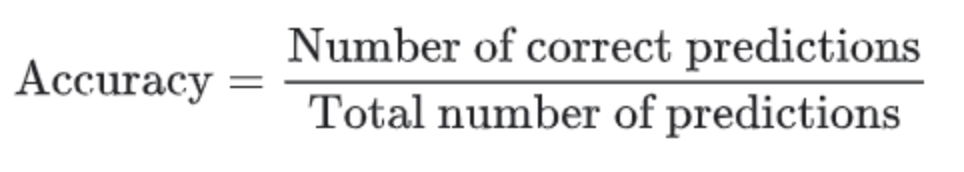

To check the number of correct predictions we can check the label predicted by our model and the actual label for a test example and if they both are the same. However, note that our model outputs probabilities and not the labals 0 or 1. One common practice to convert probabilities to predictions is to define a threshold ϵ (typically kept at 0.5) and if the predicted probability is > ϵ then assign the example a positive label i.e. 1 and else 0. We start by implementing `convert_probs_to_labels` function which does exactly that

In [ ]:
def convert_probs_to_labels(probs, threshold = 0.5):
  """
  Convert the probabilities to labels by using the specified threshold

  Inputs:
    - probs (numpy.ndarray): A numpy 1d array containing the probabilities predicted by the classifier model
    - threshold (float): A threshold value beyond which we assign a positive label i.e 1 and 0 below it

  Returns:
    - labels (numpy.ndarray): Labels obtained after thresholding
    
  """
    
  labels = None
  labels=(probs>threshold).astype(int)
  # YOUR CODE HERE
  #raise NotImplementedError()

  return labels

In [ ]:
print("Running Sample Test Cases")

print("Sample Test Case 1")
sample_probs = np.array([0.1, 0.45, 0.65, 0.9, 0.55])
sample_threshold = 0.5
print(f"Input Probabilities: {sample_probs}")
print(f"Input Threshold: {sample_threshold}")
sample_labels = convert_probs_to_labels(sample_probs, sample_threshold)
expected_labels = np.array([0, 0, 1, 1, 1])
print(f"Lables: {sample_labels}")
print(f"Expected Lables: {expected_labels}")

assert (sample_labels == expected_labels).all()
print("**********************************\n")

print("Sample Test Case 2")
sample_probs = np.array([0.1, 0.45, 0.65, 0.9, 0.55])
sample_threshold = 0.75
print(f"Input Probabilities: {sample_probs}")
print(f"Input Threshold: {sample_threshold}")
sample_labels = convert_probs_to_labels(sample_probs, sample_threshold)
expected_labels = np.array([0, 0, 0, 1, 0])
print(f"Lables: {sample_labels}")
print(f"Expected Lables: {expected_labels}")

assert (sample_labels == expected_labels).all()
print("**********************************\n")


Running Sample Test Cases
Sample Test Case 1
Input Probabilities: [0.1  0.45 0.65 0.9  0.55]
Input Threshold: 0.5
Lables: [0 0 1 1 1]
Expected Lables: [0 0 1 1 1]
**********************************

Sample Test Case 2
Input Probabilities: [0.1  0.45 0.65 0.9  0.55]
Input Threshold: 0.75
Lables: [0 0 0 1 0]
Expected Lables: [0 0 0 1 0]
**********************************



Next lets implement the `get_accuracy` function which takes as input predicted labels and actual labels and computes the accuracy

In [ ]:
def get_accuracy(pred_labels, act_labels):
  """
  Calculates the accuracy value by comparing predicted labels with actual labels

  Inputs:
    - pred_labels (numpy.ndarray) : A numpy 1d array containing predicted labels. 
    - act_labels (numpy.ndarray): A numpy 1d array containing actual labels (of same size as pred_labels). 

  Returns:
    - accuracy (float): Number of correct predictions / Total number of predictions

  """
  accuracy = None
  # YOUR CODE HERE
  pred_labels=convert_probs_to_labels(pred_labels)
  accuracy = np.sum(np.equal(act_labels, pred_labels)) / len(act_labels)
  #raise NotImplementedError()

  return accuracy

In [ ]:
print("Running Sample Test Cases")

print("Sample Test Case 1")
sample_pred_labels = np.array([0, 0, 1, 1])
sample_act_labels = np.array([0, 0, 0, 1])
sample_acc = get_accuracy(sample_pred_labels, sample_act_labels)
expected_acc = 0.75
print(f"Input Predicted Labels: {sample_pred_labels}")
print(f"Input Actual Labels: {sample_act_labels}")
print(f"Accuracy: {sample_acc}")
print(f"Expected Accuracy: {expected_acc}")

assert sample_acc == expected_acc
print("**********************************\n")

print("Sample Test Case 2")
sample_pred_labels = np.array([0, 0, 1, 1, 0])
sample_act_labels = np.array([1, 1, 0, 0, 1])
sample_acc = get_accuracy(sample_pred_labels, sample_act_labels)
expected_acc = 0
print(f"Input Predicted Labels: {sample_pred_labels}")
print(f"Input Actual Labels: {sample_act_labels}")
print(f"Accuracy: {sample_acc}")
print(f"Expected Accuracy: {expected_acc}")

assert sample_acc == expected_acc

print("**********************************\n")


Running Sample Test Cases
Sample Test Case 1
Input Predicted Labels: [0 0 1 1]
Input Actual Labels: [0 0 0 1]
Accuracy: 0.75
Expected Accuracy: 0.75
**********************************

Sample Test Case 2
Input Predicted Labels: [0 0 1 1 0]
Input Actual Labels: [1 1 0 0 1]
Accuracy: 0.0
Expected Accuracy: 0
**********************************



Now we can implement `evaluate` function which takes in a model and a test dataloader, iterates through every batch of the test dataset and calculates the average accuracy.

In [ ]:
def evaluate(model, test_dataloader, threshold = 0.5, device = "cuda"):
  """
  Evaluates `model` on test dataset

  Inputs:
    - model (LogisticRegressionModel): Logistic Regression model to be evaluated
    - test_dataloader (torch.utils.DataLoader): A dataloader defined over the test dataset

  Returns:
    - accuracy (float): Average accuracy over the test dataset 
  """
  model.to(device)
  model = model.eval() # Set model to evaluation model 
  accuracy = 0
  
  # by specifying `torch.no_grad`, it ensures no gradients are calcuated while running the model,
  # this makes the computation much more faster
  with torch.no_grad():
    for test_batch in test_dataloader:
      features, labels = test_batch
      features = features.float().to(device)
      labels = labels.float().to(device)

      # Step 1: Get probability predictions from the model and store it in `pred_probs`
      # YOUR CODE HERE
      pred_probs = model(features)
      #raise NotImplementedError()

      # Convert predictions and labels to numpy arrays from torch tensors as they are easier to operate for computing metrics
      pred_probs = pred_probs.detach().cpu().numpy()
      labels = labels.detach().cpu().numpy()

      # Step 2: Get accuracy of predictions and store it in `batch_accuracy`
      batch_accuracy = None
    
      batch_accuracy=get_accuracy(pred_probs,labels)
      
      # YOUR CODE HERE
      #raise NotImplementedError()

      accuracy += batch_accuracy

    # Divide by number of batches to get average accuracy
    accuracy = accuracy / len(test_dataloader)

    return accuracy

In [ ]:
print("Running Sample Test Cases")

print("Testing on just 100 test examples for sanity check")
torch.manual_seed(42)
sample_documents = test_df_preprocessed["sentence"].values.tolist()[:100]
sample_labels = test_df["label"].values.tolist()[:100]

sample_dataset = SST2Dataset(sample_documents,
                            sample_labels,
                            train_vocab,
                            train_word2idx)

sample_dataloader = DataLoader(sample_dataset, batch_size = 64)

accuracy = evaluate(sentiment_lr_model, sample_dataloader, device ="cpu")

expected_accuracy = 0.8090277777777778
print(f"Accuracy: {accuracy}")
print(f"Expected Accuracy: {expected_accuracy}")

#assert np.allclose(expected_accuracy, accuracy, 1e-5)

Running Sample Test Cases
Testing on just 100 test examples for sanity check
torch.Size([64, 10781])
torch.Size([36, 10781])
Accuracy: 0.8151041666666667
Expected Accuracy: 0.8090277777777778


Again, don't worry if the values do not match exactly. As long as the value you obtained is close to 0.8 it should be fine

Let's obtain the accuracy on the entire test set now

In [ ]:
test_acc = evaluate(sentiment_lr_model, test_dataloader, device ="cuda")
print(f"Test Accuracy: {(100* test_acc).round(2)}%")

torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([64, 10781])
torch.Size([40, 10781])
Test Accuracy: 78.15%


We obtain around 80% accuracy form our logistic regression, which is very reasonable considering random guessing will fetch you an accuracy of ~50%. So we are doing ~30% better than random guessing which is good enough for our first model. In the coming lectures we shall see how we can improve this performance even further.

### Task 3.5: Making Predictions from scratch (0.5 Marks)

Now that we have trained the model and evaluated it's performance it seems like a nice place to end, right? However, one aspect that is often overlooked in ML or NLP pipelines is designing an interface that can make prediction directly on a piece of text using the trained model, abstracting away all the pre-processing and model run details from the user. Let's implement the `predict_document` function below that does exactly that


In [ ]:
def predict_document(document, model, train_vocab, train_word2idx, threshold = 0.5, device = "cpu"):
  """
  Predicts the sentiment label for the `document` using `model`

  Inputs:
    - document (str): The document whose sentiment is to be predicted
    - model (LogisticRegressionModel): A trained logistic regression model
    - train_vocab (list): Vocabulary on which the model was trained on
    - train_word2idx (dict): A Python dictionary mapping each word to its index in vocabulary

  Returns:
    - pred_label (float): Predicted sentiment of the document

  Hint: Follow the following steps:
    - preprocess the document
    - obtain bag of words features from the preprocessed document
    - convert the features to a pytorch tensor using torch.FloatTensor(features)
    - feed the features tensor to the model to obtain predicted probabilities
    - convert predicted probabilities to labels by checking if predicted probability is greater than or less than the threshold
  """
  
  model = model.to(device)
  model = model.eval()
  pred_label = None

  # YOUR CODE HERE
  document=preprocess_pipeline(document)
  features=get_document_bow_feature(document, train_vocab, train_word2idx)
  inp=torch.FloatTensor(features)
  pred=model(inp)
  pred = pred.detach().cpu().numpy()
  pred_label=convert_probs_to_labels(pred)
  #raise NotImplementedError()

  return pred_label

In [ ]:
print("Running Sample Test Cases")

print("Sample Test Case 1")
sample_document = "this movie was great"
predicted_label = predict_document(sample_document, sentiment_lr_model,
                                   train_vocab, train_word2idx)
expected_label = 1
print(f"Predicted Label: {predicted_label}")
print(f"Expected Label: {expected_label}")

assert predicted_label == expected_label

print("**********************************\n")

print("Sample Test Case 2")
sample_document = "This movie was GREAT!!!!"
predicted_label = predict_document(sample_document, sentiment_lr_model,
                                   train_vocab, train_word2idx)
expected_label = 1
print(f"Predicted Label: {predicted_label}")
print(f"Expected Label: {expected_label}")

assert predicted_label == expected_label

print("**********************************\n")

Running Sample Test Cases
Sample Test Case 1
torch.Size([10781])
Predicted Label: 1
Expected Label: 1
**********************************

Sample Test Case 2
torch.Size([10781])
Predicted Label: 1
Expected Label: 1
**********************************



## Appendix: Interpreting the trained model

One of the biggest advantages of using linear models like Logistic Regression is that they are much easier to interpret compared to more sophisticated neural network models. We can just look at the weights of a trained logistic regression model and based on that can determine certain interesting insights about the model. Recall that each weight in a logistic regression corresponds to a feature in the input, and for bag of words each of the feature can be interpreted as a word from the vocabulary. Hence, a large positive weight might indicate that the corresponding word increases the probability of the document containing the positive sentiment, or an overly large negative weight will indicate otherwise. Using this, let's determine the top 10 most positive as well as most negative words. We have implemented the function `get_top_pos_nd_neg_words` to obtain these.

In [ ]:
def get_top_pos_nd_neg_words(model, train_vocab, topk = 10):
  """
  Gets the `topk` most positive and negative words by interpreting the model's weights

  Inputs:
    - model (LogisticRegressionModel): A trained logistic regression model
    - train_vocab (list): Vocabulary on which the model was trained on
  """

  # Obtain model's weights
  weights = model.linear_layer.weight.data.detach().cpu().numpy().squeeze()

  # Obtain the indices corresponding to most positive and most negative weights
  weight_idx = np.argsort(weights)
  topk_pos_idxs = weight_idx[-topk:][::-1]
  topk_neg_idxs = weight_idx[:topk]

  # Get the words from indices
  topk_pos_words = [train_vocab[idx] for idx in topk_pos_idxs]
  topk_neg_words = [train_vocab[idx] for idx in topk_neg_idxs]

  topk_pos_weights = [weights[idx] for idx in topk_pos_idxs]
  topk_neg_weights = [weights[idx] for idx in topk_neg_idxs]


  return topk_pos_words,topk_pos_weights, topk_neg_words,topk_neg_weights

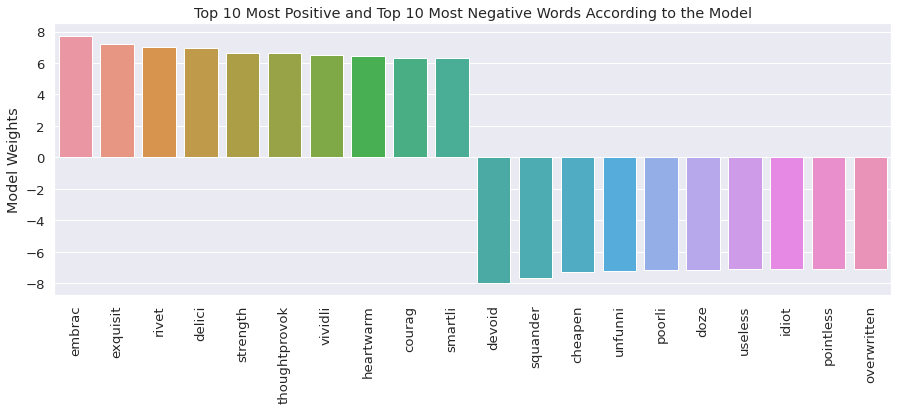

In [ ]:
topk_pos_words,topk_pos_weights, topk_neg_words,topk_neg_weights = get_top_pos_nd_neg_words(sentiment_lr_model, train_vocab, topk = 10)

fig = plt.figure(figsize = (15, 5))
sns.set(font_scale=1.2)
sns.barplot(y = topk_pos_weights + topk_neg_weights,
            x = topk_pos_words +topk_neg_words)
plt.xticks(rotation=90)
plt.ylabel("Model Weights")
plt.title("Top 10 Most Positive and Top 10 Most Negative Words According to the Model")
plt.show()

As you can see the model assigns high weights to words like `terrific`, `refreshing`, `thoughtprovoking` etc, while assigns highly negative values to words like `worst`, `devoid`, `failur`